# Multi-View Consistent Generative Adversarial Networks for 3D-aware Image Synthesis

Project implemented by: Egemen Sert (2094431)

You can find model hyperparameters at `curriculum.py` file. Below we install required packages and download the dataset from Google Drive.
Then we train the model.

We have trained the model for 16000 iterations using an A100 GPU on Paperspace Gradient notebook. We see that our results improved until 12Kth iteration. Then our discriminator and generator losses started to increase along with FID scores. Furthermore after 16K iterations, our code failed due to shrinking scale constant. We suspect that both result degredation and code fail depends on massive reduction in scale. We aim to fix this bug in Version 2 and optimize the model as long as our budget allows.

Our comparison metric is FID@128 on CelebA-HQ. We couldn't reach 128x128 resolution due to our bug terminating training process on 64x64 resolution. Our best reported FID(64x64) is 224.6. Paper's reported FID@128 is 11.8. See Table 1 [here](https://arxiv.org/pdf/2204.06307.pdf).

Below our ablation results and lost charts. You can find the code to obtain each on this notebook.

![](outputs/loss.png)

![](outputs/fid.png)

## Results from 12Kth iteration
We can see that generated images begin to take a face form. When we factor in MVCGAN requires 42 V100 GPU days to train [(source, Table 1)](https://universome.github.io/assets/projects/epigraf/epigraf.pdf), we believe our implementation is working postively. However, we don't have the budget to complete the training. We should have been more careful with our goal selection.

![](outputs/12000_tilted_ema.png)

### Output of ablation code in this notebook 

![](outputs/ABLATION_random.png)

In [1]:
!pip install gdown
!pip install --upgrade gdown
!pip install -r requirements.txt

  Attempting uninstall: gdown
    Found existing installation: gdown 4.5.1
    Uninstalling gdown-4.5.1:
      Successfully uninstalled gdown-4.5.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.1/551.1 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 16.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.4.0 requires tqdm>=4.62.1, but you have tqdm 4.45.0 which is incompatible.


In [2]:
!gdown "1SOw-7dLOysR3aMVtv6d3AcnJmgLDJC_C&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SOw-7dLOysR3aMVtv6d3AcnJmgLDJC_C&confirm=t
To: /notebooks/celeb.zip.zip adlı dosyanın kopyası
100%|███████████████████████████████████████| 3.15G/3.15G [00:22<00:00, 139MB/s]


In [ ]:
!mv "celeb.zip.zip adlı dosyanın kopyası" celeb.zip

In [ ]:
!unzip celeb.zip 'CelebAMask-HQ/CelebA-HQ-img/*' -d  '.'

Archive:  celeb.zip
   creating: ./CelebAMask-HQ/CelebA-HQ-img/
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/0.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/1.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/100.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/1000.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10000.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10001.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10002.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10003.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10004.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10005.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10006.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10007.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10008.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10009.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/1001.jpg  
  inflating: ./CelebAMask-HQ/CelebA-HQ-img/10010.jpg  
  inflating: ./C

In [1]:
from main import train
train(0)

Total progress:   0%|          | 0/3000 [00:00<?, ?it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.9/dist-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(

Progress to next stage:   0%|          | 0/25000 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

                                                        36:23:43,  5.24s/it]
Progress to next stage:   0%|          | 1/25000 [00:05<36:23:43,  5.24s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: nan] [G loss: 38.168704986572266] [Step: 0] [Alpha: 0.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 32768.0]



Progress to next stage:   0%|          | 10/25000 [00:23<12:54:17,  1.86s/it]
                                                                    1.84s/it]
Progress to next stage:   0%|          | 11/25000 [00:24<12:46:24,  1.84s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 356.3578186035156] [G loss: 5.416281223297119] [Step: 10] [Alpha: 0.01] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 20/25000 [00:40<12:33:45,  1.81s/it]
                                                                    1.77s/it]
Progress to next stage:   0%|          | 21/25000 [00:42<12:18:43,  1.77s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 11.455646514892578] [G loss: 11.222575187683105] [Step: 20] [Alpha: 0.01] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 30/25000 [00:59<12:20:43,  1.78s/it]
                                                                    1.75s/it]
Progress to next stage:   0%|          | 31/25000 [01:00<12:09:52,  1.75s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 10.791377067565918] [G loss: 7.5855584144592285] [Step: 30] [Alpha: 0.01] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 40/25000 [01:17<12:40:42,  1.83s/it]
                                                                    1.80s/it]
Progress to next stage:   0%|          | 41/25000 [01:19<12:29:20,  1.80s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.756901502609253] [G loss: 5.2609758377075195] [Step: 40] [Alpha: 0.02] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 50/25000 [01:36<13:04:57,  1.89s/it]
                                                                    1.95s/it]
Progress to next stage:   0%|          | 51/25000 [01:38<13:29:17,  1.95s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.3638981580734253] [G loss: 4.764909744262695] [Step: 50] [Alpha: 0.03] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 60/25000 [01:54<11:55:36,  1.72s/it]
                                                                    1.68s/it]
Progress to next stage:   0%|          | 61/25000 [01:55<11:37:41,  1.68s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.308626413345337] [G loss: 5.060952186584473] [Step: 60] [Alpha: 0.03] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 70/25000 [02:12<12:40:31,  1.83s/it]
                                                                    1.90s/it]
Progress to next stage:   0%|          | 71/25000 [02:14<13:10:13,  1.90s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 2.4885659217834473] [G loss: 3.2049102783203125] [Step: 70] [Alpha: 0.04] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 80/25000 [02:30<12:10:37,  1.76s/it]
                                                                     .91s/it]
Progress to next stage:   0%|          | 81/25000 [02:32<13:13:48,  1.91s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.3536640405654907] [G loss: 3.819133758544922] [Step: 80] [Alpha: 0.04] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 90/25000 [02:48<12:27:26,  1.80s/it]
                                                                     .74s/it]
Progress to next stage:   0%|          | 91/25000 [02:50<12:03:50,  1.74s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.784830093383789] [G loss: 3.4656119346618652] [Step: 90] [Alpha: 0.04] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 100/25000 [03:06<12:05:48,  1.75s/it]
                                                                     1.70s/it]
Progress to next stage:   0%|          | 101/25000 [03:07<11:44:35,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.6815075874328613] [G loss: 4.261632919311523] [Step: 100] [Alpha: 0.05] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 110/25000 [03:25<12:34:24,  1.82s/it]
                                                                     1.85s/it]
Progress to next stage:   0%|          | 111/25000 [03:27<12:49:03,  1.85s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.284568190574646] [G loss: 3.45619797706604] [Step: 110] [Alpha: 0.06] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   0%|          | 120/25000 [03:42<11:39:14,  1.69s/it]
                                                                     1.75s/it]
Progress to next stage:   0%|          | 121/25000 [03:44<12:04:09,  1.75s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 2.114154815673828] [G loss: 3.277569532394409] [Step: 120] [Alpha: 0.06] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 130/25000 [04:01<12:44:48,  1.85s/it]
                                                                     1.76s/it]
Progress to next stage:   1%|          | 131/25000 [04:02<12:11:07,  1.76s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.584161400794983] [G loss: 3.4517362117767334] [Step: 130] [Alpha: 0.07] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 140/25000 [04:18<12:58:53,  1.88s/it]
                                                                     1.87s/it]
Progress to next stage:   1%|          | 141/25000 [04:20<12:54:47,  1.87s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.8545836210250854] [G loss: 3.5837459564208984] [Step: 140] [Alpha: 0.07] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 150/25000 [04:36<11:44:11,  1.70s/it]
                                                                     1.66s/it]
Progress to next stage:   1%|          | 151/25000 [04:38<11:29:24,  1.66s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.1481876373291016] [G loss: 3.2657597064971924] [Step: 150] [Alpha: 0.07] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 160/25000 [04:55<12:29:43,  1.81s/it]
                                                                     1.86s/it]
Progress to next stage:   1%|          | 161/25000 [04:57<12:49:28,  1.86s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 1.0673058032989502] [G loss: 3.646470785140991] [Step: 160] [Alpha: 0.08] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 170/25000 [05:14<12:46:52,  1.85s/it]
                                                                     1.89s/it]
Progress to next stage:   1%|          | 171/25000 [05:16<13:02:26,  1.89s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.9228993058204651] [G loss: 4.125421524047852] [Step: 170] [Alpha: 0.09] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 180/25000 [05:34<13:41:48,  1.99s/it]
                                                                     2.03s/it]
Progress to next stage:   1%|          | 181/25000 [05:36<13:59:58,  2.03s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6935384273529053] [G loss: 4.6511969566345215] [Step: 180] [Alpha: 0.09] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 190/25000 [05:51<11:19:47,  1.64s/it]
                                                                     1.62s/it]
Progress to next stage:   1%|          | 191/25000 [05:53<11:11:03,  1.62s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6786614060401917] [G loss: 3.6477739810943604] [Step: 190] [Alpha: 0.10] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 200/25000 [06:09<12:46:02,  1.85s/it]
                                                                     1.87s/it]
Progress to next stage:   1%|          | 201/25000 [06:11<12:53:30,  1.87s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.585425615310669] [G loss: 3.8972456455230713] [Step: 200] [Alpha: 0.10] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 210/25000 [06:28<12:06:08,  1.76s/it]
                                                                     1.85s/it]
Progress to next stage:   1%|          | 211/25000 [06:31<12:43:39,  1.85s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.573864221572876] [G loss: 3.8517417907714844] [Step: 210] [Alpha: 0.10] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 220/25000 [06:46<12:05:28,  1.76s/it]
                                                                     1.70s/it]
Progress to next stage:   1%|          | 221/25000 [06:48<11:43:49,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.66118323802948] [G loss: 4.199563503265381] [Step: 220] [Alpha: 0.11] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 230/25000 [07:04<12:53:04,  1.87s/it]
                                                                     1.78s/it]
Progress to next stage:   1%|          | 231/25000 [07:06<12:16:30,  1.78s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.9633402228355408] [G loss: 3.9799368381500244] [Step: 230] [Alpha: 0.12] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 240/25000 [07:22<12:04:44,  1.76s/it]
                                                                     1.71s/it]
Progress to next stage:   1%|          | 241/25000 [07:23<11:44:27,  1.71s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5303391218185425] [G loss: 4.146728992462158] [Step: 240] [Alpha: 0.12] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 250/25000 [07:40<13:22:30,  1.95s/it]
                                                                     1.96s/it]
Progress to next stage:   1%|          | 251/25000 [07:42<13:28:44,  1.96s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.9066197276115417] [G loss: 4.14793586730957] [Step: 250] [Alpha: 0.12] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 260/25000 [07:59<13:11:42,  1.92s/it]
                                                                     1.88s/it]
Progress to next stage:   1%|          | 261/25000 [08:00<12:56:43,  1.88s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6990678310394287] [G loss: 4.264535903930664] [Step: 260] [Alpha: 0.13] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 270/25000 [08:17<11:28:34,  1.67s/it]
                                                                     1.68s/it]
Progress to next stage:   1%|          | 271/25000 [08:18<11:32:49,  1.68s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6466560363769531] [G loss: 4.1980791091918945] [Step: 270] [Alpha: 0.14] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 280/25000 [08:34<11:52:16,  1.73s/it]
                                                                     1.69s/it]
Progress to next stage:   1%|          | 281/25000 [08:35<11:35:15,  1.69s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5049730539321899] [G loss: 4.024066925048828] [Step: 280] [Alpha: 0.14] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 290/25000 [08:53<13:31:01,  1.97s/it]
                                                                     1.95s/it]
Progress to next stage:   1%|          | 291/25000 [08:55<13:21:00,  1.95s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.4621134400367737] [G loss: 4.347140789031982] [Step: 290] [Alpha: 0.14] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 300/25000 [09:10<11:27:19,  1.67s/it]
                                                                     1.64s/it]
Progress to next stage:   1%|          | 301/25000 [09:12<11:16:19,  1.64s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6134412288665771] [G loss: 4.775859832763672] [Step: 300] [Alpha: 0.15] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|          | 310/25000 [09:27<11:10:56,  1.63s/it]
                                                                     1.65s/it]
Progress to next stage:   1%|          | 311/25000 [09:28<11:19:16,  1.65s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5757347345352173] [G loss: 4.471047401428223] [Step: 310] [Alpha: 0.15] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 320/25000 [09:43<11:16:40,  1.65s/it]
                                                                     1.63s/it]
Progress to next stage:   1%|▏         | 321/25000 [09:45<11:09:57,  1.63s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.45359206199645996] [G loss: 4.683098793029785] [Step: 320] [Alpha: 0.16] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 330/25000 [10:00<11:26:36,  1.67s/it]
                                                                     1.67s/it]
Progress to next stage:   1%|▏         | 331/25000 [10:02<11:26:47,  1.67s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.44402778148651123] [G loss: 4.385931491851807] [Step: 330] [Alpha: 0.17] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 340/25000 [10:16<11:10:16,  1.63s/it]
                                                                     1.63s/it]
Progress to next stage:   1%|▏         | 341/25000 [10:18<11:11:53,  1.63s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.3460592031478882] [G loss: 4.709702491760254] [Step: 340] [Alpha: 0.17] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 350/25000 [10:33<11:11:43,  1.64s/it]
                                                                     1.62s/it]
Progress to next stage:   1%|▏         | 351/25000 [10:34<11:03:48,  1.62s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6527020931243896] [G loss: 4.681003093719482] [Step: 350] [Alpha: 0.17] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 360/25000 [10:49<10:55:49,  1.60s/it]
                                                                     1.59s/it]
Progress to next stage:   1%|▏         | 361/25000 [10:51<10:54:39,  1.59s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.6430174112319946] [G loss: 5.037476062774658] [Step: 360] [Alpha: 0.18] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   1%|▏         | 370/25000 [11:06<11:55:48,  1.74s/it]
                                                                     1.71s/it]
Progress to next stage:   1%|▏         | 371/25000 [11:08<11:40:12,  1.71s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5332080721855164] [G loss: 5.1029510498046875] [Step: 370] [Alpha: 0.18] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 380/25000 [11:24<12:09:14,  1.78s/it]
                                                                     1.76s/it]
Progress to next stage:   2%|▏         | 381/25000 [11:26<12:02:02,  1.76s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.43600717186927795] [G loss: 4.551276683807373] [Step: 380] [Alpha: 0.19] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 390/25000 [11:41<11:45:48,  1.72s/it]
                                                                     1.77s/it]
Progress to next stage:   2%|▏         | 391/25000 [11:43<12:06:59,  1.77s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.3497166633605957] [G loss: 5.040771961212158] [Step: 390] [Alpha: 0.20] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 400/25000 [11:57<11:26:30,  1.67s/it]
                                                                     1.65s/it]
Progress to next stage:   2%|▏         | 401/25000 [11:59<11:17:37,  1.65s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.7549436092376709] [G loss: 4.6815714836120605] [Step: 400] [Alpha: 0.20] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 410/25000 [12:15<11:13:28,  1.64s/it]
                                                                     1.63s/it]
Progress to next stage:   2%|▏         | 411/25000 [12:17<11:06:53,  1.63s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.3543006181716919] [G loss: 5.069016933441162] [Step: 410] [Alpha: 0.20] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 420/25000 [12:32<11:25:30,  1.67s/it]
                                                                     1.70s/it]
Progress to next stage:   2%|▏         | 421/25000 [12:34<11:34:33,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5268846750259399] [G loss: 4.810614109039307] [Step: 420] [Alpha: 0.21] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 430/25000 [12:50<11:31:42,  1.69s/it]
                                                                     1.70s/it]
Progress to next stage:   2%|▏         | 431/25000 [12:51<11:34:19,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.5352423191070557] [G loss: 4.802917003631592] [Step: 430] [Alpha: 0.21] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 440/25000 [13:06<11:18:54,  1.66s/it]
                                                                     1.70s/it]
Progress to next stage:   2%|▏         | 441/25000 [13:08<11:37:38,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.35416847467422485] [G loss: 4.485363483428955] [Step: 440] [Alpha: 0.22] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 450/25000 [13:23<11:58:05,  1.75s/it]
                                                                     1.76s/it]
Progress to next stage:   2%|▏         | 451/25000 [13:25<11:59:41,  1.76s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.40869879722595215] [G loss: 5.6066179275512695] [Step: 450] [Alpha: 0.23] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 460/25000 [13:40<11:45:29,  1.72s/it]
                                                                     1.73s/it]
Progress to next stage:   2%|▏         | 461/25000 [13:42<11:48:21,  1.73s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.4775756001472473] [G loss: 5.14959716796875] [Step: 460] [Alpha: 0.23] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 470/25000 [13:57<11:22:41,  1.67s/it]
                                                                     1.71s/it]
Progress to next stage:   2%|▏         | 471/25000 [13:59<11:37:37,  1.71s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.49466103315353394] [G loss: 5.040106773376465] [Step: 470] [Alpha: 0.23] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 480/25000 [14:14<11:29:53,  1.69s/it]
                                                                     1.74s/it]
Progress to next stage:   2%|▏         | 481/25000 [14:16<11:51:05,  1.74s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.48436877131462097] [G loss: 6.374202251434326] [Step: 480] [Alpha: 0.24] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 490/25000 [14:32<11:24:13,  1.67s/it]
                                                                     1.71s/it]
Progress to next stage:   2%|▏         | 491/25000 [14:34<11:38:48,  1.71s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.4573483169078827] [G loss: 5.102668285369873] [Step: 490] [Alpha: 0.24] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 500/25000 [14:49<11:21:22,  1.67s/it]
                                                                     1.69s/it]
Progress to next stage:   2%|▏         | 501/25000 [14:50<11:29:17,  1.69s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.48040762543678284] [G loss: 5.4544596672058105] [Step: 500] [Alpha: 0.25] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 510/25000 [15:05<11:15:00,  1.65s/it]
                                                                     1.67s/it]
Progress to next stage:   2%|▏         | 511/25000 [15:07<11:21:41,  1.67s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.32367074489593506] [G loss: 5.253344535827637] [Step: 510] [Alpha: 0.26] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 520/25000 [15:22<11:34:15,  1.70s/it]
                                                                     1.69s/it]
Progress to next stage:   2%|▏         | 521/25000 [15:24<11:30:38,  1.69s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.3568640351295471] [G loss: 5.090440273284912] [Step: 520] [Alpha: 0.26] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 530/25000 [15:39<11:31:03,  1.69s/it]
                                                                     1.70s/it]
Progress to next stage:   2%|▏         | 531/25000 [15:41<11:33:48,  1.70s/it]

[Experiment: outputs] [Epoch: 0/3000] [D loss: 0.3789338767528534] [G loss: 5.046149253845215] [Step: 530] [Alpha: 0.27] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   0%|          | 2/3000 [15:47<394:38:31, 473.89s/it]1.68s/it]
                                                                     2.18s/it]
Progress to next stage:   2%|▏         | 536/25000 [15:51<14:50:17,  2.18s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.31312328577041626] [G loss: 5.116257667541504] [Step: 535] [Alpha: 0.27] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 545/25000 [16:08<12:50:19,  1.89s/it]
                                                                     1.93s/it]
Progress to next stage:   2%|▏         | 546/25000 [16:10<13:08:35,  1.93s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.4057006537914276] [G loss: 5.324063777923584] [Step: 545] [Alpha: 0.27] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 555/25000 [16:25<12:07:01,  1.78s/it]
                                                                     1.87s/it]
Progress to next stage:   2%|▏         | 556/25000 [16:28<12:41:59,  1.87s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3023747503757477] [G loss: 5.233665466308594] [Step: 555] [Alpha: 0.28] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 565/25000 [16:45<12:48:05,  1.89s/it]
                                                                     1.89s/it]
Progress to next stage:   2%|▏         | 566/25000 [16:47<12:48:20,  1.89s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2933657765388489] [G loss: 5.091788291931152] [Step: 565] [Alpha: 0.28] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 575/25000 [17:04<12:12:18,  1.80s/it]
                                                                     1.74s/it]
Progress to next stage:   2%|▏         | 576/25000 [17:05<11:47:37,  1.74s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.31828394532203674] [G loss: 4.979616641998291] [Step: 575] [Alpha: 0.29] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 585/25000 [17:21<12:24:15,  1.83s/it]
                                                                     1.75s/it]
Progress to next stage:   2%|▏         | 586/25000 [17:23<11:52:53,  1.75s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.5053517818450928] [G loss: 6.763242244720459] [Step: 585] [Alpha: 0.29] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 595/25000 [17:38<10:50:35,  1.60s/it]
                                                                     1.61s/it]
Progress to next stage:   2%|▏         | 596/25000 [17:39<10:56:17,  1.61s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.6848156452178955] [G loss: 4.536134719848633] [Step: 595] [Alpha: 0.30] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 605/25000 [17:56<12:59:57,  1.92s/it]
                                                                     1.93s/it]
Progress to next stage:   2%|▏         | 606/25000 [17:58<13:03:02,  1.93s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.29943954944610596] [G loss: 4.875653266906738] [Step: 605] [Alpha: 0.30] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▏         | 615/25000 [18:15<12:29:05,  1.84s/it]
                                                                     1.86s/it]
Progress to next stage:   2%|▏         | 616/25000 [18:17<12:36:20,  1.86s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.28423574566841125] [G loss: 5.061729907989502] [Step: 615] [Alpha: 0.31] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   2%|▎         | 625/25000 [18:34<13:11:16,  1.95s/it]
                                                                     2.01s/it]
Progress to next stage:   3%|▎         | 626/25000 [18:36<13:36:17,  2.01s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2889907956123352] [G loss: 5.428840637207031] [Step: 625] [Alpha: 0.31] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 635/25000 [18:53<12:05:42,  1.79s/it]
                                                                     1.73s/it]
Progress to next stage:   3%|▎         | 636/25000 [18:54<11:41:59,  1.73s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.25863170623779297] [G loss: 5.7309041023254395] [Step: 635] [Alpha: 0.32] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 645/25000 [19:11<12:15:29,  1.81s/it]
                                                                     1.89s/it]
Progress to next stage:   3%|▎         | 646/25000 [19:13<12:45:41,  1.89s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.44048696756362915] [G loss: 5.831921100616455] [Step: 645] [Alpha: 0.32] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 655/25000 [19:29<11:46:21,  1.74s/it]
                                                                     1.88s/it]
Progress to next stage:   3%|▎         | 656/25000 [19:32<12:44:19,  1.88s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3135596215724945] [G loss: 5.728280067443848] [Step: 655] [Alpha: 0.33] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 665/25000 [19:48<12:22:08,  1.83s/it]
                                                                     1.76s/it]
Progress to next stage:   3%|▎         | 666/25000 [19:50<11:52:11,  1.76s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.42637190222740173] [G loss: 5.872121810913086] [Step: 665] [Alpha: 0.33] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 675/25000 [20:06<11:52:16,  1.76s/it]
                                                                     1.70s/it]
Progress to next stage:   3%|▎         | 676/25000 [20:07<11:30:44,  1.70s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.6600344181060791] [G loss: 5.723502159118652] [Step: 675] [Alpha: 0.34] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 685/25000 [20:22<10:50:59,  1.61s/it]
                                                                     1.72s/it]
Progress to next stage:   3%|▎         | 686/25000 [20:24<11:38:22,  1.72s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2749638259410858] [G loss: 5.232244968414307] [Step: 685] [Alpha: 0.34] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 695/25000 [20:40<12:28:32,  1.85s/it]
                                                                     1.92s/it]
Progress to next stage:   3%|▎         | 696/25000 [20:42<12:55:50,  1.92s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.37128713726997375] [G loss: 4.990824222564697] [Step: 695] [Alpha: 0.35] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 705/25000 [20:58<11:31:25,  1.71s/it]
                                                                     1.77s/it]
Progress to next stage:   3%|▎         | 706/25000 [21:00<11:54:41,  1.77s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.37344855070114136] [G loss: 5.6182355880737305] [Step: 705] [Alpha: 0.35] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 715/25000 [21:15<10:50:03,  1.61s/it]
                                                                     1.60s/it]
Progress to next stage:   3%|▎         | 716/25000 [21:16<10:46:23,  1.60s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2680344581604004] [G loss: 5.1264495849609375] [Step: 715] [Alpha: 0.36] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 725/25000 [21:34<13:11:34,  1.96s/it]
                                                                     1.91s/it]
Progress to next stage:   3%|▎         | 726/25000 [21:36<12:52:50,  1.91s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.41446566581726074] [G loss: 5.825613975524902] [Step: 725] [Alpha: 0.36] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 735/25000 [21:54<13:11:30,  1.96s/it]
                                                                     1.93s/it]
Progress to next stage:   3%|▎         | 736/25000 [21:55<12:59:14,  1.93s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.29225659370422363] [G loss: 5.529573440551758] [Step: 735] [Alpha: 0.37] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 745/25000 [22:11<11:58:13,  1.78s/it]
                                                                     1.82s/it]
Progress to next stage:   3%|▎         | 746/25000 [22:13<12:14:53,  1.82s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.42403656244277954] [G loss: 5.155761241912842] [Step: 745] [Alpha: 0.37] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 755/25000 [22:30<12:36:12,  1.87s/it]
                                                                     1.90s/it]
Progress to next stage:   3%|▎         | 756/25000 [22:32<12:47:23,  1.90s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.29029378294944763] [G loss: 5.480870246887207] [Step: 755] [Alpha: 0.38] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 765/25000 [22:48<11:26:14,  1.70s/it]
                                                                     1.76s/it]
Progress to next stage:   3%|▎         | 766/25000 [22:50<11:50:02,  1.76s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.398946076631546] [G loss: 5.394002914428711] [Step: 765] [Alpha: 0.38] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 775/25000 [23:08<13:17:07,  1.97s/it]
                                                                     1.96s/it]
Progress to next stage:   3%|▎         | 776/25000 [23:10<13:12:57,  1.96s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.24622981250286102] [G loss: 4.225150108337402] [Step: 775] [Alpha: 0.39] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 785/25000 [23:26<11:29:09,  1.71s/it]
                                                                     1.74s/it]
Progress to next stage:   3%|▎         | 786/25000 [23:27<11:42:20,  1.74s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.42271119356155396] [G loss: 5.518118858337402] [Step: 785] [Alpha: 0.39] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 795/25000 [23:42<11:22:49,  1.69s/it]
                                                                     1.69s/it]
Progress to next stage:   3%|▎         | 796/25000 [23:44<11:19:48,  1.69s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.607001543045044] [G loss: 5.423515796661377] [Step: 795] [Alpha: 0.40] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 805/25000 [24:02<12:51:15,  1.91s/it]
                                                                     1.95s/it]
Progress to next stage:   3%|▎         | 806/25000 [24:04<13:06:31,  1.95s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3205614387989044] [G loss: 6.0186004638671875] [Step: 805] [Alpha: 0.40] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 815/25000 [24:20<12:41:01,  1.89s/it]
                                                                     1.86s/it]
Progress to next stage:   3%|▎         | 816/25000 [24:22<12:28:57,  1.86s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.5567343235015869] [G loss: 3.454369068145752] [Step: 815] [Alpha: 0.41] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 825/25000 [24:37<11:00:09,  1.64s/it]
                                                                     1.63s/it]
Progress to next stage:   3%|▎         | 826/25000 [24:39<10:56:34,  1.63s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2273578941822052] [G loss: 5.014126777648926] [Step: 825] [Alpha: 0.41] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 835/25000 [24:54<12:10:12,  1.81s/it]
                                                                     1.85s/it]
Progress to next stage:   3%|▎         | 836/25000 [24:56<12:26:06,  1.85s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2571132779121399] [G loss: 5.650640487670898] [Step: 835] [Alpha: 0.42] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 845/25000 [25:11<11:50:32,  1.76s/it]
                                                                     1.71s/it]
Progress to next stage:   3%|▎         | 846/25000 [25:13<11:29:35,  1.71s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.319221168756485] [G loss: 4.995803356170654] [Step: 845] [Alpha: 0.42] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 855/25000 [25:29<11:46:49,  1.76s/it]
                                                                     1.74s/it]
Progress to next stage:   3%|▎         | 856/25000 [25:31<11:38:19,  1.74s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.18325966596603394] [G loss: 6.119731426239014] [Step: 855] [Alpha: 0.43] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   3%|▎         | 865/25000 [25:47<11:52:18,  1.77s/it]
                                                                     1.72s/it]
Progress to next stage:   3%|▎         | 866/25000 [25:49<11:32:04,  1.72s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2865658700466156] [G loss: 5.512099742889404] [Step: 865] [Alpha: 0.43] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 875/25000 [26:05<12:00:38,  1.79s/it]
                                                                     1.89s/it]
Progress to next stage:   4%|▎         | 876/25000 [26:07<12:41:13,  1.89s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.30767181515693665] [G loss: 5.887168884277344] [Step: 875] [Alpha: 0.44] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 885/25000 [26:25<12:29:53,  1.87s/it]
                                                                     1.78s/it]
Progress to next stage:   4%|▎         | 886/25000 [26:26<11:53:35,  1.78s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.34243500232696533] [G loss: 6.073812484741211] [Step: 885] [Alpha: 0.44] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 895/25000 [26:41<12:06:49,  1.81s/it]
                                                                     1.89s/it]
Progress to next stage:   4%|▎         | 896/25000 [26:44<12:38:32,  1.89s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.5259132385253906] [G loss: 6.193560600280762] [Step: 895] [Alpha: 0.45] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 905/25000 [27:00<12:39:07,  1.89s/it]
                                                                     1.81s/it]
Progress to next stage:   4%|▎         | 906/25000 [27:02<12:06:42,  1.81s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.2729136049747467] [G loss: 6.211345672607422] [Step: 905] [Alpha: 0.45] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 915/25000 [27:17<11:23:38,  1.70s/it]
                                                                     1.67s/it]
Progress to next stage:   4%|▎         | 916/25000 [27:19<11:10:17,  1.67s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.561438262462616] [G loss: 6.324452877044678] [Step: 915] [Alpha: 0.46] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 925/25000 [27:34<11:17:01,  1.69s/it]
                                                                     1.75s/it]
Progress to next stage:   4%|▎         | 926/25000 [27:36<11:43:56,  1.75s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.5341246724128723] [G loss: 6.096115589141846] [Step: 925] [Alpha: 0.46] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▎         | 935/25000 [27:53<12:00:02,  1.80s/it]
                                                                     1.81s/it]
Progress to next stage:   4%|▎         | 936/25000 [27:55<12:07:09,  1.81s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.24181482195854187] [G loss: 5.6967620849609375] [Step: 935] [Alpha: 0.47] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 945/25000 [28:11<12:02:47,  1.80s/it]
                                                                     1.88s/it]
Progress to next stage:   4%|▍         | 946/25000 [28:13<12:34:50,  1.88s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.32759034633636475] [G loss: 5.265941143035889] [Step: 945] [Alpha: 0.47] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 955/25000 [28:31<13:28:09,  2.02s/it]
                                                                     2.02s/it]
Progress to next stage:   4%|▍         | 956/25000 [28:33<13:28:22,  2.02s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.4077799320220947] [G loss: 5.9385504722595215] [Step: 955] [Alpha: 0.48] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 965/25000 [28:50<11:58:15,  1.79s/it]
                                                                     1.80s/it]
Progress to next stage:   4%|▍         | 966/25000 [28:51<11:59:13,  1.80s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3929600417613983] [G loss: 5.530344486236572] [Step: 965] [Alpha: 0.48] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 975/25000 [29:08<11:55:54,  1.79s/it]
                                                                     1.72s/it]
Progress to next stage:   4%|▍         | 976/25000 [29:10<11:28:47,  1.72s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.5999448299407959] [G loss: 7.829734802246094] [Step: 975] [Alpha: 0.49] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 985/25000 [29:26<12:06:41,  1.82s/it]
                                                                     1.81s/it]
Progress to next stage:   4%|▍         | 986/25000 [29:28<12:04:40,  1.81s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.397915780544281] [G loss: 5.496586322784424] [Step: 985] [Alpha: 0.49] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 995/25000 [29:44<12:09:10,  1.82s/it]
                                                                     1.78s/it]
Progress to next stage:   4%|▍         | 996/25000 [29:45<11:53:46,  1.78s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3226623237133026] [G loss: 5.901577949523926] [Step: 995] [Alpha: 0.50] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1005/25000 [30:04<13:11:23,  1.98s/it]
                                                                      1.98s/it]
Progress to next stage:   4%|▍         | 1006/25000 [30:06<13:11:35,  1.98s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.33783820271492004] [G loss: 5.5979766845703125] [Step: 1005] [Alpha: 0.50] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1015/25000 [30:24<13:20:36,  2.00s/it]
                                                                      1.91s/it]
Progress to next stage:   4%|▍         | 1016/25000 [30:25<12:44:19,  1.91s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.269186407327652] [G loss: 6.140174865722656] [Step: 1015] [Alpha: 0.51] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1025/25000 [30:43<12:37:38,  1.90s/it]
                                                                      1.80s/it]
Progress to next stage:   4%|▍         | 1026/25000 [30:44<12:00:02,  1.80s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.39608705043792725] [G loss: 5.303717613220215] [Step: 1025] [Alpha: 0.51] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1035/25000 [31:01<12:11:07,  1.83s/it]
                                                                      1.76s/it]
Progress to next stage:   4%|▍         | 1036/25000 [31:02<11:41:25,  1.76s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.6320528984069824] [G loss: 5.831991672515869] [Step: 1035] [Alpha: 0.52] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1045/25000 [31:20<11:40:30,  1.75s/it]
                                                                      1.80s/it]
Progress to next stage:   4%|▍         | 1046/25000 [31:21<11:57:00,  1.80s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.3739917576313019] [G loss: 6.195053577423096] [Step: 1045] [Alpha: 0.52] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1055/25000 [31:37<11:46:50,  1.77s/it]
                                                                      1.87s/it]
Progress to next stage:   4%|▍         | 1056/25000 [31:39<12:27:24,  1.87s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.37555164098739624] [G loss: 5.876402378082275] [Step: 1055] [Alpha: 0.53] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1065/25000 [31:55<11:15:14,  1.69s/it]
                                                                      1.68s/it]
Progress to next stage:   4%|▍         | 1066/25000 [31:57<11:09:49,  1.68s/it]

[Experiment: outputs] [Epoch: 1/3000] [D loss: 0.28399935364723206] [G loss: 5.43418025970459] [Step: 1065] [Alpha: 0.53] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   0%|          | 3/3000 [32:04<520:00:26, 624.63s/it] 1.63s/it]
                                                                      2.14s/it]
Progress to next stage:   4%|▍         | 1071/25000 [32:07<14:14:46,  2.14s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3093651533126831] [G loss: 5.978244304656982] [Step: 1070] [Alpha: 0.54] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1080/25000 [32:22<10:55:20,  1.64s/it]
                                                                      1.73s/it]
Progress to next stage:   4%|▍         | 1081/25000 [32:24<11:30:45,  1.73s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.47735685110092163] [G loss: 5.774233341217041] [Step: 1080] [Alpha: 0.54] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1090/25000 [32:39<11:04:18,  1.67s/it]
                                                                      1.64s/it]
Progress to next stage:   4%|▍         | 1091/25000 [32:41<10:54:23,  1.64s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2968050539493561] [G loss: 5.171784400939941] [Step: 1090] [Alpha: 0.55] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1100/25000 [32:57<11:47:41,  1.78s/it]
                                                                      1.79s/it]
Progress to next stage:   4%|▍         | 1101/25000 [32:59<11:52:15,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.24655821919441223] [G loss: 5.831701755523682] [Step: 1100] [Alpha: 0.55] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1110/25000 [33:15<12:39:20,  1.91s/it]
                                                                      1.81s/it]
Progress to next stage:   4%|▍         | 1111/25000 [33:17<11:59:52,  1.81s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3423726260662079] [G loss: 5.143607139587402] [Step: 1110] [Alpha: 0.56] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   4%|▍         | 1120/25000 [33:33<12:33:11,  1.89s/it]
                                                                      1.95s/it]
Progress to next stage:   4%|▍         | 1121/25000 [33:35<12:56:22,  1.95s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2575744390487671] [G loss: 7.214755058288574] [Step: 1120] [Alpha: 0.56] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1130/25000 [33:52<11:37:20,  1.75s/it]
                                                                      1.82s/it]
Progress to next stage:   5%|▍         | 1131/25000 [33:54<12:05:38,  1.82s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.42344680428504944] [G loss: 6.5014262199401855] [Step: 1130] [Alpha: 0.56] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1140/25000 [34:10<11:13:01,  1.69s/it]
                                                                      1.65s/it]
Progress to next stage:   5%|▍         | 1141/25000 [34:11<10:58:03,  1.65s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.39103204011917114] [G loss: 5.597418308258057] [Step: 1140] [Alpha: 0.57] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1150/25000 [34:26<11:10:57,  1.69s/it]
                                                                      1.72s/it]
Progress to next stage:   5%|▍         | 1151/25000 [34:28<11:22:33,  1.72s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.24235421419143677] [G loss: 5.350681781768799] [Step: 1150] [Alpha: 0.57] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1160/25000 [34:44<11:38:41,  1.76s/it]
                                                                      1.71s/it]
Progress to next stage:   5%|▍         | 1161/25000 [34:46<11:19:30,  1.71s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3979513645172119] [G loss: 6.665040493011475] [Step: 1160] [Alpha: 0.58] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1170/25000 [35:02<11:53:08,  1.80s/it]
                                                                      1.88s/it]
Progress to next stage:   5%|▍         | 1171/25000 [35:04<12:25:55,  1.88s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.24645709991455078] [G loss: 5.713948726654053] [Step: 1170] [Alpha: 0.58] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1180/25000 [35:22<12:55:49,  1.95s/it]
                                                                      1.98s/it]
Progress to next stage:   5%|▍         | 1181/25000 [35:24<13:05:02,  1.98s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3276384472846985] [G loss: 5.912379264831543] [Step: 1180] [Alpha: 0.59] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1190/25000 [35:39<11:36:41,  1.76s/it]
                                                                      1.86s/it]
Progress to next stage:   5%|▍         | 1191/25000 [35:41<12:18:24,  1.86s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.5287110805511475] [G loss: 5.829599857330322] [Step: 1190] [Alpha: 0.59] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1200/25000 [35:58<11:45:39,  1.78s/it]
                                                                      1.79s/it]
Progress to next stage:   5%|▍         | 1201/25000 [36:00<11:51:55,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.43363645672798157] [G loss: 5.2850341796875] [Step: 1200] [Alpha: 0.60] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1210/25000 [36:17<11:43:23,  1.77s/it]
                                                                      1.86s/it]
Progress to next stage:   5%|▍         | 1211/25000 [36:19<12:19:00,  1.86s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.47197604179382324] [G loss: 5.219611167907715] [Step: 1210] [Alpha: 0.60] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1220/25000 [36:36<11:55:12,  1.80s/it]
                                                                      1.74s/it]
Progress to next stage:   5%|▍         | 1221/25000 [36:37<11:28:13,  1.74s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.4922475814819336] [G loss: 5.20582914352417] [Step: 1220] [Alpha: 0.61] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1230/25000 [36:53<11:27:05,  1.73s/it]
                                                                      1.75s/it]
Progress to next stage:   5%|▍         | 1231/25000 [36:55<11:32:43,  1.75s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.23971864581108093] [G loss: 5.236598491668701] [Step: 1230] [Alpha: 0.61] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▍         | 1240/25000 [37:12<12:23:57,  1.88s/it]
                                                                      1.96s/it]
Progress to next stage:   5%|▍         | 1241/25000 [37:14<12:55:08,  1.96s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3509616255760193] [G loss: 5.477513790130615] [Step: 1240] [Alpha: 0.62] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1250/25000 [37:32<13:21:49,  2.03s/it]
                                                                      1.96s/it]
Progress to next stage:   5%|▌         | 1251/25000 [37:34<12:54:16,  1.96s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.4405364990234375] [G loss: 5.567553997039795] [Step: 1250] [Alpha: 0.62] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1260/25000 [37:50<12:13:54,  1.85s/it]
                                                                      1.92s/it]
Progress to next stage:   5%|▌         | 1261/25000 [37:52<12:40:56,  1.92s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.31862547993659973] [G loss: 4.531774520874023] [Step: 1260] [Alpha: 0.63] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1270/25000 [38:07<10:51:59,  1.65s/it]
                                                                      1.66s/it]
Progress to next stage:   5%|▌         | 1271/25000 [38:09<10:55:26,  1.66s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3146178424358368] [G loss: 5.8716654777526855] [Step: 1270] [Alpha: 0.64] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1330/25000 [39:58<11:35:52,  1.76s/it]
                                                                      1.71s/it]
Progress to next stage:   5%|▌         | 1331/25000 [40:00<11:13:25,  1.71s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.26430782675743103] [G loss: 5.980985641479492] [Step: 1330] [Alpha: 0.67] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1340/25000 [40:16<11:04:07,  1.68s/it]
                                                                      1.65s/it]
Progress to next stage:   5%|▌         | 1341/25000 [40:18<10:51:35,  1.65s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.47093427181243896] [G loss: 7.606688976287842] [Step: 1340] [Alpha: 0.67] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1350/25000 [40:34<11:29:51,  1.75s/it]
                                                                      1.71s/it]
Progress to next stage:   5%|▌         | 1351/25000 [40:35<11:13:44,  1.71s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.35285770893096924] [G loss: 6.650706768035889] [Step: 1350] [Alpha: 0.68] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1360/25000 [40:50<10:58:15,  1.67s/it]
                                                                      1.79s/it]
Progress to next stage:   5%|▌         | 1361/25000 [40:53<11:46:21,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.341330349445343] [G loss: 5.876485824584961] [Step: 1360] [Alpha: 0.68] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   5%|▌         | 1370/25000 [41:10<12:23:38,  1.89s/it]
                                                                      1.79s/it]
Progress to next stage:   5%|▌         | 1371/25000 [41:11<11:45:08,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.364961177110672] [G loss: 5.357361793518066] [Step: 1370] [Alpha: 0.69] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1380/25000 [41:27<11:49:20,  1.80s/it]
                                                                      1.76s/it]
Progress to next stage:   6%|▌         | 1381/25000 [41:29<11:34:31,  1.76s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3649178147315979] [G loss: 5.915287017822266] [Step: 1380] [Alpha: 0.69] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1390/25000 [41:44<11:42:33,  1.79s/it]
                                                                      1.75s/it]
Progress to next stage:   6%|▌         | 1391/25000 [41:46<11:29:03,  1.75s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.21541959047317505] [G loss: 6.339157581329346] [Step: 1390] [Alpha: 0.69] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1400/25000 [42:03<12:19:52,  1.88s/it]
                                                                      1.79s/it]
Progress to next stage:   6%|▌         | 1401/25000 [42:05<11:43:37,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2131863236427307] [G loss: 5.780228137969971] [Step: 1400] [Alpha: 0.70] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1410/25000 [42:24<12:25:43,  1.90s/it]
                                                                      1.93s/it]
Progress to next stage:   6%|▌         | 1411/25000 [42:26<12:37:29,  1.93s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.32217296957969666] [G loss: 4.962303161621094] [Step: 1410] [Alpha: 0.70] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1420/25000 [42:42<11:59:07,  1.83s/it]
                                                                      1.75s/it]
Progress to next stage:   6%|▌         | 1421/25000 [42:44<11:29:13,  1.75s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2909817695617676] [G loss: 6.104648590087891] [Step: 1420] [Alpha: 0.71] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1430/25000 [43:01<12:11:38,  1.86s/it]
                                                                      1.97s/it]
Progress to next stage:   6%|▌         | 1431/25000 [43:03<12:55:01,  1.97s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2827042043209076] [G loss: 4.759040355682373] [Step: 1430] [Alpha: 0.71] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1440/25000 [43:21<12:32:02,  1.92s/it]
                                                                      1.82s/it]
Progress to next stage:   6%|▌         | 1441/25000 [43:22<11:53:40,  1.82s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.2216656357049942] [G loss: 6.0569562911987305] [Step: 1440] [Alpha: 0.72] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1450/25000 [43:38<12:06:01,  1.85s/it]
                                                                      1.77s/it]
Progress to next stage:   6%|▌         | 1451/25000 [43:40<11:33:24,  1.77s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.25677967071533203] [G loss: 5.573017597198486] [Step: 1450] [Alpha: 0.72] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1460/25000 [43:57<11:53:11,  1.82s/it]
                                                                      1.86s/it]
Progress to next stage:   6%|▌         | 1461/25000 [43:59<12:09:15,  1.86s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.27169814705848694] [G loss: 5.490374565124512] [Step: 1460] [Alpha: 0.73] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1470/25000 [44:15<12:09:01,  1.86s/it]
                                                                      1.90s/it]
Progress to next stage:   6%|▌         | 1471/25000 [44:17<12:25:59,  1.90s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.36949166655540466] [G loss: 5.779083251953125] [Step: 1470] [Alpha: 0.73] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1480/25000 [44:33<11:47:55,  1.81s/it]
                                                                      1.88s/it]
Progress to next stage:   6%|▌         | 1481/25000 [44:35<12:17:47,  1.88s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.4792026877403259] [G loss: 5.290430545806885] [Step: 1480] [Alpha: 0.74] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1490/25000 [44:53<12:57:40,  1.98s/it]
                                                                      1.89s/it]
Progress to next stage:   6%|▌         | 1491/25000 [44:55<12:21:35,  1.89s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3075932562351227] [G loss: 5.967986106872559] [Step: 1490] [Alpha: 0.74] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1500/25000 [45:10<10:56:51,  1.68s/it]
                                                                      1.69s/it]
Progress to next stage:   6%|▌         | 1501/25000 [45:12<11:01:59,  1.69s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.38143491744995117] [G loss: 6.1378703117370605] [Step: 1500] [Alpha: 0.75] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1510/25000 [45:28<11:59:19,  1.84s/it]
                                                                      1.76s/it]
Progress to next stage:   6%|▌         | 1511/25000 [45:29<11:28:35,  1.76s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3482906222343445] [G loss: 7.079383373260498] [Step: 1510] [Alpha: 0.76] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1520/25000 [45:45<11:02:01,  1.69s/it]
                                                                      1.81s/it]
Progress to next stage:   6%|▌         | 1521/25000 [45:47<11:49:06,  1.81s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3819659948348999] [G loss: 6.1489787101745605] [Step: 1520] [Alpha: 0.76] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1530/25000 [46:03<11:55:59,  1.83s/it]
                                                                      1.75s/it]
Progress to next stage:   6%|▌         | 1531/25000 [46:05<11:26:27,  1.75s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.27249476313591003] [G loss: 4.428699016571045] [Step: 1530] [Alpha: 0.77] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1540/25000 [46:21<11:27:14,  1.76s/it]
                                                                      1.73s/it]
Progress to next stage:   6%|▌         | 1541/25000 [46:22<11:17:32,  1.73s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.48173168301582336] [G loss: 8.13223648071289] [Step: 1540] [Alpha: 0.77] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1550/25000 [46:37<10:56:30,  1.68s/it]
                                                                      1.79s/it]
Progress to next stage:   6%|▌         | 1551/25000 [46:39<11:38:01,  1.79s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.3024864196777344] [G loss: 5.914806365966797] [Step: 1550] [Alpha: 0.78] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▌         | 1560/25000 [46:55<11:40:35,  1.79s/it]
                                                                      1.73s/it]
Progress to next stage:   6%|▌         | 1561/25000 [46:56<11:15:16,  1.73s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.27256396412849426] [G loss: 5.723438739776611] [Step: 1560] [Alpha: 0.78] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1570/25000 [47:11<10:20:38,  1.59s/it]
                                                                      1.63s/it]
Progress to next stage:   6%|▋         | 1571/25000 [47:12<10:36:23,  1.63s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.35019195079803467] [G loss: 4.996986389160156] [Step: 1570] [Alpha: 0.79] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1580/25000 [47:30<12:18:45,  1.89s/it]
                                                                      1.96s/it]
Progress to next stage:   6%|▋         | 1581/25000 [47:32<12:44:54,  1.96s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.719415545463562] [G loss: 6.5909342765808105] [Step: 1580] [Alpha: 0.79] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1590/25000 [47:49<11:54:08,  1.83s/it]
                                                                      1.75s/it]
Progress to next stage:   6%|▋         | 1591/25000 [47:50<11:23:50,  1.75s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.5156204104423523] [G loss: 5.926758766174316] [Step: 1590] [Alpha: 0.80] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1600/25000 [48:06<11:15:49,  1.73s/it]
                                                                      1.74s/it]
Progress to next stage:   6%|▋         | 1601/25000 [48:08<11:19:11,  1.74s/it]

[Experiment: outputs] [Epoch: 2/3000] [D loss: 0.4672694206237793] [G loss: 5.317559719085693] [Step: 1600] [Alpha: 0.80] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   0%|          | 4/3000 [48:16<606:42:50, 729.03s/it] 1.82s/it]
                                                                      2.32s/it]
Progress to next stage:   6%|▋         | 1606/25000 [48:20<15:04:11,  2.32s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2689695954322815] [G loss: 5.434173583984375] [Step: 1605] [Alpha: 0.80] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1615/25000 [48:36<11:52:04,  1.83s/it]
                                                                      1.84s/it]
Progress to next stage:   6%|▋         | 1616/25000 [48:38<11:58:12,  1.84s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4707752466201782] [G loss: 6.536853313446045] [Step: 1615] [Alpha: 0.81] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   6%|▋         | 1625/25000 [48:54<11:29:51,  1.77s/it]
                                                                      1.71s/it]
Progress to next stage:   7%|▋         | 1626/25000 [48:56<11:07:13,  1.71s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.26659712195396423] [G loss: 5.894105434417725] [Step: 1625] [Alpha: 0.81] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1635/25000 [49:12<11:29:01,  1.77s/it]
                                                                      1.71s/it]
Progress to next stage:   7%|▋         | 1636/25000 [49:14<11:06:43,  1.71s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.29213747382164] [G loss: 6.030731201171875] [Step: 1635] [Alpha: 0.82] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1645/25000 [49:28<10:35:20,  1.63s/it]
                                                                      1.78s/it]
Progress to next stage:   7%|▋         | 1646/25000 [49:30<11:34:45,  1.78s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3459630608558655] [G loss: 5.595369815826416] [Step: 1645] [Alpha: 0.82] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1655/25000 [49:46<10:59:15,  1.69s/it]
                                                                      1.66s/it]
Progress to next stage:   7%|▋         | 1656/25000 [49:47<10:45:43,  1.66s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.41766786575317383] [G loss: 4.643898010253906] [Step: 1655] [Alpha: 0.83] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1665/25000 [50:02<11:12:19,  1.73s/it]
                                                                      1.68s/it]
Progress to next stage:   7%|▋         | 1666/25000 [50:04<10:53:34,  1.68s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.37848037481307983] [G loss: 4.406614780426025] [Step: 1665] [Alpha: 0.83] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1675/25000 [50:20<12:01:41,  1.86s/it]
                                                                      1.82s/it]
Progress to next stage:   7%|▋         | 1676/25000 [50:22<11:49:14,  1.82s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.24885009229183197] [G loss: 6.005680561065674] [Step: 1675] [Alpha: 0.84] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1685/25000 [50:39<12:09:47,  1.88s/it]
                                                                      1.87s/it]
Progress to next stage:   7%|▋         | 1686/25000 [50:41<12:05:16,  1.87s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.35424983501434326] [G loss: 6.152373790740967] [Step: 1685] [Alpha: 0.84] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1695/25000 [50:57<11:50:04,  1.83s/it]
                                                                      1.86s/it]
Progress to next stage:   7%|▋         | 1696/25000 [50:59<12:02:19,  1.86s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.33829665184020996] [G loss: 5.108914852142334] [Step: 1695] [Alpha: 0.85] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1705/25000 [51:16<11:35:38,  1.79s/it]
                                                                      1.73s/it]
Progress to next stage:   7%|▋         | 1706/25000 [51:17<11:10:13,  1.73s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3058680295944214] [G loss: 6.241036415100098] [Step: 1705] [Alpha: 0.85] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1715/25000 [51:33<10:59:36,  1.70s/it]
                                                                      1.66s/it]
Progress to next stage:   7%|▋         | 1716/25000 [51:34<10:43:32,  1.66s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.48646968603134155] [G loss: 5.791631698608398] [Step: 1715] [Alpha: 0.86] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1725/25000 [51:51<11:55:27,  1.84s/it]
                                                                      1.94s/it]
Progress to next stage:   7%|▋         | 1726/25000 [51:53<12:31:42,  1.94s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3278495669364929] [G loss: 6.357789516448975] [Step: 1725] [Alpha: 0.86] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1735/25000 [52:10<11:32:50,  1.79s/it]
                                                                      1.88s/it]
Progress to next stage:   7%|▋         | 1736/25000 [52:12<12:09:57,  1.88s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4087860584259033] [G loss: 6.7465386390686035] [Step: 1735] [Alpha: 0.87] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1745/25000 [52:27<11:34:12,  1.79s/it]
                                                                      1.73s/it]
Progress to next stage:   7%|▋         | 1746/25000 [52:29<11:09:08,  1.73s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2372436225414276] [G loss: 5.305643081665039] [Step: 1745] [Alpha: 0.87] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1755/25000 [52:45<11:52:09,  1.84s/it]
                                                                      1.90s/it]
Progress to next stage:   7%|▋         | 1756/25000 [52:47<12:14:11,  1.90s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3466525673866272] [G loss: 6.554301738739014] [Step: 1755] [Alpha: 0.88] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1765/25000 [53:03<11:42:54,  1.82s/it]
                                                                      1.83s/it]
Progress to next stage:   7%|▋         | 1766/25000 [53:05<11:46:45,  1.83s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3377547860145569] [G loss: 4.423469066619873] [Step: 1765] [Alpha: 0.88] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1775/25000 [53:21<11:36:50,  1.80s/it]
                                                                      1.87s/it]
Progress to next stage:   7%|▋         | 1776/25000 [53:23<12:02:07,  1.87s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3007161021232605] [G loss: 5.95119571685791] [Step: 1775] [Alpha: 0.89] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1785/25000 [53:39<11:39:37,  1.81s/it]
                                                                      1.75s/it]
Progress to next stage:   7%|▋         | 1786/25000 [53:40<11:17:40,  1.75s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3685595393180847] [G loss: 6.8242506980896] [Step: 1785] [Alpha: 0.89] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1795/25000 [53:57<11:03:44,  1.72s/it]
                                                                      1.84s/it]
Progress to next stage:   7%|▋         | 1796/25000 [53:59<11:52:01,  1.84s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3641238212585449] [G loss: 5.839580535888672] [Step: 1795] [Alpha: 0.90] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1805/25000 [54:17<13:08:55,  2.04s/it]
                                                                      1.99s/it]
Progress to next stage:   7%|▋         | 1806/25000 [54:19<12:48:50,  1.99s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4461587369441986] [G loss: 6.712865352630615] [Step: 1805] [Alpha: 0.90] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1815/25000 [54:36<12:40:28,  1.97s/it]
                                                                      1.98s/it]
Progress to next stage:   7%|▋         | 1816/25000 [54:38<12:45:16,  1.98s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.39141446352005005] [G loss: 4.547966957092285] [Step: 1815] [Alpha: 0.91] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1825/25000 [54:54<10:49:05,  1.68s/it]
                                                                      1.65s/it]
Progress to next stage:   7%|▋         | 1826/25000 [54:56<10:37:52,  1.65s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2789015471935272] [G loss: 5.372819423675537] [Step: 1825] [Alpha: 0.91] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1835/25000 [55:13<11:27:14,  1.78s/it]
                                                                      1.72s/it]
Progress to next stage:   7%|▋         | 1836/25000 [55:14<11:05:49,  1.72s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.26439738273620605] [G loss: 6.153245449066162] [Step: 1835] [Alpha: 0.92] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1845/25000 [55:30<11:16:08,  1.75s/it]
                                                                      1.76s/it]
Progress to next stage:   7%|▋         | 1846/25000 [55:32<11:20:32,  1.76s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.29781225323677063] [G loss: 5.933101177215576] [Step: 1845] [Alpha: 0.92] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1855/25000 [55:48<11:58:52,  1.86s/it]
                                                                      1.84s/it]
Progress to next stage:   7%|▋         | 1856/25000 [55:50<11:50:30,  1.84s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2879292964935303] [G loss: 5.793948650360107] [Step: 1855] [Alpha: 0.93] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   7%|▋         | 1865/25000 [56:07<12:46:56,  1.99s/it]
                                                                      2.00s/it]
Progress to next stage:   7%|▋         | 1866/25000 [56:09<12:49:22,  2.00s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3267308175563812] [G loss: 5.481943607330322] [Step: 1865] [Alpha: 0.93] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1875/25000 [56:24<10:57:29,  1.71s/it]
                                                                      1.81s/it]
Progress to next stage:   8%|▊         | 1876/25000 [56:26<11:36:21,  1.81s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.5844128727912903] [G loss: 5.002325057983398] [Step: 1875] [Alpha: 0.94] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1885/25000 [56:42<11:22:12,  1.77s/it]
                                                                      1.71s/it]
Progress to next stage:   8%|▊         | 1886/25000 [56:44<10:59:32,  1.71s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4893658757209778] [G loss: 5.9384942054748535] [Step: 1885] [Alpha: 0.94] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1895/25000 [57:00<12:15:19,  1.91s/it]
                                                                      1.95s/it]
Progress to next stage:   8%|▊         | 1896/25000 [57:02<12:30:23,  1.95s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.26162487268447876] [G loss: 5.694764137268066] [Step: 1895] [Alpha: 0.95] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1905/25000 [57:18<11:07:40,  1.73s/it]
                                                                      1.69s/it]
Progress to next stage:   8%|▊         | 1906/25000 [57:20<10:49:08,  1.69s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.30264797806739807] [G loss: 6.118049621582031] [Step: 1905] [Alpha: 0.95] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1915/25000 [57:36<11:44:14,  1.83s/it]
                                                                      1.76s/it]
Progress to next stage:   8%|▊         | 1916/25000 [57:38<11:15:51,  1.76s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.39293432235717773] [G loss: 5.1039509773254395] [Step: 1915] [Alpha: 0.96] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1925/25000 [57:54<11:28:19,  1.79s/it]
                                                                      1.85s/it]
Progress to next stage:   8%|▊         | 1926/25000 [57:56<11:52:07,  1.85s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.33537501096725464] [G loss: 6.185941696166992] [Step: 1925] [Alpha: 0.96] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1935/25000 [58:12<11:14:25,  1.75s/it]
                                                                      1.71s/it]
Progress to next stage:   8%|▊         | 1936/25000 [58:14<10:56:21,  1.71s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.7007379531860352] [G loss: 5.039707660675049] [Step: 1935] [Alpha: 0.97] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1945/25000 [58:30<11:38:42,  1.82s/it]
                                                                      1.75s/it]
Progress to next stage:   8%|▊         | 1946/25000 [58:32<11:10:30,  1.75s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2411864697933197] [G loss: 5.759042739868164] [Step: 1945] [Alpha: 0.97] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1955/25000 [58:48<11:57:14,  1.87s/it]
                                                                      1.90s/it]
Progress to next stage:   8%|▊         | 1956/25000 [58:50<12:11:20,  1.90s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.35780662298202515] [G loss: 5.890537738800049] [Step: 1955] [Alpha: 0.98] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1965/25000 [59:07<11:33:38,  1.81s/it]
                                                                      1.74s/it]
Progress to next stage:   8%|▊         | 1966/25000 [59:08<11:06:05,  1.74s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.260809063911438] [G loss: 5.92401647567749] [Step: 1965] [Alpha: 0.98] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1975/25000 [59:24<11:15:26,  1.76s/it]
                                                                      1.86s/it]
Progress to next stage:   8%|▊         | 1976/25000 [59:26<11:52:19,  1.86s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.333217978477478] [G loss: 5.111021518707275] [Step: 1975] [Alpha: 0.99] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1985/25000 [59:42<11:23:18,  1.78s/it]
                                                                      1.83s/it]
Progress to next stage:   8%|▊         | 1986/25000 [59:44<11:40:30,  1.83s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.36300793290138245] [G loss: 6.456585884094238] [Step: 1985] [Alpha: 0.99] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 1995/25000 [1:00:01<12:00:22,  1.88s/it]
                                                                     ,  1.79s/it]
Progress to next stage:   8%|▊         | 1996/25000 [1:00:03<11:25:57,  1.79s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2842485308647156] [G loss: 5.812045097351074] [Step: 1995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 2000/25000 [1:00:09<10:33:16,  1.65s/it]

outputting real images...


/usr/local/lib/python3.9/dist-packages/torchvision/utils.py:68: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(


  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:55, 36.97it/s]

...done




  1%|          | 11/2048 [00:00<00:50, 40.63it/s]

  1%|          | 17/2048 [00:00<00:46, 43.71it/s]

  1%|          | 23/2048 [00:00<00:43, 46.18it/s]

  1%|▏         | 29/2048 [00:00<00:43, 46.71it/s]

  2%|▏         | 35/2048 [00:00<00:41, 48.18it/s]

  2%|▏         | 41/2048 [00:00<00:40, 49.20it/s]

  2%|▏         | 47/2048 [00:00<00:41, 48.27it/s]

  3%|▎         | 53/2048 [00:01<00:40, 49.53it/s]

  3%|▎         | 59/2048 [00:01<00:39, 50.55it/s]

  3%|▎         | 65/2048 [00:01<00:38, 51.30it/s]

  3%|▎         | 71/2048 [00:01<00:38, 51.87it/s]

  4%|▍         | 77/2048 [00:01<00:37, 52.30it/s]

  4%|▍         | 83/2048 [00:01<00:38, 51.05it/s]

  4%|▍         | 89/2048 [00:01<00:37, 51.58it/s]

  5%|▍         | 95/2048 [00:01<00:45, 43.05it/s]

  5%|▍         | 101/2048 [00:02<00:42, 45.54it/s]

  5%|▌         | 107/2048 [00:02<00:40, 47.49it/s]

  6%|▌         | 113/2048 [00:02<00:39, 49.41it/s]

  6%|▌         | 119/2048 [00:02<00:38, 50.73it/s]

  6%|▌         | 125/2048

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.26890650391578674] [G loss: 5.9594855308532715] [Step: 2005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:   8%|▊         | 2015/25000 [1:01:32<12:32:38,  1.96s/it]
                                                                        1.98s/it]
Progress to next stage:   8%|▊         | 2016/25000 [1:01:34<12:37:56,  1.98s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2914418578147888] [G loss: 5.839670181274414] [Step: 2015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2025/25000 [1:01:51<12:08:51,  1.90s/it]
                                                                        1.86s/it]
Progress to next stage:   8%|▊         | 2026/25000 [1:01:53<11:50:29,  1.86s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3880608081817627] [G loss: 5.833361625671387] [Step: 2025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2035/25000 [1:02:09<11:03:38,  1.73s/it]
                                                                        1.83s/it]
Progress to next stage:   8%|▊         | 2036/25000 [1:02:11<11:41:27,  1.83s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2796928286552429] [G loss: 5.18656587600708] [Step: 2035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2045/25000 [1:02:28<12:09:42,  1.91s/it]
                                                                        1.88s/it]
Progress to next stage:   8%|▊         | 2046/25000 [1:02:30<11:58:06,  1.88s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.22557708621025085] [G loss: 5.590037822723389] [Step: 2045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2055/25000 [1:02:47<12:24:09,  1.95s/it]
                                                                        1.96s/it]
Progress to next stage:   8%|▊         | 2056/25000 [1:02:49<12:28:17,  1.96s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.5445348024368286] [G loss: 4.145192623138428] [Step: 2055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2065/25000 [1:03:04<11:40:40,  1.83s/it]
                                                                        1.90s/it]
Progress to next stage:   8%|▊         | 2066/25000 [1:03:06<12:07:30,  1.90s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.23847931623458862] [G loss: 5.538876056671143] [Step: 2065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2075/25000 [1:03:21<10:15:14,  1.61s/it]
                                                                        1.60s/it]
Progress to next stage:   8%|▊         | 2076/25000 [1:03:23<10:10:47,  1.60s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3623439073562622] [G loss: 6.5420684814453125] [Step: 2075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2085/25000 [1:03:40<11:08:53,  1.75s/it]
                                                                        1.81s/it]
Progress to next stage:   8%|▊         | 2086/25000 [1:03:42<11:31:53,  1.81s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3984289765357971] [G loss: 5.793728828430176] [Step: 2085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2095/25000 [1:03:58<11:04:00,  1.74s/it]
                                                                        1.73s/it]
Progress to next stage:   8%|▊         | 2096/25000 [1:03:59<11:00:38,  1.73s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.3045051395893097] [G loss: 5.439683437347412] [Step: 2095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2105/25000 [1:04:16<10:51:56,  1.71s/it]
                                                                        1.67s/it]
Progress to next stage:   8%|▊         | 2106/25000 [1:04:17<10:36:14,  1.67s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4008035957813263] [G loss: 5.519326686859131] [Step: 2105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2115/25000 [1:04:34<10:57:25,  1.72s/it]
                                                                        1.82s/it]
Progress to next stage:   8%|▊         | 2116/25000 [1:04:36<11:33:50,  1.82s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.4639192223548889] [G loss: 6.265354156494141] [Step: 2115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   8%|▊         | 2125/25000 [1:04:52<11:41:17,  1.84s/it]
                                                                        1.83s/it]
Progress to next stage:   9%|▊         | 2126/25000 [1:04:54<11:38:09,  1.83s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.2631753981113434] [G loss: 6.161624908447266] [Step: 2125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▊         | 2135/25000 [1:05:10<10:29:01,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:   9%|▊         | 2136/25000 [1:05:11<10:20:47,  1.63s/it]

[Experiment: outputs] [Epoch: 3/3000] [D loss: 0.32078394293785095] [G loss: 5.735237121582031] [Step: 2135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 5/3000 [1:05:18<679:35:17, 816.87s/it] 1.64s/it]
                                                                        2.22s/it]
Progress to next stage:   9%|▊         | 2141/25000 [1:05:21<14:03:53,  2.22s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.29769349098205566] [G loss: 6.4871392250061035] [Step: 2140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▊         | 2150/25000 [1:05:38<10:58:05,  1.73s/it]
                                                                        1.75s/it]
Progress to next stage:   9%|▊         | 2151/25000 [1:05:40<11:06:24,  1.75s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.4741906523704529] [G loss: 5.813504219055176] [Step: 2150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▊         | 2160/25000 [1:05:56<12:00:10,  1.89s/it]
                                                                        1.98s/it]
Progress to next stage:   9%|▊         | 2161/25000 [1:05:59<12:35:07,  1.98s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.4053756594657898] [G loss: 5.994427680969238] [Step: 2160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▊         | 2170/25000 [1:06:16<11:54:12,  1.88s/it]
                                                                        1.81s/it]
Progress to next stage:   9%|▊         | 2171/25000 [1:06:17<11:28:08,  1.81s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3772813677787781] [G loss: 4.806179046630859] [Step: 2170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▊         | 2180/25000 [1:06:34<11:32:37,  1.82s/it]
                                                                        1.86s/it]
Progress to next stage:   9%|▊         | 2181/25000 [1:06:36<11:46:42,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3518742322921753] [G loss: 4.567781448364258] [Step: 2180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2190/25000 [1:06:51<10:54:50,  1.72s/it]
                                                                        1.80s/it]
Progress to next stage:   9%|▉         | 2191/25000 [1:06:53<11:25:05,  1.80s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3265075087547302] [G loss: 6.194560527801514] [Step: 2190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2200/25000 [1:07:10<12:02:22,  1.90s/it]
                                                                        1.80s/it]
Progress to next stage:   9%|▉         | 2201/25000 [1:07:12<11:23:30,  1.80s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.384255588054657] [G loss: 6.557816505432129] [Step: 2200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2210/25000 [1:07:28<11:05:21,  1.75s/it]
                                                                        1.73s/it]
Progress to next stage:   9%|▉         | 2211/25000 [1:07:30<10:58:13,  1.73s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2758059799671173] [G loss: 5.777381896972656] [Step: 2210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2220/25000 [1:07:46<12:23:14,  1.96s/it]
                                                                        1.84s/it]
Progress to next stage:   9%|▉         | 2221/25000 [1:07:48<11:38:31,  1.84s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.270402193069458] [G loss: 6.371334075927734] [Step: 2220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2230/25000 [1:08:05<11:23:44,  1.80s/it]
                                                                        1.73s/it]
Progress to next stage:   9%|▉         | 2231/25000 [1:08:06<10:57:52,  1.73s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3056022822856903] [G loss: 6.078100204467773] [Step: 2230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2240/25000 [1:08:23<11:30:04,  1.82s/it]
                                                                        1.82s/it]
Progress to next stage:   9%|▉         | 2241/25000 [1:08:24<11:31:40,  1.82s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.40567222237586975] [G loss: 6.46159029006958] [Step: 2240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2250/25000 [1:08:39<10:10:24,  1.61s/it]
                                                                        1.72s/it]
Progress to next stage:   9%|▉         | 2251/25000 [1:08:41<10:50:51,  1.72s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.22433516383171082] [G loss: 6.6969170570373535] [Step: 2250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2260/25000 [1:08:58<11:25:41,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:   9%|▉         | 2261/25000 [1:09:00<10:59:34,  1.74s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.24719807505607605] [G loss: 6.0592780113220215] [Step: 2260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2270/25000 [1:09:14<10:14:09,  1.62s/it]
                                                                        1.68s/it]
Progress to next stage:   9%|▉         | 2271/25000 [1:09:16<10:35:35,  1.68s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2870495021343231] [G loss: 5.6144232749938965] [Step: 2270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2280/25000 [1:09:33<11:27:43,  1.82s/it]
                                                                        1.86s/it]
Progress to next stage:   9%|▉         | 2281/25000 [1:09:35<11:44:39,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.256241112947464] [G loss: 5.834629535675049] [Step: 2280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2290/25000 [1:09:52<11:51:43,  1.88s/it]
                                                                        1.93s/it]
Progress to next stage:   9%|▉         | 2291/25000 [1:09:54<12:09:00,  1.93s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.4137200713157654] [G loss: 6.4572367668151855] [Step: 2290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2300/25000 [1:10:09<10:10:15,  1.61s/it]
                                                                        1.60s/it]
Progress to next stage:   9%|▉         | 2301/25000 [1:10:10<10:05:54,  1.60s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.26541250944137573] [G loss: 5.530026435852051] [Step: 2300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2310/25000 [1:10:26<11:13:44,  1.78s/it]
                                                                        1.75s/it]
Progress to next stage:   9%|▉         | 2311/25000 [1:10:28<11:02:04,  1.75s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.23425522446632385] [G loss: 5.749725818634033] [Step: 2310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2320/25000 [1:10:45<11:43:34,  1.86s/it]
                                                                        1.81s/it]
Progress to next stage:   9%|▉         | 2321/25000 [1:10:46<11:23:42,  1.81s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2687118649482727] [G loss: 5.525264739990234] [Step: 2320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2330/25000 [1:11:02<11:28:31,  1.82s/it]
                                                                        1.75s/it]
Progress to next stage:   9%|▉         | 2331/25000 [1:11:04<10:59:49,  1.75s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.34101128578186035] [G loss: 6.124452590942383] [Step: 2330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2340/25000 [1:11:21<11:49:03,  1.88s/it]
                                                                        1.93s/it]
Progress to next stage:   9%|▉         | 2341/25000 [1:11:23<12:10:15,  1.93s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.4228645861148834] [G loss: 6.103768348693848] [Step: 2340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2350/25000 [1:11:39<11:23:33,  1.81s/it]
                                                                        1.77s/it]
Progress to next stage:   9%|▉         | 2351/25000 [1:11:41<11:06:53,  1.77s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.31977495551109314] [G loss: 5.928519248962402] [Step: 2350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2360/25000 [1:11:58<12:01:09,  1.91s/it]
                                                                        1.86s/it]
Progress to next stage:   9%|▉         | 2361/25000 [1:12:00<11:43:19,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2543033957481384] [G loss: 7.257625102996826] [Step: 2360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:   9%|▉         | 2370/25000 [1:12:16<11:11:38,  1.78s/it]
                                                                        1.86s/it]
Progress to next stage:   9%|▉         | 2371/25000 [1:12:18<11:42:51,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3511849343776703] [G loss: 5.260856628417969] [Step: 2370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2380/25000 [1:12:34<11:47:46,  1.88s/it]
                                                                        1.86s/it]
Progress to next stage:  10%|▉         | 2381/25000 [1:12:36<11:39:22,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2700543999671936] [G loss: 6.488683700561523] [Step: 2380] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2390/25000 [1:12:51<10:38:25,  1.69s/it]
                                                                        1.68s/it]
Progress to next stage:  10%|▉         | 2391/25000 [1:12:53<10:34:22,  1.68s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.26959702372550964] [G loss: 5.703299522399902] [Step: 2390] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2400/25000 [1:13:09<11:45:27,  1.87s/it]
                                                                        1.89s/it]
Progress to next stage:  10%|▉         | 2401/25000 [1:13:11<11:51:43,  1.89s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3005487322807312] [G loss: 5.698492050170898] [Step: 2400] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2410/25000 [1:13:28<10:20:22,  1.65s/it]
                                                                        1.62s/it]
Progress to next stage:  10%|▉         | 2411/25000 [1:13:30<10:11:33,  1.62s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3882579505443573] [G loss: 6.127132892608643] [Step: 2410] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2420/25000 [1:13:45<11:03:15,  1.76s/it]
                                                                        1.82s/it]
Progress to next stage:  10%|▉         | 2421/25000 [1:13:47<11:26:45,  1.82s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.19764363765716553] [G loss: 5.621184825897217] [Step: 2420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2430/25000 [1:14:02<10:35:38,  1.69s/it]
                                                                        1.73s/it]
Progress to next stage:  10%|▉         | 2431/25000 [1:14:04<10:50:58,  1.73s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3061009645462036] [G loss: 5.419210910797119] [Step: 2430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2440/25000 [1:14:21<11:48:45,  1.89s/it]
                                                                        1.83s/it]
Progress to next stage:  10%|▉         | 2441/25000 [1:14:23<11:26:57,  1.83s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.31725770235061646] [G loss: 4.9965596199035645] [Step: 2440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2450/25000 [1:14:39<11:13:17,  1.79s/it]
                                                                        1.80s/it]
Progress to next stage:  10%|▉         | 2451/25000 [1:14:41<11:17:46,  1.80s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.24219883978366852] [G loss: 6.2172088623046875] [Step: 2450] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2460/25000 [1:14:57<11:43:30,  1.87s/it]
                                                                        1.86s/it]
Progress to next stage:  10%|▉         | 2461/25000 [1:14:59<11:39:53,  1.86s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.36900702118873596] [G loss: 5.976898670196533] [Step: 2460] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2470/25000 [1:15:16<11:29:17,  1.84s/it]
                                                                        1.85s/it]
Progress to next stage:  10%|▉         | 2471/25000 [1:15:17<11:33:42,  1.85s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3120761811733246] [G loss: 5.599801063537598] [Step: 2470] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2480/25000 [1:15:34<11:45:43,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  10%|▉         | 2481/25000 [1:15:35<11:10:41,  1.79s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.30943217873573303] [G loss: 5.904656410217285] [Step: 2480] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|▉         | 2490/25000 [1:15:52<10:47:22,  1.73s/it]
                                                                        1.68s/it]
Progress to next stage:  10%|▉         | 2491/25000 [1:15:53<10:29:55,  1.68s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.278588205575943] [G loss: 5.410686492919922] [Step: 2490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2500/25000 [1:16:09<10:50:43,  1.74s/it]
                                                                        1.79s/it]
Progress to next stage:  10%|█         | 2501/25000 [1:16:11<11:10:28,  1.79s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.23012317717075348] [G loss: 4.989163875579834] [Step: 2500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2510/25000 [1:16:26<10:02:18,  1.61s/it]
                                                                       1.60s/it] 
Progress to next stage:  10%|█         | 2511/25000 [1:16:28<9:58:48,  1.60s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.21969491243362427] [G loss: 5.727428913116455] [Step: 2510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2520/25000 [1:16:43<11:23:44,  1.82s/it]
                                                                        1.81s/it]
Progress to next stage:  10%|█         | 2521/25000 [1:16:45<11:18:38,  1.81s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3043223023414612] [G loss: 4.710123538970947] [Step: 2520] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2530/25000 [1:17:01<10:33:35,  1.69s/it]
                                                                        1.66s/it]
Progress to next stage:  10%|█         | 2531/25000 [1:17:02<10:22:34,  1.66s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2866445779800415] [G loss: 6.082376480102539] [Step: 2530] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2540/25000 [1:17:19<11:48:54,  1.89s/it]
                                                                        1.88s/it]
Progress to next stage:  10%|█         | 2541/25000 [1:17:21<11:45:03,  1.88s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.4009825587272644] [G loss: 5.758819580078125] [Step: 2540] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2550/25000 [1:17:37<10:59:04,  1.76s/it]
                                                                        1.83s/it]
Progress to next stage:  10%|█         | 2551/25000 [1:17:39<11:23:47,  1.83s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3544918894767761] [G loss: 5.606001377105713] [Step: 2550] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2560/25000 [1:17:56<11:37:29,  1.86s/it]
                                                                        1.91s/it]
Progress to next stage:  10%|█         | 2561/25000 [1:17:58<11:54:54,  1.91s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2855249047279358] [G loss: 4.6310553550720215] [Step: 2560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2570/25000 [1:18:14<11:35:21,  1.86s/it]
                                                                        1.80s/it]
Progress to next stage:  10%|█         | 2571/25000 [1:18:16<11:12:44,  1.80s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.24062946438789368] [G loss: 5.4173970222473145] [Step: 2570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2580/25000 [1:18:33<11:40:38,  1.88s/it]
                                                                        1.93s/it]
Progress to next stage:  10%|█         | 2581/25000 [1:18:35<11:59:21,  1.93s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.28036680817604065] [G loss: 4.705412864685059] [Step: 2580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2590/25000 [1:18:52<11:24:43,  1.83s/it]
                                                                        1.78s/it]
Progress to next stage:  10%|█         | 2591/25000 [1:18:53<11:05:05,  1.78s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3260490596294403] [G loss: 5.236445903778076] [Step: 2590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2600/25000 [1:19:10<11:37:15,  1.87s/it]
                                                                        1.88s/it]
Progress to next stage:  10%|█         | 2601/25000 [1:19:12<11:41:46,  1.88s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.25013384222984314] [G loss: 6.63223123550415] [Step: 2600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2610/25000 [1:19:32<12:39:27,  2.04s/it]
                                                                        2.01s/it]
Progress to next stage:  10%|█         | 2611/25000 [1:19:34<12:29:46,  2.01s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.34075841307640076] [G loss: 5.853236675262451] [Step: 2610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  10%|█         | 2620/25000 [1:19:51<11:03:36,  1.78s/it]
                                                                        1.85s/it]
Progress to next stage:  10%|█         | 2621/25000 [1:19:53<11:28:13,  1.85s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.18932297825813293] [G loss: 5.8578619956970215] [Step: 2620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2630/25000 [1:20:09<11:28:29,  1.85s/it]
                                                                        1.76s/it]
Progress to next stage:  11%|█         | 2631/25000 [1:20:11<10:57:34,  1.76s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.24304470419883728] [G loss: 6.434062957763672] [Step: 2630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2640/25000 [1:20:27<11:36:33,  1.87s/it]
                                                                        1.91s/it]
Progress to next stage:  11%|█         | 2641/25000 [1:20:29<11:52:32,  1.91s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2672945559024811] [G loss: 5.832581520080566] [Step: 2640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2650/25000 [1:20:45<11:18:35,  1.82s/it]
                                                                        1.82s/it]
Progress to next stage:  11%|█         | 2651/25000 [1:20:47<11:16:56,  1.82s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.23737409710884094] [G loss: 5.858131408691406] [Step: 2650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2660/25000 [1:21:02<11:34:02,  1.86s/it]
                                                                        1.87s/it]
Progress to next stage:  11%|█         | 2661/25000 [1:21:04<11:35:58,  1.87s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.2339872419834137] [G loss: 6.031068325042725] [Step: 2660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2670/25000 [1:21:19<10:18:51,  1.66s/it]
                                                                        1.68s/it]
Progress to next stage:  11%|█         | 2671/25000 [1:21:21<10:23:50,  1.68s/it]

[Experiment: outputs] [Epoch: 4/3000] [D loss: 0.3921811282634735] [G loss: 6.900088310241699] [Step: 2670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 6/3000 [1:21:28<717:29:01, 862.71s/it] 1.62s/it]
                                                                        2.17s/it]
Progress to next stage:  11%|█         | 2676/25000 [1:21:31<13:28:04,  2.17s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.36762428283691406] [G loss: 5.9370808601379395] [Step: 2675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2685/25000 [1:21:47<10:48:29,  1.74s/it]
                                                                        1.82s/it]
Progress to next stage:  11%|█         | 2686/25000 [1:21:49<11:15:13,  1.82s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.24080583453178406] [G loss: 6.84334659576416] [Step: 2685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2695/25000 [1:22:05<11:40:10,  1.88s/it]
                                                                        1.80s/it]
Progress to next stage:  11%|█         | 2696/25000 [1:22:07<11:08:05,  1.80s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.21317026019096375] [G loss: 6.500918388366699] [Step: 2695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2705/25000 [1:22:23<11:08:54,  1.80s/it]
                                                                        1.80s/it]
Progress to next stage:  11%|█         | 2706/25000 [1:22:25<11:08:15,  1.80s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.22528746724128723] [G loss: 6.4683518409729] [Step: 2705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2715/25000 [1:22:39<9:59:35,  1.61s/it] 
                                                                        1.68s/it]
Progress to next stage:  11%|█         | 2716/25000 [1:22:41<10:23:26,  1.68s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.30965209007263184] [G loss: 5.509693145751953] [Step: 2715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2725/25000 [1:22:59<11:38:41,  1.88s/it]
                                                                        1.83s/it]
Progress to next stage:  11%|█         | 2726/25000 [1:23:00<11:20:53,  1.83s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.32213374972343445] [G loss: 5.912623882293701] [Step: 2725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2735/25000 [1:23:16<10:54:29,  1.76s/it]
                                                                        1.84s/it]
Progress to next stage:  11%|█         | 2736/25000 [1:23:18<11:22:09,  1.84s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.30145156383514404] [G loss: 5.397855758666992] [Step: 2735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2745/25000 [1:23:34<10:52:41,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  11%|█         | 2746/25000 [1:23:35<10:31:45,  1.70s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.21033790707588196] [G loss: 6.836733818054199] [Step: 2745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2755/25000 [1:23:51<10:48:28,  1.75s/it]
                                                                        1.76s/it]
Progress to next stage:  11%|█         | 2756/25000 [1:23:53<10:53:40,  1.76s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.21457839012145996] [G loss: 6.115801811218262] [Step: 2755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2765/25000 [1:24:10<11:55:16,  1.93s/it]
                                                                        1.89s/it]
Progress to next stage:  11%|█         | 2766/25000 [1:24:11<11:42:04,  1.89s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3845827877521515] [G loss: 5.977321147918701] [Step: 2765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2775/25000 [1:24:27<11:19:38,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  11%|█         | 2776/25000 [1:24:29<10:49:07,  1.75s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.24178379774093628] [G loss: 7.247776031494141] [Step: 2775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2785/25000 [1:24:46<12:13:32,  1.98s/it]
                                                                        1.90s/it]
Progress to next stage:  11%|█         | 2786/25000 [1:24:48<11:41:39,  1.90s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.49303415417671204] [G loss: 6.21956729888916] [Step: 2785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2795/25000 [1:25:05<11:41:06,  1.89s/it]
                                                                        1.86s/it]
Progress to next stage:  11%|█         | 2796/25000 [1:25:07<11:29:23,  1.86s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.23745094239711761] [G loss: 6.078988075256348] [Step: 2795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█         | 2805/25000 [1:25:24<11:50:10,  1.92s/it]
                                                                        1.92s/it]
Progress to next stage:  11%|█         | 2806/25000 [1:25:26<11:51:03,  1.92s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.23229888081550598] [G loss: 5.010189056396484] [Step: 2805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2815/25000 [1:25:43<11:11:47,  1.82s/it]
                                                                        1.84s/it]
Progress to next stage:  11%|█▏        | 2816/25000 [1:25:45<11:21:58,  1.84s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.2248590886592865] [G loss: 5.726122856140137] [Step: 2815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2825/25000 [1:26:02<11:35:38,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  11%|█▏        | 2826/25000 [1:26:03<11:02:38,  1.79s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3740251064300537] [G loss: 6.399521350860596] [Step: 2825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2835/25000 [1:26:20<11:12:27,  1.82s/it]
                                                                        1.78s/it]
Progress to next stage:  11%|█▏        | 2836/25000 [1:26:22<10:58:17,  1.78s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.21210357546806335] [G loss: 6.493612289428711] [Step: 2835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2845/25000 [1:26:38<10:33:58,  1.72s/it]
                                                                        1.81s/it]
Progress to next stage:  11%|█▏        | 2846/25000 [1:26:40<11:07:18,  1.81s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3400108516216278] [G loss: 6.21573543548584] [Step: 2845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2855/25000 [1:26:56<10:00:41,  1.63s/it]
                                                                        1.75s/it]
Progress to next stage:  11%|█▏        | 2856/25000 [1:26:58<10:47:37,  1.75s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3046199083328247] [G loss: 5.761341571807861] [Step: 2855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  11%|█▏        | 2865/25000 [1:27:14<11:40:22,  1.90s/it]
                                                                        1.81s/it]
Progress to next stage:  11%|█▏        | 2866/25000 [1:27:16<11:06:53,  1.81s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3274398446083069] [G loss: 6.165172576904297] [Step: 2865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2875/25000 [1:27:30<9:53:43,  1.61s/it]
                                                                       1.61s/it]
Progress to next stage:  12%|█▏        | 2876/25000 [1:27:32<9:52:40,  1.61s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3632868826389313] [G loss: 5.366267204284668] [Step: 2875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2885/25000 [1:27:47<10:17:08,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  12%|█▏        | 2886/25000 [1:27:48<10:04:44,  1.64s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.24641203880310059] [G loss: 5.728884220123291] [Step: 2885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2895/25000 [1:28:05<11:00:08,  1.79s/it]
                                                                        1.80s/it]
Progress to next stage:  12%|█▏        | 2896/25000 [1:28:07<11:02:43,  1.80s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.31176483631134033] [G loss: 6.908316135406494] [Step: 2895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2905/25000 [1:28:22<11:06:59,  1.81s/it]
                                                                        1.88s/it]
Progress to next stage:  12%|█▏        | 2906/25000 [1:28:24<11:30:56,  1.88s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.4288417100906372] [G loss: 5.298850059509277] [Step: 2905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2915/25000 [1:28:41<12:00:01,  1.96s/it]
                                                                        1.97s/it]
Progress to next stage:  12%|█▏        | 2916/25000 [1:28:43<12:05:07,  1.97s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.42906269431114197] [G loss: 6.133056163787842] [Step: 2915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2925/25000 [1:29:00<11:08:07,  1.82s/it]
                                                                        1.86s/it]
Progress to next stage:  12%|█▏        | 2926/25000 [1:29:02<11:22:46,  1.86s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.33516258001327515] [G loss: 5.942297458648682] [Step: 2925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2935/25000 [1:29:19<11:44:40,  1.92s/it]
                                                                        1.94s/it]
Progress to next stage:  12%|█▏        | 2936/25000 [1:29:21<11:54:27,  1.94s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.35355228185653687] [G loss: 6.000581741333008] [Step: 2935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2945/25000 [1:29:37<10:59:19,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  12%|█▏        | 2946/25000 [1:29:39<10:34:26,  1.73s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.301349937915802] [G loss: 5.560551166534424] [Step: 2945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2955/25000 [1:29:54<10:03:07,  1.64s/it]
                                                                        1.70s/it]
Progress to next stage:  12%|█▏        | 2956/25000 [1:29:56<10:24:38,  1.70s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.25675466656684875] [G loss: 6.416475296020508] [Step: 2955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2965/25000 [1:30:12<11:23:08,  1.86s/it]
                                                                        1.81s/it]
Progress to next stage:  12%|█▏        | 2966/25000 [1:30:14<11:04:59,  1.81s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.2987270951271057] [G loss: 5.981938362121582] [Step: 2965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2975/25000 [1:30:30<11:34:04,  1.89s/it]
                                                                        1.88s/it]
Progress to next stage:  12%|█▏        | 2976/25000 [1:30:32<11:29:02,  1.88s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.47399190068244934] [G loss: 6.919188499450684] [Step: 2975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2985/25000 [1:30:49<11:24:59,  1.87s/it]
                                                                        1.88s/it]
Progress to next stage:  12%|█▏        | 2986/25000 [1:30:51<11:28:16,  1.88s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.42588913440704346] [G loss: 5.149548053741455] [Step: 2985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 2995/25000 [1:31:06<10:30:16,  1.72s/it]
                                                                        1.79s/it]
Progress to next stage:  12%|█▏        | 2996/25000 [1:31:08<10:55:57,  1.79s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.4116436839103699] [G loss: 5.342838764190674] [Step: 2995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3005/25000 [1:31:27<12:45:04,  2.09s/it]
                                                                        2.02s/it]
Progress to next stage:  12%|█▏        | 3006/25000 [1:31:29<12:21:23,  2.02s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.23268252611160278] [G loss: 5.386873722076416] [Step: 3005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3015/25000 [1:31:45<11:14:46,  1.84s/it]
                                                                        1.76s/it]
Progress to next stage:  12%|█▏        | 3016/25000 [1:31:47<10:45:54,  1.76s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.2761312425136566] [G loss: 5.183652400970459] [Step: 3015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3025/25000 [1:32:02<10:44:10,  1.76s/it]
                                                                        1.84s/it]
Progress to next stage:  12%|█▏        | 3026/25000 [1:32:04<11:12:55,  1.84s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.20001381635665894] [G loss: 5.82175874710083] [Step: 3025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3035/25000 [1:32:22<11:45:39,  1.93s/it]
                                                                        1.92s/it]
Progress to next stage:  12%|█▏        | 3036/25000 [1:32:24<11:43:38,  1.92s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.31482917070388794] [G loss: 5.833364009857178] [Step: 3035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3045/25000 [1:32:39<10:21:33,  1.70s/it]
                                                                        1.77s/it]
Progress to next stage:  12%|█▏        | 3046/25000 [1:32:41<10:48:38,  1.77s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.30530068278312683] [G loss: 6.572259426116943] [Step: 3045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3055/25000 [1:32:57<10:53:43,  1.79s/it]
                                                                        1.86s/it]
Progress to next stage:  12%|█▏        | 3056/25000 [1:32:59<11:19:42,  1.86s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3581649363040924] [G loss: 5.054425239562988] [Step: 3055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3065/25000 [1:33:15<10:24:22,  1.71s/it]
                                                                        1.66s/it]
Progress to next stage:  12%|█▏        | 3066/25000 [1:33:17<10:08:34,  1.66s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3012414276599884] [G loss: 6.859260082244873] [Step: 3065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3075/25000 [1:33:33<11:23:07,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  12%|█▏        | 3076/25000 [1:33:35<10:50:05,  1.78s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.33524706959724426] [G loss: 7.06764030456543] [Step: 3075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3085/25000 [1:33:51<11:08:37,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  12%|█▏        | 3086/25000 [1:33:53<10:40:26,  1.75s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.26940229535102844] [G loss: 5.18681001663208] [Step: 3085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3095/25000 [1:34:09<11:06:19,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  12%|█▏        | 3096/25000 [1:34:10<10:40:36,  1.75s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.4720401465892792] [G loss: 5.61386251449585] [Step: 3095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3105/25000 [1:34:27<11:27:20,  1.88s/it]
                                                                        1.90s/it]
Progress to next stage:  12%|█▏        | 3106/25000 [1:34:29<11:34:27,  1.90s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.2721729278564453] [G loss: 5.145578861236572] [Step: 3105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▏        | 3115/25000 [1:34:45<11:07:36,  1.83s/it]
                                                                        1.88s/it]
Progress to next stage:  12%|█▏        | 3116/25000 [1:34:47<11:26:54,  1.88s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.27287572622299194] [G loss: 6.020940780639648] [Step: 3115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  12%|█▎        | 3125/25000 [1:35:04<11:38:12,  1.92s/it]
                                                                        1.92s/it]
Progress to next stage:  13%|█▎        | 3126/25000 [1:35:06<11:38:46,  1.92s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.5301106572151184] [G loss: 4.886686325073242] [Step: 3125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3135/25000 [1:35:22<10:50:01,  1.78s/it]
                                                                        1.75s/it]
Progress to next stage:  13%|█▎        | 3136/25000 [1:35:24<10:36:05,  1.75s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3559322953224182] [G loss: 5.1590752601623535] [Step: 3135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3145/25000 [1:35:41<11:28:07,  1.89s/it]
                                                                        1.83s/it]
Progress to next stage:  13%|█▎        | 3146/25000 [1:35:43<11:07:02,  1.83s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.35723841190338135] [G loss: 5.2278242111206055] [Step: 3145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3155/25000 [1:35:58<10:23:03,  1.71s/it]
                                                                        1.76s/it]
Progress to next stage:  13%|█▎        | 3156/25000 [1:36:00<10:41:29,  1.76s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3955586552619934] [G loss: 4.668901443481445] [Step: 3155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3165/25000 [1:36:16<10:36:54,  1.75s/it]
                                                                        1.83s/it]
Progress to next stage:  13%|█▎        | 3166/25000 [1:36:18<11:04:35,  1.83s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.3738037943840027] [G loss: 6.200990200042725] [Step: 3165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3175/25000 [1:36:34<11:04:44,  1.83s/it]
                                                                        1.89s/it]
Progress to next stage:  13%|█▎        | 3176/25000 [1:36:36<11:26:36,  1.89s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.23483061790466309] [G loss: 5.624340057373047] [Step: 3175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3185/25000 [1:36:52<10:26:49,  1.72s/it]
                                                                        1.68s/it]
Progress to next stage:  13%|█▎        | 3186/25000 [1:36:53<10:10:36,  1.68s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.2928517162799835] [G loss: 5.664064884185791] [Step: 3185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3195/25000 [1:37:09<10:01:07,  1.65s/it]
                                                                        1.66s/it]
Progress to next stage:  13%|█▎        | 3196/25000 [1:37:11<10:02:58,  1.66s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.25438350439071655] [G loss: 5.949645042419434] [Step: 3195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3205/25000 [1:37:28<11:27:56,  1.89s/it]
                                                                        1.81s/it]
Progress to next stage:  13%|█▎        | 3206/25000 [1:37:30<10:58:13,  1.81s/it]

[Experiment: outputs] [Epoch: 5/3000] [D loss: 0.5069167017936707] [G loss: 6.033306121826172] [Step: 3205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 7/3000 [1:37:36<743:36:43, 894.42s/it] 1.67s/it]
                                                                        2.29s/it]
Progress to next stage:  13%|█▎        | 3211/25000 [1:37:40<13:50:59,  2.29s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2438967376947403] [G loss: 4.939078330993652] [Step: 3210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3220/25000 [1:37:58<12:17:47,  2.03s/it]
                                                                        1.99s/it]
Progress to next stage:  13%|█▎        | 3221/25000 [1:38:00<12:03:52,  1.99s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.366089403629303] [G loss: 6.684775352478027] [Step: 3220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3230/25000 [1:38:16<10:12:02,  1.69s/it]
                                                                        1.78s/it]
Progress to next stage:  13%|█▎        | 3231/25000 [1:38:18<10:44:19,  1.78s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.22549785673618317] [G loss: 6.584672451019287] [Step: 3230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3240/25000 [1:38:33<10:29:22,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  13%|█▎        | 3241/25000 [1:38:35<10:11:46,  1.69s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.36288633942604065] [G loss: 6.310975074768066] [Step: 3240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3250/25000 [1:38:51<11:15:16,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  13%|█▎        | 3251/25000 [1:38:53<10:43:22,  1.77s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.37283021211624146] [G loss: 5.944340705871582] [Step: 3250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3260/25000 [1:39:09<10:27:25,  1.73s/it]
                                                                        1.73s/it]
Progress to next stage:  13%|█▎        | 3261/25000 [1:39:10<10:26:11,  1.73s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2870550751686096] [G loss: 6.405052661895752] [Step: 3260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3270/25000 [1:39:27<11:07:28,  1.84s/it]
                                                                        1.77s/it]
Progress to next stage:  13%|█▎        | 3271/25000 [1:39:28<10:39:25,  1.77s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.34947627782821655] [G loss: 4.851131916046143] [Step: 3270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3280/25000 [1:39:45<11:02:54,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  13%|█▎        | 3281/25000 [1:39:46<10:34:05,  1.75s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.6892374753952026] [G loss: 5.393779277801514] [Step: 3280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3290/25000 [1:40:03<10:54:28,  1.81s/it]
                                                                        1.83s/it]
Progress to next stage:  13%|█▎        | 3291/25000 [1:40:05<11:02:44,  1.83s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2470320165157318] [G loss: 5.615393161773682] [Step: 3290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3300/25000 [1:40:21<10:35:57,  1.76s/it]
                                                                        1.78s/it]
Progress to next stage:  13%|█▎        | 3301/25000 [1:40:23<10:44:48,  1.78s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3248544931411743] [G loss: 6.630224704742432] [Step: 3300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3310/25000 [1:40:39<10:48:01,  1.79s/it]
                                                                        1.83s/it]
Progress to next stage:  13%|█▎        | 3311/25000 [1:40:41<11:00:28,  1.83s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.6175980567932129] [G loss: 5.150393009185791] [Step: 3310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3320/25000 [1:40:57<10:31:44,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  13%|█▎        | 3321/25000 [1:40:58<10:13:58,  1.70s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2665883004665375] [G loss: 6.177407264709473] [Step: 3320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3330/25000 [1:41:13<9:35:14,  1.59s/it]
                                                                       1.65s/it]
Progress to next stage:  13%|█▎        | 3331/25000 [1:41:15<9:56:23,  1.65s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2397899627685547] [G loss: 5.920917510986328] [Step: 3330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3340/25000 [1:41:30<9:49:44,  1.63s/it]
                                                                        1.73s/it]
Progress to next stage:  13%|█▎        | 3341/25000 [1:41:32<10:25:23,  1.73s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.5819796323776245] [G loss: 5.983776569366455] [Step: 3340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3350/25000 [1:41:47<10:37:18,  1.77s/it]
                                                                        1.78s/it]
Progress to next stage:  13%|█▎        | 3351/25000 [1:41:49<10:41:37,  1.78s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3179648816585541] [G loss: 5.654629707336426] [Step: 3350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3360/25000 [1:42:06<11:13:36,  1.87s/it]
                                                                        1.89s/it]
Progress to next stage:  13%|█▎        | 3361/25000 [1:42:08<11:21:31,  1.89s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3316279947757721] [G loss: 6.030459403991699] [Step: 3360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  13%|█▎        | 3370/25000 [1:42:25<11:44:27,  1.95s/it]
                                                                        1.92s/it]
Progress to next stage:  13%|█▎        | 3371/25000 [1:42:27<11:31:57,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.507744550704956] [G loss: 3.532114028930664] [Step: 3370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3380/25000 [1:42:44<11:48:25,  1.97s/it]
                                                                        1.93s/it]
Progress to next stage:  14%|█▎        | 3381/25000 [1:42:45<11:36:55,  1.93s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.34157052636146545] [G loss: 6.056235313415527] [Step: 3380] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3390/25000 [1:43:02<10:53:37,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  14%|█▎        | 3391/25000 [1:43:04<10:28:04,  1.74s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.24470674991607666] [G loss: 6.664748191833496] [Step: 3390] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3400/25000 [1:43:20<10:45:25,  1.79s/it]
                                                                        1.87s/it]
Progress to next stage:  14%|█▎        | 3401/25000 [1:43:22<11:14:55,  1.87s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.30225133895874023] [G loss: 5.820738792419434] [Step: 3400] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3410/25000 [1:43:39<10:57:47,  1.83s/it]
                                                                        1.85s/it]
Progress to next stage:  14%|█▎        | 3411/25000 [1:43:41<11:05:14,  1.85s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.32004135847091675] [G loss: 5.395764350891113] [Step: 3410] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3420/25000 [1:43:58<11:35:41,  1.93s/it]
                                                                        1.96s/it]
Progress to next stage:  14%|█▎        | 3421/25000 [1:44:00<11:45:31,  1.96s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.29594841599464417] [G loss: 6.080173015594482] [Step: 3420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▎        | 3430/25000 [1:44:17<12:10:47,  2.03s/it]
                                                                        2.02s/it]
Progress to next stage:  14%|█▎        | 3431/25000 [1:44:19<12:04:52,  2.02s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.26651883125305176] [G loss: 6.154822826385498] [Step: 3430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3440/25000 [1:44:37<11:59:10,  2.00s/it]
                                                                        1.88s/it]
Progress to next stage:  14%|█▍        | 3441/25000 [1:44:39<11:14:28,  1.88s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.34130820631980896] [G loss: 6.104132652282715] [Step: 3440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3450/25000 [1:44:56<11:26:31,  1.91s/it]
                                                                        1.90s/it]
Progress to next stage:  14%|█▍        | 3451/25000 [1:44:58<11:23:18,  1.90s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.28039035201072693] [G loss: 6.169300079345703] [Step: 3450] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3460/25000 [1:45:15<12:09:52,  2.03s/it]
                                                                        1.94s/it]
Progress to next stage:  14%|█▍        | 3461/25000 [1:45:17<11:38:11,  1.94s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3495909869670868] [G loss: 5.48462438583374] [Step: 3460] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3470/25000 [1:45:34<11:02:04,  1.85s/it]
                                                                        1.82s/it]
Progress to next stage:  14%|█▍        | 3471/25000 [1:45:35<10:52:55,  1.82s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3033103048801422] [G loss: 5.583127498626709] [Step: 3470] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3480/25000 [1:45:51<10:00:52,  1.68s/it]
                                                                        1.78s/it]
Progress to next stage:  14%|█▍        | 3481/25000 [1:45:53<10:36:57,  1.78s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3006058633327484] [G loss: 5.6440205574035645] [Step: 3480] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3490/25000 [1:46:10<11:36:57,  1.94s/it]
                                                                        1.97s/it]
Progress to next stage:  14%|█▍        | 3491/25000 [1:46:12<11:47:04,  1.97s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.24603182077407837] [G loss: 5.857625961303711] [Step: 3490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3500/25000 [1:46:29<11:08:32,  1.87s/it]
                                                                        1.91s/it]
Progress to next stage:  14%|█▍        | 3501/25000 [1:46:31<11:25:35,  1.91s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.341197669506073] [G loss: 5.981842994689941] [Step: 3500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3510/25000 [1:46:48<11:53:53,  1.99s/it]
                                                                        1.87s/it]
Progress to next stage:  14%|█▍        | 3511/25000 [1:46:49<11:09:43,  1.87s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.28308361768722534] [G loss: 6.049359321594238] [Step: 3510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3520/25000 [1:47:07<11:32:21,  1.93s/it]
                                                                        1.92s/it]
Progress to next stage:  14%|█▍        | 3521/25000 [1:47:09<11:27:58,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.37125712633132935] [G loss: 4.811379909515381] [Step: 3520] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3530/25000 [1:47:26<10:52:11,  1.82s/it]
                                                                        1.91s/it]
Progress to next stage:  14%|█▍        | 3531/25000 [1:47:29<11:24:43,  1.91s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2476450353860855] [G loss: 5.2390313148498535] [Step: 3530] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3540/25000 [1:47:44<10:05:14,  1.69s/it]
                                                                       1.66s/it] 
Progress to next stage:  14%|█▍        | 3541/25000 [1:47:46<9:54:16,  1.66s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2813167870044708] [G loss: 5.702080726623535] [Step: 3540] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3550/25000 [1:48:03<11:22:13,  1.91s/it]
                                                                        1.92s/it]
Progress to next stage:  14%|█▍        | 3551/25000 [1:48:05<11:26:18,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.28714969754219055] [G loss: 4.827842712402344] [Step: 3550] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3560/25000 [1:48:21<10:24:12,  1.75s/it]
                                                                        1.82s/it]
Progress to next stage:  14%|█▍        | 3561/25000 [1:48:23<10:49:39,  1.82s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.19941958785057068] [G loss: 5.796042442321777] [Step: 3560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3570/25000 [1:48:40<10:41:00,  1.79s/it]
                                                                        1.89s/it]
Progress to next stage:  14%|█▍        | 3571/25000 [1:48:42<11:15:26,  1.89s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.20253515243530273] [G loss: 5.456798076629639] [Step: 3570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3580/25000 [1:48:58<10:47:16,  1.81s/it]
                                                                        1.89s/it]
Progress to next stage:  14%|█▍        | 3581/25000 [1:49:00<11:13:25,  1.89s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.4130581021308899] [G loss: 5.399631500244141] [Step: 3580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3590/25000 [1:49:18<11:18:15,  1.90s/it]
                                                                        1.88s/it]
Progress to next stage:  14%|█▍        | 3591/25000 [1:49:20<11:09:23,  1.88s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.28574585914611816] [G loss: 5.868588447570801] [Step: 3590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3600/25000 [1:49:35<10:12:35,  1.72s/it]
                                                                        1.71s/it]
Progress to next stage:  14%|█▍        | 3601/25000 [1:49:37<10:10:01,  1.71s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2862403988838196] [G loss: 5.615840435028076] [Step: 3600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3610/25000 [1:49:53<9:40:47,  1.63s/it]
                                                                       1.61s/it]
Progress to next stage:  14%|█▍        | 3611/25000 [1:49:55<9:35:17,  1.61s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.21475669741630554] [G loss: 7.277935028076172] [Step: 3610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  14%|█▍        | 3620/25000 [1:50:12<11:04:12,  1.86s/it]
                                                                        1.84s/it]
Progress to next stage:  14%|█▍        | 3621/25000 [1:50:13<10:54:11,  1.84s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.40342146158218384] [G loss: 5.329826354980469] [Step: 3620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3630/25000 [1:50:30<10:41:55,  1.80s/it]
                                                                        1.81s/it]
Progress to next stage:  15%|█▍        | 3631/25000 [1:50:32<10:43:47,  1.81s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.27628323435783386] [G loss: 5.752779006958008] [Step: 3630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3640/25000 [1:50:49<11:00:54,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  15%|█▍        | 3641/25000 [1:50:50<10:31:48,  1.77s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3080892264842987] [G loss: 6.459327697753906] [Step: 3640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3650/25000 [1:51:06<10:18:29,  1.74s/it]
                                                                        1.76s/it]
Progress to next stage:  15%|█▍        | 3651/25000 [1:51:08<10:24:40,  1.76s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.27924245595932007] [G loss: 6.390116214752197] [Step: 3650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3660/25000 [1:51:22<9:28:04,  1.60s/it]
                                                                       1.61s/it]
Progress to next stage:  15%|█▍        | 3661/25000 [1:51:24<9:33:08,  1.61s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.32937976717948914] [G loss: 6.235507488250732] [Step: 3660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3670/25000 [1:51:41<11:41:33,  1.97s/it]
                                                                        1.92s/it]
Progress to next stage:  15%|█▍        | 3671/25000 [1:51:43<11:22:04,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2635231018066406] [G loss: 6.124650001525879] [Step: 3670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3680/25000 [1:51:58<10:18:32,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  15%|█▍        | 3681/25000 [1:52:00<10:00:51,  1.69s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2937231659889221] [G loss: 5.462187767028809] [Step: 3680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3690/25000 [1:52:16<10:14:06,  1.73s/it]
                                                                        1.72s/it]
Progress to next stage:  15%|█▍        | 3691/25000 [1:52:18<10:10:53,  1.72s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.2523736357688904] [G loss: 5.919661045074463] [Step: 3690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3700/25000 [1:52:34<11:15:39,  1.90s/it]
                                                                        1.92s/it]
Progress to next stage:  15%|█▍        | 3701/25000 [1:52:36<11:22:17,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.25514739751815796] [G loss: 6.575181007385254] [Step: 3700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3710/25000 [1:52:53<10:35:55,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  15%|█▍        | 3711/25000 [1:52:54<10:13:48,  1.73s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.3325829803943634] [G loss: 6.057162284851074] [Step: 3710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3720/25000 [1:53:11<11:14:46,  1.90s/it]
                                                                        1.92s/it]
Progress to next stage:  15%|█▍        | 3721/25000 [1:53:13<11:19:12,  1.92s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.31584352254867554] [G loss: 5.283967971801758] [Step: 3720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3730/25000 [1:53:29<10:42:02,  1.81s/it]
                                                                        1.79s/it]
Progress to next stage:  15%|█▍        | 3731/25000 [1:53:31<10:36:08,  1.79s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.15983153879642487] [G loss: 6.322479248046875] [Step: 3730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▍        | 3740/25000 [1:53:45<9:33:12,  1.62s/it]
                                                                       1.60s/it]
Progress to next stage:  15%|█▍        | 3741/25000 [1:53:47<9:28:13,  1.60s/it]

[Experiment: outputs] [Epoch: 6/3000] [D loss: 0.26150617003440857] [G loss: 5.091351509094238] [Step: 3740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 8/3000 [1:53:53<764:00:44, 919.27s/it]1.58s/it]
                                                                        2.21s/it]
Progress to next stage:  15%|█▍        | 3746/25000 [1:53:57<13:03:09,  2.21s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 1.2932740449905396] [G loss: 5.688259601593018] [Step: 3745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3755/25000 [1:54:14<11:30:59,  1.95s/it]
                                                                        1.91s/it]
Progress to next stage:  15%|█▌        | 3756/25000 [1:54:16<11:17:40,  1.91s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.22599171102046967] [G loss: 5.353814125061035] [Step: 3755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3765/25000 [1:54:31<10:00:15,  1.70s/it]
                                                                        1.75s/it]
Progress to next stage:  15%|█▌        | 3766/25000 [1:54:33<10:19:35,  1.75s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2243584394454956] [G loss: 6.566143035888672] [Step: 3765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3775/25000 [1:54:50<10:23:21,  1.76s/it]
                                                                        1.71s/it]
Progress to next stage:  15%|█▌        | 3776/25000 [1:54:51<10:03:09,  1.71s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2246670126914978] [G loss: 6.748958110809326] [Step: 3775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3785/25000 [1:55:06<9:32:27,  1.62s/it]
                                                                       1.67s/it]
Progress to next stage:  15%|█▌        | 3786/25000 [1:55:08<9:51:56,  1.67s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.367804616689682] [G loss: 5.965884208679199] [Step: 3785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3795/25000 [1:55:24<10:08:27,  1.72s/it]
                                                                       1.69s/it] 
Progress to next stage:  15%|█▌        | 3796/25000 [1:55:25<9:58:39,  1.69s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.33264854550361633] [G loss: 5.488564968109131] [Step: 3795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3805/25000 [1:55:44<12:10:53,  2.07s/it]
                                                                        2.02s/it]
Progress to next stage:  15%|█▌        | 3806/25000 [1:55:46<11:54:16,  2.02s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.3564426004886627] [G loss: 6.068751811981201] [Step: 3805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3815/25000 [1:56:02<11:47:12,  2.00s/it]
                                                                        1.88s/it]
Progress to next stage:  15%|█▌        | 3816/25000 [1:56:04<11:03:45,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.44868457317352295] [G loss: 6.758896827697754] [Step: 3815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3825/25000 [1:56:21<10:43:13,  1.82s/it]
                                                                        1.88s/it]
Progress to next stage:  15%|█▌        | 3826/25000 [1:56:23<11:04:00,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.3637372851371765] [G loss: 3.9273383617401123] [Step: 3825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3835/25000 [1:56:38<9:41:34,  1.65s/it]
                                                                        1.77s/it]
Progress to next stage:  15%|█▌        | 3836/25000 [1:56:40<10:24:14,  1.77s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2553398013114929] [G loss: 5.778103828430176] [Step: 3835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3845/25000 [1:56:55<9:54:36,  1.69s/it]
                                                                        1.78s/it]
Progress to next stage:  15%|█▌        | 3846/25000 [1:56:57<10:26:16,  1.78s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.5045713186264038] [G loss: 5.170758247375488] [Step: 3845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3855/25000 [1:57:14<10:37:23,  1.81s/it]
                                                                        1.88s/it]
Progress to next stage:  15%|█▌        | 3856/25000 [1:57:16<11:02:11,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.24044360220432281] [G loss: 7.714710712432861] [Step: 3855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  15%|█▌        | 3865/25000 [1:57:33<10:39:53,  1.82s/it]
                                                                        1.80s/it]
Progress to next stage:  15%|█▌        | 3866/25000 [1:57:34<10:34:19,  1.80s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2842509150505066] [G loss: 6.525812149047852] [Step: 3865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3875/25000 [1:57:51<10:46:39,  1.84s/it]
                                                                        1.92s/it]
Progress to next stage:  16%|█▌        | 3876/25000 [1:57:53<11:16:18,  1.92s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2530047297477722] [G loss: 6.821666717529297] [Step: 3875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3885/25000 [1:58:08<9:53:16,  1.69s/it]
                                                                       1.65s/it]
Progress to next stage:  16%|█▌        | 3886/25000 [1:58:10<9:42:07,  1.65s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.18271805346012115] [G loss: 6.030073165893555] [Step: 3885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3895/25000 [1:58:27<11:08:32,  1.90s/it]
                                                                        1.83s/it]
Progress to next stage:  16%|█▌        | 3896/25000 [1:58:28<10:44:18,  1.83s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.22040602564811707] [G loss: 6.417497158050537] [Step: 3895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3905/25000 [1:58:44<10:30:37,  1.79s/it]
                                                                        1.88s/it]
Progress to next stage:  16%|█▌        | 3906/25000 [1:58:46<11:00:22,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.3361240029335022] [G loss: 5.7361016273498535] [Step: 3905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3915/25000 [1:59:01<9:38:29,  1.65s/it]
                                                                        1.73s/it]
Progress to next stage:  16%|█▌        | 3916/25000 [1:59:03<10:08:50,  1.73s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.23364344239234924] [G loss: 5.933808326721191] [Step: 3915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3925/25000 [1:59:19<9:50:59,  1.68s/it] 
                                                                        1.79s/it]
Progress to next stage:  16%|█▌        | 3926/25000 [1:59:21<10:28:36,  1.79s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.29159045219421387] [G loss: 5.484496116638184] [Step: 3925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3935/25000 [1:59:36<9:22:13,  1.60s/it]
                                                                       1.61s/it]
Progress to next stage:  16%|█▌        | 3936/25000 [1:59:37<9:24:12,  1.61s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.19756479561328888] [G loss: 7.056366443634033] [Step: 3935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3945/25000 [1:59:53<10:31:05,  1.80s/it]
                                                                        1.88s/it]
Progress to next stage:  16%|█▌        | 3946/25000 [1:59:55<10:58:06,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2874709963798523] [G loss: 6.053987979888916] [Step: 3945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3955/25000 [2:00:12<10:51:45,  1.86s/it]
                                                                        1.84s/it]
Progress to next stage:  16%|█▌        | 3956/25000 [2:00:14<10:43:50,  1.84s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.1950800120830536] [G loss: 5.5210795402526855] [Step: 3955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3965/25000 [2:00:28<9:19:50,  1.60s/it]
                                                                       1.59s/it]
Progress to next stage:  16%|█▌        | 3966/25000 [2:00:30<9:19:00,  1.59s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2783568501472473] [G loss: 5.477847099304199] [Step: 3965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3975/25000 [2:00:46<10:05:39,  1.73s/it]
                                                                        1.77s/it]
Progress to next stage:  16%|█▌        | 3976/25000 [2:00:48<10:19:21,  1.77s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2245449721813202] [G loss: 5.831648349761963] [Step: 3975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3985/25000 [2:01:05<10:21:12,  1.77s/it]
                                                                        1.75s/it]
Progress to next stage:  16%|█▌        | 3986/25000 [2:01:06<10:11:49,  1.75s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.1808290332555771] [G loss: 6.353299617767334] [Step: 3985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 3995/25000 [2:01:23<11:07:19,  1.91s/it]
                                                                        1.95s/it]
Progress to next stage:  16%|█▌        | 3996/25000 [2:01:25<11:21:20,  1.95s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2682783603668213] [G loss: 7.0320587158203125] [Step: 3995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 4000/25000 [2:01:33<10:55:26,  1.87s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:56, 35.94it/s]

...done




  1%|          | 11/2048 [00:00<00:53, 38.35it/s]

  1%|          | 15/2048 [00:00<00:55, 36.56it/s]

  1%|          | 21/2048 [00:00<00:52, 38.50it/s]

  1%|▏         | 27/2048 [00:00<00:50, 40.32it/s]

  2%|▏         | 33/2048 [00:00<00:48, 41.48it/s]

  2%|▏         | 37/2048 [00:00<00:49, 40.93it/s]

  2%|▏         | 43/2048 [00:01<00:47, 42.50it/s]

  2%|▏         | 49/2048 [00:01<00:45, 43.55it/s]

  3%|▎         | 55/2048 [00:01<00:44, 44.55it/s]

  3%|▎         | 61/2048 [00:01<00:43, 45.87it/s]

  3%|▎         | 67/2048 [00:01<00:43, 45.66it/s]

  4%|▎         | 73/2048 [00:01<00:42, 46.66it/s]

  4%|▍         | 79/2048 [00:01<00:41, 47.48it/s]

  4%|▍         | 84/2048 [00:02<01:03, 30.91it/s]

  4%|▍         | 89/2048 [00:02<00:59, 33.14it/s]

  5%|▍         | 95/2048 [00:02<00:53, 36.48it/s]

  5%|▍         | 101/2048 [00:02<00:49, 39.31it/s]

  5%|▌         | 107/2048 [00:02<00:46, 41.65it/s]

  6%|▌         | 113/2048 [00:02<00:45, 42.46it/s]

  6%|▌         | 119/2048 

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2332865595817566] [G loss: 6.4600067138671875] [Step: 4005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  16%|█▌        | 4015/25000 [2:03:01<11:47:07,  2.02s/it]
                                                                        1.89s/it]
Progress to next stage:  16%|█▌        | 4016/25000 [2:03:02<10:59:31,  1.89s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2397746443748474] [G loss: 4.953964710235596] [Step: 4015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▌        | 4025/25000 [2:03:17<10:27:29,  1.79s/it]
                                                                        1.74s/it]
Progress to next stage:  16%|█▌        | 4026/25000 [2:03:19<10:06:44,  1.74s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.28036564588546753] [G loss: 4.543045520782471] [Step: 4025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▌        | 4035/25000 [2:03:35<10:43:09,  1.84s/it]
                                                                        1.76s/it]
Progress to next stage:  16%|█▌        | 4036/25000 [2:03:37<10:14:11,  1.76s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.1903865933418274] [G loss: 5.576411724090576] [Step: 4035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▌        | 4045/25000 [2:03:54<11:10:37,  1.92s/it]
                                                                        1.95s/it]
Progress to next stage:  16%|█▌        | 4046/25000 [2:03:56<11:22:29,  1.95s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.28359606862068176] [G loss: 7.2153706550598145] [Step: 4045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▌        | 4055/25000 [2:04:13<10:37:52,  1.83s/it]
                                                                        1.76s/it]
Progress to next stage:  16%|█▌        | 4056/25000 [2:04:14<10:13:36,  1.76s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.41615211963653564] [G loss: 7.737626552581787] [Step: 4055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4065/25000 [2:04:29<9:37:40,  1.66s/it]
                                                                       1.64s/it]
Progress to next stage:  16%|█▋        | 4066/25000 [2:04:31<9:31:09,  1.64s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.40613889694213867] [G loss: 6.364693641662598] [Step: 4065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4075/25000 [2:04:47<10:45:57,  1.85s/it]
                                                                        1.77s/it]
Progress to next stage:  16%|█▋        | 4076/25000 [2:04:48<10:18:15,  1.77s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.24236594140529633] [G loss: 5.878716468811035] [Step: 4075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4085/25000 [2:05:05<10:19:13,  1.78s/it]
                                                                        1.78s/it]
Progress to next stage:  16%|█▋        | 4086/25000 [2:05:07<10:21:19,  1.78s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2559978663921356] [G loss: 6.687280654907227] [Step: 4085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4095/25000 [2:05:23<10:40:17,  1.84s/it]
                                                                        1.82s/it]
Progress to next stage:  16%|█▋        | 4096/25000 [2:05:25<10:32:20,  1.82s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.24787575006484985] [G loss: 5.967888355255127] [Step: 4095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4105/25000 [2:05:42<11:01:55,  1.90s/it]
                                                                        1.83s/it]
Progress to next stage:  16%|█▋        | 4106/25000 [2:05:43<10:36:17,  1.83s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.32675862312316895] [G loss: 5.750852108001709] [Step: 4105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4115/25000 [2:06:00<10:28:34,  1.81s/it]
                                                                        1.88s/it]
Progress to next stage:  16%|█▋        | 4116/25000 [2:06:02<10:55:23,  1.88s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.4111019968986511] [G loss: 5.798295497894287] [Step: 4115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  16%|█▋        | 4125/25000 [2:06:18<10:47:46,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  17%|█▋        | 4126/25000 [2:06:20<10:17:26,  1.77s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.17449095845222473] [G loss: 5.9765191078186035] [Step: 4125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4135/25000 [2:06:35<9:51:25,  1.70s/it] 
                                                                       1.70s/it]
Progress to next stage:  17%|█▋        | 4136/25000 [2:06:37<9:51:27,  1.70s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.18653032183647156] [G loss: 4.7292866706848145] [Step: 4135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4145/25000 [2:06:53<10:26:40,  1.80s/it]
                                                                        1.90s/it]
Progress to next stage:  17%|█▋        | 4146/25000 [2:06:55<11:00:26,  1.90s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.3232143819332123] [G loss: 6.342832088470459] [Step: 4145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4155/25000 [2:07:11<10:46:23,  1.86s/it]
                                                                        1.78s/it]
Progress to next stage:  17%|█▋        | 4156/25000 [2:07:13<10:16:41,  1.78s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.38576507568359375] [G loss: 3.368471622467041] [Step: 4155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4165/25000 [2:07:29<10:27:47,  1.81s/it]
                                                                        1.77s/it]
Progress to next stage:  17%|█▋        | 4166/25000 [2:07:31<10:13:36,  1.77s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.28115227818489075] [G loss: 6.540011405944824] [Step: 4165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4175/25000 [2:07:46<10:16:59,  1.78s/it]
                                                                       1.72s/it] 
Progress to next stage:  17%|█▋        | 4176/25000 [2:07:48<9:55:51,  1.72s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.30273449420928955] [G loss: 5.810019016265869] [Step: 4175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4185/25000 [2:08:03<9:26:12,  1.63s/it]
                                                                        1.76s/it]
Progress to next stage:  17%|█▋        | 4186/25000 [2:08:05<10:10:38,  1.76s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.4024403393268585] [G loss: 6.475808143615723] [Step: 4185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4195/25000 [2:08:21<10:06:19,  1.75s/it]
                                                                       1.70s/it] 
Progress to next stage:  17%|█▋        | 4196/25000 [2:08:22<9:47:58,  1.70s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.29574054479599] [G loss: 6.611290454864502] [Step: 4195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4205/25000 [2:08:39<11:21:10,  1.97s/it]
                                                                        1.94s/it]
Progress to next stage:  17%|█▋        | 4206/25000 [2:08:41<11:11:12,  1.94s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.19398757815361023] [G loss: 6.181094646453857] [Step: 4205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4215/25000 [2:08:57<9:55:28,  1.72s/it] 
                                                                       1.71s/it]
Progress to next stage:  17%|█▋        | 4216/25000 [2:08:59<9:53:41,  1.71s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2931499481201172] [G loss: 4.044702529907227] [Step: 4215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4225/25000 [2:09:15<10:17:41,  1.78s/it]
                                                                        1.76s/it]
Progress to next stage:  17%|█▋        | 4226/25000 [2:09:17<10:10:44,  1.76s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.30215638875961304] [G loss: 5.6354899406433105] [Step: 4225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4235/25000 [2:09:34<10:23:16,  1.80s/it]
                                                                        1.85s/it]
Progress to next stage:  17%|█▋        | 4236/25000 [2:09:36<10:39:56,  1.85s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2276550829410553] [G loss: 5.607903480529785] [Step: 4235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4245/25000 [2:09:53<10:33:43,  1.83s/it]
                                                                        1.85s/it]
Progress to next stage:  17%|█▋        | 4246/25000 [2:09:55<10:41:16,  1.85s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.21000558137893677] [G loss: 5.765699863433838] [Step: 4245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4255/25000 [2:10:10<10:06:53,  1.76s/it]
                                                                        1.79s/it]
Progress to next stage:  17%|█▋        | 4256/25000 [2:10:12<10:20:35,  1.79s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.30532920360565186] [G loss: 5.316421031951904] [Step: 4255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4265/25000 [2:10:27<9:47:33,  1.70s/it] 
                                                                       1.66s/it]
Progress to next stage:  17%|█▋        | 4266/25000 [2:10:28<9:34:09,  1.66s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.30893075466156006] [G loss: 5.762956619262695] [Step: 4265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4275/25000 [2:10:43<9:16:07,  1.61s/it]
                                                                       1.59s/it]
Progress to next stage:  17%|█▋        | 4276/25000 [2:10:45<9:10:29,  1.59s/it]

[Experiment: outputs] [Epoch: 7/3000] [D loss: 0.2243186980485916] [G loss: 5.517385005950928] [Step: 4275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Total progress:   0%|          | 9/3000 [2:10:51<788:20:44, 948.86s/it]1.59s/it]
                                                                        2.23s/it]
Progress to next stage:  17%|█▋        | 4281/25000 [2:10:55<12:48:45,  2.23s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3783903121948242] [G loss: 4.580720901489258] [Step: 4280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4290/25000 [2:11:10<9:58:20,  1.73s/it]
                                                                        1.80s/it]
Progress to next stage:  17%|█▋        | 4291/25000 [2:11:12<10:21:47,  1.80s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2606067955493927] [G loss: 5.7480854988098145] [Step: 4290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4300/25000 [2:11:28<10:43:44,  1.87s/it]
                                                                        1.79s/it]
Progress to next stage:  17%|█▋        | 4301/25000 [2:11:30<10:18:36,  1.79s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.28212904930114746] [G loss: 6.130299091339111] [Step: 4300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4310/25000 [2:11:48<11:24:11,  1.98s/it]
                                                                        1.99s/it]
Progress to next stage:  17%|█▋        | 4311/25000 [2:11:50<11:25:31,  1.99s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.4921818673610687] [G loss: 6.95115852355957] [Step: 4310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4320/25000 [2:12:06<9:41:25,  1.69s/it]
                                                                       1.65s/it]
Progress to next stage:  17%|█▋        | 4321/25000 [2:12:07<9:29:48,  1.65s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3933863043785095] [G loss: 5.781741142272949] [Step: 4320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4330/25000 [2:12:25<10:45:11,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  17%|█▋        | 4331/25000 [2:12:26<10:14:02,  1.78s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.23450246453285217] [G loss: 5.4336256980896] [Step: 4330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4340/25000 [2:12:42<9:56:40,  1.73s/it]
                                                                       1.68s/it]
Progress to next stage:  17%|█▋        | 4341/25000 [2:12:43<9:39:57,  1.68s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.6567588448524475] [G loss: 5.8771867752075195] [Step: 4340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4350/25000 [2:12:59<9:26:37,  1.65s/it]
                                                                       1.63s/it]
Progress to next stage:  17%|█▋        | 4351/25000 [2:13:01<9:19:28,  1.63s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.36709561944007874] [G loss: 5.564339637756348] [Step: 4350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4360/25000 [2:13:16<10:00:19,  1.75s/it]
                                                                        1.77s/it]
Progress to next stage:  17%|█▋        | 4361/25000 [2:13:18<10:08:06,  1.77s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.22878003120422363] [G loss: 7.110284805297852] [Step: 4360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  17%|█▋        | 4370/25000 [2:13:34<10:20:14,  1.80s/it]
                                                                       1.73s/it] 
Progress to next stage:  17%|█▋        | 4371/25000 [2:13:36<9:56:11,  1.73s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.23700153827667236] [G loss: 6.594440937042236] [Step: 4370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4380/25000 [2:13:51<10:14:28,  1.79s/it]
                                                                        1.76s/it]
Progress to next stage:  18%|█▊        | 4381/25000 [2:13:53<10:03:47,  1.76s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.20508798956871033] [G loss: 5.856359481811523] [Step: 4380] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4390/25000 [2:14:09<10:30:44,  1.84s/it]
                                                                        1.81s/it]
Progress to next stage:  18%|█▊        | 4391/25000 [2:14:11<10:20:03,  1.81s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.29366642236709595] [G loss: 8.04250431060791] [Step: 4390] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4400/25000 [2:14:28<10:26:43,  1.83s/it]
                                                                        1.87s/it]
Progress to next stage:  18%|█▊        | 4401/25000 [2:14:30<10:42:07,  1.87s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.18789592385292053] [G loss: 5.725535869598389] [Step: 4400] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4410/25000 [2:14:48<10:42:42,  1.87s/it]
                                                                        1.79s/it]
Progress to next stage:  18%|█▊        | 4411/25000 [2:14:49<10:15:02,  1.79s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3896174430847168] [G loss: 6.0198588371276855] [Step: 4410] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4420/25000 [2:15:06<10:38:53,  1.86s/it]
                                                                        1.88s/it]
Progress to next stage:  18%|█▊        | 4421/25000 [2:15:08<10:44:10,  1.88s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.23382443189620972] [G loss: 5.5262885093688965] [Step: 4420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4430/25000 [2:15:25<10:55:37,  1.91s/it]
                                                                        1.85s/it]
Progress to next stage:  18%|█▊        | 4431/25000 [2:15:27<10:33:35,  1.85s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2717536687850952] [G loss: 4.416811466217041] [Step: 4430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4440/25000 [2:15:43<10:15:06,  1.80s/it]
                                                                        1.76s/it]
Progress to next stage:  18%|█▊        | 4441/25000 [2:15:45<10:03:48,  1.76s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.19114917516708374] [G loss: 6.1561126708984375] [Step: 4440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4450/25000 [2:16:00<9:22:14,  1.64s/it]
                                                                        1.76s/it]
Progress to next stage:  18%|█▊        | 4451/25000 [2:16:02<10:01:22,  1.76s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.23010851442813873] [G loss: 5.797447681427002] [Step: 4450] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4460/25000 [2:16:16<9:40:23,  1.70s/it]
                                                                        1.83s/it]
Progress to next stage:  18%|█▊        | 4461/25000 [2:16:19<10:24:55,  1.83s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.18673661351203918] [G loss: 5.98323917388916] [Step: 4460] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4470/25000 [2:16:34<10:06:07,  1.77s/it]
                                                                        1.84s/it]
Progress to next stage:  18%|█▊        | 4471/25000 [2:16:36<10:28:14,  1.84s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.22069130837917328] [G loss: 6.8077569007873535] [Step: 4470] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4480/25000 [2:16:53<10:44:10,  1.88s/it]
                                                                        1.82s/it]
Progress to next stage:  18%|█▊        | 4481/25000 [2:16:54<10:20:53,  1.82s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3058778941631317] [G loss: 5.462991237640381] [Step: 4480] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4490/25000 [2:17:11<9:59:54,  1.75s/it] 
                                                                       1.70s/it]
Progress to next stage:  18%|█▊        | 4491/25000 [2:17:12<9:41:26,  1.70s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3518584966659546] [G loss: 6.22577428817749] [Step: 4490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4500/25000 [2:17:28<9:52:58,  1.74s/it] 
                                                                       1.72s/it]
Progress to next stage:  18%|█▊        | 4501/25000 [2:17:30<9:48:48,  1.72s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3172047436237335] [G loss: 5.310983657836914] [Step: 4500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4510/25000 [2:17:47<11:26:18,  2.01s/it]
                                                                        2.03s/it]
Progress to next stage:  18%|█▊        | 4511/25000 [2:17:50<11:33:46,  2.03s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2637055218219757] [G loss: 6.701974391937256] [Step: 4510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4520/25000 [2:18:05<10:13:10,  1.80s/it]
                                                                        1.81s/it]
Progress to next stage:  18%|█▊        | 4521/25000 [2:18:07<10:16:23,  1.81s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.31335508823394775] [G loss: 5.716361999511719] [Step: 4520] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4530/25000 [2:18:23<10:13:32,  1.80s/it]
                                                                       1.74s/it] 
Progress to next stage:  18%|█▊        | 4531/25000 [2:18:25<9:51:54,  1.74s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.37515732645988464] [G loss: 6.17750883102417] [Step: 4530] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4540/25000 [2:18:41<9:34:02,  1.68s/it]
                                                                       1.69s/it]
Progress to next stage:  18%|█▊        | 4541/25000 [2:18:42<9:34:43,  1.69s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.28579843044281006] [G loss: 4.9723615646362305] [Step: 4540] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4550/25000 [2:18:58<9:38:34,  1.70s/it]
                                                                        1.79s/it]
Progress to next stage:  18%|█▊        | 4551/25000 [2:19:00<10:09:46,  1.79s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.29762259125709534] [G loss: 5.792130947113037] [Step: 4550] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4560/25000 [2:19:18<10:51:48,  1.91s/it]
                                                                        1.94s/it]
Progress to next stage:  18%|█▊        | 4561/25000 [2:19:20<11:00:24,  1.94s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.26243820786476135] [G loss: 5.399792194366455] [Step: 4560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4570/25000 [2:19:37<10:39:09,  1.88s/it]
                                                                        1.90s/it]
Progress to next stage:  18%|█▊        | 4571/25000 [2:19:39<10:47:38,  1.90s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.27536121010780334] [G loss: 6.195202350616455] [Step: 4570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4580/25000 [2:19:56<10:06:18,  1.78s/it]
                                                                       1.73s/it] 
Progress to next stage:  18%|█▊        | 4581/25000 [2:19:57<9:47:05,  1.73s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2342289388179779] [G loss: 7.018581867218018] [Step: 4580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4590/25000 [2:20:15<11:18:33,  1.99s/it]
                                                                        1.96s/it]
Progress to next stage:  18%|█▊        | 4591/25000 [2:20:16<11:05:46,  1.96s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3547918498516083] [G loss: 4.3052287101745605] [Step: 4590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4600/25000 [2:20:33<10:01:09,  1.77s/it]
                                                                       1.71s/it] 
Progress to next stage:  18%|█▊        | 4601/25000 [2:20:34<9:41:41,  1.71s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.25482580065727234] [G loss: 5.549054145812988] [Step: 4600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4610/25000 [2:20:52<10:24:27,  1.84s/it]
                                                                        1.85s/it]
Progress to next stage:  18%|█▊        | 4611/25000 [2:20:54<10:29:48,  1.85s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3080601394176483] [G loss: 5.413396835327148] [Step: 4610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  18%|█▊        | 4620/25000 [2:21:09<9:37:14,  1.70s/it]
                                                                        1.77s/it]
Progress to next stage:  18%|█▊        | 4621/25000 [2:21:11<10:02:45,  1.77s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.4383489489555359] [G loss: 4.541153430938721] [Step: 4620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4630/25000 [2:21:28<10:27:00,  1.85s/it]
                                                                        1.91s/it]
Progress to next stage:  19%|█▊        | 4631/25000 [2:21:30<10:48:28,  1.91s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.26487424969673157] [G loss: 6.294297695159912] [Step: 4630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4640/25000 [2:21:45<9:24:34,  1.66s/it]
                                                                       1.64s/it]
Progress to next stage:  19%|█▊        | 4641/25000 [2:21:47<9:15:24,  1.64s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.5799116492271423] [G loss: 5.624649524688721] [Step: 4640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4650/25000 [2:22:02<9:34:16,  1.69s/it]
                                                                       1.66s/it]
Progress to next stage:  19%|█▊        | 4651/25000 [2:22:04<9:21:42,  1.66s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2474946677684784] [G loss: 5.335503101348877] [Step: 4650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4660/25000 [2:22:20<11:09:43,  1.98s/it]
                                                                        2.03s/it]
Progress to next stage:  19%|█▊        | 4661/25000 [2:22:22<11:29:20,  2.03s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.22421520948410034] [G loss: 7.23565149307251] [Step: 4660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4670/25000 [2:22:39<9:49:17,  1.74s/it] 
                                                                       1.71s/it]
Progress to next stage:  19%|█▊        | 4671/25000 [2:22:40<9:38:34,  1.71s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.5944652557373047] [G loss: 7.600398540496826] [Step: 4670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▊        | 4680/25000 [2:22:56<9:41:39,  1.72s/it] 
                                                                        1.77s/it]
Progress to next stage:  19%|█▊        | 4681/25000 [2:22:58<10:00:59,  1.77s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2393263727426529] [G loss: 5.76959753036499] [Step: 4680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4690/25000 [2:23:14<9:39:17,  1.71s/it]
                                                                       1.67s/it]
Progress to next stage:  19%|█▉        | 4691/25000 [2:23:15<9:25:39,  1.67s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2923956513404846] [G loss: 6.027652263641357] [Step: 4690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4700/25000 [2:23:32<10:15:55,  1.82s/it]
                                                                        1.91s/it]
Progress to next stage:  19%|█▉        | 4701/25000 [2:23:34<10:47:32,  1.91s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.275118887424469] [G loss: 5.789984226226807] [Step: 4700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4710/25000 [2:23:50<9:43:05,  1.72s/it] 
                                                                       1.68s/it]
Progress to next stage:  19%|█▉        | 4711/25000 [2:23:52<9:29:45,  1.68s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.35692310333251953] [G loss: 5.397064685821533] [Step: 4710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4720/25000 [2:24:07<9:23:33,  1.67s/it]
                                                                       1.71s/it]
Progress to next stage:  19%|█▉        | 4721/25000 [2:24:09<9:37:19,  1.71s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.28557437658309937] [G loss: 6.245369911193848] [Step: 4720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4730/25000 [2:24:24<9:15:34,  1.64s/it]
                                                                       1.67s/it]
Progress to next stage:  19%|█▉        | 4731/25000 [2:24:26<9:23:12,  1.67s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.24689142405986786] [G loss: 6.406212329864502] [Step: 4730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4740/25000 [2:24:42<9:45:38,  1.73s/it] 
                                                                       1.76s/it]
Progress to next stage:  19%|█▉        | 4741/25000 [2:24:44<9:53:50,  1.76s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.18065544962882996] [G loss: 5.478875160217285] [Step: 4740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4750/25000 [2:25:00<9:20:46,  1.66s/it]
                                                                       1.64s/it]
Progress to next stage:  19%|█▉        | 4751/25000 [2:25:01<9:12:02,  1.64s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3397822380065918] [G loss: 8.525226593017578] [Step: 4750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4760/25000 [2:25:17<10:28:11,  1.86s/it]
                                                                        1.91s/it]
Progress to next stage:  19%|█▉        | 4761/25000 [2:25:19<10:45:49,  1.91s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.26394107937812805] [G loss: 6.061868190765381] [Step: 4760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4770/25000 [2:25:36<10:53:14,  1.94s/it]
                                                                        1.93s/it]
Progress to next stage:  19%|█▉        | 4771/25000 [2:25:38<10:50:27,  1.93s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.39849093556404114] [G loss: 5.368829250335693] [Step: 4770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4780/25000 [2:25:55<11:14:27,  2.00s/it]
                                                                        1.95s/it]
Progress to next stage:  19%|█▉        | 4781/25000 [2:25:57<10:55:48,  1.95s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.3335999548435211] [G loss: 5.95060920715332] [Step: 4780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4790/25000 [2:26:14<10:19:29,  1.84s/it]
                                                                       1.76s/it] 
Progress to next stage:  19%|█▉        | 4791/25000 [2:26:15<9:53:30,  1.76s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2870558500289917] [G loss: 7.931772708892822] [Step: 4790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4800/25000 [2:26:32<10:40:13,  1.90s/it]
                                                                        1.91s/it]
Progress to next stage:  19%|█▉        | 4801/25000 [2:26:34<10:41:52,  1.91s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2589336335659027] [G loss: 5.959283351898193] [Step: 4800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4810/25000 [2:26:52<9:39:02,  1.72s/it]
                                                                       1.73s/it]
Progress to next stage:  19%|█▉        | 4811/25000 [2:26:54<9:41:22,  1.73s/it]

[Experiment: outputs] [Epoch: 8/3000] [D loss: 0.2508176267147064] [G loss: 5.107517242431641] [Step: 4810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Total progress:   0%|          | 10/3000 [2:27:00<793:06:48, 954.92s/it].64s/it]
                                                                        2.25s/it]
Progress to next stage:  19%|█▉        | 4816/25000 [2:27:04<12:35:29,  2.25s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.4389154016971588] [G loss: 6.330742359161377] [Step: 4815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4825/25000 [2:27:20<10:40:48,  1.91s/it]
                                                                        1.90s/it]
Progress to next stage:  19%|█▉        | 4826/25000 [2:27:22<10:37:27,  1.90s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.3026023507118225] [G loss: 6.458016872406006] [Step: 4825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4835/25000 [2:27:38<10:31:32,  1.88s/it]
                                                                        1.89s/it]
Progress to next stage:  19%|█▉        | 4836/25000 [2:27:40<10:35:51,  1.89s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2993640899658203] [G loss: 6.925477027893066] [Step: 4835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4845/25000 [2:27:58<10:58:00,  1.96s/it]
                                                                        1.92s/it]
Progress to next stage:  19%|█▉        | 4846/25000 [2:27:59<10:44:36,  1.92s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.1804569661617279] [G loss: 5.941204071044922] [Step: 4845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4855/25000 [2:28:16<9:43:53,  1.74s/it] 
                                                                        .69s/it]
Progress to next stage:  19%|█▉        | 4856/25000 [2:28:18<9:26:26,  1.69s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.33535119891166687] [G loss: 6.949930667877197] [Step: 4855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  19%|█▉        | 4865/25000 [2:28:33<9:05:37,  1.63s/it]
                                                                        .61s/it]
Progress to next stage:  19%|█▉        | 4866/25000 [2:28:35<9:01:15,  1.61s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.24249675869941711] [G loss: 5.592148780822754] [Step: 4865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4875/25000 [2:28:50<8:57:27,  1.60s/it]
                                                                        .59s/it]
Progress to next stage:  20%|█▉        | 4876/25000 [2:28:51<8:54:56,  1.59s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.27593109011650085] [G loss: 5.539270877838135] [Step: 4875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4885/25000 [2:29:07<9:18:53,  1.67s/it]
                                                                        .77s/it]
Progress to next stage:  20%|█▉        | 4886/25000 [2:29:09<9:54:19,  1.77s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.19304649531841278] [G loss: 7.147931098937988] [Step: 4885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4895/25000 [2:29:26<10:34:46,  1.89s/it]
                                                                        1.84s/it]
Progress to next stage:  20%|█▉        | 4896/25000 [2:29:28<10:18:10,  1.84s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.16255062818527222] [G loss: 6.168695449829102] [Step: 4895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4905/25000 [2:29:44<10:57:36,  1.96s/it]
                                                                        1.98s/it]
Progress to next stage:  20%|█▉        | 4906/25000 [2:29:46<11:03:56,  1.98s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.19569388031959534] [G loss: 6.204379081726074] [Step: 4905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4915/25000 [2:30:04<11:07:19,  1.99s/it]
                                                                        2.02s/it]
Progress to next stage:  20%|█▉        | 4916/25000 [2:30:06<11:15:15,  2.02s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.1915895938873291] [G loss: 6.768435478210449] [Step: 4915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4925/25000 [2:30:22<9:36:14,  1.72s/it]
                                                                        .68s/it]
Progress to next stage:  20%|█▉        | 4926/25000 [2:30:24<9:21:56,  1.68s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.5686233639717102] [G loss: 7.673031806945801] [Step: 4925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4935/25000 [2:30:39<9:41:02,  1.74s/it]
                                                                        1.82s/it]
Progress to next stage:  20%|█▉        | 4936/25000 [2:30:41<10:07:17,  1.82s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.21507760882377625] [G loss: 6.211896896362305] [Step: 4935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4945/25000 [2:30:57<10:28:34,  1.88s/it]
                                                                        1.89s/it]
Progress to next stage:  20%|█▉        | 4946/25000 [2:30:59<10:30:54,  1.89s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.17548932135105133] [G loss: 6.640676021575928] [Step: 4945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4955/25000 [2:31:16<10:07:06,  1.82s/it]
                                                                        1.87s/it]
Progress to next stage:  20%|█▉        | 4956/25000 [2:31:18<10:25:51,  1.87s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.33364051580429077] [G loss: 6.216508388519287] [Step: 4955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4965/25000 [2:31:36<10:58:36,  1.97s/it]
                                                                        1.99s/it]
Progress to next stage:  20%|█▉        | 4966/25000 [2:31:38<11:04:30,  1.99s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.31939634680747986] [G loss: 5.275259971618652] [Step: 4965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4975/25000 [2:31:55<10:22:34,  1.87s/it]
                                                                        .78s/it] 
Progress to next stage:  20%|█▉        | 4976/25000 [2:31:56<9:55:12,  1.78s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2352817803621292] [G loss: 7.185606479644775] [Step: 4975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4985/25000 [2:32:11<8:53:55,  1.60s/it]
                                                                        .59s/it]
Progress to next stage:  20%|█▉        | 4986/25000 [2:32:13<8:51:31,  1.59s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.3162592649459839] [G loss: 7.001821994781494] [Step: 4985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|█▉        | 4995/25000 [2:32:29<9:49:58,  1.77s/it] 
                                                                        .80s/it]
Progress to next stage:  20%|█▉        | 4996/25000 [2:32:31<9:58:29,  1.80s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.31634268164634705] [G loss: 6.2240424156188965] [Step: 4995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5005/25000 [2:32:50<12:04:44,  2.17s/it]
                                                                        2.11s/it]
Progress to next stage:  20%|██        | 5006/25000 [2:32:52<11:42:24,  2.11s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.22512905299663544] [G loss: 6.074516773223877] [Step: 5005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5015/25000 [2:33:09<10:16:02,  1.85s/it]
                                                                        1.88s/it]
Progress to next stage:  20%|██        | 5016/25000 [2:33:11<10:25:51,  1.88s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.26855605840682983] [G loss: 6.571538925170898] [Step: 5015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5025/25000 [2:33:27<10:41:53,  1.93s/it]
                                                                        1.82s/it]
Progress to next stage:  20%|██        | 5026/25000 [2:33:29<10:06:53,  1.82s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.30965957045555115] [G loss: 6.659614086151123] [Step: 5025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5035/25000 [2:33:44<9:03:45,  1.63s/it]
                                                                        .62s/it]
Progress to next stage:  20%|██        | 5036/25000 [2:33:46<8:58:25,  1.62s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.31750625371932983] [G loss: 6.4405951499938965] [Step: 5035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5045/25000 [2:34:02<9:51:43,  1.78s/it]
                                                                        .72s/it]
Progress to next stage:  20%|██        | 5046/25000 [2:34:03<9:31:14,  1.72s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.20134839415550232] [G loss: 6.005598545074463] [Step: 5045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5055/25000 [2:34:19<10:19:38,  1.86s/it]
                                                                        1.87s/it]
Progress to next stage:  20%|██        | 5056/25000 [2:34:21<10:20:11,  1.87s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.16733218729496002] [G loss: 6.680973529815674] [Step: 5055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5065/25000 [2:34:38<10:30:10,  1.90s/it]
                                                                        1.83s/it]
Progress to next stage:  20%|██        | 5066/25000 [2:34:39<10:09:08,  1.83s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.40482568740844727] [G loss: 4.498830795288086] [Step: 5065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5075/25000 [2:34:56<9:50:52,  1.78s/it] 
                                                                        .72s/it]
Progress to next stage:  20%|██        | 5076/25000 [2:34:57<9:30:29,  1.72s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.24424375593662262] [G loss: 5.7828049659729] [Step: 5075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5085/25000 [2:35:15<11:10:59,  2.02s/it]
                                                                        2.02s/it]
Progress to next stage:  20%|██        | 5086/25000 [2:35:17<11:11:11,  2.02s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2228575348854065] [G loss: 6.221076488494873] [Step: 5085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5095/25000 [2:35:34<10:12:51,  1.85s/it]
                                                                        1.81s/it]
Progress to next stage:  20%|██        | 5096/25000 [2:35:36<10:01:49,  1.81s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.1815435290336609] [G loss: 6.267301559448242] [Step: 5095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5105/25000 [2:35:51<9:40:44,  1.75s/it]
                                                                        1.84s/it]
Progress to next stage:  20%|██        | 5106/25000 [2:35:53<10:10:30,  1.84s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.6710854172706604] [G loss: 5.636565208435059] [Step: 5105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5115/25000 [2:36:09<9:13:10,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  20%|██        | 5116/25000 [2:36:11<9:03:28,  1.64s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.4350568652153015] [G loss: 5.521212577819824] [Step: 5115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  20%|██        | 5125/25000 [2:36:28<10:39:45,  1.93s/it]
                                                                        1.95s/it]
Progress to next stage:  21%|██        | 5126/25000 [2:36:30<10:45:51,  1.95s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2346784770488739] [G loss: 5.013463973999023] [Step: 5125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5135/25000 [2:36:48<10:25:42,  1.89s/it]
                                                                        .81s/it] 
Progress to next stage:  21%|██        | 5136/25000 [2:36:49<9:59:05,  1.81s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.35636046528816223] [G loss: 6.089919090270996] [Step: 5135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5145/25000 [2:37:05<9:58:36,  1.81s/it]
                                                                        1.85s/it]
Progress to next stage:  21%|██        | 5146/25000 [2:37:07<10:11:52,  1.85s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.28450363874435425] [G loss: 5.326053142547607] [Step: 5145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5155/25000 [2:37:24<10:40:21,  1.94s/it]
                                                                        1.99s/it]
Progress to next stage:  21%|██        | 5156/25000 [2:37:26<10:57:23,  1.99s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.28182539343833923] [G loss: 7.350225448608398] [Step: 5155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5165/25000 [2:37:44<10:29:31,  1.90s/it]
                                                                        1.93s/it]
Progress to next stage:  21%|██        | 5166/25000 [2:37:46<10:37:25,  1.93s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.21586313843727112] [G loss: 5.785660743713379] [Step: 5165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5175/25000 [2:38:02<9:43:49,  1.77s/it] 
                                                                        .71s/it]
Progress to next stage:  21%|██        | 5176/25000 [2:38:03<9:25:05,  1.71s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.22881515324115753] [G loss: 6.362592697143555] [Step: 5175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5185/25000 [2:38:18<9:02:20,  1.64s/it]
                                                                        .62s/it]
Progress to next stage:  21%|██        | 5186/25000 [2:38:20<8:55:41,  1.62s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.1994142383337021] [G loss: 5.509272575378418] [Step: 5185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5195/25000 [2:38:34<8:40:02,  1.58s/it]
                                                                        .58s/it]
Progress to next stage:  21%|██        | 5196/25000 [2:38:36<8:40:05,  1.58s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.28252846002578735] [G loss: 5.959403991699219] [Step: 5195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5205/25000 [2:38:54<10:37:32,  1.93s/it]
                                                                        1.82s/it]
Progress to next stage:  21%|██        | 5206/25000 [2:38:55<10:01:54,  1.82s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2420143485069275] [G loss: 6.0290422439575195] [Step: 5205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5215/25000 [2:39:11<10:25:48,  1.90s/it]
                                                                        1.90s/it]
Progress to next stage:  21%|██        | 5216/25000 [2:39:13<10:26:32,  1.90s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.29880648851394653] [G loss: 5.099180221557617] [Step: 5215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5225/25000 [2:39:30<10:38:46,  1.94s/it]
                                                                        1.98s/it]
Progress to next stage:  21%|██        | 5226/25000 [2:39:32<10:53:29,  1.98s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2858980894088745] [G loss: 6.299152374267578] [Step: 5225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5235/25000 [2:39:50<10:45:00,  1.96s/it]
                                                                        2.01s/it]
Progress to next stage:  21%|██        | 5236/25000 [2:39:52<11:01:34,  2.01s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2018667608499527] [G loss: 5.950215816497803] [Step: 5235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5245/25000 [2:40:08<9:06:25,  1.66s/it]
                                                                        .66s/it]
Progress to next stage:  21%|██        | 5246/25000 [2:40:09<9:08:08,  1.66s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2473599761724472] [G loss: 6.210667133331299] [Step: 5245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5255/25000 [2:40:26<10:05:45,  1.84s/it]
                                                                        1.98s/it]
Progress to next stage:  21%|██        | 5256/25000 [2:40:28<10:49:57,  1.98s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.21509236097335815] [G loss: 6.838277339935303] [Step: 5255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5265/25000 [2:40:44<10:29:41,  1.91s/it]
                                                                        1.95s/it]
Progress to next stage:  21%|██        | 5266/25000 [2:40:46<10:39:43,  1.95s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.20809179544448853] [G loss: 6.165936470031738] [Step: 5265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5275/25000 [2:41:02<9:48:08,  1.79s/it] 
                                                                        1.83s/it]
Progress to next stage:  21%|██        | 5276/25000 [2:41:04<10:01:00,  1.83s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.4159495234489441] [G loss: 7.1985554695129395] [Step: 5275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5285/25000 [2:41:22<11:05:38,  2.03s/it]
                                                                        1.98s/it]
Progress to next stage:  21%|██        | 5286/25000 [2:41:24<10:51:01,  1.98s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2781215012073517] [G loss: 5.344367027282715] [Step: 5285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5295/25000 [2:41:42<11:21:43,  2.08s/it]
                                                                        2.08s/it]
Progress to next stage:  21%|██        | 5296/25000 [2:41:44<11:22:23,  2.08s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.4232954680919647] [G loss: 6.336938381195068] [Step: 5295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██        | 5305/25000 [2:42:01<10:40:39,  1.95s/it]
                                                                        1.84s/it]
Progress to next stage:  21%|██        | 5306/25000 [2:42:02<10:02:55,  1.84s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2137453705072403] [G loss: 6.772148609161377] [Step: 5305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  21%|██▏       | 5315/25000 [2:42:18<9:47:37,  1.79s/it]
                                                                        .81s/it]
Progress to next stage:  21%|██▏       | 5316/25000 [2:42:20<9:54:30,  1.81s/it]

[Experiment: outputs] [Epoch: 9/3000] [D loss: 0.2721289098262787] [G loss: 5.983269691467285] [Step: 5315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5690/25000 [2:53:34<9:27:53,  1.76s/it]
                                                                        .85s/it]
Progress to next stage:  23%|██▎       | 5691/25000 [2:53:36<9:56:57,  1.85s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.23314334452152252] [G loss: 6.380731105804443] [Step: 5690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5700/25000 [2:53:52<9:36:34,  1.79s/it]
                                                                        1.88s/it]
Progress to next stage:  23%|██▎       | 5701/25000 [2:53:54<10:03:45,  1.88s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.2146429717540741] [G loss: 7.44537878036499] [Step: 5700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5710/25000 [2:54:11<9:34:46,  1.79s/it]
                                                                        .76s/it]
Progress to next stage:  23%|██▎       | 5711/25000 [2:54:12<9:24:51,  1.76s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.2892061173915863] [G loss: 5.566832542419434] [Step: 5710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5720/25000 [2:54:29<9:28:58,  1.77s/it]
                                                                        .71s/it]
Progress to next stage:  23%|██▎       | 5721/25000 [2:54:30<9:10:04,  1.71s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.3890010118484497] [G loss: 6.518247127532959] [Step: 5720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5730/25000 [2:54:47<9:59:06,  1.87s/it]
                                                                        .85s/it]
Progress to next stage:  23%|██▎       | 5731/25000 [2:54:49<9:53:54,  1.85s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.2669520974159241] [G loss: 5.1190266609191895] [Step: 5730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5740/25000 [2:55:06<9:45:53,  1.83s/it] 
                                                                        .81s/it]
Progress to next stage:  23%|██▎       | 5741/25000 [2:55:08<9:39:53,  1.81s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.15478116273880005] [G loss: 6.3200459480285645] [Step: 5740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5750/25000 [2:55:24<9:27:08,  1.77s/it]
                                                                        .79s/it]
Progress to next stage:  23%|██▎       | 5751/25000 [2:55:26<9:33:19,  1.79s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.24925372004508972] [G loss: 8.109370231628418] [Step: 5750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5760/25000 [2:55:42<9:44:16,  1.82s/it] 
                                                                        .86s/it]
Progress to next stage:  23%|██▎       | 5761/25000 [2:55:44<9:56:39,  1.86s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.26754313707351685] [G loss: 5.933445930480957] [Step: 5760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5770/25000 [2:56:00<9:55:52,  1.86s/it]
                                                                        1.91s/it]
Progress to next stage:  23%|██▎       | 5771/25000 [2:56:02<10:11:36,  1.91s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.19273926317691803] [G loss: 6.493253707885742] [Step: 5770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5780/25000 [2:56:19<9:47:22,  1.83s/it] 
                                                                        .75s/it]
Progress to next stage:  23%|██▎       | 5781/25000 [2:56:20<9:21:51,  1.75s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.20460140705108643] [G loss: 7.057065963745117] [Step: 5780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5790/25000 [2:56:35<8:57:53,  1.68s/it]
                                                                        .79s/it]
Progress to next stage:  23%|██▎       | 5791/25000 [2:56:37<9:34:28,  1.79s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.3656907379627228] [G loss: 5.741114139556885] [Step: 5790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5800/25000 [2:56:54<10:27:48,  1.96s/it]
                                                                        1.90s/it]
Progress to next stage:  23%|██▎       | 5801/25000 [2:56:56<10:06:34,  1.90s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.4024764597415924] [G loss: 6.684361934661865] [Step: 5800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5810/25000 [2:57:15<10:31:18,  1.97s/it]
                                                                        .86s/it] 
Progress to next stage:  23%|██▎       | 5811/25000 [2:57:16<9:55:29,  1.86s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.2620287835597992] [G loss: 6.542837619781494] [Step: 5810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5820/25000 [2:57:34<10:42:48,  2.01s/it]
                                                                        1.88s/it]
Progress to next stage:  23%|██▎       | 5821/25000 [2:57:36<10:01:57,  1.88s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.2579275667667389] [G loss: 6.299154758453369] [Step: 5820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5830/25000 [2:57:50<9:19:16,  1.75s/it]
                                                                        .88s/it]
Progress to next stage:  23%|██▎       | 5831/25000 [2:57:53<9:59:35,  1.88s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.27753448486328125] [G loss: 6.200160026550293] [Step: 5830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5840/25000 [2:58:08<9:41:32,  1.82s/it]
                                                                        .87s/it]
Progress to next stage:  23%|██▎       | 5841/25000 [2:58:10<9:57:26,  1.87s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.20485055446624756] [G loss: 6.698636054992676] [Step: 5840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5850/25000 [2:58:27<10:14:56,  1.93s/it]
                                                                        1.98s/it]
Progress to next stage:  23%|██▎       | 5851/25000 [2:58:29<10:30:38,  1.98s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.3912203013896942] [G loss: 4.422598838806152] [Step: 5850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5860/25000 [2:58:46<9:32:53,  1.80s/it] 
                                                                        .83s/it]
Progress to next stage:  23%|██▎       | 5861/25000 [2:58:48<9:43:33,  1.83s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.20569992065429688] [G loss: 6.842987537384033] [Step: 5860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  23%|██▎       | 5870/25000 [2:59:05<10:01:44,  1.89s/it]
                                                                        1.90s/it]
Progress to next stage:  23%|██▎       | 5871/25000 [2:59:07<10:05:05,  1.90s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.4457184970378876] [G loss: 3.5131654739379883] [Step: 5870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5880/25000 [2:59:23<8:50:33,  1.66s/it]
                                                                        .66s/it]
Progress to next stage:  24%|██▎       | 5881/25000 [2:59:25<8:48:54,  1.66s/it]

[Experiment: outputs] [Epoch: 10/3000] [D loss: 0.22564201056957245] [G loss: 6.965862274169922] [Step: 5880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Total progress:   0%|          | 12/3000 [2:59:31<801:07:53, 965.22s/it].68s/it]
                                                                        2.18s/it]
Progress to next stage:  24%|██▎       | 5886/25000 [2:59:35<11:34:34,  2.18s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.18627668917179108] [G loss: 6.345230579376221] [Step: 5885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5895/25000 [2:59:52<10:32:51,  1.99s/it]
                                                                        1.99s/it]
Progress to next stage:  24%|██▎       | 5896/25000 [2:59:54<10:33:32,  1.99s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2141052782535553] [G loss: 6.719967365264893] [Step: 5895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5905/25000 [3:00:10<9:00:35,  1.70s/it]
                                                                        .77s/it]
Progress to next stage:  24%|██▎       | 5906/25000 [3:00:12<9:21:56,  1.77s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.35994434356689453] [G loss: 6.396420001983643] [Step: 5905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5915/25000 [3:00:28<9:41:40,  1.83s/it]
                                                                        .75s/it]
Progress to next stage:  24%|██▎       | 5916/25000 [3:00:30<9:17:15,  1.75s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.24607108533382416] [G loss: 7.2480292320251465] [Step: 5915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5925/25000 [3:00:46<9:53:47,  1.87s/it]
                                                                        .78s/it]
Progress to next stage:  24%|██▎       | 5926/25000 [3:00:48<9:25:40,  1.78s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.4454484283924103] [G loss: 4.657242298126221] [Step: 5925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▎       | 5935/25000 [3:01:04<9:35:12,  1.81s/it]
                                                                        .86s/it]
Progress to next stage:  24%|██▎       | 5936/25000 [3:01:06<9:51:41,  1.86s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.269339382648468] [G loss: 6.599518299102783] [Step: 5935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5945/25000 [3:01:21<9:14:01,  1.74s/it]
                                                                        .81s/it]
Progress to next stage:  24%|██▍       | 5946/25000 [3:01:23<9:33:22,  1.81s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2704044580459595] [G loss: 5.708270072937012] [Step: 5945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5955/25000 [3:01:40<9:41:57,  1.83s/it] 
                                                                        .75s/it]
Progress to next stage:  24%|██▍       | 5956/25000 [3:01:41<9:16:34,  1.75s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.6787627935409546] [G loss: 6.289704322814941] [Step: 5955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5965/25000 [3:01:59<10:18:13,  1.95s/it]
                                                                        .84s/it] 
Progress to next stage:  24%|██▍       | 5966/25000 [3:02:01<9:42:30,  1.84s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.337197482585907] [G loss: 6.637701034545898] [Step: 5965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5975/25000 [3:02:16<9:23:57,  1.78s/it]
                                                                        .81s/it]
Progress to next stage:  24%|██▍       | 5976/25000 [3:02:18<9:34:29,  1.81s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.45680275559425354] [G loss: 6.461080551147461] [Step: 5975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5985/25000 [3:02:34<9:41:21,  1.83s/it]
                                                                        .82s/it]
Progress to next stage:  24%|██▍       | 5986/25000 [3:02:36<9:37:59,  1.82s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2993653416633606] [G loss: 3.7476389408111572] [Step: 5985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  24%|██▍       | 5995/25000 [3:02:53<9:39:26,  1.83s/it] 
                                                                        1.91s/it]
Progress to next stage:  24%|██▍       | 5996/25000 [3:02:55<10:05:23,  1.91s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.18039533495903015] [G loss: 6.2465972900390625] [Step: 5995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6000/25000 [3:03:02<9:16:01,  1.76s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:56, 36.20it/s]

...done




  0%|          | 7/2048 [00:00<02:13, 15.34it/s]

  1%|          | 11/2048 [00:00<01:52, 18.10it/s]

  1%|          | 14/2048 [00:00<01:43, 19.58it/s]

  1%|          | 17/2048 [00:00<01:35, 21.37it/s]

  1%|          | 23/2048 [00:00<01:20, 25.18it/s]

  1%|▏         | 27/2048 [00:01<01:12, 27.94it/s]

  2%|▏         | 33/2048 [00:01<01:04, 31.44it/s]

  2%|▏         | 39/2048 [00:01<01:17, 25.85it/s]

  2%|▏         | 45/2048 [00:01<01:07, 29.60it/s]

  2%|▏         | 51/2048 [00:01<01:00, 32.85it/s]

  3%|▎         | 57/2048 [00:01<00:55, 35.99it/s]

  3%|▎         | 61/2048 [00:02<00:55, 35.58it/s]

  3%|▎         | 65/2048 [00:02<00:55, 35.45it/s]

  3%|▎         | 69/2048 [00:02<00:56, 34.73it/s]

  4%|▎         | 75/2048 [00:02<00:53, 37.01it/s]

  4%|▍         | 79/2048 [00:02<00:54, 36.00it/s]

  4%|▍         | 85/2048 [00:02<00:51, 38.22it/s]

  4%|▍         | 91/2048 [00:02<00:48, 39.98it/s]

  5%|▍         | 96/2048 [00:02<00:47, 40.86it/s]

  5%|▍         | 101/2048 [00:

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.3263600468635559] [G loss: 5.122501373291016] [Step: 6005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6015/25000 [3:04:38<9:57:20,  1.89s/it] 
                                                                        .79s/it]
Progress to next stage:  24%|██▍       | 6016/25000 [3:04:39<9:27:40,  1.79s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2499229460954666] [G loss: 6.002168655395508] [Step: 6015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6025/25000 [3:04:55<8:58:37,  1.70s/it]
                                                                        .75s/it]
Progress to next stage:  24%|██▍       | 6026/25000 [3:04:56<9:12:15,  1.75s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.18966664373874664] [G loss: 6.793850421905518] [Step: 6025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6035/25000 [3:05:13<9:54:43,  1.88s/it]
                                                                        .83s/it]
Progress to next stage:  24%|██▍       | 6036/25000 [3:05:15<9:39:02,  1.83s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.24108372628688812] [G loss: 6.0261921882629395] [Step: 6035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6045/25000 [3:05:30<8:40:48,  1.65s/it]
                                                                        .79s/it]
Progress to next stage:  24%|██▍       | 6046/25000 [3:05:32<9:24:53,  1.79s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.19619864225387573] [G loss: 7.118404388427734] [Step: 6045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6055/25000 [3:05:49<10:01:38,  1.91s/it]
                                                                        .81s/it] 
Progress to next stage:  24%|██▍       | 6056/25000 [3:05:51<9:32:03,  1.81s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.4082333743572235] [G loss: 6.313310146331787] [Step: 6055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6065/25000 [3:06:07<9:16:14,  1.76s/it]
                                                                        .83s/it]
Progress to next stage:  24%|██▍       | 6066/25000 [3:06:09<9:37:48,  1.83s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.16272759437561035] [G loss: 6.111744403839111] [Step: 6065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6075/25000 [3:06:26<9:09:27,  1.74s/it]
                                                                        .69s/it]
Progress to next stage:  24%|██▍       | 6076/25000 [3:06:27<8:53:31,  1.69s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2745504379272461] [G loss: 6.789638042449951] [Step: 6075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6085/25000 [3:06:44<9:40:40,  1.84s/it] 
                                                                        .83s/it]
Progress to next stage:  24%|██▍       | 6086/25000 [3:06:46<9:37:54,  1.83s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20875456929206848] [G loss: 6.210958480834961] [Step: 6085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6095/25000 [3:07:02<9:44:16,  1.85s/it]
                                                                        .87s/it]
Progress to next stage:  24%|██▍       | 6096/25000 [3:07:04<9:50:20,  1.87s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.31316423416137695] [G loss: 5.39293909072876] [Step: 6095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6105/25000 [3:07:21<9:53:34,  1.88s/it]
                                                                        1.92s/it]
Progress to next stage:  24%|██▍       | 6106/25000 [3:07:23<10:05:39,  1.92s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.3127323389053345] [G loss: 5.989426612854004] [Step: 6105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6115/25000 [3:07:39<10:06:51,  1.93s/it]
                                                                        .89s/it] 
Progress to next stage:  24%|██▍       | 6116/25000 [3:07:41<9:54:27,  1.89s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.31611955165863037] [G loss: 5.4057698249816895] [Step: 6115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  24%|██▍       | 6125/25000 [3:07:56<8:39:03,  1.65s/it]
                                                                        .62s/it]
Progress to next stage:  25%|██▍       | 6126/25000 [3:07:58<8:30:54,  1.62s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2534281015396118] [G loss: 4.941318035125732] [Step: 6125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6135/25000 [3:08:13<8:44:51,  1.67s/it]
                                                                        .75s/it]
Progress to next stage:  25%|██▍       | 6136/25000 [3:08:15<9:08:38,  1.75s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.4785897135734558] [G loss: 4.265336036682129] [Step: 6135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6145/25000 [3:08:30<9:43:58,  1.86s/it]
                                                                        .87s/it]
Progress to next stage:  25%|██▍       | 6146/25000 [3:08:32<9:47:32,  1.87s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.28653714060783386] [G loss: 6.177609443664551] [Step: 6145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6155/25000 [3:08:48<10:01:26,  1.91s/it]
                                                                        .81s/it] 
Progress to next stage:  25%|██▍       | 6156/25000 [3:08:50<9:28:12,  1.81s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2651836574077606] [G loss: 6.017351150512695] [Step: 6155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6165/25000 [3:09:06<9:35:54,  1.83s/it]
                                                                        .89s/it]
Progress to next stage:  25%|██▍       | 6166/25000 [3:09:08<9:52:00,  1.89s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.1711716502904892] [G loss: 5.880038738250732] [Step: 6165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6175/25000 [3:09:24<9:59:11,  1.91s/it]
                                                                        .81s/it]
Progress to next stage:  25%|██▍       | 6176/25000 [3:09:25<9:28:27,  1.81s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2451019287109375] [G loss: 6.027816295623779] [Step: 6175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6185/25000 [3:09:43<9:47:15,  1.87s/it]
                                                                        .83s/it]
Progress to next stage:  25%|██▍       | 6186/25000 [3:09:44<9:34:05,  1.83s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.14309358596801758] [G loss: 6.107186794281006] [Step: 6185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6195/25000 [3:10:01<9:55:36,  1.90s/it]
                                                                        .91s/it]
Progress to next stage:  25%|██▍       | 6196/25000 [3:10:03<9:59:24,  1.91s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20090262591838837] [G loss: 4.356956481933594] [Step: 6195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6205/25000 [3:10:21<10:33:58,  2.02s/it]
                                                                        .89s/it] 
Progress to next stage:  25%|██▍       | 6206/25000 [3:10:22<9:51:28,  1.89s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2568018436431885] [G loss: 5.031142234802246] [Step: 6205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6215/25000 [3:10:39<9:41:48,  1.86s/it]
                                                                        1.94s/it]
Progress to next stage:  25%|██▍       | 6216/25000 [3:10:41<10:07:13,  1.94s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.28037792444229126] [G loss: 6.828677654266357] [Step: 6215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6225/25000 [3:10:58<9:20:54,  1.79s/it]
                                                                        .82s/it]
Progress to next stage:  25%|██▍       | 6226/25000 [3:10:59<9:28:21,  1.82s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2468053251504898] [G loss: 6.343569278717041] [Step: 6225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6235/25000 [3:11:16<9:51:30,  1.89s/it]
                                                                        1.97s/it]
Progress to next stage:  25%|██▍       | 6236/25000 [3:11:19<10:15:31,  1.97s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.24347473680973053] [G loss: 6.661624431610107] [Step: 6235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▍       | 6245/25000 [3:11:35<9:48:23,  1.88s/it]
                                                                        .92s/it]
Progress to next stage:  25%|██▍       | 6246/25000 [3:11:37<9:58:45,  1.92s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20513053238391876] [G loss: 5.556821346282959] [Step: 6245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6255/25000 [3:11:53<9:25:57,  1.81s/it]
                                                                        .74s/it]
Progress to next stage:  25%|██▌       | 6256/25000 [3:11:55<9:02:11,  1.74s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2674449682235718] [G loss: 5.8528337478637695] [Step: 6255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6265/25000 [3:12:11<8:47:52,  1.69s/it]
                                                                        .70s/it]
Progress to next stage:  25%|██▌       | 6266/25000 [3:12:12<8:50:09,  1.70s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.3446114957332611] [G loss: 6.470674991607666] [Step: 6265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6275/25000 [3:12:29<10:18:04,  1.98s/it]
                                                                        .90s/it] 
Progress to next stage:  25%|██▌       | 6276/25000 [3:12:31<9:51:40,  1.90s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2160630226135254] [G loss: 5.479475021362305] [Step: 6275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6285/25000 [3:12:47<8:51:57,  1.71s/it]
                                                                        .74s/it]
Progress to next stage:  25%|██▌       | 6286/25000 [3:12:48<9:01:58,  1.74s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.22259017825126648] [G loss: 5.755251884460449] [Step: 6285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6295/25000 [3:13:05<9:36:45,  1.85s/it] 
                                                                        .91s/it]
Progress to next stage:  25%|██▌       | 6296/25000 [3:13:07<9:54:45,  1.91s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2389376163482666] [G loss: 6.114170551300049] [Step: 6295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6305/25000 [3:13:24<9:10:26,  1.77s/it]
                                                                        .78s/it]
Progress to next stage:  25%|██▌       | 6306/25000 [3:13:25<9:15:47,  1.78s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.24757283926010132] [G loss: 6.78026008605957] [Step: 6305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6315/25000 [3:13:42<9:17:51,  1.79s/it]
                                                                        .72s/it]
Progress to next stage:  25%|██▌       | 6316/25000 [3:13:43<8:56:28,  1.72s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.18421462178230286] [G loss: 6.2089433670043945] [Step: 6315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6325/25000 [3:14:01<10:08:11,  1.95s/it]
                                                                        .92s/it] 
Progress to next stage:  25%|██▌       | 6326/25000 [3:14:03<9:57:10,  1.92s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.6317022442817688] [G loss: 3.8872530460357666] [Step: 6325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6335/25000 [3:14:19<9:10:26,  1.77s/it]
                                                                        .84s/it]
Progress to next stage:  25%|██▌       | 6336/25000 [3:14:21<9:31:58,  1.84s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.14648036658763885] [G loss: 6.402130126953125] [Step: 6335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6345/25000 [3:14:37<8:58:54,  1.73s/it]
                                                                        .68s/it]
Progress to next stage:  25%|██▌       | 6346/25000 [3:14:38<8:42:33,  1.68s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.29564499855041504] [G loss: 5.797308921813965] [Step: 6345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6355/25000 [3:14:55<9:09:14,  1.77s/it]
                                                                        .86s/it]
Progress to next stage:  25%|██▌       | 6356/25000 [3:14:57<9:38:52,  1.86s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2898920476436615] [G loss: 6.211658954620361] [Step: 6355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  25%|██▌       | 6365/25000 [3:15:13<9:02:59,  1.75s/it]
                                                                        .79s/it]
Progress to next stage:  25%|██▌       | 6366/25000 [3:15:15<9:15:45,  1.79s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.2728951871395111] [G loss: 5.581657409667969] [Step: 6365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6375/25000 [3:15:31<9:24:07,  1.82s/it]
                                                                        .88s/it]
Progress to next stage:  26%|██▌       | 6376/25000 [3:15:33<9:42:24,  1.88s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.25981879234313965] [G loss: 6.529628753662109] [Step: 6375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6385/25000 [3:15:50<9:30:34,  1.84s/it]
                                                                        .88s/it]
Progress to next stage:  26%|██▌       | 6386/25000 [3:15:52<9:43:34,  1.88s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20062236487865448] [G loss: 5.616625785827637] [Step: 6385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6395/25000 [3:16:09<9:58:08,  1.93s/it]
                                                                        .92s/it]
Progress to next stage:  26%|██▌       | 6396/25000 [3:16:11<9:55:16,  1.92s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20179526507854462] [G loss: 6.764132976531982] [Step: 6395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6405/25000 [3:16:29<10:22:53,  2.01s/it]
                                                                        .91s/it] 
Progress to next stage:  26%|██▌       | 6406/25000 [3:16:31<9:52:37,  1.91s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.22441071271896362] [G loss: 5.482992172241211] [Step: 6405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6415/25000 [3:16:47<8:40:45,  1.68s/it]
                                                                        .65s/it]
Progress to next stage:  26%|██▌       | 6416/25000 [3:16:49<8:30:53,  1.65s/it]

[Experiment: outputs] [Epoch: 11/3000] [D loss: 0.20074141025543213] [G loss: 5.840290069580078] [Step: 6415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 13/3000 [3:16:55<820:28:47, 988.86s/it].63s/it]
                                                                        2.24s/it]
Progress to next stage:  26%|██▌       | 6421/25000 [3:16:59<11:33:30,  2.24s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17031359672546387] [G loss: 6.11110258102417] [Step: 6420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6430/25000 [3:17:15<9:06:51,  1.77s/it]
                                                                        .71s/it]
Progress to next stage:  26%|██▌       | 6431/25000 [3:17:17<8:50:15,  1.71s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17775781452655792] [G loss: 6.480758190155029] [Step: 6430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6440/25000 [3:17:33<9:20:41,  1.81s/it]
                                                                        .74s/it]
Progress to next stage:  26%|██▌       | 6441/25000 [3:17:35<8:59:02,  1.74s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2062067985534668] [G loss: 6.264667987823486] [Step: 6440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6450/25000 [3:17:52<10:15:08,  1.99s/it]
                                                                        .94s/it] 
Progress to next stage:  26%|██▌       | 6451/25000 [3:17:54<9:58:22,  1.94s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.18937599658966064] [G loss: 5.795734405517578] [Step: 6450] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6460/25000 [3:18:10<9:09:36,  1.78s/it]
                                                                        .85s/it]
Progress to next stage:  26%|██▌       | 6461/25000 [3:18:12<9:33:00,  1.85s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20750091969966888] [G loss: 5.562866687774658] [Step: 6460] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6470/25000 [3:18:29<10:02:56,  1.95s/it]
                                                                        .87s/it] 
Progress to next stage:  26%|██▌       | 6471/25000 [3:18:30<9:36:52,  1.87s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.3207864761352539] [G loss: 5.340638160705566] [Step: 6470] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6480/25000 [3:18:48<10:03:06,  1.95s/it]
                                                                        1.98s/it]
Progress to next stage:  26%|██▌       | 6481/25000 [3:18:50<10:09:40,  1.98s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2671034634113312] [G loss: 6.3571391105651855] [Step: 6480] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6490/25000 [3:19:07<9:52:26,  1.92s/it]
                                                                        1.98s/it]
Progress to next stage:  26%|██▌       | 6491/25000 [3:19:09<10:09:18,  1.98s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17659732699394226] [G loss: 6.502501487731934] [Step: 6490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6500/25000 [3:19:27<9:49:39,  1.91s/it]
                                                                        .94s/it]
Progress to next stage:  26%|██▌       | 6501/25000 [3:19:29<9:57:10,  1.94s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.16612130403518677] [G loss: 6.05668306350708] [Step: 6500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6510/25000 [3:19:46<9:39:51,  1.88s/it]
                                                                        .89s/it]
Progress to next stage:  26%|██▌       | 6511/25000 [3:19:48<9:43:19,  1.89s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.24275359511375427] [G loss: 7.2878947257995605] [Step: 6510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6520/25000 [3:20:05<10:10:33,  1.98s/it]
                                                                        .86s/it] 
Progress to next stage:  26%|██▌       | 6521/25000 [3:20:07<9:32:08,  1.86s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.22732168436050415] [G loss: 5.263129234313965] [Step: 6520] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6530/25000 [3:20:24<10:13:13,  1.99s/it]
                                                                        2.01s/it]
Progress to next stage:  26%|██▌       | 6531/25000 [3:20:26<10:18:21,  2.01s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20492005348205566] [G loss: 6.16563606262207] [Step: 6530] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6540/25000 [3:20:44<10:46:48,  2.10s/it]
                                                                        2.11s/it]
Progress to next stage:  26%|██▌       | 6541/25000 [3:20:46<10:47:57,  2.11s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2241632640361786] [G loss: 5.553702354431152] [Step: 6540] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6550/25000 [3:21:04<10:14:21,  2.00s/it]
                                                                        1.97s/it]
Progress to next stage:  26%|██▌       | 6551/25000 [3:21:06<10:06:45,  1.97s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.4247952997684479] [G loss: 4.521065711975098] [Step: 6550] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▌       | 6560/25000 [3:21:22<8:36:07,  1.68s/it]
                                                                        .65s/it]
Progress to next stage:  26%|██▌       | 6561/25000 [3:21:23<8:26:26,  1.65s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.15046104788780212] [G loss: 6.355563640594482] [Step: 6560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6570/25000 [3:21:39<9:18:53,  1.82s/it]
                                                                        .81s/it]
Progress to next stage:  26%|██▋       | 6571/25000 [3:21:41<9:15:41,  1.81s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.33374345302581787] [G loss: 6.486886024475098] [Step: 6570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6580/25000 [3:21:58<9:30:18,  1.86s/it] 
                                                                        .80s/it]
Progress to next stage:  26%|██▋       | 6581/25000 [3:21:59<9:12:06,  1.80s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.16235463321208954] [G loss: 6.156710624694824] [Step: 6580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6590/25000 [3:22:18<10:12:24,  2.00s/it]
                                                                        .88s/it] 
Progress to next stage:  26%|██▋       | 6591/25000 [3:22:20<9:36:20,  1.88s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.22703596949577332] [G loss: 6.820567607879639] [Step: 6590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6600/25000 [3:22:34<8:14:42,  1.61s/it]
                                                                        .76s/it]
Progress to next stage:  26%|██▋       | 6601/25000 [3:22:37<8:58:18,  1.76s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.1468251645565033] [G loss: 6.878536701202393] [Step: 6600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6610/25000 [3:22:55<9:31:02,  1.86s/it]
                                                                        .92s/it]
Progress to next stage:  26%|██▋       | 6611/25000 [3:22:57<9:48:50,  1.92s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.18851742148399353] [G loss: 6.059823989868164] [Step: 6610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  26%|██▋       | 6620/25000 [3:23:12<8:53:17,  1.74s/it]
                                                                        .69s/it]
Progress to next stage:  26%|██▋       | 6621/25000 [3:23:14<8:38:40,  1.69s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.18977871537208557] [G loss: 5.100222587585449] [Step: 6620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6630/25000 [3:23:30<9:07:17,  1.79s/it]
                                                                        .73s/it]
Progress to next stage:  27%|██▋       | 6631/25000 [3:23:31<8:49:11,  1.73s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.273364394903183] [G loss: 5.250149726867676] [Step: 6630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6640/25000 [3:23:48<9:05:54,  1.78s/it]
                                                                        .75s/it]
Progress to next stage:  27%|██▋       | 6641/25000 [3:23:50<8:54:30,  1.75s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.1934678703546524] [G loss: 5.448514938354492] [Step: 6640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6650/25000 [3:24:07<10:08:30,  1.99s/it]
                                                                        .93s/it] 
Progress to next stage:  27%|██▋       | 6651/25000 [3:24:09<9:51:44,  1.93s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20689396560192108] [G loss: 7.214085578918457] [Step: 6650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6660/25000 [3:24:26<10:09:59,  2.00s/it]
                                                                        1.98s/it]
Progress to next stage:  27%|██▋       | 6661/25000 [3:24:28<10:06:23,  1.98s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17200760543346405] [G loss: 6.195053577423096] [Step: 6660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6670/25000 [3:24:45<9:41:42,  1.90s/it]
                                                                        .92s/it]
Progress to next stage:  27%|██▋       | 6671/25000 [3:24:47<9:47:39,  1.92s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.3254960775375366] [G loss: 5.969539642333984] [Step: 6670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6680/25000 [3:25:04<9:46:52,  1.92s/it]
                                                                        .82s/it]
Progress to next stage:  27%|██▋       | 6681/25000 [3:25:05<9:14:19,  1.82s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20482994616031647] [G loss: 6.720742702484131] [Step: 6680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6690/25000 [3:25:22<9:10:39,  1.80s/it]
                                                                        .87s/it]
Progress to next stage:  27%|██▋       | 6691/25000 [3:25:24<9:29:09,  1.87s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.16970965266227722] [G loss: 7.373963356018066] [Step: 6690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6700/25000 [3:25:40<9:06:16,  1.79s/it]
                                                                        .77s/it]
Progress to next stage:  27%|██▋       | 6701/25000 [3:25:42<8:58:46,  1.77s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.16796325147151947] [G loss: 6.9007182121276855] [Step: 6700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6710/25000 [3:25:58<8:38:47,  1.70s/it]
                                                                        .69s/it]
Progress to next stage:  27%|██▋       | 6711/25000 [3:26:00<8:36:15,  1.69s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20430979132652283] [G loss: 6.493228912353516] [Step: 6710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6720/25000 [3:26:16<8:34:13,  1.69s/it]
                                                                        .79s/it]
Progress to next stage:  27%|██▋       | 6721/25000 [3:26:18<9:04:07,  1.79s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2591886520385742] [G loss: 5.787086486816406] [Step: 6720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6730/25000 [3:26:32<8:14:18,  1.62s/it]
                                                                        .61s/it]
Progress to next stage:  27%|██▋       | 6731/25000 [3:26:34<8:09:50,  1.61s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17030590772628784] [G loss: 6.333741664886475] [Step: 6730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6740/25000 [3:26:50<9:13:09,  1.82s/it]
                                                                        .88s/it]
Progress to next stage:  27%|██▋       | 6741/25000 [3:26:52<9:32:00,  1.88s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2189807891845703] [G loss: 5.763575077056885] [Step: 6740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6750/25000 [3:27:09<9:30:11,  1.87s/it]
                                                                        .83s/it]
Progress to next stage:  27%|██▋       | 6751/25000 [3:27:11<9:16:48,  1.83s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.22960561513900757] [G loss: 5.897539138793945] [Step: 6750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6760/25000 [3:27:26<8:20:49,  1.65s/it]
                                                                        .77s/it]
Progress to next stage:  27%|██▋       | 6761/25000 [3:27:28<8:57:44,  1.77s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.29985877871513367] [G loss: 5.2118000984191895] [Step: 6760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6770/25000 [3:27:43<8:54:33,  1.76s/it]
                                                                        .84s/it]
Progress to next stage:  27%|██▋       | 6771/25000 [3:27:45<9:18:18,  1.84s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.627070426940918] [G loss: 9.373104095458984] [Step: 6770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6780/25000 [3:28:02<8:56:20,  1.77s/it]
                                                                        .74s/it]
Progress to next stage:  27%|██▋       | 6781/25000 [3:28:04<8:47:47,  1.74s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.3328413963317871] [G loss: 5.942876815795898] [Step: 6780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6790/25000 [3:28:21<9:53:17,  1.95s/it]
                                                                        .85s/it]
Progress to next stage:  27%|██▋       | 6791/25000 [3:28:23<9:20:31,  1.85s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.335027813911438] [G loss: 5.535912990570068] [Step: 6790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6800/25000 [3:28:40<9:46:32,  1.93s/it]
                                                                        .86s/it]
Progress to next stage:  27%|██▋       | 6801/25000 [3:28:42<9:25:08,  1.86s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2366127371788025] [G loss: 5.994122505187988] [Step: 6800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6810/25000 [3:29:00<9:16:18,  1.84s/it]
                                                                        .80s/it]
Progress to next stage:  27%|██▋       | 6811/25000 [3:29:02<9:05:49,  1.80s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.23414073884487152] [G loss: 6.484877109527588] [Step: 6810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6820/25000 [3:29:18<9:34:00,  1.89s/it]
                                                                        .85s/it]
Progress to next stage:  27%|██▋       | 6821/25000 [3:29:20<9:20:44,  1.85s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.28726714849472046] [G loss: 6.305987358093262] [Step: 6820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6830/25000 [3:29:36<8:33:49,  1.70s/it]
                                                                        .79s/it]
Progress to next stage:  27%|██▋       | 6831/25000 [3:29:38<9:03:11,  1.79s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.1962505578994751] [G loss: 5.053844928741455] [Step: 6830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6840/25000 [3:29:54<9:26:02,  1.87s/it]
                                                                        .88s/it]
Progress to next stage:  27%|██▋       | 6841/25000 [3:29:56<9:29:51,  1.88s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.28010910749435425] [G loss: 5.1682658195495605] [Step: 6840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6850/25000 [3:30:14<9:54:34,  1.97s/it]
                                                                        1.99s/it]
Progress to next stage:  27%|██▋       | 6851/25000 [3:30:16<10:01:29,  1.99s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.19583076238632202] [G loss: 6.123038291931152] [Step: 6850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6860/25000 [3:30:33<10:08:42,  2.01s/it]
                                                                        .88s/it] 
Progress to next stage:  27%|██▋       | 6861/25000 [3:30:35<9:27:53,  1.88s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20075638592243195] [G loss: 6.165298938751221] [Step: 6860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  27%|██▋       | 6870/25000 [3:30:51<9:41:16,  1.92s/it]
                                                                        .99s/it]
Progress to next stage:  27%|██▋       | 6871/25000 [3:30:54<9:59:50,  1.99s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20733627676963806] [G loss: 5.5222930908203125] [Step: 6870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6880/25000 [3:31:09<8:38:17,  1.72s/it]
                                                                        .82s/it]
Progress to next stage:  28%|██▊       | 6881/25000 [3:31:12<9:09:20,  1.82s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20569998025894165] [G loss: 7.101025581359863] [Step: 6880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6890/25000 [3:31:28<9:04:45,  1.80s/it]
                                                                        .80s/it]
Progress to next stage:  28%|██▊       | 6891/25000 [3:31:30<9:04:25,  1.80s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.17311251163482666] [G loss: 6.3442769050598145] [Step: 6890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6900/25000 [3:31:47<9:17:56,  1.85s/it]
                                                                        .89s/it]
Progress to next stage:  28%|██▊       | 6901/25000 [3:31:49<9:28:48,  1.89s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2569217383861542] [G loss: 6.404383182525635] [Step: 6900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6910/25000 [3:32:05<8:41:06,  1.73s/it]
                                                                        .84s/it]
Progress to next stage:  28%|██▊       | 6911/25000 [3:32:07<9:15:24,  1.84s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.2394208163022995] [G loss: 7.869983673095703] [Step: 6910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6920/25000 [3:32:24<9:21:01,  1.86s/it]
                                                                        .78s/it]
Progress to next stage:  28%|██▊       | 6921/25000 [3:32:25<8:55:01,  1.78s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.16723035275936127] [G loss: 6.204890251159668] [Step: 6920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6930/25000 [3:32:41<9:01:23,  1.80s/it]
                                                                        .84s/it]
Progress to next stage:  28%|██▊       | 6931/25000 [3:32:43<9:14:25,  1.84s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.22712498903274536] [G loss: 5.9368438720703125] [Step: 6930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6940/25000 [3:33:00<8:46:48,  1.75s/it]
                                                                        .84s/it]
Progress to next stage:  28%|██▊       | 6941/25000 [3:33:02<9:13:30,  1.84s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.20612969994544983] [G loss: 6.112445831298828] [Step: 6940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6950/25000 [3:33:18<8:21:43,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  28%|██▊       | 6951/25000 [3:33:20<8:14:29,  1.64s/it]

[Experiment: outputs] [Epoch: 12/3000] [D loss: 0.18456144630908966] [G loss: 5.3238844871521] [Step: 6950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 14/3000 [3:33:26<820:42:52, 989.47s/it].64s/it]
                                                                        2.22s/it]
Progress to next stage:  28%|██▊       | 6956/25000 [3:33:30<11:06:43,  2.22s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.13512113690376282] [G loss: 5.987804889678955] [Step: 6955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6965/25000 [3:33:45<8:11:48,  1.64s/it]
                                                                        .62s/it]
Progress to next stage:  28%|██▊       | 6966/25000 [3:33:46<8:06:01,  1.62s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.21898214519023895] [G loss: 6.373696804046631] [Step: 6965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6975/25000 [3:34:02<8:11:58,  1.64s/it]
                                                                        .82s/it]
Progress to next stage:  28%|██▊       | 6976/25000 [3:34:04<9:06:57,  1.82s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.17398332059383392] [G loss: 7.915792942047119] [Step: 6975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6985/25000 [3:34:20<8:19:19,  1.66s/it]
                                                                        .64s/it]
Progress to next stage:  28%|██▊       | 6986/25000 [3:34:21<8:12:03,  1.64s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.26707279682159424] [G loss: 6.041587829589844] [Step: 6985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 6995/25000 [3:34:37<8:50:41,  1.77s/it]
                                                                        .82s/it]
Progress to next stage:  28%|██▊       | 6996/25000 [3:34:39<9:05:21,  1.82s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.17011138796806335] [G loss: 6.7352681159973145] [Step: 6995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7005/25000 [3:34:58<10:39:00,  2.13s/it]
                                                                        2.13s/it]
Progress to next stage:  28%|██▊       | 7006/25000 [3:35:00<10:37:47,  2.13s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.17654035985469818] [G loss: 6.3299880027771] [Step: 7005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7015/25000 [3:35:17<9:11:26,  1.84s/it]
                                                                        .92s/it]
Progress to next stage:  28%|██▊       | 7016/25000 [3:35:19<9:35:20,  1.92s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.20946401357650757] [G loss: 6.0097880363464355] [Step: 7015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7025/25000 [3:35:35<9:00:10,  1.80s/it]
                                                                        .85s/it]
Progress to next stage:  28%|██▊       | 7026/25000 [3:35:37<9:15:16,  1.85s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.23914404213428497] [G loss: 5.385271072387695] [Step: 7025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7035/25000 [3:35:53<9:06:22,  1.82s/it]
                                                                        .86s/it]
Progress to next stage:  28%|██▊       | 7036/25000 [3:35:55<9:17:16,  1.86s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.22803503274917603] [G loss: 5.327479839324951] [Step: 7035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7045/25000 [3:36:11<8:27:00,  1.69s/it]
                                                                        .66s/it]
Progress to next stage:  28%|██▊       | 7046/25000 [3:36:12<8:16:09,  1.66s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.20647960901260376] [G loss: 4.501218795776367] [Step: 7045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7055/25000 [3:36:27<7:58:17,  1.60s/it]
                                                                        .65s/it]
Progress to next stage:  28%|██▊       | 7056/25000 [3:36:28<8:12:17,  1.65s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.18835636973381042] [G loss: 6.842930793762207] [Step: 7055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7065/25000 [3:36:45<9:40:54,  1.94s/it]
                                                                        .92s/it]
Progress to next stage:  28%|██▊       | 7066/25000 [3:36:47<9:32:23,  1.92s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.15669341385364532] [G loss: 7.28965425491333] [Step: 7065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7075/25000 [3:37:03<9:28:14,  1.90s/it]
                                                                        .98s/it]
Progress to next stage:  28%|██▊       | 7076/25000 [3:37:06<9:52:33,  1.98s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.31261783838272095] [G loss: 8.731073379516602] [Step: 7075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7085/25000 [3:37:22<9:01:08,  1.81s/it]
                                                                        .83s/it]
Progress to next stage:  28%|██▊       | 7086/25000 [3:37:24<9:05:57,  1.83s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2520294487476349] [G loss: 5.253727912902832] [Step: 7085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7095/25000 [3:37:39<8:51:19,  1.78s/it]
                                                                        .86s/it]
Progress to next stage:  28%|██▊       | 7096/25000 [3:37:41<9:13:39,  1.86s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.32279282808303833] [G loss: 5.717654705047607] [Step: 7095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7105/25000 [3:37:58<9:04:32,  1.83s/it]
                                                                        .75s/it]
Progress to next stage:  28%|██▊       | 7106/25000 [3:37:59<8:41:56,  1.75s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.16494864225387573] [G loss: 6.518359661102295] [Step: 7105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7115/25000 [3:38:14<8:40:32,  1.75s/it]
                                                                        .69s/it]
Progress to next stage:  28%|██▊       | 7116/25000 [3:38:16<8:24:24,  1.69s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.22046148777008057] [G loss: 7.074880123138428] [Step: 7115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  28%|██▊       | 7125/25000 [3:38:32<8:06:22,  1.63s/it]
                                                                        .61s/it]
Progress to next stage:  29%|██▊       | 7126/25000 [3:38:33<8:01:02,  1.61s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.18072432279586792] [G loss: 6.259459495544434] [Step: 7125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7135/25000 [3:38:49<8:53:38,  1.79s/it]
                                                                        .74s/it]
Progress to next stage:  29%|██▊       | 7136/25000 [3:38:51<8:37:30,  1.74s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2141411006450653] [G loss: 5.08300256729126] [Step: 7135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7145/25000 [3:39:08<9:29:51,  1.91s/it]
                                                                        .95s/it]
Progress to next stage:  29%|██▊       | 7146/25000 [3:39:10<9:39:07,  1.95s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2704012989997864] [G loss: 4.515681743621826] [Step: 7145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7155/25000 [3:39:26<8:31:15,  1.72s/it]
                                                                        .85s/it]
Progress to next stage:  29%|██▊       | 7156/25000 [3:39:28<9:08:42,  1.85s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2531995475292206] [G loss: 8.114432334899902] [Step: 7155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7165/25000 [3:39:44<8:40:58,  1.75s/it]
                                                                        .70s/it]
Progress to next stage:  29%|██▊       | 7166/25000 [3:39:46<8:26:01,  1.70s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.19130490720272064] [G loss: 6.002625465393066] [Step: 7165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7175/25000 [3:40:02<9:55:49,  2.01s/it]
                                                                        2.06s/it]
Progress to next stage:  29%|██▊       | 7176/25000 [3:40:05<10:12:24,  2.06s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.3288916349411011] [G loss: 6.521381378173828] [Step: 7175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▊       | 7185/25000 [3:40:22<9:04:39,  1.83s/it]
                                                                        .76s/it]
Progress to next stage:  29%|██▊       | 7186/25000 [3:40:23<8:41:22,  1.76s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.1641889363527298] [G loss: 6.219824314117432] [Step: 7185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7195/25000 [3:40:40<9:31:46,  1.93s/it]
                                                                        .92s/it]
Progress to next stage:  29%|██▉       | 7196/25000 [3:40:42<9:29:55,  1.92s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.12916867434978485] [G loss: 6.6613593101501465] [Step: 7195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7205/25000 [3:41:02<10:25:20,  2.11s/it]
                                                                        2.10s/it]
Progress to next stage:  29%|██▉       | 7206/25000 [3:41:04<10:22:29,  2.10s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.14610137045383453] [G loss: 6.030460357666016] [Step: 7205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7215/25000 [3:41:20<8:44:42,  1.77s/it]
                                                                        .91s/it]
Progress to next stage:  29%|██▉       | 7216/25000 [3:41:22<9:25:44,  1.91s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.31865158677101135] [G loss: 6.184998512268066] [Step: 7215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7225/25000 [3:41:39<9:13:07,  1.87s/it]
                                                                        .87s/it]
Progress to next stage:  29%|██▉       | 7226/25000 [3:41:41<9:14:49,  1.87s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.29077088832855225] [G loss: 6.888462543487549] [Step: 7225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7235/25000 [3:41:58<8:32:53,  1.73s/it]
                                                                        .69s/it]
Progress to next stage:  29%|██▉       | 7236/25000 [3:41:59<8:19:55,  1.69s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.14660175144672394] [G loss: 5.533884048461914] [Step: 7235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7245/25000 [3:42:16<9:32:25,  1.93s/it]
                                                                        .92s/it]
Progress to next stage:  29%|██▉       | 7246/25000 [3:42:18<9:26:52,  1.92s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.24568279087543488] [G loss: 7.242626190185547] [Step: 7245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7255/25000 [3:42:35<8:53:55,  1.81s/it]
                                                                        .73s/it]
Progress to next stage:  29%|██▉       | 7256/25000 [3:42:37<8:32:38,  1.73s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.14334823191165924] [G loss: 6.597391605377197] [Step: 7255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7265/25000 [3:42:54<9:21:03,  1.90s/it]
                                                                        .80s/it]
Progress to next stage:  29%|██▉       | 7266/25000 [3:42:55<8:52:34,  1.80s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.16402360796928406] [G loss: 5.375579833984375] [Step: 7265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7275/25000 [3:43:13<9:18:43,  1.89s/it]
                                                                        .88s/it]
Progress to next stage:  29%|██▉       | 7276/25000 [3:43:15<9:14:31,  1.88s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.34261807799339294] [G loss: 5.499898433685303] [Step: 7275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7285/25000 [3:43:32<9:13:16,  1.87s/it]
                                                                        .93s/it]
Progress to next stage:  29%|██▉       | 7286/25000 [3:43:34<9:29:46,  1.93s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.16262471675872803] [G loss: 5.937507629394531] [Step: 7285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7295/25000 [3:43:51<9:14:23,  1.88s/it]
                                                                        .79s/it]
Progress to next stage:  29%|██▉       | 7296/25000 [3:43:53<8:48:36,  1.79s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.4109976887702942] [G loss: 5.2130231857299805] [Step: 7295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7305/25000 [3:44:09<9:05:45,  1.85s/it]
                                                                        .77s/it]
Progress to next stage:  29%|██▉       | 7306/25000 [3:44:11<8:41:43,  1.77s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2526009976863861] [G loss: 4.28205680847168] [Step: 7305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7315/25000 [3:44:26<8:02:36,  1.64s/it]
                                                                        .78s/it]
Progress to next stage:  29%|██▉       | 7316/25000 [3:44:28<8:45:52,  1.78s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.30494338274002075] [G loss: 7.140675067901611] [Step: 7315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7325/25000 [3:44:45<8:44:24,  1.78s/it]
                                                                        .71s/it]
Progress to next stage:  29%|██▉       | 7326/25000 [3:44:46<8:24:59,  1.71s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.16093821823596954] [G loss: 6.356371879577637] [Step: 7325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7335/25000 [3:45:02<8:30:35,  1.73s/it]
                                                                        .78s/it]
Progress to next stage:  29%|██▉       | 7336/25000 [3:45:03<8:42:59,  1.78s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.21112370491027832] [G loss: 5.3454999923706055] [Step: 7335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7345/25000 [3:45:19<8:42:23,  1.78s/it]
                                                                        .72s/it]
Progress to next stage:  29%|██▉       | 7346/25000 [3:45:21<8:25:31,  1.72s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2203153520822525] [G loss: 6.337014198303223] [Step: 7345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7355/25000 [3:45:37<8:20:56,  1.70s/it]
                                                                        .69s/it]
Progress to next stage:  29%|██▉       | 7356/25000 [3:45:39<8:17:00,  1.69s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.15920734405517578] [G loss: 5.4980244636535645] [Step: 7355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  29%|██▉       | 7365/25000 [3:45:55<9:10:34,  1.87s/it]
                                                                        .78s/it]
Progress to next stage:  29%|██▉       | 7366/25000 [3:45:56<8:44:25,  1.78s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.22517719864845276] [G loss: 6.256530284881592] [Step: 7365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7375/25000 [3:46:13<9:06:02,  1.86s/it]
                                                                        .79s/it]
Progress to next stage:  30%|██▉       | 7376/25000 [3:46:15<8:46:07,  1.79s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.17873212695121765] [G loss: 5.92249870300293] [Step: 7375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7385/25000 [3:46:31<8:46:18,  1.79s/it]
                                                                        .75s/it]
Progress to next stage:  30%|██▉       | 7386/25000 [3:46:33<8:32:22,  1.75s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.19616110622882843] [G loss: 6.305264949798584] [Step: 7385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7395/25000 [3:46:50<9:04:37,  1.86s/it]
                                                                        .86s/it]
Progress to next stage:  30%|██▉       | 7396/25000 [3:46:51<9:06:19,  1.86s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.26512467861175537] [G loss: 4.517160892486572] [Step: 7395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7405/25000 [3:47:09<9:06:44,  1.86s/it]
                                                                        .78s/it]
Progress to next stage:  30%|██▉       | 7406/25000 [3:47:11<8:41:34,  1.78s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.20443302392959595] [G loss: 5.243715286254883] [Step: 7405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7415/25000 [3:47:26<8:36:20,  1.76s/it]
                                                                        .83s/it]
Progress to next stage:  30%|██▉       | 7416/25000 [3:47:28<8:57:34,  1.83s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2268572747707367] [G loss: 3.672602415084839] [Step: 7415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7425/25000 [3:47:43<7:56:55,  1.63s/it]
                                                                        .66s/it]
Progress to next stage:  30%|██▉       | 7426/25000 [3:47:45<8:06:44,  1.66s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.2585292458534241] [G loss: 5.611682415008545] [Step: 7425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7435/25000 [3:48:00<7:58:54,  1.64s/it]
                                                                        .62s/it]
Progress to next stage:  30%|██▉       | 7436/25000 [3:48:02<7:53:18,  1.62s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.1665806770324707] [G loss: 5.310109615325928] [Step: 7435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7445/25000 [3:48:18<8:16:34,  1.70s/it]
                                                                        .77s/it]
Progress to next stage:  30%|██▉       | 7446/25000 [3:48:20<8:36:37,  1.77s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.1921369582414627] [G loss: 5.722235202789307] [Step: 7445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7455/25000 [3:48:36<8:42:19,  1.79s/it]
                                                                        .80s/it]
Progress to next stage:  30%|██▉       | 7456/25000 [3:48:38<8:45:18,  1.80s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.23552630841732025] [G loss: 6.629384517669678] [Step: 7455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7465/25000 [3:48:53<8:28:27,  1.74s/it]
                                                                        .69s/it]
Progress to next stage:  30%|██▉       | 7466/25000 [3:48:55<8:14:42,  1.69s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.15541496872901917] [G loss: 7.538961887359619] [Step: 7465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7475/25000 [3:49:11<8:44:09,  1.79s/it]
                                                                        .73s/it]
Progress to next stage:  30%|██▉       | 7476/25000 [3:49:13<8:24:25,  1.73s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.19360390305519104] [G loss: 6.093277454376221] [Step: 7475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|██▉       | 7485/25000 [3:49:28<7:56:36,  1.63s/it]
                                                                        .61s/it]
Progress to next stage:  30%|██▉       | 7486/25000 [3:49:30<7:50:42,  1.61s/it]

[Experiment: outputs] [Epoch: 13/3000] [D loss: 0.3529861271381378] [G loss: 6.057086944580078] [Step: 7485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   0%|          | 15/3000 [3:49:37<815:38:34, 983.69s/it].65s/it]
                                                                        2.13s/it]
Progress to next stage:  30%|██▉       | 7491/25000 [3:49:40<10:21:38,  2.13s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.18692299723625183] [G loss: 5.538434028625488] [Step: 7490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7500/25000 [3:49:56<8:44:30,  1.80s/it]
                                                                        .84s/it]
Progress to next stage:  30%|███       | 7501/25000 [3:49:58<8:57:46,  1.84s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.20336952805519104] [G loss: 6.934896945953369] [Step: 7500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7510/25000 [3:50:13<8:08:11,  1.67s/it]
                                                                        .65s/it]
Progress to next stage:  30%|███       | 7511/25000 [3:50:15<7:59:31,  1.65s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1793767511844635] [G loss: 5.749643802642822] [Step: 7510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7520/25000 [3:50:30<8:08:43,  1.68s/it]
                                                                        .65s/it]
Progress to next stage:  30%|███       | 7521/25000 [3:50:32<7:59:44,  1.65s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1681535542011261] [G loss: 5.494063854217529] [Step: 7520] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7530/25000 [3:50:49<9:10:34,  1.89s/it]
                                                                        .87s/it]
Progress to next stage:  30%|███       | 7531/25000 [3:50:51<9:04:02,  1.87s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1508060246706009] [G loss: 6.135453224182129] [Step: 7530] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7540/25000 [3:51:06<8:09:13,  1.68s/it]
                                                                        .65s/it]
Progress to next stage:  30%|███       | 7541/25000 [3:51:08<8:00:05,  1.65s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2797836661338806] [G loss: 5.573923587799072] [Step: 7540] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7550/25000 [3:51:23<8:36:41,  1.78s/it]
                                                                        .78s/it]
Progress to next stage:  30%|███       | 7551/25000 [3:51:24<8:38:51,  1.78s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.16007636487483978] [G loss: 5.597827434539795] [Step: 7550] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7560/25000 [3:51:40<8:24:09,  1.73s/it]
                                                                        .69s/it]
Progress to next stage:  30%|███       | 7561/25000 [3:51:41<8:10:27,  1.69s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1984013468027115] [G loss: 6.814321517944336] [Step: 7560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7570/25000 [3:51:58<8:55:15,  1.84s/it]
                                                                        .81s/it]
Progress to next stage:  30%|███       | 7571/25000 [3:52:00<8:47:02,  1.81s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.14354629814624786] [G loss: 5.6548309326171875] [Step: 7570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7580/25000 [3:52:16<8:25:17,  1.74s/it]
                                                                        .76s/it]
Progress to next stage:  30%|███       | 7581/25000 [3:52:18<8:31:01,  1.76s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.17652595043182373] [G loss: 7.20917272567749] [Step: 7580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7590/25000 [3:52:35<8:36:28,  1.78s/it]
                                                                        .74s/it]
Progress to next stage:  30%|███       | 7591/25000 [3:52:36<8:25:59,  1.74s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2064993977546692] [G loss: 7.029252052307129] [Step: 7590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7600/25000 [3:52:51<7:44:44,  1.60s/it]
                                                                        .63s/it]
Progress to next stage:  30%|███       | 7601/25000 [3:52:53<7:52:29,  1.63s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.5995548963546753] [G loss: 9.10229778289795] [Step: 7600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7610/25000 [3:53:11<8:40:47,  1.80s/it]
                                                                        .73s/it]
Progress to next stage:  30%|███       | 7611/25000 [3:53:12<8:20:01,  1.73s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.21437278389930725] [G loss: 5.556491851806641] [Step: 7610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  30%|███       | 7620/25000 [3:53:29<9:28:43,  1.96s/it]
                                                                        .99s/it]
Progress to next stage:  30%|███       | 7621/25000 [3:53:31<9:37:01,  1.99s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.21798816323280334] [G loss: 5.1440839767456055] [Step: 7620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7630/25000 [3:53:47<8:22:08,  1.73s/it]
                                                                        .80s/it]
Progress to next stage:  31%|███       | 7631/25000 [3:53:49<8:39:50,  1.80s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.24537813663482666] [G loss: 6.958491802215576] [Step: 7630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7640/25000 [3:54:05<8:35:54,  1.78s/it]
                                                                        .86s/it]
Progress to next stage:  31%|███       | 7641/25000 [3:54:07<8:59:24,  1.86s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.3049856126308441] [G loss: 6.665299415588379] [Step: 7640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7650/25000 [3:54:23<9:16:17,  1.92s/it]
                                                                        .86s/it]
Progress to next stage:  31%|███       | 7651/25000 [3:54:25<8:57:25,  1.86s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.33002790808677673] [G loss: 7.211220741271973] [Step: 7650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7660/25000 [3:54:41<8:38:10,  1.79s/it]
                                                                        .73s/it]
Progress to next stage:  31%|███       | 7661/25000 [3:54:43<8:19:11,  1.73s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1775285005569458] [G loss: 7.116430759429932] [Step: 7660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7670/25000 [3:54:58<7:54:00,  1.64s/it]
                                                                        .62s/it]
Progress to next stage:  31%|███       | 7671/25000 [3:55:00<7:47:33,  1.62s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2547139525413513] [G loss: 4.966724872589111] [Step: 7670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7680/25000 [3:55:14<7:48:57,  1.62s/it]
                                                                        .61s/it]
Progress to next stage:  31%|███       | 7681/25000 [3:55:16<7:44:13,  1.61s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2036091834306717] [G loss: 5.161756992340088] [Step: 7680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7690/25000 [3:55:30<7:55:36,  1.65s/it]
                                                                        .74s/it]
Progress to next stage:  31%|███       | 7691/25000 [3:55:32<8:21:34,  1.74s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.38548189401626587] [G loss: 6.297173976898193] [Step: 7690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7700/25000 [3:55:49<8:56:09,  1.86s/it]
                                                                        .77s/it]
Progress to next stage:  31%|███       | 7701/25000 [3:55:51<8:31:12,  1.77s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.24188821017742157] [G loss: 4.547557353973389] [Step: 7700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7710/25000 [3:56:07<8:24:13,  1.75s/it]
                                                                        .73s/it]
Progress to next stage:  31%|███       | 7711/25000 [3:56:09<8:18:08,  1.73s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.19119131565093994] [G loss: 5.780620574951172] [Step: 7710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7720/25000 [3:56:26<9:16:33,  1.93s/it]
                                                                        .82s/it]
Progress to next stage:  31%|███       | 7721/25000 [3:56:27<8:44:12,  1.82s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2653447985649109] [G loss: 7.274753570556641] [Step: 7720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7730/25000 [3:56:43<8:46:53,  1.83s/it]
                                                                        .78s/it]
Progress to next stage:  31%|███       | 7731/25000 [3:56:45<8:33:12,  1.78s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.3066396713256836] [G loss: 5.956008434295654] [Step: 7730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7740/25000 [3:57:01<9:06:44,  1.90s/it]
                                                                        .87s/it]
Progress to next stage:  31%|███       | 7741/25000 [3:57:03<8:57:01,  1.87s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.150598406791687] [G loss: 6.01395320892334] [Step: 7740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7750/25000 [3:57:18<8:17:09,  1.73s/it]
                                                                        .83s/it]
Progress to next stage:  31%|███       | 7751/25000 [3:57:20<8:45:52,  1.83s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.23954527080059052] [G loss: 5.486166477203369] [Step: 7750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7760/25000 [3:57:37<8:24:25,  1.76s/it]
                                                                        .70s/it]
Progress to next stage:  31%|███       | 7761/25000 [3:57:38<8:09:27,  1.70s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2024422287940979] [G loss: 6.098806858062744] [Step: 7760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7770/25000 [3:57:55<8:48:41,  1.84s/it]
                                                                        .88s/it]
Progress to next stage:  31%|███       | 7771/25000 [3:57:57<8:59:48,  1.88s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.17489483952522278] [G loss: 7.2861223220825195] [Step: 7770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7780/25000 [3:58:14<8:48:32,  1.84s/it]
                                                                        .85s/it]
Progress to next stage:  31%|███       | 7781/25000 [3:58:16<8:51:20,  1.85s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.13574747741222382] [G loss: 6.438039302825928] [Step: 7780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7790/25000 [3:58:30<8:09:10,  1.71s/it]
                                                                        .67s/it]
Progress to next stage:  31%|███       | 7791/25000 [3:58:32<7:57:50,  1.67s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1877753585577011] [G loss: 6.410205364227295] [Step: 7790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7800/25000 [3:58:48<8:29:16,  1.78s/it]
                                                                        .79s/it]
Progress to next stage:  31%|███       | 7801/25000 [3:58:49<8:33:43,  1.79s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.21180887520313263] [G loss: 3.4642550945281982] [Step: 7800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███       | 7810/25000 [3:59:08<8:55:15,  1.87s/it]
                                                                        .92s/it]
Progress to next stage:  31%|███       | 7811/25000 [3:59:10<9:10:49,  1.92s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.17226238548755646] [G loss: 5.969147682189941] [Step: 7810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7820/25000 [3:59:26<8:11:45,  1.72s/it]
                                                                        .67s/it]
Progress to next stage:  31%|███▏      | 7821/25000 [3:59:27<7:59:29,  1.67s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.16889497637748718] [G loss: 6.514570713043213] [Step: 7820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7830/25000 [3:59:44<8:59:07,  1.88s/it]
                                                                        .88s/it]
Progress to next stage:  31%|███▏      | 7831/25000 [3:59:46<8:56:54,  1.88s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.15885916352272034] [G loss: 4.712390422821045] [Step: 7830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7840/25000 [4:00:02<8:34:11,  1.80s/it]
                                                                        .73s/it]
Progress to next stage:  31%|███▏      | 7841/25000 [4:00:03<8:16:05,  1.73s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.21566379070281982] [G loss: 6.125004768371582] [Step: 7840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7850/25000 [4:00:19<8:51:54,  1.86s/it]
                                                                        .83s/it]
Progress to next stage:  31%|███▏      | 7851/25000 [4:00:21<8:41:55,  1.83s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2123863399028778] [G loss: 6.768033981323242] [Step: 7850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7860/25000 [4:00:37<7:42:42,  1.62s/it]
                                                                        .61s/it]
Progress to next stage:  31%|███▏      | 7861/25000 [4:00:38<7:38:38,  1.61s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.3086692690849304] [G loss: 6.177885055541992] [Step: 7860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  31%|███▏      | 7870/25000 [4:00:53<7:57:08,  1.67s/it]
                                                                        .77s/it]
Progress to next stage:  31%|███▏      | 7871/25000 [4:00:55<8:25:10,  1.77s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.1645599603652954] [G loss: 6.383850574493408] [Step: 7870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7880/25000 [4:01:11<9:08:27,  1.92s/it]
                                                                        .81s/it]
Progress to next stage:  32%|███▏      | 7881/25000 [4:01:13<8:37:37,  1.81s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.19109202921390533] [G loss: 5.287961483001709] [Step: 7880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7890/25000 [4:01:28<8:01:20,  1.69s/it]
                                                                        .80s/it]
Progress to next stage:  32%|███▏      | 7891/25000 [4:01:30<8:33:32,  1.80s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.19473975896835327] [G loss: 6.538362503051758] [Step: 7890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7900/25000 [4:01:46<7:48:52,  1.65s/it]
                                                                        .62s/it]
Progress to next stage:  32%|███▏      | 7901/25000 [4:01:47<7:42:41,  1.62s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2144397348165512] [G loss: 6.765201091766357] [Step: 7900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7910/25000 [4:02:03<8:24:59,  1.77s/it]
                                                                        .79s/it]
Progress to next stage:  32%|███▏      | 7911/25000 [4:02:05<8:29:13,  1.79s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.11391550302505493] [G loss: 7.234759330749512] [Step: 7910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7920/25000 [4:02:21<8:57:06,  1.89s/it]
                                                                        .85s/it]
Progress to next stage:  32%|███▏      | 7921/25000 [4:02:23<8:45:14,  1.85s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.2894822657108307] [G loss: 5.407835483551025] [Step: 7920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7930/25000 [4:02:40<9:05:56,  1.92s/it]
                                                                        .95s/it]
Progress to next stage:  32%|███▏      | 7931/25000 [4:02:42<9:15:08,  1.95s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.23350054025650024] [G loss: 4.907547473907471] [Step: 7930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7940/25000 [4:02:57<8:28:06,  1.79s/it]
                                                                        .72s/it]
Progress to next stage:  32%|███▏      | 7941/25000 [4:02:59<8:09:41,  1.72s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.4189077913761139] [G loss: 3.965811252593994] [Step: 7940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7950/25000 [4:03:14<8:26:05,  1.78s/it]
                                                                        .72s/it]
Progress to next stage:  32%|███▏      | 7951/25000 [4:03:16<8:08:29,  1.72s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.191321462392807] [G loss: 6.139176368713379] [Step: 7950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7960/25000 [4:03:31<7:55:39,  1.67s/it]
                                                                        .81s/it]
Progress to next stage:  32%|███▏      | 7961/25000 [4:03:33<8:34:42,  1.81s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.12446518987417221] [G loss: 6.4515061378479] [Step: 7960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7970/25000 [4:03:49<8:10:20,  1.73s/it]
                                                                        .69s/it]
Progress to next stage:  32%|███▏      | 7971/25000 [4:03:50<7:58:21,  1.69s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.16175125539302826] [G loss: 6.837962627410889] [Step: 7970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7980/25000 [4:04:05<7:48:10,  1.65s/it]
                                                                        .68s/it]
Progress to next stage:  32%|███▏      | 7981/25000 [4:04:07<7:56:20,  1.68s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.20077309012413025] [G loss: 6.082733154296875] [Step: 7980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 7990/25000 [4:04:23<8:18:10,  1.76s/it]
                                                                        .82s/it]
Progress to next stage:  32%|███▏      | 7991/25000 [4:04:25<8:35:18,  1.82s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.23171868920326233] [G loss: 5.900996685028076] [Step: 7990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 512.0]



Progress to next stage:  32%|███▏      | 8000/25000 [4:04:41<8:00:12,  1.69s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:56, 36.17it/s]

...done




  1%|          | 11/2048 [00:00<00:52, 38.78it/s]

  1%|          | 15/2048 [00:00<00:52, 39.02it/s]

  1%|          | 21/2048 [00:00<00:49, 40.60it/s]

  1%|▏         | 27/2048 [00:00<00:47, 42.35it/s]

  2%|▏         | 31/2048 [00:00<00:49, 41.16it/s]

  2%|▏         | 37/2048 [00:00<00:46, 42.84it/s]

  2%|▏         | 43/2048 [00:01<00:47, 42.63it/s]

  2%|▏         | 49/2048 [00:01<00:46, 42.97it/s]

  3%|▎         | 55/2048 [00:01<00:45, 44.11it/s]

  3%|▎         | 61/2048 [00:01<00:44, 44.73it/s]

  3%|▎         | 67/2048 [00:01<00:44, 44.03it/s]

  4%|▎         | 73/2048 [00:01<00:45, 43.68it/s]

  4%|▍         | 78/2048 [00:01<00:44, 44.66it/s]

  4%|▍         | 83/2048 [00:01<00:48, 40.68it/s]

  4%|▍         | 88/2048 [00:02<00:46, 42.55it/s]

  5%|▍         | 93/2048 [00:02<00:47, 40.93it/s]

  5%|▍         | 98/2048 [00:02<00:52, 37.45it/s]

  5%|▌         | 103/2048 [00:02<00:53, 36.56it/s]

  5%|▌         | 108/2048 [00:02<00:48, 39.71it/s]

  6%|▌         | 113/2048 [

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.17768047749996185] [G loss: 5.95720100402832] [Step: 8000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8010/25000 [4:06:03<11:40:46,  2.47s/it]
                                                                        2.26s/it]
Progress to next stage:  32%|███▏      | 8011/25000 [4:06:04<10:40:14,  2.26s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.3013176918029785] [G loss: 5.6205058097839355] [Step: 8010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8020/25000 [4:06:21<8:28:01,  1.80s/it]
                                                                        .73s/it]
Progress to next stage:  32%|███▏      | 8021/25000 [4:06:22<8:10:44,  1.73s/it]

[Experiment: outputs] [Epoch: 14/3000] [D loss: 0.39035913348197937] [G loss: 5.728460311889648] [Step: 8020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Total progress:   1%|          | 16/3000 [4:06:29<822:27:09, 992.24s/it].63s/it]
                                                                        2.22s/it]
Progress to next stage:  32%|███▏      | 8026/25000 [4:06:32<10:27:17,  2.22s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.22811664640903473] [G loss: 6.2042951583862305] [Step: 8025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8035/25000 [4:06:49<8:48:29,  1.87s/it]
                                                                        .87s/it]
Progress to next stage:  32%|███▏      | 8036/25000 [4:06:51<8:49:46,  1.87s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.24073362350463867] [G loss: 2.5884900093078613] [Step: 8035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8045/25000 [4:07:08<9:04:55,  1.93s/it]
                                                                        .90s/it]
Progress to next stage:  32%|███▏      | 8046/25000 [4:07:10<8:57:03,  1.90s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.16936209797859192] [G loss: 6.2263288497924805] [Step: 8045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8055/25000 [4:07:27<9:10:35,  1.95s/it]
                                                                        .93s/it]
Progress to next stage:  32%|███▏      | 8056/25000 [4:07:29<9:04:28,  1.93s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.22188562154769897] [G loss: 5.364388942718506] [Step: 8055] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8065/25000 [4:07:46<8:43:21,  1.85s/it]
                                                                        .84s/it]
Progress to next stage:  32%|███▏      | 8066/25000 [4:07:48<8:39:45,  1.84s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.16988728940486908] [G loss: 6.138789176940918] [Step: 8065] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8075/25000 [4:08:05<9:06:06,  1.94s/it]
                                                                        .97s/it]
Progress to next stage:  32%|███▏      | 8076/25000 [4:08:08<9:16:16,  1.97s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.19060558080673218] [G loss: 6.720695495605469] [Step: 8075] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8085/25000 [4:08:25<8:39:07,  1.84s/it]
                                                                        .76s/it]
Progress to next stage:  32%|███▏      | 8086/25000 [4:08:26<8:15:21,  1.76s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.20893853902816772] [G loss: 6.933192253112793] [Step: 8085] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8095/25000 [4:08:42<7:45:26,  1.65s/it]
                                                                        .66s/it]
Progress to next stage:  32%|███▏      | 8096/25000 [4:08:44<7:47:45,  1.66s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.25795549154281616] [G loss: 7.912972450256348] [Step: 8095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8105/25000 [4:08:59<8:12:03,  1.75s/it]
                                                                        .75s/it]
Progress to next stage:  32%|███▏      | 8106/25000 [4:09:01<8:14:00,  1.75s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.18893498182296753] [G loss: 5.372585296630859] [Step: 8105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▏      | 8115/25000 [4:09:16<8:00:11,  1.71s/it]
                                                                        .80s/it]
Progress to next stage:  32%|███▏      | 8116/25000 [4:09:18<8:25:58,  1.80s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.205666184425354] [G loss: 5.54580545425415] [Step: 8115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  32%|███▎      | 8125/25000 [4:09:34<8:46:10,  1.87s/it]
                                                                        .93s/it]
Progress to next stage:  33%|███▎      | 8126/25000 [4:09:36<9:03:40,  1.93s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2590652108192444] [G loss: 5.739359378814697] [Step: 8125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8135/25000 [4:09:54<8:55:13,  1.90s/it]
                                                                        .90s/it]
Progress to next stage:  33%|███▎      | 8136/25000 [4:09:56<8:54:53,  1.90s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.21717730164527893] [G loss: 5.943695068359375] [Step: 8135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8145/25000 [4:10:11<8:05:05,  1.73s/it]
                                                                        .77s/it]
Progress to next stage:  33%|███▎      | 8146/25000 [4:10:13<8:15:53,  1.77s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.15002533793449402] [G loss: 6.265369892120361] [Step: 8145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8155/25000 [4:10:29<8:39:45,  1.85s/it]
                                                                        .87s/it]
Progress to next stage:  33%|███▎      | 8156/25000 [4:10:31<8:44:35,  1.87s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.22669264674186707] [G loss: 3.7723186016082764] [Step: 8155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8165/25000 [4:10:47<8:19:45,  1.78s/it]
                                                                        .84s/it]
Progress to next stage:  33%|███▎      | 8166/25000 [4:10:49<8:36:08,  1.84s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.12959441542625427] [G loss: 6.093024253845215] [Step: 8165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8175/25000 [4:11:05<7:44:04,  1.65s/it]
                                                                        .63s/it]
Progress to next stage:  33%|███▎      | 8176/25000 [4:11:06<7:38:12,  1.63s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1773916780948639] [G loss: 5.631605625152588] [Step: 8175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8185/25000 [4:11:23<8:38:26,  1.85s/it]
                                                                        .89s/it]
Progress to next stage:  33%|███▎      | 8186/25000 [4:11:25<8:48:30,  1.89s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1304566115140915] [G loss: 7.0520339012146] [Step: 8185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8195/25000 [4:11:42<8:22:26,  1.79s/it]
                                                                        .72s/it]
Progress to next stage:  33%|███▎      | 8196/25000 [4:11:43<8:02:59,  1.72s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.15214259922504425] [G loss: 5.77837610244751] [Step: 8195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8205/25000 [4:12:01<9:15:23,  1.98s/it]
                                                                        .00s/it]
Progress to next stage:  33%|███▎      | 8206/25000 [4:12:03<9:18:55,  2.00s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1549408733844757] [G loss: 5.531338214874268] [Step: 8205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8215/25000 [4:12:20<8:05:00,  1.73s/it]
                                                                        .69s/it]
Progress to next stage:  33%|███▎      | 8216/25000 [4:12:21<7:52:45,  1.69s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.24938029050827026] [G loss: 5.781637668609619] [Step: 8215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8225/25000 [4:12:37<8:02:51,  1.73s/it]
                                                                        .82s/it]
Progress to next stage:  33%|███▎      | 8226/25000 [4:12:39<8:27:25,  1.82s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.20168903470039368] [G loss: 5.5853495597839355] [Step: 8225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8235/25000 [4:12:54<7:33:58,  1.62s/it]
                                                                        .74s/it]
Progress to next stage:  33%|███▎      | 8236/25000 [4:12:56<8:07:32,  1.74s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.14644873142242432] [G loss: 5.574336528778076] [Step: 8235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8245/25000 [4:13:13<8:35:39,  1.85s/it]
                                                                        .76s/it]
Progress to next stage:  33%|███▎      | 8246/25000 [4:13:14<8:12:11,  1.76s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.3865981698036194] [G loss: 4.810856819152832] [Step: 8245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8255/25000 [4:13:31<8:25:15,  1.81s/it]
                                                                        .88s/it]
Progress to next stage:  33%|███▎      | 8256/25000 [4:13:33<8:45:05,  1.88s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.14065778255462646] [G loss: 8.18854808807373] [Step: 8255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8265/25000 [4:13:49<8:56:17,  1.92s/it]
                                                                        .81s/it]
Progress to next stage:  33%|███▎      | 8266/25000 [4:13:51<8:25:44,  1.81s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.24785566329956055] [G loss: 5.151213645935059] [Step: 8265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8275/25000 [4:14:08<9:03:39,  1.95s/it]
                                                                        .00s/it]
Progress to next stage:  33%|███▎      | 8276/25000 [4:14:10<9:17:54,  2.00s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2320125699043274] [G loss: 4.367023944854736] [Step: 8275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8285/25000 [4:14:27<8:08:29,  1.75s/it]
                                                                        .70s/it]
Progress to next stage:  33%|███▎      | 8286/25000 [4:14:28<7:54:02,  1.70s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.18980790674686432] [G loss: 5.739461421966553] [Step: 8285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8295/25000 [4:14:45<8:12:55,  1.77s/it]
                                                                        .79s/it]
Progress to next stage:  33%|███▎      | 8296/25000 [4:14:46<8:17:18,  1.79s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.16880470514297485] [G loss: 6.0165181159973145] [Step: 8295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8305/25000 [4:15:02<7:29:52,  1.62s/it]
                                                                        .64s/it]
Progress to next stage:  33%|███▎      | 8306/25000 [4:15:03<7:36:48,  1.64s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1622534692287445] [G loss: 5.984402179718018] [Step: 8305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8315/25000 [4:15:19<7:43:05,  1.67s/it]
                                                                        .67s/it]
Progress to next stage:  33%|███▎      | 8316/25000 [4:15:21<7:43:21,  1.67s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2264152318239212] [G loss: 5.284943580627441] [Step: 8315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8325/25000 [4:15:38<8:43:22,  1.88s/it]
                                                                        .84s/it]
Progress to next stage:  33%|███▎      | 8326/25000 [4:15:40<8:32:41,  1.84s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.24649770557880402] [G loss: 8.848888397216797] [Step: 8325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8335/25000 [4:15:56<8:37:38,  1.86s/it]
                                                                        .81s/it]
Progress to next stage:  33%|███▎      | 8336/25000 [4:15:58<8:22:14,  1.81s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2490047663450241] [G loss: 6.611894130706787] [Step: 8335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8345/25000 [4:16:15<8:27:46,  1.83s/it]
                                                                        .76s/it]
Progress to next stage:  33%|███▎      | 8346/25000 [4:16:16<8:07:19,  1.76s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2607422471046448] [G loss: 4.9421281814575195] [Step: 8345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 256.0]



Progress to next stage:  33%|███▎      | 8355/25000 [4:16:32<8:02:14,  1.74s/it]
                                                                        .86s/it]
Progress to next stage:  33%|███▎      | 8356/25000 [4:16:35<8:36:30,  1.86s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.2826799154281616] [G loss: 4.126694679260254] [Step: 8355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  33%|███▎      | 8365/25000 [4:16:51<7:52:22,  1.70s/it]
                                                                        .82s/it]
Progress to next stage:  33%|███▎      | 8366/25000 [4:16:53<8:23:56,  1.82s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.31269046664237976] [G loss: 6.6298747062683105] [Step: 8365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8375/25000 [4:17:10<8:38:28,  1.87s/it]
                                                                        .93s/it]
Progress to next stage:  34%|███▎      | 8376/25000 [4:17:12<8:53:45,  1.93s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1172381043434143] [G loss: 6.739443778991699] [Step: 8375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8385/25000 [4:17:27<7:54:33,  1.71s/it]
                                                                        .67s/it]
Progress to next stage:  34%|███▎      | 8386/25000 [4:17:29<7:43:00,  1.67s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.13182689249515533] [G loss: 5.747795581817627] [Step: 8385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8395/25000 [4:17:45<8:14:26,  1.79s/it]
                                                                        .87s/it]
Progress to next stage:  34%|███▎      | 8396/25000 [4:17:47<8:38:17,  1.87s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.19875328242778778] [G loss: 5.042250156402588] [Step: 8395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8405/25000 [4:18:05<8:48:01,  1.91s/it]
                                                                        .94s/it]
Progress to next stage:  34%|███▎      | 8406/25000 [4:18:07<8:56:51,  1.94s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.16619201004505157] [G loss: 7.003136157989502] [Step: 8405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8415/25000 [4:18:24<8:32:54,  1.86s/it]
                                                                        .88s/it]
Progress to next stage:  34%|███▎      | 8416/25000 [4:18:26<8:40:53,  1.88s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1630551815032959] [G loss: 6.323935031890869] [Step: 8415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8425/25000 [4:18:43<8:24:17,  1.83s/it]
                                                                        .78s/it]
Progress to next stage:  34%|███▎      | 8426/25000 [4:18:45<8:12:08,  1.78s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1604333221912384] [G loss: 6.113213539123535] [Step: 8425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▎      | 8435/25000 [4:19:02<8:24:07,  1.83s/it]
                                                                        .75s/it]
Progress to next stage:  34%|███▎      | 8436/25000 [4:19:03<8:02:52,  1.75s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.11761092394590378] [G loss: 6.771972179412842] [Step: 8435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8445/25000 [4:19:19<7:36:49,  1.66s/it]
                                                                        .71s/it]
Progress to next stage:  34%|███▍      | 8446/25000 [4:19:21<7:51:14,  1.71s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.1891629695892334] [G loss: 6.112982749938965] [Step: 8445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8455/25000 [4:19:37<8:05:00,  1.76s/it]
                                                                        .76s/it]
Progress to next stage:  34%|███▍      | 8456/25000 [4:19:39<8:04:04,  1.76s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.21552830934524536] [G loss: 5.936743259429932] [Step: 8455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8465/25000 [4:19:55<8:30:55,  1.85s/it]
                                                                        .91s/it]
Progress to next stage:  34%|███▍      | 8466/25000 [4:19:57<8:47:00,  1.91s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.20258300006389618] [G loss: 6.2569661140441895] [Step: 8465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8475/25000 [4:20:14<8:42:00,  1.90s/it]
                                                                        .96s/it]
Progress to next stage:  34%|███▍      | 8476/25000 [4:20:16<9:00:46,  1.96s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.17958830296993256] [G loss: 5.869483947753906] [Step: 8475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8485/25000 [4:20:34<8:59:39,  1.96s/it]
                                                                        .00s/it]
Progress to next stage:  34%|███▍      | 8486/25000 [4:20:36<9:09:37,  2.00s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.12548828125] [G loss: 6.995049953460693] [Step: 8485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8495/25000 [4:20:52<8:20:27,  1.82s/it]
                                                                        .81s/it]
Progress to next stage:  34%|███▍      | 8496/25000 [4:20:54<8:17:58,  1.81s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.197086364030838] [G loss: 4.5112996101379395] [Step: 8495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8505/25000 [4:21:10<8:15:51,  1.80s/it]
                                                                        .88s/it]
Progress to next stage:  34%|███▍      | 8506/25000 [4:21:12<8:35:48,  1.88s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.251428484916687] [G loss: 3.0251169204711914] [Step: 8505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8515/25000 [4:21:28<8:12:44,  1.79s/it]
                                                                        .83s/it]
Progress to next stage:  34%|███▍      | 8516/25000 [4:21:30<8:24:04,  1.83s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.27117234468460083] [G loss: 5.834912300109863] [Step: 8515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8525/25000 [4:21:45<7:35:46,  1.66s/it]
                                                                        .73s/it]
Progress to next stage:  34%|███▍      | 8526/25000 [4:21:47<7:55:08,  1.73s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.21732231974601746] [G loss: 8.668952941894531] [Step: 8525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8535/25000 [4:22:02<7:38:07,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  34%|███▍      | 8536/25000 [4:22:04<7:29:11,  1.64s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.17788292467594147] [G loss: 7.572841644287109] [Step: 8535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8545/25000 [4:22:19<7:52:32,  1.72s/it]
                                                                        .80s/it]
Progress to next stage:  34%|███▍      | 8546/25000 [4:22:21<8:12:40,  1.80s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.17010018229484558] [G loss: 4.759138107299805] [Step: 8545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8555/25000 [4:22:37<7:47:16,  1.70s/it]
                                                                        .67s/it]
Progress to next stage:  34%|███▍      | 8556/25000 [4:22:39<7:37:31,  1.67s/it]

[Experiment: outputs] [Epoch: 15/3000] [D loss: 0.17582634091377258] [G loss: 7.54542875289917] [Step: 8555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   1%|          | 17/3000 [4:22:46<818:23:36, 987.67s/it].62s/it]
                                                                        .15s/it]
Progress to next stage:  34%|███▍      | 8561/25000 [4:22:49<9:48:51,  2.15s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.09138421714305878] [G loss: 7.119812488555908] [Step: 8560] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8570/25000 [4:23:05<9:01:35,  1.98s/it]
                                                                        .90s/it]
Progress to next stage:  34%|███▍      | 8571/25000 [4:23:07<8:41:37,  1.90s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.20814791321754456] [G loss: 6.160281181335449] [Step: 8570] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8580/25000 [4:23:24<8:18:09,  1.82s/it]
                                                                        .86s/it]
Progress to next stage:  34%|███▍      | 8581/25000 [4:23:26<8:28:46,  1.86s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 1.2414764165878296] [G loss: 2.606668472290039] [Step: 8580] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8590/25000 [4:23:43<8:45:48,  1.92s/it]
                                                                        .93s/it]
Progress to next stage:  34%|███▍      | 8591/25000 [4:23:45<8:47:07,  1.93s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.44383108615875244] [G loss: 5.728071689605713] [Step: 8590] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8600/25000 [4:24:01<8:04:08,  1.77s/it]
                                                                        .85s/it]
Progress to next stage:  34%|███▍      | 8601/25000 [4:24:03<8:26:18,  1.85s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2976108193397522] [G loss: 4.9608540534973145] [Step: 8600] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8610/25000 [4:24:22<9:01:47,  1.98s/it]
                                                                        .86s/it]
Progress to next stage:  34%|███▍      | 8611/25000 [4:24:23<8:28:04,  1.86s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.22205400466918945] [G loss: 6.001173496246338] [Step: 8610] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  34%|███▍      | 8620/25000 [4:24:41<9:00:11,  1.98s/it]
                                                                        .95s/it]
Progress to next stage:  34%|███▍      | 8621/25000 [4:24:43<8:50:58,  1.95s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.1502072960138321] [G loss: 5.754579067230225] [Step: 8620] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8630/25000 [4:25:00<8:22:41,  1.84s/it]
                                                                        .81s/it]
Progress to next stage:  35%|███▍      | 8631/25000 [4:25:01<8:14:22,  1.81s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2005407214164734] [G loss: 6.454895496368408] [Step: 8630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8640/25000 [4:25:17<7:40:08,  1.69s/it]
                                                                        .65s/it]
Progress to next stage:  35%|███▍      | 8641/25000 [4:25:19<7:31:10,  1.65s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.15865492820739746] [G loss: 6.040839672088623] [Step: 8640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8650/25000 [4:25:34<7:56:44,  1.75s/it]
                                                                        .82s/it]
Progress to next stage:  35%|███▍      | 8651/25000 [4:25:36<8:16:47,  1.82s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.17123442888259888] [G loss: 5.560359001159668] [Step: 8650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8660/25000 [4:25:52<7:55:46,  1.75s/it]
                                                                        .77s/it]
Progress to next stage:  35%|███▍      | 8661/25000 [4:25:54<8:01:11,  1.77s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.10532688349485397] [G loss: 6.4542341232299805] [Step: 8660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8670/25000 [4:26:11<8:15:30,  1.82s/it]
                                                                        .89s/it]
Progress to next stage:  35%|███▍      | 8671/25000 [4:26:13<8:34:42,  1.89s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.13853780925273895] [G loss: 5.84113883972168] [Step: 8670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8680/25000 [4:26:28<7:57:13,  1.75s/it]
                                                                        .70s/it]
Progress to next stage:  35%|███▍      | 8681/25000 [4:26:30<7:43:07,  1.70s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.16235855221748352] [G loss: 6.171624660491943] [Step: 8680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8690/25000 [4:26:45<7:35:05,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  35%|███▍      | 8691/25000 [4:26:47<7:27:00,  1.64s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2994057536125183] [G loss: 4.946470737457275] [Step: 8690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8700/25000 [4:27:04<8:23:11,  1.85s/it]
                                                                        .80s/it]
Progress to next stage:  35%|███▍      | 8701/25000 [4:27:06<8:08:52,  1.80s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.3137568533420563] [G loss: 6.387035846710205] [Step: 8700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8710/25000 [4:27:23<8:43:16,  1.93s/it]
                                                                        .95s/it]
Progress to next stage:  35%|███▍      | 8711/25000 [4:27:25<8:49:54,  1.95s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.20118354260921478] [G loss: 5.973968982696533] [Step: 8710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8720/25000 [4:27:41<7:55:05,  1.75s/it]
                                                                        .85s/it]
Progress to next stage:  35%|███▍      | 8721/25000 [4:27:43<8:21:53,  1.85s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.17319512367248535] [G loss: 7.229660987854004] [Step: 8720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8730/25000 [4:27:59<8:09:46,  1.81s/it]
                                                                        .86s/it]
Progress to next stage:  35%|███▍      | 8731/25000 [4:28:01<8:23:34,  1.86s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.14447960257530212] [G loss: 5.7757792472839355] [Step: 8730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▍      | 8740/25000 [4:28:18<7:54:05,  1.75s/it]
                                                                        .78s/it]
Progress to next stage:  35%|███▍      | 8741/25000 [4:28:20<8:01:08,  1.78s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.1669178605079651] [G loss: 5.337995529174805] [Step: 8740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8750/25000 [4:28:37<8:51:26,  1.96s/it]
                                                                        .84s/it]
Progress to next stage:  35%|███▌      | 8751/25000 [4:28:38<8:19:38,  1.84s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.1505337357521057] [G loss: 5.978231430053711] [Step: 8750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8760/25000 [4:28:56<8:55:36,  1.98s/it]
                                                                        .00s/it]
Progress to next stage:  35%|███▌      | 8761/25000 [4:28:58<9:02:16,  2.00s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2448074072599411] [G loss: 8.565213203430176] [Step: 8760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8770/25000 [4:29:15<8:29:42,  1.88s/it]
                                                                        .80s/it]
Progress to next stage:  35%|███▌      | 8771/25000 [4:29:17<8:06:37,  1.80s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2289508879184723] [G loss: 5.282912731170654] [Step: 8770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8780/25000 [4:29:35<8:42:15,  1.93s/it]
                                                                        .97s/it]
Progress to next stage:  35%|███▌      | 8781/25000 [4:29:37<8:53:28,  1.97s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.31090426445007324] [G loss: 5.088557720184326] [Step: 8780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8790/25000 [4:29:53<7:55:32,  1.76s/it]
                                                                        .88s/it]
Progress to next stage:  35%|███▌      | 8791/25000 [4:29:55<8:27:38,  1.88s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2027188241481781] [G loss: 6.814722061157227] [Step: 8790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8800/25000 [4:30:12<8:52:39,  1.97s/it]
                                                                        .96s/it]
Progress to next stage:  35%|███▌      | 8801/25000 [4:30:14<8:47:55,  1.96s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.22021374106407166] [G loss: 5.747021198272705] [Step: 8800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8810/25000 [4:30:32<8:29:57,  1.89s/it]
                                                                        .96s/it]
Progress to next stage:  35%|███▌      | 8811/25000 [4:30:35<8:47:52,  1.96s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.21078288555145264] [G loss: 5.6329345703125] [Step: 8810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8820/25000 [4:30:51<8:10:55,  1.82s/it]
                                                                        .83s/it]
Progress to next stage:  35%|███▌      | 8821/25000 [4:30:53<8:12:38,  1.83s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.25882673263549805] [G loss: 6.542741775512695] [Step: 8820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8830/25000 [4:31:09<7:51:13,  1.75s/it]
                                                                        .77s/it]
Progress to next stage:  35%|███▌      | 8831/25000 [4:31:11<7:55:57,  1.77s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.48212504386901855] [G loss: 6.2891154289245605] [Step: 8830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8840/25000 [4:31:27<8:08:59,  1.82s/it]
                                                                        .87s/it]
Progress to next stage:  35%|███▌      | 8841/25000 [4:31:29<8:23:04,  1.87s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.25627657771110535] [G loss: 5.858102321624756] [Step: 8840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8850/25000 [4:31:46<8:03:39,  1.80s/it]
                                                                        .84s/it]
Progress to next stage:  35%|███▌      | 8851/25000 [4:31:48<8:14:35,  1.84s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.444278359413147] [G loss: 6.694577693939209] [Step: 8850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8860/25000 [4:32:05<8:10:34,  1.82s/it]
                                                                        .90s/it]
Progress to next stage:  35%|███▌      | 8861/25000 [4:32:07<8:31:34,  1.90s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.32129544019699097] [G loss: 9.306465148925781] [Step: 8860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  35%|███▌      | 8870/25000 [4:32:24<8:45:35,  1.96s/it]
                                                                        .88s/it]
Progress to next stage:  35%|███▌      | 8871/25000 [4:32:26<8:25:06,  1.88s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.19348955154418945] [G loss: 6.207683563232422] [Step: 8870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8880/25000 [4:32:42<7:54:02,  1.76s/it]
                                                                        .71s/it]
Progress to next stage:  36%|███▌      | 8881/25000 [4:32:44<7:38:43,  1.71s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.17926736176013947] [G loss: 6.1993255615234375] [Step: 8880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8890/25000 [4:32:59<7:09:40,  1.60s/it]
                                                                        .69s/it]
Progress to next stage:  36%|███▌      | 8891/25000 [4:33:01<7:35:03,  1.69s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.17578421533107758] [G loss: 5.621845245361328] [Step: 8890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8900/25000 [4:33:17<8:11:38,  1.83s/it]
                                                                        .79s/it]
Progress to next stage:  36%|███▌      | 8901/25000 [4:33:19<8:00:17,  1.79s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.162884920835495] [G loss: 5.847468852996826] [Step: 8900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8910/25000 [4:33:36<8:33:29,  1.91s/it]
                                                                        .81s/it]
Progress to next stage:  36%|███▌      | 8911/25000 [4:33:37<8:06:40,  1.81s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2459205538034439] [G loss: 5.437004089355469] [Step: 8910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8920/25000 [4:33:52<7:31:26,  1.68s/it]
                                                                        .79s/it]
Progress to next stage:  36%|███▌      | 8921/25000 [4:33:54<7:59:16,  1.79s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.19553342461585999] [G loss: 5.6643967628479] [Step: 8920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8930/25000 [4:34:10<8:20:35,  1.87s/it]
                                                                        .92s/it]
Progress to next stage:  36%|███▌      | 8931/25000 [4:34:12<8:32:56,  1.92s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.38353073596954346] [G loss: 4.558215618133545] [Step: 8930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8940/25000 [4:34:29<8:31:45,  1.91s/it]
                                                                        .87s/it]
Progress to next stage:  36%|███▌      | 8941/25000 [4:34:31<8:20:52,  1.87s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.23855458199977875] [G loss: 6.481038570404053] [Step: 8940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8950/25000 [4:34:48<8:28:01,  1.90s/it]
                                                                        .87s/it]
Progress to next stage:  36%|███▌      | 8951/25000 [4:34:49<8:20:55,  1.87s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.1998549997806549] [G loss: 5.31113862991333] [Step: 8950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8960/25000 [4:35:05<7:31:01,  1.69s/it]
                                                                        .68s/it]
Progress to next stage:  36%|███▌      | 8961/25000 [4:35:07<7:29:42,  1.68s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.34399479627609253] [G loss: 6.583376407623291] [Step: 8960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8970/25000 [4:35:23<8:05:44,  1.82s/it]
                                                                        .75s/it]
Progress to next stage:  36%|███▌      | 8971/25000 [4:35:24<7:46:21,  1.75s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.17266100645065308] [G loss: 6.479990005493164] [Step: 8970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8980/25000 [4:35:40<7:48:12,  1.75s/it]
                                                                        .71s/it]
Progress to next stage:  36%|███▌      | 8981/25000 [4:35:42<7:37:50,  1.71s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.166962668299675] [G loss: 6.445226192474365] [Step: 8980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 8990/25000 [4:35:58<8:42:26,  1.96s/it]
                                                                        .88s/it]
Progress to next stage:  36%|███▌      | 8991/25000 [4:36:00<8:20:44,  1.88s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.25919151306152344] [G loss: 6.158583641052246] [Step: 8990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9000/25000 [4:36:17<8:20:16,  1.88s/it]
                                                                        .93s/it]
Progress to next stage:  36%|███▌      | 9001/25000 [4:36:19<8:34:28,  1.93s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.15813663601875305] [G loss: 5.703657627105713] [Step: 9000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9010/25000 [4:36:37<8:09:46,  1.84s/it]
                                                                        .83s/it]
Progress to next stage:  36%|███▌      | 9011/25000 [4:36:39<8:07:34,  1.83s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.19745096564292908] [G loss: 5.76957368850708] [Step: 9010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9020/25000 [4:36:55<8:05:28,  1.82s/it]
                                                                        .75s/it]
Progress to next stage:  36%|███▌      | 9021/25000 [4:36:57<7:45:34,  1.75s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.8334700465202332] [G loss: 3.1372487545013428] [Step: 9020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9030/25000 [4:37:13<8:00:42,  1.81s/it]
                                                                        .95s/it]
Progress to next stage:  36%|███▌      | 9031/25000 [4:37:15<8:38:50,  1.95s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.1574821174144745] [G loss: 7.186429023742676] [Step: 9030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9040/25000 [4:37:33<8:24:25,  1.90s/it]
                                                                        .93s/it]
Progress to next stage:  36%|███▌      | 9041/25000 [4:37:35<8:33:31,  1.93s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.15112879872322083] [G loss: 6.4468255043029785] [Step: 9040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9050/25000 [4:37:53<8:38:53,  1.95s/it]
                                                                        .91s/it]
Progress to next stage:  36%|███▌      | 9051/25000 [4:37:55<8:28:32,  1.91s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.14487138390541077] [G loss: 5.823781490325928] [Step: 9050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▌      | 9060/25000 [4:38:11<8:23:52,  1.90s/it]
                                                                        .84s/it]
Progress to next stage:  36%|███▌      | 9061/25000 [4:38:12<8:07:58,  1.84s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.20928096771240234] [G loss: 5.833131790161133] [Step: 9060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9070/25000 [4:38:29<8:20:41,  1.89s/it]
                                                                        .84s/it]
Progress to next stage:  36%|███▋      | 9071/25000 [4:38:31<8:07:57,  1.84s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.2070128321647644] [G loss: 5.813258171081543] [Step: 9070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9080/25000 [4:38:47<8:34:02,  1.94s/it]
                                                                        .96s/it]
Progress to next stage:  36%|███▋      | 9081/25000 [4:38:49<8:39:39,  1.96s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.22162967920303345] [G loss: 5.3529953956604] [Step: 9080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9090/25000 [4:39:05<7:22:30,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  36%|███▋      | 9091/25000 [4:39:07<7:15:42,  1.64s/it]

[Experiment: outputs] [Epoch: 16/3000] [D loss: 0.18918007612228394] [G loss: 5.485369682312012] [Step: 9090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   1%|          | 18/3000 [4:39:13<818:06:08, 987.65s/it].60s/it]
                                                                        .23s/it]
Progress to next stage:  36%|███▋      | 9096/25000 [4:39:17<9:50:51,  2.23s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.14308443665504456] [G loss: 6.364468574523926] [Step: 9095] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9105/25000 [4:39:33<7:22:34,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  36%|███▋      | 9106/25000 [4:39:35<7:15:00,  1.64s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.16317781805992126] [G loss: 6.4905595779418945] [Step: 9105] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9115/25000 [4:39:51<8:18:35,  1.88s/it]
                                                                        .80s/it]
Progress to next stage:  36%|███▋      | 9116/25000 [4:39:52<7:56:19,  1.80s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.19060777127742767] [G loss: 5.198140621185303] [Step: 9115] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  36%|███▋      | 9125/25000 [4:40:08<7:12:10,  1.63s/it]
                                                                        .65s/it]
Progress to next stage:  37%|███▋      | 9126/25000 [4:40:10<7:16:21,  1.65s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.28731030225753784] [G loss: 5.523105144500732] [Step: 9125] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9135/25000 [4:40:26<7:58:43,  1.81s/it]
                                                                        .78s/it]
Progress to next stage:  37%|███▋      | 9136/25000 [4:40:28<7:49:30,  1.78s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.19284620881080627] [G loss: 6.5408616065979] [Step: 9135] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9145/25000 [4:40:44<8:37:08,  1.96s/it]
                                                                        .99s/it]
Progress to next stage:  37%|███▋      | 9146/25000 [4:40:46<8:46:39,  1.99s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.13799700140953064] [G loss: 4.959559440612793] [Step: 9145] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9155/25000 [4:41:04<8:22:47,  1.90s/it]
                                                                        .91s/it]
Progress to next stage:  37%|███▋      | 9156/25000 [4:41:06<8:23:43,  1.91s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2355072796344757] [G loss: 4.207242965698242] [Step: 9155] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9165/25000 [4:41:23<7:56:23,  1.81s/it]
                                                                        .76s/it]
Progress to next stage:  37%|███▋      | 9166/25000 [4:41:25<7:44:57,  1.76s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.18986569344997406] [G loss: 6.809494972229004] [Step: 9165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9175/25000 [4:41:40<8:02:57,  1.83s/it]
                                                                        .89s/it]
Progress to next stage:  37%|███▋      | 9176/25000 [4:41:42<8:18:12,  1.89s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1335614174604416] [G loss: 6.652887344360352] [Step: 9175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9185/25000 [4:41:58<7:40:26,  1.75s/it]
                                                                        .76s/it]
Progress to next stage:  37%|███▋      | 9186/25000 [4:41:59<7:44:44,  1.76s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1567191183567047] [G loss: 6.003856182098389] [Step: 9185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9195/25000 [4:42:15<7:35:27,  1.73s/it]
                                                                        .83s/it]
Progress to next stage:  37%|███▋      | 9196/25000 [4:42:17<8:02:50,  1.83s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.23104852437973022] [G loss: 5.320627212524414] [Step: 9195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9205/25000 [4:42:35<8:42:41,  1.99s/it]
                                                                        .86s/it]
Progress to next stage:  37%|███▋      | 9206/25000 [4:42:36<8:10:13,  1.86s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.21860426664352417] [G loss: 4.524080753326416] [Step: 9205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9215/25000 [4:42:52<7:59:18,  1.82s/it]
                                                                        .87s/it]
Progress to next stage:  37%|███▋      | 9216/25000 [4:42:54<8:10:50,  1.87s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.18227213621139526] [G loss: 5.717952251434326] [Step: 9215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9225/25000 [4:43:12<8:20:06,  1.90s/it]
                                                                        .93s/it]
Progress to next stage:  37%|███▋      | 9226/25000 [4:43:14<8:26:35,  1.93s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2888040542602539] [G loss: 3.6634438037872314] [Step: 9225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9235/25000 [4:43:31<8:14:06,  1.88s/it]
                                                                        .93s/it]
Progress to next stage:  37%|███▋      | 9236/25000 [4:43:33<8:26:18,  1.93s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2792815566062927] [G loss: 4.851351261138916] [Step: 9235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9245/25000 [4:43:50<8:26:50,  1.93s/it]
                                                                        .00s/it]
Progress to next stage:  37%|███▋      | 9246/25000 [4:43:53<8:44:18,  2.00s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.18177272379398346] [G loss: 8.930830955505371] [Step: 9245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9255/25000 [4:44:11<8:45:41,  2.00s/it]
                                                                        .02s/it]
Progress to next stage:  37%|███▋      | 9256/25000 [4:44:13<8:48:55,  2.02s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.11880358308553696] [G loss: 6.803460597991943] [Step: 9255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9265/25000 [4:44:30<8:49:12,  2.02s/it]
                                                                        .04s/it]
Progress to next stage:  37%|███▋      | 9266/25000 [4:44:32<8:54:01,  2.04s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.11202235519886017] [G loss: 5.229248523712158] [Step: 9265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9275/25000 [4:44:49<8:18:12,  1.90s/it]
                                                                        .85s/it]
Progress to next stage:  37%|███▋      | 9276/25000 [4:44:50<8:04:04,  1.85s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1282140612602234] [G loss: 5.663745403289795] [Step: 9275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9285/25000 [4:45:06<8:00:40,  1.84s/it]
                                                                        .86s/it]
Progress to next stage:  37%|███▋      | 9286/25000 [4:45:08<8:06:59,  1.86s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.18848001956939697] [G loss: 6.462569713592529] [Step: 9285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9295/25000 [4:45:24<8:11:39,  1.88s/it]
                                                                        .82s/it]
Progress to next stage:  37%|███▋      | 9296/25000 [4:45:26<7:56:18,  1.82s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.37538450956344604] [G loss: 6.404911994934082] [Step: 9295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9305/25000 [4:45:43<7:47:39,  1.79s/it]
                                                                        .72s/it]
Progress to next stage:  37%|███▋      | 9306/25000 [4:45:44<7:30:22,  1.72s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.16309580206871033] [G loss: 6.303044319152832] [Step: 9305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9315/25000 [4:45:59<7:30:02,  1.72s/it]
                                                                        .80s/it]
Progress to next stage:  37%|███▋      | 9316/25000 [4:46:01<7:49:50,  1.80s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2707740068435669] [G loss: 9.008359909057617] [Step: 9315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9325/25000 [4:46:18<8:13:46,  1.89s/it]
                                                                        .92s/it]
Progress to next stage:  37%|███▋      | 9326/25000 [4:46:20<8:22:45,  1.92s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1774950921535492] [G loss: 5.927605152130127] [Step: 9325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9335/25000 [4:46:37<8:20:23,  1.92s/it]
                                                                        .85s/it]
Progress to next stage:  37%|███▋      | 9336/25000 [4:46:38<8:04:06,  1.85s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.12200258672237396] [G loss: 5.7450642585754395] [Step: 9335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9345/25000 [4:46:54<7:12:50,  1.66s/it]
                                                                        .63s/it]
Progress to next stage:  37%|███▋      | 9346/25000 [4:46:56<7:06:07,  1.63s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2122478187084198] [G loss: 6.049230575561523] [Step: 9345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9355/25000 [4:47:12<7:32:08,  1.73s/it]
                                                                        .81s/it]
Progress to next stage:  37%|███▋      | 9356/25000 [4:47:14<7:51:49,  1.81s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.14636461436748505] [G loss: 6.569396495819092] [Step: 9355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  37%|███▋      | 9365/25000 [4:47:31<8:19:48,  1.92s/it]
                                                                        .91s/it]
Progress to next stage:  37%|███▋      | 9366/25000 [4:47:33<8:17:19,  1.91s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.20287322998046875] [G loss: 5.456075191497803] [Step: 9365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9375/25000 [4:47:50<7:37:04,  1.76s/it]
                                                                        .83s/it]
Progress to next stage:  38%|███▊      | 9376/25000 [4:47:52<7:57:16,  1.83s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2689588665962219] [G loss: 5.749417304992676] [Step: 9375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9385/25000 [4:48:09<8:13:45,  1.90s/it]
                                                                        .80s/it]
Progress to next stage:  38%|███▊      | 9386/25000 [4:48:10<7:49:24,  1.80s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.2829655110836029] [G loss: 5.470170974731445] [Step: 9385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9395/25000 [4:48:26<7:06:10,  1.64s/it]
                                                                        .67s/it]
Progress to next stage:  38%|███▊      | 9396/25000 [4:48:27<7:15:20,  1.67s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.23498153686523438] [G loss: 5.490480899810791] [Step: 9395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9405/25000 [4:48:46<8:58:37,  2.07s/it]
                                                                        .02s/it]
Progress to next stage:  38%|███▊      | 9406/25000 [4:48:48<8:43:45,  2.02s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.22420310974121094] [G loss: 8.080262184143066] [Step: 9405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9415/25000 [4:49:03<7:13:25,  1.67s/it]
                                                                        .78s/it]
Progress to next stage:  38%|███▊      | 9416/25000 [4:49:05<7:41:43,  1.78s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1920582354068756] [G loss: 6.417151927947998] [Step: 9415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9425/25000 [4:49:21<7:25:04,  1.71s/it]
                                                                        .67s/it]
Progress to next stage:  38%|███▊      | 9426/25000 [4:49:23<7:13:45,  1.67s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.17641617357730865] [G loss: 6.32220983505249] [Step: 9425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9435/25000 [4:49:40<8:20:48,  1.93s/it]
                                                                        .94s/it]
Progress to next stage:  38%|███▊      | 9436/25000 [4:49:42<8:23:23,  1.94s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.39917656779289246] [G loss: 5.238861083984375] [Step: 9435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9445/25000 [4:49:58<8:00:20,  1.85s/it]
                                                                        .77s/it]
Progress to next stage:  38%|███▊      | 9446/25000 [4:50:00<7:38:43,  1.77s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.4930236339569092] [G loss: 6.326417922973633] [Step: 9445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9455/25000 [4:50:16<7:31:23,  1.74s/it]
                                                                        .70s/it]
Progress to next stage:  38%|███▊      | 9456/25000 [4:50:17<7:20:09,  1.70s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.22939373552799225] [G loss: 5.40081787109375] [Step: 9455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9465/25000 [4:50:33<7:13:28,  1.67s/it]
                                                                        .78s/it]
Progress to next stage:  38%|███▊      | 9466/25000 [4:50:35<7:40:37,  1.78s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.3902839720249176] [G loss: 4.100491046905518] [Step: 9465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9475/25000 [4:50:50<7:23:33,  1.71s/it]
                                                                        .80s/it]
Progress to next stage:  38%|███▊      | 9476/25000 [4:50:52<7:46:21,  1.80s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.31731224060058594] [G loss: 5.164159774780273] [Step: 9475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9485/25000 [4:51:07<7:02:39,  1.63s/it]
                                                                        .62s/it]
Progress to next stage:  38%|███▊      | 9486/25000 [4:51:09<6:57:46,  1.62s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.35444018244743347] [G loss: 5.587305545806885] [Step: 9485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9495/25000 [4:51:25<7:27:35,  1.73s/it]
                                                                        .71s/it]
Progress to next stage:  38%|███▊      | 9496/25000 [4:51:27<7:20:59,  1.71s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.7009431719779968] [G loss: 5.333805084228516] [Step: 9495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9505/25000 [4:51:44<8:11:28,  1.90s/it]
                                                                        .81s/it]
Progress to next stage:  38%|███▊      | 9506/25000 [4:51:46<7:48:15,  1.81s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.20773349702358246] [G loss: 5.357773303985596] [Step: 9505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9515/25000 [4:52:01<7:12:36,  1.68s/it]
                                                                        .79s/it]
Progress to next stage:  38%|███▊      | 9516/25000 [4:52:03<7:41:31,  1.79s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.13841354846954346] [G loss: 6.029240131378174] [Step: 9515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9525/25000 [4:52:19<7:20:31,  1.71s/it]
                                                                        .70s/it]
Progress to next stage:  38%|███▊      | 9526/25000 [4:52:21<7:18:38,  1.70s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.17318856716156006] [G loss: 8.6161527633667] [Step: 9525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9535/25000 [4:52:37<7:58:03,  1.85s/it]
                                                                        .93s/it]
Progress to next stage:  38%|███▊      | 9536/25000 [4:52:40<8:17:30,  1.93s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.14714273810386658] [G loss: 5.575179576873779] [Step: 9535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9545/25000 [4:52:56<8:01:44,  1.87s/it]
                                                                        .88s/it]
Progress to next stage:  38%|███▊      | 9546/25000 [4:52:58<8:05:07,  1.88s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.20949876308441162] [G loss: 7.312734127044678] [Step: 9545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9555/25000 [4:53:14<7:38:19,  1.78s/it]
                                                                        .73s/it]
Progress to next stage:  38%|███▊      | 9556/25000 [4:53:16<7:25:49,  1.73s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.15765056014060974] [G loss: 5.631853103637695] [Step: 9555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9565/25000 [4:53:31<7:10:44,  1.67s/it]
                                                                        .77s/it]
Progress to next stage:  38%|███▊      | 9566/25000 [4:53:33<7:36:09,  1.77s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.16867876052856445] [G loss: 7.181298732757568] [Step: 9565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9575/25000 [4:53:50<8:07:31,  1.90s/it]
                                                                        .85s/it]
Progress to next stage:  38%|███▊      | 9576/25000 [4:53:52<7:55:53,  1.85s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.5192775726318359] [G loss: 9.18106460571289] [Step: 9575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9585/25000 [4:54:08<8:09:22,  1.90s/it]
                                                                        .82s/it]
Progress to next stage:  38%|███▊      | 9586/25000 [4:54:10<7:48:02,  1.82s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.1535085141658783] [G loss: 5.870051860809326] [Step: 9585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9595/25000 [4:54:27<8:15:59,  1.93s/it]
                                                                        .96s/it]
Progress to next stage:  38%|███▊      | 9596/25000 [4:54:29<8:23:58,  1.96s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.3824126422405243] [G loss: 4.759113788604736] [Step: 9595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9605/25000 [4:54:47<8:47:36,  2.06s/it]
                                                                        .93s/it]
Progress to next stage:  38%|███▊      | 9606/25000 [4:54:49<8:13:54,  1.93s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.17839312553405762] [G loss: 5.4303460121154785] [Step: 9605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9615/25000 [4:55:04<7:10:30,  1.68s/it]
                                                                        .77s/it]
Progress to next stage:  38%|███▊      | 9616/25000 [4:55:06<7:32:45,  1.77s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.14082959294319153] [G loss: 8.765213966369629] [Step: 9615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  38%|███▊      | 9625/25000 [4:55:21<7:04:51,  1.66s/it]
                                                                        .65s/it]
Progress to next stage:  39%|███▊      | 9626/25000 [4:55:23<7:03:15,  1.65s/it]

[Experiment: outputs] [Epoch: 17/3000] [D loss: 0.29393434524536133] [G loss: 6.236743927001953] [Step: 9625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Total progress:   1%|          | 19/3000 [4:55:29<814:55:41, 984.15s/it].63s/it]
                                                                        .16s/it]
Progress to next stage:  39%|███▊      | 9631/25000 [4:55:33<9:13:19,  2.16s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.12298378348350525] [G loss: 6.103912830352783] [Step: 9630] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▊      | 9640/25000 [4:55:48<7:05:12,  1.66s/it]
                                                                        .74s/it]
Progress to next stage:  39%|███▊      | 9641/25000 [4:55:50<7:26:27,  1.74s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.15566694736480713] [G loss: 5.894774913787842] [Step: 9640] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▊      | 9650/25000 [4:56:06<7:42:22,  1.81s/it]
                                                                        .76s/it]
Progress to next stage:  39%|███▊      | 9651/25000 [4:56:08<7:29:21,  1.76s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1916182041168213] [G loss: 6.088048934936523] [Step: 9650] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▊      | 9660/25000 [4:56:24<7:14:03,  1.70s/it]
                                                                        .66s/it]
Progress to next stage:  39%|███▊      | 9661/25000 [4:56:25<7:04:57,  1.66s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.5834118723869324] [G loss: 9.87315845489502] [Step: 9660] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▊      | 9670/25000 [4:56:42<7:34:47,  1.78s/it]
                                                                        .81s/it]
Progress to next stage:  39%|███▊      | 9671/25000 [4:56:44<7:43:11,  1.81s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.18376070261001587] [G loss: 5.852344036102295] [Step: 9670] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▊      | 9680/25000 [4:57:00<8:01:29,  1.89s/it]
                                                                        .89s/it]
Progress to next stage:  39%|███▊      | 9681/25000 [4:57:02<8:02:33,  1.89s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.12143991887569427] [G loss: 4.887569427490234] [Step: 9680] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9690/25000 [4:57:18<7:35:04,  1.78s/it]
                                                                        .83s/it]
Progress to next stage:  39%|███▉      | 9691/25000 [4:57:20<7:47:38,  1.83s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.10797948390245438] [G loss: 6.014101505279541] [Step: 9690] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9700/25000 [4:57:35<7:06:38,  1.67s/it]
                                                                        .64s/it]
Progress to next stage:  39%|███▉      | 9701/25000 [4:57:37<6:59:24,  1.64s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.18583109974861145] [G loss: 6.364346504211426] [Step: 9700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9710/25000 [4:57:54<7:49:27,  1.84s/it]
                                                                        .78s/it]
Progress to next stage:  39%|███▉      | 9711/25000 [4:57:56<7:34:24,  1.78s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1996820569038391] [G loss: 5.124597072601318] [Step: 9710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9720/25000 [4:58:13<8:06:36,  1.91s/it]
                                                                        .97s/it]
Progress to next stage:  39%|███▉      | 9721/25000 [4:58:15<8:20:49,  1.97s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.13317668437957764] [G loss: 6.057353496551514] [Step: 9720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9730/25000 [4:58:31<7:30:32,  1.77s/it]
                                                                        .81s/it]
Progress to next stage:  39%|███▉      | 9731/25000 [4:58:33<7:40:49,  1.81s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.15693627297878265] [G loss: 6.5527448654174805] [Step: 9730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9740/25000 [4:58:50<8:12:09,  1.94s/it]
                                                                        .96s/it]
Progress to next stage:  39%|███▉      | 9741/25000 [4:58:52<8:17:49,  1.96s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.16806474328041077] [G loss: 6.660040855407715] [Step: 9740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9750/25000 [4:59:08<7:13:01,  1.70s/it]
                                                                        .80s/it]
Progress to next stage:  39%|███▉      | 9751/25000 [4:59:10<7:37:43,  1.80s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.26621368527412415] [G loss: 5.750702381134033] [Step: 9750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9760/25000 [4:59:27<7:59:06,  1.89s/it]
                                                                        .82s/it]
Progress to next stage:  39%|███▉      | 9761/25000 [4:59:28<7:42:21,  1.82s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.9574676752090454] [G loss: 4.437670707702637] [Step: 9760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9770/25000 [4:59:46<8:11:18,  1.94s/it]
                                                                        .84s/it]
Progress to next stage:  39%|███▉      | 9771/25000 [4:59:47<7:46:18,  1.84s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.09516413509845734] [G loss: 6.087714672088623] [Step: 9770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9780/25000 [5:00:03<7:24:43,  1.75s/it]
                                                                        .83s/it]
Progress to next stage:  39%|███▉      | 9781/25000 [5:00:05<7:45:02,  1.83s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.14324289560317993] [G loss: 4.961832046508789] [Step: 9780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9790/25000 [5:00:21<7:36:03,  1.80s/it]
                                                                        .73s/it]
Progress to next stage:  39%|███▉      | 9791/25000 [5:00:23<7:17:53,  1.73s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2976139485836029] [G loss: 5.797990798950195] [Step: 9790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9800/25000 [5:00:38<7:33:40,  1.79s/it]
                                                                        .75s/it]
Progress to next stage:  39%|███▉      | 9801/25000 [5:00:40<7:23:48,  1.75s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.23237493634223938] [G loss: 8.22188663482666] [Step: 9800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9810/25000 [5:00:59<8:27:39,  2.01s/it]
                                                                        .00s/it]
Progress to next stage:  39%|███▉      | 9811/25000 [5:01:01<8:25:07,  2.00s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1446983367204666] [G loss: 6.134771823883057] [Step: 9810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9820/25000 [5:01:18<8:33:37,  2.03s/it]
                                                                        .03s/it]
Progress to next stage:  39%|███▉      | 9821/25000 [5:01:20<8:32:42,  2.03s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.16066397726535797] [G loss: 5.220325469970703] [Step: 9820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9830/25000 [5:01:37<7:46:18,  1.84s/it]
                                                                        .84s/it]
Progress to next stage:  39%|███▉      | 9831/25000 [5:01:39<7:44:51,  1.84s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1755046248435974] [G loss: 4.3914079666137695] [Step: 9830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9840/25000 [5:01:54<7:11:14,  1.71s/it]
                                                                        .74s/it]
Progress to next stage:  39%|███▉      | 9841/25000 [5:01:56<7:18:42,  1.74s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.12288575619459152] [G loss: 6.437981128692627] [Step: 9840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9850/25000 [5:02:12<7:18:29,  1.74s/it]
                                                                        .73s/it]
Progress to next stage:  39%|███▉      | 9851/25000 [5:02:14<7:16:47,  1.73s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.11798357218503952] [G loss: 6.008635520935059] [Step: 9850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9860/25000 [5:02:30<7:30:09,  1.78s/it]
                                                                        .82s/it]
Progress to next stage:  39%|███▉      | 9861/25000 [5:02:32<7:39:30,  1.82s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1480250507593155] [G loss: 6.420563220977783] [Step: 9860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  39%|███▉      | 9870/25000 [5:02:49<7:53:18,  1.88s/it]
                                                                        .79s/it]
Progress to next stage:  39%|███▉      | 9871/25000 [5:02:50<7:30:46,  1.79s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2424856722354889] [G loss: 8.629499435424805] [Step: 9870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9880/25000 [5:03:07<7:42:44,  1.84s/it]
                                                                        .91s/it]
Progress to next stage:  40%|███▉      | 9881/25000 [5:03:09<8:02:29,  1.91s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2065235674381256] [G loss: 6.19336462020874] [Step: 9880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9890/25000 [5:03:25<7:29:48,  1.79s/it]
                                                                        .87s/it]
Progress to next stage:  40%|███▉      | 9891/25000 [5:03:27<7:50:50,  1.87s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.16017009317874908] [G loss: 5.640712738037109] [Step: 9890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9900/25000 [5:03:43<8:01:09,  1.91s/it]
                                                                        .81s/it]
Progress to next stage:  40%|███▉      | 9901/25000 [5:03:45<7:35:07,  1.81s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.17546674609184265] [G loss: 4.8925395011901855] [Step: 9900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9910/25000 [5:04:01<7:19:34,  1.75s/it]
                                                                        .83s/it]
Progress to next stage:  40%|███▉      | 9911/25000 [5:04:03<7:41:03,  1.83s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.14605000615119934] [G loss: 7.024623394012451] [Step: 9910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9920/25000 [5:04:21<8:29:49,  2.03s/it]
                                                                        .95s/it]
Progress to next stage:  40%|███▉      | 9921/25000 [5:04:23<8:09:15,  1.95s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2533957362174988] [G loss: 3.7637455463409424] [Step: 9920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9930/25000 [5:04:40<7:48:33,  1.87s/it]
                                                                        .78s/it]
Progress to next stage:  40%|███▉      | 9931/25000 [5:04:41<7:26:25,  1.78s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2529042065143585] [G loss: 5.2446112632751465] [Step: 9930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9940/25000 [5:04:57<6:49:19,  1.63s/it]
                                                                        .61s/it]
Progress to next stage:  40%|███▉      | 9941/25000 [5:04:58<6:44:32,  1.61s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.14882440865039825] [G loss: 5.447340965270996] [Step: 9940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9950/25000 [5:05:13<7:25:05,  1.77s/it]
                                                                        .85s/it]
Progress to next stage:  40%|███▉      | 9951/25000 [5:05:15<7:42:55,  1.85s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.8167970180511475] [G loss: 4.349400997161865] [Step: 9950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9960/25000 [5:05:32<7:35:25,  1.82s/it]
                                                                        .81s/it]
Progress to next stage:  40%|███▉      | 9961/25000 [5:05:33<7:32:32,  1.81s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.13932347297668457] [G loss: 5.994112491607666] [Step: 9960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9970/25000 [5:05:49<7:09:55,  1.72s/it]
                                                                        .68s/it]
Progress to next stage:  40%|███▉      | 9971/25000 [5:05:51<7:00:05,  1.68s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.18834125995635986] [G loss: 6.289192199707031] [Step: 9970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9980/25000 [5:06:07<7:25:30,  1.78s/it]
                                                                        .88s/it]
Progress to next stage:  40%|███▉      | 9981/25000 [5:06:09<7:50:16,  1.88s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2093610167503357] [G loss: 7.437478065490723] [Step: 9980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|███▉      | 9990/25000 [5:06:25<7:33:45,  1.81s/it]
                                                                        .87s/it]
Progress to next stage:  40%|███▉      | 9991/25000 [5:06:27<7:47:03,  1.87s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.204593226313591] [G loss: 5.886950969696045] [Step: 9990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|████      | 10000/25000 [5:06:43<7:40:11,  1.84s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:56, 35.84it/s]

...done




  0%|          | 9/2048 [00:00<00:55, 36.95it/s]

  1%|          | 11/2048 [00:00<01:11, 28.48it/s]

  1%|          | 17/2048 [00:00<01:03, 31.88it/s]

  1%|          | 23/2048 [00:00<00:58, 34.86it/s]

  1%|▏         | 29/2048 [00:00<00:53, 37.97it/s]

  2%|▏         | 35/2048 [00:00<00:49, 40.55it/s]

  2%|▏         | 41/2048 [00:00<00:46, 42.73it/s]

  2%|▏         | 47/2048 [00:01<00:46, 42.99it/s]

  3%|▎         | 53/2048 [00:01<00:45, 43.65it/s]

  3%|▎         | 59/2048 [00:01<00:43, 45.39it/s]

  3%|▎         | 65/2048 [00:01<00:42, 46.23it/s]

  3%|▎         | 71/2048 [00:01<00:41, 47.27it/s]

  4%|▍         | 77/2048 [00:01<00:41, 47.53it/s]

  4%|▍         | 82/2048 [00:01<00:40, 48.10it/s]

  4%|▍         | 87/2048 [00:01<00:42, 46.07it/s]

  5%|▍         | 93/2048 [00:02<00:42, 45.71it/s]

  5%|▍         | 99/2048 [00:02<00:42, 45.48it/s]

  5%|▌         | 104/2048 [00:02<00:44, 43.94it/s]

  5%|▌         | 109/2048 [00:02<00:44, 43.23it/s]

  6%|▌         | 114/2048 [0

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.15408018231391907] [G loss: 5.72276496887207] [Step: 10000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 128.0]



Progress to next stage:  40%|████      | 10010/25000 [5:08:02<10:47:27,  2.59s/it]
                                                                         2.42s/it]
Progress to next stage:  40%|████      | 10011/25000 [5:08:04<10:03:51,  2.42s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.5347725749015808] [G loss: 9.256796836853027] [Step: 10010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10020/25000 [5:08:21<8:07:02,  1.95s/it]
                                                                        1.96s/it]
Progress to next stage:  40%|████      | 10021/25000 [5:08:23<8:09:59,  1.96s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.14859503507614136] [G loss: 6.2540059089660645] [Step: 10020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10030/25000 [5:08:39<7:30:46,  1.81s/it]
                                                                        1.88s/it]
Progress to next stage:  40%|████      | 10031/25000 [5:08:41<7:48:06,  1.88s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.15487059950828552] [G loss: 5.586406707763672] [Step: 10030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10040/25000 [5:08:57<7:09:12,  1.72s/it]
                                                                        1.84s/it]
Progress to next stage:  40%|████      | 10041/25000 [5:08:59<7:39:51,  1.84s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.16347527503967285] [G loss: 5.800399303436279] [Step: 10040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10050/25000 [5:09:15<7:19:29,  1.76s/it]
                                                                        1.80s/it]
Progress to next stage:  40%|████      | 10051/25000 [5:09:17<7:28:20,  1.80s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.17227575182914734] [G loss: 6.13339376449585] [Step: 10050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10060/25000 [5:09:34<7:26:13,  1.79s/it]
                                                                        1.82s/it]
Progress to next stage:  40%|████      | 10061/25000 [5:09:36<7:32:52,  1.82s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.14404910802841187] [G loss: 4.928462505340576] [Step: 10060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10070/25000 [5:09:52<7:45:05,  1.87s/it]
                                                                        1.91s/it]
Progress to next stage:  40%|████      | 10071/25000 [5:09:54<7:54:13,  1.91s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.15936648845672607] [G loss: 5.118981838226318] [Step: 10070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10080/25000 [5:10:10<7:09:51,  1.73s/it]
                                                                        1.68s/it]
Progress to next stage:  40%|████      | 10081/25000 [5:10:12<6:58:24,  1.68s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1229110136628151] [G loss: 6.8070573806762695] [Step: 10080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10090/25000 [5:10:27<7:17:12,  1.76s/it]
                                                                        1.71s/it]
Progress to next stage:  40%|████      | 10091/25000 [5:10:28<7:03:53,  1.71s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.169345885515213] [G loss: 5.968114852905273] [Step: 10090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10100/25000 [5:10:45<7:46:39,  1.88s/it]
                                                                        1.91s/it]
Progress to next stage:  40%|████      | 10101/25000 [5:10:47<7:53:31,  1.91s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.35616883635520935] [G loss: 6.924415588378906] [Step: 10100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10110/25000 [5:11:04<7:52:27,  1.90s/it]
                                                                        1.92s/it]
Progress to next stage:  40%|████      | 10111/25000 [5:11:05<7:56:10,  1.92s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.1403120756149292] [G loss: 5.471919059753418] [Step: 10110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  40%|████      | 10120/25000 [5:11:22<7:23:59,  1.79s/it]
                                                                        1.72s/it]
Progress to next stage:  40%|████      | 10121/25000 [5:11:23<7:07:00,  1.72s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.130874365568161] [G loss: 6.308797359466553] [Step: 10120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10130/25000 [5:11:39<7:00:37,  1.70s/it]
                                                                        1.78s/it]
Progress to next stage:  41%|████      | 10131/25000 [5:11:41<7:21:18,  1.78s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2717348337173462] [G loss: 8.994221687316895] [Step: 10130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10140/25000 [5:11:59<8:22:50,  2.03s/it]
                                                                        1.89s/it]
Progress to next stage:  41%|████      | 10141/25000 [5:12:00<7:48:58,  1.89s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.2201160490512848] [G loss: 5.817530155181885] [Step: 10140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10150/25000 [5:12:17<7:29:23,  1.82s/it]
                                                                        1.84s/it]
Progress to next stage:  41%|████      | 10151/25000 [5:12:19<7:36:14,  1.84s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.31380653381347656] [G loss: 5.671955108642578] [Step: 10150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10160/25000 [5:12:35<6:57:42,  1.69s/it]
                                                                        1.69s/it]
Progress to next stage:  41%|████      | 10161/25000 [5:12:37<6:59:10,  1.69s/it]

[Experiment: outputs] [Epoch: 18/3000] [D loss: 0.22323083877563477] [G loss: 5.633652687072754] [Step: 10160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Total progress:   1%|          | 20/3000 [5:12:44<827:11:55, 999.30s/it]1.70s/it]
                                                                        2.23s/it]
Progress to next stage:  41%|████      | 10166/25000 [5:12:47<9:11:32,  2.23s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.26466307044029236] [G loss: 5.004878520965576] [Step: 10165] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10175/25000 [5:13:04<7:31:11,  1.83s/it]
                                                                        1.84s/it]
Progress to next stage:  41%|████      | 10176/25000 [5:13:06<7:34:59,  1.84s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.13539259135723114] [G loss: 5.672374248504639] [Step: 10175] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10185/25000 [5:13:21<7:09:15,  1.74s/it]
                                                                        1.77s/it]
Progress to next stage:  41%|████      | 10186/25000 [5:13:23<7:17:48,  1.77s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2077367603778839] [G loss: 4.7161865234375] [Step: 10185] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10195/25000 [5:13:39<7:20:14,  1.78s/it]
                                                                        1.86s/it]
Progress to next stage:  41%|████      | 10196/25000 [5:13:42<7:40:00,  1.86s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.16181010007858276] [G loss: 5.659916400909424] [Step: 10195] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10205/25000 [5:13:59<7:46:22,  1.89s/it]
                                                                        1.80s/it]
Progress to next stage:  41%|████      | 10206/25000 [5:14:00<7:23:06,  1.80s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1891305148601532] [G loss: 6.71481990814209] [Step: 10205] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10215/25000 [5:14:16<7:20:15,  1.79s/it]
                                                                        1.79s/it]
Progress to next stage:  41%|████      | 10216/25000 [5:14:18<7:21:04,  1.79s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.18854209780693054] [G loss: 3.557295799255371] [Step: 10215] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10225/25000 [5:14:34<7:33:25,  1.84s/it]
                                                                        1.88s/it]
Progress to next stage:  41%|████      | 10226/25000 [5:14:36<7:43:52,  1.88s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.10699152946472168] [G loss: 6.060914516448975] [Step: 10225] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 64.0]



Progress to next stage:  41%|████      | 10235/25000 [5:14:52<7:00:21,  1.71s/it]
                                                                        1.77s/it]
Progress to next stage:  41%|████      | 10236/25000 [5:14:54<7:15:32,  1.77s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.11202001571655273] [G loss: 6.299598693847656] [Step: 10235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 32.0]



Progress to next stage:  41%|████      | 10245/25000 [5:15:11<7:49:20,  1.91s/it]
                                                                        1.81s/it]
Progress to next stage:  41%|████      | 10246/25000 [5:15:12<7:24:27,  1.81s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.14097923040390015] [G loss: 5.806502819061279] [Step: 10245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 32.0]



Progress to next stage:  41%|████      | 10255/25000 [5:15:28<6:49:19,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  41%|████      | 10256/25000 [5:15:29<6:42:42,  1.64s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1833251416683197] [G loss: 4.816156387329102] [Step: 10255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 32.0]



Progress to next stage:  41%|████      | 10265/25000 [5:15:45<7:07:57,  1.74s/it]
                                                                        1.83s/it]
Progress to next stage:  41%|████      | 10266/25000 [5:15:47<7:28:40,  1.83s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.14715197682380676] [G loss: 4.794988632202148] [Step: 10265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 32.0]



Progress to next stage:  41%|████      | 10275/25000 [5:16:03<7:34:43,  1.85s/it]
                                                                        1.78s/it]
Progress to next stage:  41%|████      | 10276/25000 [5:16:05<7:15:52,  1.78s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.3017652928829193] [G loss: 8.355116844177246] [Step: 10275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 16.0]



Progress to next stage:  41%|████      | 10285/25000 [5:16:21<7:55:32,  1.94s/it]
                                                                        1.94s/it]
Progress to next stage:  41%|████      | 10286/25000 [5:16:23<7:55:31,  1.94s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.21822695434093475] [G loss: 6.405758380889893] [Step: 10285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 16.0]



Progress to next stage:  41%|████      | 10295/25000 [5:16:41<7:45:27,  1.90s/it]
                                                                        1.88s/it]
Progress to next stage:  41%|████      | 10296/25000 [5:16:43<7:41:01,  1.88s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.17902147769927979] [G loss: 5.800812721252441] [Step: 10295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 16.0]



Progress to next stage:  41%|████      | 10305/25000 [5:16:58<7:16:44,  1.78s/it]
                                                                        1.76s/it]
Progress to next stage:  41%|████      | 10306/25000 [5:17:00<7:11:38,  1.76s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.3814937472343445] [G loss: 5.518848419189453] [Step: 10305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 16.0]



Progress to next stage:  41%|████▏     | 10315/25000 [5:17:17<7:11:38,  1.76s/it]
                                                                        1.74s/it]
Progress to next stage:  41%|████▏     | 10316/25000 [5:17:18<7:05:12,  1.74s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2674749791622162] [G loss: 3.39775013923645] [Step: 10315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 16.0]



Progress to next stage:  41%|████▏     | 10325/25000 [5:17:33<6:40:15,  1.64s/it]
                                                                        1.61s/it]
Progress to next stage:  41%|████▏     | 10326/25000 [5:17:35<6:34:30,  1.61s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.18492615222930908] [G loss: 7.1643500328063965] [Step: 10325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  41%|████▏     | 10335/25000 [5:17:51<7:28:11,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  41%|████▏     | 10336/25000 [5:17:52<7:08:26,  1.75s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.5163024067878723] [G loss: 5.773958206176758] [Step: 10335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  41%|████▏     | 10345/25000 [5:18:09<7:20:03,  1.80s/it]
                                                                        1.81s/it]
Progress to next stage:  41%|████▏     | 10346/25000 [5:18:11<7:22:41,  1.81s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.17484411597251892] [G loss: 5.371528625488281] [Step: 10345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  41%|████▏     | 10355/25000 [5:18:28<7:43:59,  1.90s/it]
                                                                        1.92s/it]
Progress to next stage:  41%|████▏     | 10356/25000 [5:18:30<7:47:51,  1.92s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.22877137362957] [G loss: 4.463745594024658] [Step: 10355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  41%|████▏     | 10365/25000 [5:18:45<6:53:55,  1.70s/it]
                                                                        1.76s/it]
Progress to next stage:  41%|████▏     | 10366/25000 [5:18:47<7:09:33,  1.76s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.18020500242710114] [G loss: 5.580690860748291] [Step: 10365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10375/25000 [5:19:03<6:59:25,  1.72s/it]
                                                                        1.67s/it]
Progress to next stage:  42%|████▏     | 10376/25000 [5:19:04<6:48:04,  1.67s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.48560571670532227] [G loss: 10.718396186828613] [Step: 10375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10385/25000 [5:19:19<6:26:45,  1.59s/it]
                                                                        1.69s/it]
Progress to next stage:  42%|████▏     | 10386/25000 [5:19:21<6:50:39,  1.69s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2133907526731491] [G loss: 5.830852508544922] [Step: 10385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10395/25000 [5:19:37<7:34:32,  1.87s/it]
                                                                        1.81s/it]
Progress to next stage:  42%|████▏     | 10396/25000 [5:19:39<7:19:42,  1.81s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.12895488739013672] [G loss: 5.577071666717529] [Step: 10395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10405/25000 [5:19:57<8:19:23,  2.05s/it]
                                                                        2.04s/it]
Progress to next stage:  42%|████▏     | 10406/25000 [5:19:59<8:16:58,  2.04s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.4447554349899292] [G loss: 5.231827259063721] [Step: 10405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10415/25000 [5:20:15<6:57:48,  1.72s/it]
                                                                        1.76s/it]
Progress to next stage:  42%|████▏     | 10416/25000 [5:20:17<7:08:24,  1.76s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.3597215414047241] [G loss: 4.819239139556885] [Step: 10415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10425/25000 [5:20:34<7:35:46,  1.88s/it]
                                                                        1.78s/it]
Progress to next stage:  42%|████▏     | 10426/25000 [5:20:35<7:12:26,  1.78s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2158488929271698] [G loss: 5.959590911865234] [Step: 10425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.0]



Progress to next stage:  42%|████▏     | 10435/25000 [5:20:52<7:39:46,  1.89s/it]
                                                                        1.89s/it]
Progress to next stage:  42%|████▏     | 10436/25000 [5:20:54<7:38:57,  1.89s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.31686705350875854] [G loss: 5.3834547996521] [Step: 10435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10445/25000 [5:21:12<7:38:31,  1.89s/it]
                                                                        1.89s/it]
Progress to next stage:  42%|████▏     | 10446/25000 [5:21:14<7:37:47,  1.89s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.13971835374832153] [G loss: 4.945171356201172] [Step: 10445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10455/25000 [5:21:31<7:44:49,  1.92s/it]
                                                                        1.91s/it]
Progress to next stage:  42%|████▏     | 10456/25000 [5:21:33<7:42:00,  1.91s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.36614304780960083] [G loss: 2.8087973594665527] [Step: 10455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10465/25000 [5:21:49<6:49:48,  1.69s/it]
                                                                        1.70s/it]
Progress to next stage:  42%|████▏     | 10466/25000 [5:21:51<6:51:22,  1.70s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.23760339617729187] [G loss: 5.682903289794922] [Step: 10465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10475/25000 [5:22:07<7:22:48,  1.83s/it]
                                                                        1.81s/it]
Progress to next stage:  42%|████▏     | 10476/25000 [5:22:09<7:19:03,  1.81s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.17159070074558258] [G loss: 5.582326412200928] [Step: 10475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10485/25000 [5:22:25<7:29:14,  1.86s/it]
                                                                        1.92s/it]
Progress to next stage:  42%|████▏     | 10486/25000 [5:22:27<7:45:21,  1.92s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.27424925565719604] [G loss: 5.2646989822387695] [Step: 10485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10495/25000 [5:22:43<7:26:41,  1.85s/it]
                                                                        1.85s/it]
Progress to next stage:  42%|████▏     | 10496/25000 [5:22:45<7:28:13,  1.85s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.23694583773612976] [G loss: 7.542265892028809] [Step: 10495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10505/25000 [5:23:00<6:26:28,  1.60s/it]
                                                                        1.65s/it]
Progress to next stage:  42%|████▏     | 10506/25000 [5:23:02<6:39:09,  1.65s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.46352121233940125] [G loss: 1.2580798864364624] [Step: 10505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10515/25000 [5:23:19<7:34:16,  1.88s/it]
                                                                        1.96s/it]
Progress to next stage:  42%|████▏     | 10516/25000 [5:23:21<7:53:13,  1.96s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.17278075218200684] [G loss: 6.408177852630615] [Step: 10515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10525/25000 [5:23:38<7:31:05,  1.87s/it]
                                                                        1.89s/it]
Progress to next stage:  42%|████▏     | 10526/25000 [5:23:40<7:36:45,  1.89s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1796519011259079] [G loss: 5.8554368019104] [Step: 10525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10535/25000 [5:23:57<7:27:50,  1.86s/it]
                                                                        1.92s/it]
Progress to next stage:  42%|████▏     | 10536/25000 [5:23:59<7:43:10,  1.92s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.17410129308700562] [G loss: 5.8740434646606445] [Step: 10535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10545/25000 [5:24:16<7:24:37,  1.85s/it]
                                                                        1.78s/it]
Progress to next stage:  42%|████▏     | 10546/25000 [5:24:18<7:07:52,  1.78s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.41004228591918945] [G loss: 6.125406742095947] [Step: 10545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10555/25000 [5:24:34<7:17:07,  1.82s/it]
                                                                        1.78s/it]
Progress to next stage:  42%|████▏     | 10556/25000 [5:24:36<7:07:45,  1.78s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2691616117954254] [G loss: 8.974803924560547] [Step: 10555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10565/25000 [5:24:51<6:38:50,  1.66s/it]
                                                                        1.63s/it]
Progress to next stage:  42%|████▏     | 10566/25000 [5:24:52<6:32:33,  1.63s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.2167409360408783] [G loss: 5.685463905334473] [Step: 10565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10575/25000 [5:25:08<6:42:51,  1.68s/it]
                                                                        1.73s/it]
Progress to next stage:  42%|████▏     | 10576/25000 [5:25:10<6:55:23,  1.73s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.18833139538764954] [G loss: 6.030718803405762] [Step: 10575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10585/25000 [5:25:27<7:21:12,  1.84s/it]
                                                                        1.77s/it]
Progress to next stage:  42%|████▏     | 10586/25000 [5:25:29<7:06:02,  1.77s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.35946494340896606] [G loss: 6.240181922912598] [Step: 10585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10595/25000 [5:25:44<6:49:35,  1.71s/it]
                                                                        1.66s/it]
Progress to next stage:  42%|████▏     | 10596/25000 [5:25:46<6:38:53,  1.66s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.285664439201355] [G loss: 5.051345348358154] [Step: 10595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10605/25000 [5:26:04<7:49:30,  1.96s/it]
                                                                        1.84s/it]
Progress to next stage:  42%|████▏     | 10606/25000 [5:26:05<7:22:18,  1.84s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.11109445989131927] [G loss: 5.928328990936279] [Step: 10605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▏     | 10615/25000 [5:26:21<6:51:17,  1.72s/it]
                                                                        1.75s/it]
Progress to next stage:  42%|████▏     | 10616/25000 [5:26:23<6:58:22,  1.75s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1331489384174347] [G loss: 6.457830905914307] [Step: 10615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  42%|████▎     | 10625/25000 [5:26:40<7:17:39,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  43%|████▎     | 10626/25000 [5:26:41<6:59:18,  1.75s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1467457413673401] [G loss: 5.292451858520508] [Step: 10625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10635/25000 [5:26:57<7:10:37,  1.80s/it]
                                                                        1.88s/it]
Progress to next stage:  43%|████▎     | 10636/25000 [5:26:59<7:28:54,  1.88s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1770348697900772] [G loss: 8.996018409729004] [Step: 10635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10645/25000 [5:27:14<6:28:04,  1.62s/it]
                                                                        1.61s/it]
Progress to next stage:  43%|████▎     | 10646/25000 [5:27:15<6:24:41,  1.61s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1713062822818756] [G loss: 6.427928447723389] [Step: 10645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10655/25000 [5:27:31<6:43:22,  1.69s/it]
                                                                        1.65s/it]
Progress to next stage:  43%|████▎     | 10656/25000 [5:27:32<6:34:15,  1.65s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.20161756873130798] [G loss: 5.598519325256348] [Step: 10655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10665/25000 [5:27:48<6:58:26,  1.75s/it]
                                                                        1.72s/it]
Progress to next stage:  43%|████▎     | 10666/25000 [5:27:50<6:50:14,  1.72s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.14839434623718262] [G loss: 5.339300155639648] [Step: 10665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10675/25000 [5:28:05<6:26:24,  1.62s/it]
                                                                        1.60s/it]
Progress to next stage:  43%|████▎     | 10676/25000 [5:28:07<6:23:04,  1.60s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.6741935014724731] [G loss: 4.316335678100586] [Step: 10675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10685/25000 [5:28:23<6:46:03,  1.70s/it]
                                                                        1.66s/it]
Progress to next stage:  43%|████▎     | 10686/25000 [5:28:25<6:36:14,  1.66s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.15152812004089355] [G loss: 6.664114475250244] [Step: 10685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10695/25000 [5:28:41<7:02:25,  1.77s/it]
                                                                        1.71s/it]
Progress to next stage:  43%|████▎     | 10696/25000 [5:28:43<6:48:13,  1.71s/it]

[Experiment: outputs] [Epoch: 19/3000] [D loss: 0.1656942516565323] [G loss: 6.0118560791015625] [Step: 10695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Total progress:   1%|          | 21/3000 [5:28:49<818:28:21, 989.09s/it]1.67s/it]
                                                                        2.14s/it]
Progress to next stage:  43%|████▎     | 10701/25000 [5:28:52<8:30:21,  2.14s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2915843725204468] [G loss: 9.13071060180664] [Step: 10700] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10710/25000 [5:29:08<6:42:37,  1.69s/it]
                                                                        1.76s/it]
Progress to next stage:  43%|████▎     | 10711/25000 [5:29:10<6:59:00,  1.76s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.16986292600631714] [G loss: 6.092021942138672] [Step: 10710] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10720/25000 [5:29:27<7:30:29,  1.89s/it]
                                                                        1.92s/it]
Progress to next stage:  43%|████▎     | 10721/25000 [5:29:29<7:36:26,  1.92s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2146281898021698] [G loss: 6.189544200897217] [Step: 10720] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10730/25000 [5:29:46<7:23:01,  1.86s/it]
                                                                        1.91s/it]
Progress to next stage:  43%|████▎     | 10731/25000 [5:29:48<7:34:49,  1.91s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.19346970319747925] [G loss: 6.592562675476074] [Step: 10730] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10740/25000 [5:30:02<6:22:18,  1.61s/it]
                                                                        1.66s/it]
Progress to next stage:  43%|████▎     | 10741/25000 [5:30:04<6:35:35,  1.66s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.22641855478286743] [G loss: 3.4775567054748535] [Step: 10740] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10750/25000 [5:30:21<6:58:23,  1.76s/it]
                                                                        1.89s/it]
Progress to next stage:  43%|████▎     | 10751/25000 [5:30:23<7:29:03,  1.89s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1704099029302597] [G loss: 5.5414934158325195] [Step: 10750] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10760/25000 [5:30:40<7:42:17,  1.95s/it]
                                                                        1.91s/it]
Progress to next stage:  43%|████▎     | 10761/25000 [5:30:42<7:33:06,  1.91s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.21227151155471802] [G loss: 5.7334208488464355] [Step: 10760] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10770/25000 [5:30:59<7:45:36,  1.96s/it]
                                                                        1.97s/it]
Progress to next stage:  43%|████▎     | 10771/25000 [5:31:01<7:47:51,  1.97s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1823369264602661] [G loss: 4.29455041885376] [Step: 10770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10780/25000 [5:31:18<7:44:41,  1.96s/it]
                                                                        2.02s/it]
Progress to next stage:  43%|████▎     | 10781/25000 [5:31:20<7:58:07,  2.02s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.14824581146240234] [G loss: 5.83806848526001] [Step: 10780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10790/25000 [5:31:35<6:44:37,  1.71s/it]
                                                                        1.78s/it]
Progress to next stage:  43%|████▎     | 10791/25000 [5:31:37<7:02:29,  1.78s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.15926629304885864] [G loss: 5.7369608879089355] [Step: 10790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10800/25000 [5:31:55<7:05:22,  1.80s/it]
                                                                        1.84s/it]
Progress to next stage:  43%|████▎     | 10801/25000 [5:31:57<7:16:03,  1.84s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2346227914094925] [G loss: 5.760280609130859] [Step: 10800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10810/25000 [5:32:14<6:41:14,  1.70s/it]
                                                                        1.80s/it]
Progress to next stage:  43%|████▎     | 10811/25000 [5:32:16<7:05:41,  1.80s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2906500995159149] [G loss: 4.239508152008057] [Step: 10810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10820/25000 [5:32:34<7:51:17,  1.99s/it]
                                                                        2.02s/it]
Progress to next stage:  43%|████▎     | 10821/25000 [5:32:36<7:56:31,  2.02s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.14405369758605957] [G loss: 6.197023391723633] [Step: 10820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10830/25000 [5:32:53<7:23:57,  1.88s/it]
                                                                        1.83s/it]
Progress to next stage:  43%|████▎     | 10831/25000 [5:32:55<7:12:12,  1.83s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.16373415291309357] [G loss: 5.245360851287842] [Step: 10830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10840/25000 [5:33:11<7:16:49,  1.85s/it]
                                                                        1.77s/it]
Progress to next stage:  43%|████▎     | 10841/25000 [5:33:13<6:56:50,  1.77s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2915418744087219] [G loss: 2.9927010536193848] [Step: 10840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10850/25000 [5:33:30<7:09:37,  1.82s/it]
                                                                        1.80s/it]
Progress to next stage:  43%|████▎     | 10851/25000 [5:33:32<7:04:45,  1.80s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.15326537191867828] [G loss: 5.436091899871826] [Step: 10850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10860/25000 [5:33:49<7:14:18,  1.84s/it]
                                                                        1.76s/it]
Progress to next stage:  43%|████▎     | 10861/25000 [5:33:51<6:55:03,  1.76s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.10533025115728378] [G loss: 6.646928787231445] [Step: 10860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  43%|████▎     | 10870/25000 [5:34:07<7:02:54,  1.80s/it]
                                                                        1.86s/it]
Progress to next stage:  43%|████▎     | 10871/25000 [5:34:09<7:18:05,  1.86s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2124616801738739] [G loss: 5.526293754577637] [Step: 10870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10880/25000 [5:34:26<7:18:34,  1.86s/it]
                                                                        1.90s/it]
Progress to next stage:  44%|████▎     | 10881/25000 [5:34:28<7:27:48,  1.90s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17604082822799683] [G loss: 5.825911521911621] [Step: 10880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10890/25000 [5:34:45<7:40:30,  1.96s/it]
                                                                        1.96s/it]
Progress to next stage:  44%|████▎     | 10891/25000 [5:34:47<7:40:35,  1.96s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1661951094865799] [G loss: 5.562770366668701] [Step: 10890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10900/25000 [5:35:03<6:53:56,  1.76s/it]
                                                                        1.72s/it]
Progress to next stage:  44%|████▎     | 10901/25000 [5:35:05<6:43:04,  1.72s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.16690796613693237] [G loss: 6.421239376068115] [Step: 10900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10910/25000 [5:35:21<7:10:49,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  44%|████▎     | 10911/25000 [5:35:22<6:51:32,  1.75s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.11567150056362152] [G loss: 5.83140230178833] [Step: 10910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10920/25000 [5:35:36<6:08:14,  1.57s/it]
                                                                        1.72s/it]
Progress to next stage:  44%|████▎     | 10921/25000 [5:35:38<6:44:26,  1.72s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.14220568537712097] [G loss: 6.197272300720215] [Step: 10920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▎     | 10930/25000 [5:35:55<6:52:18,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  44%|████▎     | 10931/25000 [5:35:57<6:39:28,  1.70s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.14355918765068054] [G loss: 6.78575325012207] [Step: 10930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10940/25000 [5:36:12<6:29:58,  1.66s/it]
                                                                        1.64s/it]
Progress to next stage:  44%|████▍     | 10941/25000 [5:36:14<6:24:31,  1.64s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17808379232883453] [G loss: 5.03515100479126] [Step: 10940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10950/25000 [5:36:29<6:27:08,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:  44%|████▍     | 10951/25000 [5:36:31<6:21:28,  1.63s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17654374241828918] [G loss: 4.443546772003174] [Step: 10950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10960/25000 [5:36:48<7:41:17,  1.97s/it]
                                                                        1.85s/it]
Progress to next stage:  44%|████▍     | 10961/25000 [5:36:50<7:12:55,  1.85s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.15494759380817413] [G loss: 6.313689708709717] [Step: 10960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10970/25000 [5:37:08<8:21:26,  2.14s/it]
                                                                        2.08s/it]
Progress to next stage:  44%|████▍     | 10971/25000 [5:37:10<8:07:12,  2.08s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.28572607040405273] [G loss: 4.339293479919434] [Step: 10970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10980/25000 [5:37:27<7:24:21,  1.90s/it]
                                                                        1.97s/it]
Progress to next stage:  44%|████▍     | 10981/25000 [5:37:29<7:39:52,  1.97s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.19676107168197632] [G loss: 6.1670026779174805] [Step: 10980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 10990/25000 [5:37:47<7:30:34,  1.93s/it]
                                                                        2.00s/it]
Progress to next stage:  44%|████▍     | 10991/25000 [5:37:49<7:46:42,  2.00s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17579251527786255] [G loss: 5.2641425132751465] [Step: 10990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11000/25000 [5:38:06<7:32:15,  1.94s/it]
                                                                        1.96s/it]
Progress to next stage:  44%|████▍     | 11001/25000 [5:38:08<7:37:48,  1.96s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.23072722554206848] [G loss: 5.2654876708984375] [Step: 11000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11010/25000 [5:38:25<6:28:20,  1.67s/it]
                                                                        1.69s/it]
Progress to next stage:  44%|████▍     | 11011/25000 [5:38:27<6:33:41,  1.69s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17047500610351562] [G loss: 6.478405475616455] [Step: 11010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11020/25000 [5:38:43<6:44:14,  1.73s/it]
                                                                        1.79s/it]
Progress to next stage:  44%|████▍     | 11021/25000 [5:38:45<6:56:28,  1.79s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.13154949247837067] [G loss: 6.2276997566223145] [Step: 11020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11030/25000 [5:39:00<7:02:20,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  44%|████▍     | 11031/25000 [5:39:02<6:44:42,  1.74s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1787765473127365] [G loss: 4.511041641235352] [Step: 11030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11040/25000 [5:39:18<6:47:20,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  44%|████▍     | 11041/25000 [5:39:20<6:35:34,  1.70s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1405228227376938] [G loss: 6.2135396003723145] [Step: 11040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11050/25000 [5:39:36<7:16:48,  1.88s/it]
                                                                        1.88s/it]
Progress to next stage:  44%|████▍     | 11051/25000 [5:39:37<7:17:47,  1.88s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1722772866487503] [G loss: 5.902883529663086] [Step: 11050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11060/25000 [5:39:55<7:22:14,  1.90s/it]
                                                                        1.80s/it]
Progress to next stage:  44%|████▍     | 11061/25000 [5:39:56<6:58:26,  1.80s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.3146025836467743] [G loss: 5.730808734893799] [Step: 11060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11070/25000 [5:40:13<7:15:23,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  44%|████▍     | 11071/25000 [5:40:14<6:54:23,  1.79s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.16672560572624207] [G loss: 5.688792705535889] [Step: 11070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11080/25000 [5:40:30<6:45:34,  1.75s/it]
                                                                        1.77s/it]
Progress to next stage:  44%|████▍     | 11081/25000 [5:40:31<6:51:29,  1.77s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1558263599872589] [G loss: 5.928866863250732] [Step: 11080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11090/25000 [5:40:47<7:02:13,  1.82s/it]
                                                                        1.79s/it]
Progress to next stage:  44%|████▍     | 11091/25000 [5:40:49<6:53:48,  1.79s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2660166025161743] [G loss: 6.171821594238281] [Step: 11090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11100/25000 [5:41:06<7:23:23,  1.91s/it]
                                                                        1.94s/it]
Progress to next stage:  44%|████▍     | 11101/25000 [5:41:08<7:28:53,  1.94s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.4186209440231323] [G loss: 3.8390393257141113] [Step: 11100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11110/25000 [5:41:25<7:36:59,  1.97s/it]
                                                                        1.86s/it]
Progress to next stage:  44%|████▍     | 11111/25000 [5:41:27<7:09:30,  1.86s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.11991007626056671] [G loss: 6.595961093902588] [Step: 11110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  44%|████▍     | 11120/25000 [5:41:43<6:28:06,  1.68s/it]
                                                                        1.65s/it]
Progress to next stage:  44%|████▍     | 11121/25000 [5:41:45<6:22:03,  1.65s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.3245851397514343] [G loss: 2.8180277347564697] [Step: 11120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11130/25000 [5:42:00<6:40:49,  1.73s/it]
                                                                        1.83s/it]
Progress to next stage:  45%|████▍     | 11131/25000 [5:42:03<7:02:30,  1.83s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.18116939067840576] [G loss: 5.250969886779785] [Step: 11130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11140/25000 [5:42:19<7:13:57,  1.88s/it]
                                                                        1.86s/it]
Progress to next stage:  45%|████▍     | 11141/25000 [5:42:21<7:09:35,  1.86s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.14515240490436554] [G loss: 5.414938926696777] [Step: 11140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11150/25000 [5:42:36<6:42:54,  1.75s/it]
                                                                        1.72s/it]
Progress to next stage:  45%|████▍     | 11151/25000 [5:42:37<6:37:52,  1.72s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.3056674003601074] [G loss: 5.397722244262695] [Step: 11150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11160/25000 [5:42:53<7:02:48,  1.83s/it]
                                                                        1.91s/it]
Progress to next stage:  45%|████▍     | 11161/25000 [5:42:55<7:20:13,  1.91s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.1446782648563385] [G loss: 5.611090660095215] [Step: 11160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11170/25000 [5:43:13<7:27:01,  1.94s/it]
                                                                        1.96s/it]
Progress to next stage:  45%|████▍     | 11171/25000 [5:43:15<7:32:36,  1.96s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.24173806607723236] [G loss: 4.935624122619629] [Step: 11170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11180/25000 [5:43:32<7:10:06,  1.87s/it]
                                                                        1.82s/it]
Progress to next stage:  45%|████▍     | 11181/25000 [5:43:34<6:59:02,  1.82s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.23691101372241974] [G loss: 5.4727559089660645] [Step: 11180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11190/25000 [5:43:52<7:21:40,  1.92s/it]
                                                                        1.94s/it]
Progress to next stage:  45%|████▍     | 11191/25000 [5:43:54<7:26:53,  1.94s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17690908908843994] [G loss: 6.514095306396484] [Step: 11190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11200/25000 [5:44:10<6:46:48,  1.77s/it]
                                                                        1.86s/it]
Progress to next stage:  45%|████▍     | 11201/25000 [5:44:12<7:07:02,  1.86s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.4840220808982849] [G loss: 6.426999568939209] [Step: 11200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11210/25000 [5:44:31<7:21:17,  1.92s/it]
                                                                        1.94s/it]
Progress to next stage:  45%|████▍     | 11211/25000 [5:44:33<7:25:40,  1.94s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.26320457458496094] [G loss: 7.96199369430542] [Step: 11210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11220/25000 [5:44:51<7:31:37,  1.97s/it]
                                                                        1.97s/it]
Progress to next stage:  45%|████▍     | 11221/25000 [5:44:53<7:32:12,  1.97s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.17576481401920319] [G loss: 5.7603864669799805] [Step: 11220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.0]



Progress to next stage:  45%|████▍     | 11230/25000 [5:45:09<6:42:56,  1.76s/it]
                                                                        1.71s/it]
Progress to next stage:  45%|████▍     | 11231/25000 [5:45:11<6:31:31,  1.71s/it]

[Experiment: outputs] [Epoch: 20/3000] [D loss: 0.2585650086402893] [G loss: 4.210740566253662] [Step: 11230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Total progress:   1%|          | 22/3000 [5:45:18<818:01:40, 988.89s/it]1.64s/it]
                                                                        2.25s/it]
Progress to next stage:  45%|████▍     | 11236/25000 [5:45:21<8:36:26,  2.25s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.28019052743911743] [G loss: 9.315834999084473] [Step: 11235] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▍     | 11245/25000 [5:45:38<7:09:44,  1.87s/it]
                                                                        1.89s/it]
Progress to next stage:  45%|████▍     | 11246/25000 [5:45:40<7:13:31,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.13090474903583527] [G loss: 6.094521522521973] [Step: 11245] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11255/25000 [5:45:57<7:36:19,  1.99s/it]
                                                                        2.03s/it]
Progress to next stage:  45%|████▌     | 11256/25000 [5:45:59<7:45:25,  2.03s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1606423258781433] [G loss: 5.360742568969727] [Step: 11255] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11265/25000 [5:46:16<7:23:03,  1.94s/it]
                                                                        1.83s/it]
Progress to next stage:  45%|████▌     | 11266/25000 [5:46:18<6:57:46,  1.83s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1680431067943573] [G loss: 6.073360443115234] [Step: 11265] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11275/25000 [5:46:33<6:46:43,  1.78s/it]
                                                                        1.72s/it]
Progress to next stage:  45%|████▌     | 11276/25000 [5:46:34<6:32:19,  1.72s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1627194881439209] [G loss: 6.300939559936523] [Step: 11275] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11285/25000 [5:46:51<6:44:27,  1.77s/it]
                                                                        1.72s/it]
Progress to next stage:  45%|████▌     | 11286/25000 [5:46:52<6:33:51,  1.72s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 1.3528556823730469] [G loss: 5.890409469604492] [Step: 11285] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11295/25000 [5:47:09<6:52:48,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  45%|████▌     | 11296/25000 [5:47:10<6:36:49,  1.74s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.13888034224510193] [G loss: 5.4220805168151855] [Step: 11295] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11305/25000 [5:47:25<6:24:10,  1.68s/it]
                                                                        1.68s/it]
Progress to next stage:  45%|████▌     | 11306/25000 [5:47:27<6:22:34,  1.68s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.19544146955013275] [G loss: 5.6731109619140625] [Step: 11305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11315/25000 [5:47:42<6:33:03,  1.72s/it]
                                                                        1.80s/it]
Progress to next stage:  45%|████▌     | 11316/25000 [5:47:44<6:50:42,  1.80s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.16034847497940063] [G loss: 4.729101657867432] [Step: 11315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0]



Progress to next stage:  45%|████▌     | 11325/25000 [5:48:00<6:52:09,  1.81s/it]
                                                                        1.84s/it]
Progress to next stage:  45%|████▌     | 11326/25000 [5:48:02<6:59:13,  1.84s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.3256261348724365] [G loss: 9.037126541137695] [Step: 11325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  45%|████▌     | 11335/25000 [5:48:19<6:57:02,  1.83s/it]
                                                                        1.86s/it]
Progress to next stage:  45%|████▌     | 11336/25000 [5:48:21<7:02:59,  1.86s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.17907360196113586] [G loss: 5.235751152038574] [Step: 11335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  45%|████▌     | 11345/25000 [5:48:36<6:28:39,  1.71s/it]
                                                                        1.82s/it]
Progress to next stage:  45%|████▌     | 11346/25000 [5:48:38<6:53:59,  1.82s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.32031741738319397] [G loss: 5.074643611907959] [Step: 11345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  45%|████▌     | 11355/25000 [5:48:54<6:42:02,  1.77s/it]
                                                                        1.82s/it]
Progress to next stage:  45%|████▌     | 11356/25000 [5:48:56<6:54:52,  1.82s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 1.4144566059112549] [G loss: 3.0794787406921387] [Step: 11355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  45%|████▌     | 11365/25000 [5:49:12<6:31:37,  1.72s/it]
                                                                        1.68s/it]
Progress to next stage:  45%|████▌     | 11366/25000 [5:49:13<6:21:05,  1.68s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.15802456438541412] [G loss: 6.046563625335693] [Step: 11365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  46%|████▌     | 11375/25000 [5:49:29<6:27:10,  1.70s/it]
                                                                        1.78s/it]
Progress to next stage:  46%|████▌     | 11376/25000 [5:49:31<6:44:43,  1.78s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.14692655205726624] [G loss: 6.017711162567139] [Step: 11375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  46%|████▌     | 11385/25000 [5:49:47<6:54:35,  1.83s/it]
                                                                        1.76s/it]
Progress to next stage:  46%|████▌     | 11386/25000 [5:49:49<6:38:18,  1.76s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.32935231924057007] [G loss: 4.644585132598877] [Step: 11385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0]



Progress to next stage:  46%|████▌     | 11395/25000 [5:50:04<6:14:46,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:  46%|████▌     | 11396/25000 [5:50:06<6:09:04,  1.63s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1871282458305359] [G loss: 6.811333656311035] [Step: 11395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.5]



Progress to next stage:  46%|████▌     | 11405/25000 [5:50:23<7:01:34,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  46%|████▌     | 11406/25000 [5:50:25<6:41:44,  1.77s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.2866240441799164] [G loss: 5.332756519317627] [Step: 11405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.5]



Progress to next stage:  46%|████▌     | 11415/25000 [5:50:40<6:23:43,  1.69s/it]
                                                                        1.76s/it]
Progress to next stage:  46%|████▌     | 11416/25000 [5:50:42<6:38:33,  1.76s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.14234796166419983] [G loss: 5.623290061950684] [Step: 11415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.5]



Progress to next stage:  46%|████▌     | 11425/25000 [5:50:58<6:26:54,  1.71s/it]
                                                                        1.67s/it]
Progress to next stage:  46%|████▌     | 11426/25000 [5:51:00<6:16:49,  1.67s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.18319964408874512] [G loss: 4.706482887268066] [Step: 11425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11435/25000 [5:51:16<6:36:39,  1.75s/it]
                                                                        1.80s/it]
Progress to next stage:  46%|████▌     | 11436/25000 [5:51:18<6:47:34,  1.80s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.6626170873641968] [G loss: 8.519732475280762] [Step: 11435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11445/25000 [5:51:34<6:32:59,  1.74s/it]
                                                                        1.82s/it]
Progress to next stage:  46%|████▌     | 11446/25000 [5:51:36<6:50:34,  1.82s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.15708178281784058] [G loss: 6.220439434051514] [Step: 11445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11455/25000 [5:51:52<6:59:12,  1.86s/it]
                                                                        1.88s/it]
Progress to next stage:  46%|████▌     | 11456/25000 [5:51:54<7:04:29,  1.88s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.15927369892597198] [G loss: 5.346733093261719] [Step: 11455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11465/25000 [5:52:10<6:33:42,  1.75s/it]
                                                                        1.83s/it]
Progress to next stage:  46%|████▌     | 11466/25000 [5:52:12<6:51:57,  1.83s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.47293075919151306] [G loss: 4.518924713134766] [Step: 11465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11475/25000 [5:52:28<6:47:37,  1.81s/it]
                                                                        1.89s/it]
Progress to next stage:  46%|████▌     | 11476/25000 [5:52:30<7:06:33,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.25890102982521057] [G loss: 6.591487884521484] [Step: 11475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.25]



Progress to next stage:  46%|████▌     | 11485/25000 [5:52:45<6:26:14,  1.71s/it]
                                                                        1.67s/it]
Progress to next stage:  46%|████▌     | 11486/25000 [5:52:47<6:16:39,  1.67s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.6056756973266602] [G loss: 5.9584879875183105] [Step: 11485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0625]



Progress to next stage:  46%|████▌     | 11495/25000 [5:53:03<6:45:46,  1.80s/it]
                                                                        1.80s/it]
Progress to next stage:  46%|████▌     | 11496/25000 [5:53:05<6:45:10,  1.80s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.17769373953342438] [G loss: 4.9343109130859375] [Step: 11495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0625]



Progress to next stage:  46%|████▌     | 11505/25000 [5:53:21<7:01:28,  1.87s/it]
                                                                        1.89s/it]
Progress to next stage:  46%|████▌     | 11506/25000 [5:53:23<7:05:02,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.15066806972026825] [G loss: 5.736497402191162] [Step: 11505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0625]



Progress to next stage:  46%|████▌     | 11515/25000 [5:53:40<6:53:34,  1.84s/it]
                                                                        1.85s/it]
Progress to next stage:  46%|████▌     | 11516/25000 [5:53:42<6:55:21,  1.85s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1237000972032547] [G loss: 5.472961902618408] [Step: 11515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.03125]



Progress to next stage:  46%|████▌     | 11525/25000 [5:53:58<6:59:09,  1.87s/it]
                                                                        1.83s/it]
Progress to next stage:  46%|████▌     | 11526/25000 [5:54:00<6:51:57,  1.83s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.15200670063495636] [G loss: 5.938783645629883] [Step: 11525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.03125]



Progress to next stage:  46%|████▌     | 11535/25000 [5:54:16<7:04:05,  1.89s/it]
                                                                        1.89s/it]
Progress to next stage:  46%|████▌     | 11536/25000 [5:54:18<7:04:30,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.20689038932323456] [G loss: 4.13262939453125] [Step: 11535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.03125]



Progress to next stage:  46%|████▌     | 11545/25000 [5:54:35<6:44:22,  1.80s/it]
                                                                        1.82s/it]
Progress to next stage:  46%|████▌     | 11546/25000 [5:54:36<6:48:41,  1.82s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.2854597568511963] [G loss: 6.394477367401123] [Step: 11545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.015625]



Progress to next stage:  46%|████▌     | 11555/25000 [5:54:54<7:32:13,  2.02s/it]
                                                                        1.92s/it]
Progress to next stage:  46%|████▌     | 11556/25000 [5:54:56<7:09:12,  1.92s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1677200198173523] [G loss: 5.134613037109375] [Step: 11555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.015625]



Progress to next stage:  46%|████▋     | 11565/25000 [5:55:13<7:06:14,  1.90s/it]
                                                                        1.95s/it]
Progress to next stage:  46%|████▋     | 11566/25000 [5:55:15<7:16:46,  1.95s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.14679089188575745] [G loss: 5.824810028076172] [Step: 11565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.015625]



Progress to next stage:  46%|████▋     | 11575/25000 [5:55:33<7:21:10,  1.97s/it]
                                                                        1.88s/it]
Progress to next stage:  46%|████▋     | 11576/25000 [5:55:34<7:01:03,  1.88s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.33371254801750183] [G loss: 6.15504264831543] [Step: 11575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.015625]



Progress to next stage:  46%|████▋     | 11585/25000 [5:55:52<7:07:56,  1.91s/it]
                                                                        1.96s/it]
Progress to next stage:  46%|████▋     | 11586/25000 [5:55:54<7:17:31,  1.96s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.14630383253097534] [G loss: 6.148065567016602] [Step: 11585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.015625]



Progress to next stage:  46%|████▋     | 11595/25000 [5:56:11<6:46:42,  1.82s/it]
                                                                        1.75s/it]
Progress to next stage:  46%|████▋     | 11596/25000 [5:56:12<6:31:18,  1.75s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.26286330819129944] [G loss: 5.562187194824219] [Step: 11595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  46%|████▋     | 11605/25000 [5:56:32<7:33:15,  2.03s/it]
                                                                        1.89s/it]
Progress to next stage:  46%|████▋     | 11606/25000 [5:56:33<7:01:42,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1881537139415741] [G loss: 3.557070255279541] [Step: 11605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  46%|████▋     | 11615/25000 [5:56:49<6:33:49,  1.77s/it]
                                                                        1.81s/it]
Progress to next stage:  46%|████▋     | 11616/25000 [5:56:51<6:42:43,  1.81s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.1253826916217804] [G loss: 5.703861713409424] [Step: 11615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  46%|████▋     | 11625/25000 [5:57:08<6:40:49,  1.80s/it]
                                                                        1.76s/it]
Progress to next stage:  47%|████▋     | 11626/25000 [5:57:10<6:32:44,  1.76s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.11788015067577362] [G loss: 5.805692672729492] [Step: 11625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11635/25000 [5:57:25<6:42:08,  1.81s/it]
                                                                        1.77s/it]
Progress to next stage:  47%|████▋     | 11636/25000 [5:57:27<6:34:50,  1.77s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.17753639817237854] [G loss: 5.062553882598877] [Step: 11635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11645/25000 [5:57:43<6:06:16,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:  47%|████▋     | 11646/25000 [5:57:45<6:01:57,  1.63s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.20879791676998138] [G loss: 5.932504177093506] [Step: 11645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11655/25000 [5:58:01<7:05:31,  1.91s/it]
                                                                        1.95s/it]
Progress to next stage:  47%|████▋     | 11656/25000 [5:58:03<7:14:43,  1.95s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.18763467669487] [G loss: 5.994114398956299] [Step: 11655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11665/25000 [5:58:20<7:06:02,  1.92s/it]
                                                                        1.89s/it]
Progress to next stage:  47%|████▋     | 11666/25000 [5:58:22<7:00:12,  1.89s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.16808629035949707] [G loss: 6.058534145355225] [Step: 11665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11675/25000 [5:58:38<6:30:06,  1.76s/it]
                                                                        1.81s/it]
Progress to next stage:  47%|████▋     | 11676/25000 [5:58:40<6:42:22,  1.81s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.223667711019516] [G loss: 4.244739055633545] [Step: 11675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11685/25000 [5:58:56<6:44:40,  1.82s/it]
                                                                        1.86s/it]
Progress to next stage:  47%|████▋     | 11686/25000 [5:58:58<6:51:58,  1.86s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.13872596621513367] [G loss: 6.217984676361084] [Step: 11685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11695/25000 [5:59:15<7:17:49,  1.97s/it]
                                                                        1.85s/it]
Progress to next stage:  47%|████▋     | 11696/25000 [5:59:17<6:50:39,  1.85s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.14625462889671326] [G loss: 6.480803966522217] [Step: 11695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11705/25000 [5:59:33<6:30:42,  1.76s/it]
                                                                        1.84s/it]
Progress to next stage:  47%|████▋     | 11706/25000 [5:59:35<6:48:21,  1.84s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.13184595108032227] [G loss: 5.2220964431762695] [Step: 11705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11715/25000 [5:59:52<6:51:16,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  47%|████▋     | 11716/25000 [5:59:53<6:31:53,  1.77s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.7401596903800964] [G loss: 4.340671539306641] [Step: 11715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11725/25000 [6:00:10<6:30:04,  1.76s/it]
                                                                        1.83s/it]
Progress to next stage:  47%|████▋     | 11726/25000 [6:00:12<6:45:32,  1.83s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.20288844406604767] [G loss: 4.897574424743652] [Step: 11725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11735/25000 [6:00:29<7:25:05,  2.01s/it]
                                                                        1.98s/it]
Progress to next stage:  47%|████▋     | 11736/25000 [6:00:31<7:17:08,  1.98s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.2661746144294739] [G loss: 4.940629005432129] [Step: 11735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11745/25000 [6:00:48<6:41:29,  1.82s/it]
                                                                        1.88s/it]
Progress to next stage:  47%|████▋     | 11746/25000 [6:00:50<6:54:27,  1.88s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.2753784656524658] [G loss: 4.783605575561523] [Step: 11745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11755/25000 [6:01:06<6:30:47,  1.77s/it]
                                                                        1.83s/it]
Progress to next stage:  47%|████▋     | 11756/25000 [6:01:08<6:43:14,  1.83s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.16394175589084625] [G loss: 5.148374080657959] [Step: 11755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11765/25000 [6:01:24<6:08:24,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  47%|████▋     | 11766/25000 [6:01:26<6:02:23,  1.64s/it]

[Experiment: outputs] [Epoch: 21/3000] [D loss: 0.2816591262817383] [G loss: 4.48361873626709] [Step: 11765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Total progress:   1%|          | 23/3000 [6:01:33<814:17:32, 984.70s/it]1.62s/it]
                                                                        2.23s/it]
Progress to next stage:  47%|████▋     | 11771/25000 [6:01:36<8:10:41,  2.23s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.8179373145103455] [G loss: 9.480400085449219] [Step: 11770] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11780/25000 [6:01:51<6:02:00,  1.64s/it]
                                                                        1.69s/it]
Progress to next stage:  47%|████▋     | 11781/25000 [6:01:53<6:12:17,  1.69s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.12701891362667084] [G loss: 6.331362247467041] [Step: 11780] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11790/25000 [6:02:10<6:35:34,  1.80s/it]
                                                                        1.73s/it]
Progress to next stage:  47%|████▋     | 11791/25000 [6:02:12<6:19:50,  1.73s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.19650352001190186] [G loss: 6.28308629989624] [Step: 11790] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11800/25000 [6:02:28<6:49:58,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  47%|████▋     | 11801/25000 [6:02:30<6:29:48,  1.77s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.8087068200111389] [G loss: 3.728328227996826] [Step: 11800] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11810/25000 [6:02:48<6:45:53,  1.85s/it]
                                                                        1.91s/it]
Progress to next stage:  47%|████▋     | 11811/25000 [6:02:50<7:00:33,  1.91s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.1546046882867813] [G loss: 6.072020053863525] [Step: 11810] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11820/25000 [6:03:07<6:47:38,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  47%|████▋     | 11821/25000 [6:03:08<6:28:13,  1.77s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.16194739937782288] [G loss: 5.809250831604004] [Step: 11820] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11830/25000 [6:03:25<6:29:36,  1.77s/it]
                                                                        1.83s/it]
Progress to next stage:  47%|████▋     | 11831/25000 [6:03:27<6:41:12,  1.83s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.24735400080680847] [G loss: 4.942028045654297] [Step: 11830] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11840/25000 [6:03:44<7:13:58,  1.98s/it]
                                                                        2.02s/it]
Progress to next stage:  47%|████▋     | 11841/25000 [6:03:46<7:23:24,  2.02s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.13968609273433685] [G loss: 6.2481794357299805] [Step: 11840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0078125]



Progress to next stage:  47%|████▋     | 11850/25000 [6:04:03<6:29:36,  1.78s/it]
                                                                        1.87s/it]
Progress to next stage:  47%|████▋     | 11851/25000 [6:04:05<6:50:14,  1.87s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.1680709421634674] [G loss: 6.41694450378418] [Step: 11850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00390625]



Progress to next stage:  47%|████▋     | 11860/25000 [6:04:21<6:12:27,  1.70s/it]
                                                                        1.76s/it]
Progress to next stage:  47%|████▋     | 11861/25000 [6:04:23<6:24:38,  1.76s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3620826303958893] [G loss: 5.102682590484619] [Step: 11860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00390625]



Progress to next stage:  47%|████▋     | 11870/25000 [6:04:40<7:07:21,  1.95s/it]
                                                                        2.02s/it]
Progress to next stage:  47%|████▋     | 11871/25000 [6:04:42<7:22:19,  2.02s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3448455333709717] [G loss: 5.513880729675293] [Step: 11870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00390625]



Progress to next stage:  48%|████▊     | 11880/25000 [6:04:57<6:06:40,  1.68s/it]
                                                                        1.73s/it]
Progress to next stage:  48%|████▊     | 11881/25000 [6:04:59<6:19:12,  1.73s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.12271101772785187] [G loss: 6.038331031799316] [Step: 11880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00390625]



Progress to next stage:  48%|████▊     | 11890/25000 [6:05:15<6:39:46,  1.83s/it]
                                                                        1.85s/it]
Progress to next stage:  48%|████▊     | 11891/25000 [6:05:17<6:44:58,  1.85s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.1726090908050537] [G loss: 5.295686721801758] [Step: 11890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00390625]



Progress to next stage:  48%|████▊     | 11900/25000 [6:05:34<7:03:24,  1.94s/it]
                                                                        1.95s/it]
Progress to next stage:  48%|████▊     | 11901/25000 [6:05:36<7:04:58,  1.95s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.18523818254470825] [G loss: 6.084512233734131] [Step: 11900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.001953125]



Progress to next stage:  48%|████▊     | 11910/25000 [6:05:52<7:00:09,  1.93s/it]
                                                                        1.91s/it]
Progress to next stage:  48%|████▊     | 11911/25000 [6:05:54<6:57:38,  1.91s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.2874254286289215] [G loss: 4.383678436279297] [Step: 11910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00048828125]



Progress to next stage:  48%|████▊     | 11920/25000 [6:06:11<7:09:50,  1.97s/it]
                                                                        2.05s/it]
Progress to next stage:  48%|████▊     | 11921/25000 [6:06:13<7:27:05,  2.05s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.22560307383537292] [G loss: 6.057845592498779] [Step: 11920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00048828125]



Progress to next stage:  48%|████▊     | 11930/25000 [6:06:30<6:56:33,  1.91s/it]
                                                                        1.81s/it]
Progress to next stage:  48%|████▊     | 11931/25000 [6:06:32<6:33:41,  1.81s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.43675968050956726] [G loss: 7.393631935119629] [Step: 11930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.00048828125]



Progress to next stage:  48%|████▊     | 11940/25000 [6:06:50<7:13:37,  1.99s/it]
                                                                        1.90s/it]
Progress to next stage:  48%|████▊     | 11941/25000 [6:06:51<6:54:04,  1.90s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3019280731678009] [G loss: 4.931074619293213] [Step: 11940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.000244140625]



Progress to next stage:  48%|████▊     | 11950/25000 [6:07:08<6:32:50,  1.81s/it]
                                                                        1.88s/it]
Progress to next stage:  48%|████▊     | 11951/25000 [6:07:10<6:49:02,  1.88s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3286817669868469] [G loss: 6.6233062744140625] [Step: 11950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 11960/25000 [6:07:26<6:58:34,  1.93s/it]
                                                                        1.94s/it]
Progress to next stage:  48%|████▊     | 11961/25000 [6:07:28<7:01:28,  1.94s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.15588398277759552] [G loss: 5.833592891693115] [Step: 11960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 11970/25000 [6:07:44<6:33:06,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  48%|████▊     | 11971/25000 [6:07:46<6:17:47,  1.74s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.13920798897743225] [G loss: 5.8581156730651855] [Step: 11970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 11980/25000 [6:08:01<5:57:55,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:  48%|████▊     | 11981/25000 [6:08:02<5:54:00,  1.63s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.17572477459907532] [G loss: 5.056540489196777] [Step: 11980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 11990/25000 [6:08:19<6:24:27,  1.77s/it]
                                                                        1.83s/it]
Progress to next stage:  48%|████▊     | 11991/25000 [6:08:21<6:35:49,  1.83s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.222881481051445] [G loss: 5.965006351470947] [Step: 11990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12000/25000 [6:08:37<6:26:13,  1.78s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 4/2048 [00:00<00:54, 37.27it/s]

...done




  0%|          | 9/2048 [00:00<00:56, 36.36it/s]

  1%|          | 13/2048 [00:00<00:54, 37.30it/s]

  1%|          | 19/2048 [00:00<00:51, 39.25it/s]

  1%|          | 25/2048 [00:00<00:50, 40.01it/s]

  1%|▏         | 29/2048 [00:00<00:51, 39.42it/s]

  2%|▏         | 33/2048 [00:00<00:54, 36.64it/s]

  2%|▏         | 37/2048 [00:00<00:55, 36.06it/s]

  2%|▏         | 43/2048 [00:01<00:52, 38.20it/s]

  2%|▏         | 49/2048 [00:01<00:49, 40.36it/s]

  3%|▎         | 55/2048 [00:01<00:46, 42.83it/s]

  3%|▎         | 61/2048 [00:01<00:44, 44.26it/s]

  3%|▎         | 66/2048 [00:01<00:43, 45.35it/s]

  3%|▎         | 71/2048 [00:02<01:21, 24.17it/s]

  4%|▎         | 76/2048 [00:02<01:08, 28.58it/s]

  4%|▍         | 80/2048 [00:02<01:03, 30.97it/s]

  4%|▍         | 85/2048 [00:02<01:05, 30.17it/s]

  4%|▍         | 91/2048 [00:02<00:58, 33.27it/s]

  5%|▍         | 95/2048 [00:02<00:57, 34.21it/s]

  5%|▍         | 99/2048 [00:02<01:24, 22.96it/s]

  5%|▌         | 105/2048 [00:

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.19841913878917694] [G loss: 6.272995471954346] [Step: 12000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12010/25000 [6:10:00<8:43:14,  2.42s/it] 
                                                                        2.29s/it]
Progress to next stage:  48%|████▊     | 12011/25000 [6:10:02<8:15:37,  2.29s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.27979880571365356] [G loss: 5.907681941986084] [Step: 12010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12020/25000 [6:10:16<5:53:44,  1.64s/it]
                                                                        1.67s/it]
Progress to next stage:  48%|████▊     | 12021/25000 [6:10:18<6:01:52,  1.67s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3772515654563904] [G loss: 7.0456037521362305] [Step: 12020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12030/25000 [6:10:34<6:30:08,  1.80s/it]
                                                                        1.84s/it]
Progress to next stage:  48%|████▊     | 12031/25000 [6:10:36<6:36:41,  1.84s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.6601037979125977] [G loss: 8.257322311401367] [Step: 12030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12040/25000 [6:10:52<6:13:15,  1.73s/it]
                                                                        1.68s/it]
Progress to next stage:  48%|████▊     | 12041/25000 [6:10:53<6:02:38,  1.68s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.651753306388855] [G loss: 6.206638813018799] [Step: 12040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12050/25000 [6:11:10<7:10:45,  2.00s/it]
                                                                        2.03s/it]
Progress to next stage:  48%|████▊     | 12051/25000 [6:11:12<7:18:54,  2.03s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.4396315813064575] [G loss: 6.372898101806641] [Step: 12050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12060/25000 [6:11:30<7:00:54,  1.95s/it]
                                                                        1.88s/it]
Progress to next stage:  48%|████▊     | 12061/25000 [6:11:31<6:44:31,  1.88s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.3145730197429657] [G loss: 5.530741214752197] [Step: 12060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12070/25000 [6:11:47<6:00:49,  1.67s/it]
                                                                        1.78s/it]
Progress to next stage:  48%|████▊     | 12071/25000 [6:11:49<6:22:31,  1.78s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.6244156956672668] [G loss: 5.7108612060546875] [Step: 12070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12080/25000 [6:12:05<6:18:51,  1.76s/it]
                                                                        1.73s/it]
Progress to next stage:  48%|████▊     | 12081/25000 [6:12:07<6:13:16,  1.73s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.616012454032898] [G loss: 6.383026123046875] [Step: 12080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12090/25000 [6:12:24<6:45:00,  1.88s/it]
                                                                        1.92s/it]
Progress to next stage:  48%|████▊     | 12091/25000 [6:12:26<6:52:24,  1.92s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.8793039321899414] [G loss: 7.035088539123535] [Step: 12090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12100/25000 [6:12:41<6:03:27,  1.69s/it]
                                                                        1.78s/it]
Progress to next stage:  48%|████▊     | 12101/25000 [6:12:43<6:22:31,  1.78s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.1703871488571167] [G loss: 6.919088840484619] [Step: 12100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12110/25000 [6:12:59<6:14:27,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  48%|████▊     | 12111/25000 [6:13:01<6:03:12,  1.69s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.784257173538208] [G loss: 14.09693431854248] [Step: 12110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  48%|████▊     | 12120/25000 [6:13:16<6:23:43,  1.79s/it]
                                                                        1.84s/it]
Progress to next stage:  48%|████▊     | 12121/25000 [6:13:18<6:35:17,  1.84s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.8239797353744507] [G loss: 6.641610145568848] [Step: 12120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  49%|████▊     | 12130/25000 [6:13:33<5:54:32,  1.65s/it]
                                                                        1.67s/it]
Progress to next stage:  49%|████▊     | 12131/25000 [6:13:35<5:58:54,  1.67s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 2.4537835121154785] [G loss: 7.858206748962402] [Step: 12130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 0.0001220703125]



Progress to next stage:  49%|████▊     | 12140/25000 [6:13:51<6:34:23,  1.84s/it]
                                                                        1.82s/it]
Progress to next stage:  49%|████▊     | 12141/25000 [6:13:53<6:29:47,  1.82s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.0019171237945557] [G loss: 6.134097576141357] [Step: 12140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.0517578125e-05]



Progress to next stage:  49%|████▊     | 12150/25000 [6:14:09<6:15:08,  1.75s/it]
                                                                        1.72s/it]
Progress to next stage:  49%|████▊     | 12151/25000 [6:14:10<6:08:54,  1.72s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.302437663078308] [G loss: 7.349957466125488] [Step: 12150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.52587890625e-05]



Progress to next stage:  49%|████▊     | 12160/25000 [6:14:26<6:02:47,  1.70s/it]
                                                                        1.65s/it]
Progress to next stage:  49%|████▊     | 12161/25000 [6:14:28<5:53:51,  1.65s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.9924271106719971] [G loss: 8.259658813476562] [Step: 12160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.52587890625e-05]



Progress to next stage:  49%|████▊     | 12170/25000 [6:14:44<6:18:28,  1.77s/it]
                                                                        1.74s/it]
Progress to next stage:  49%|████▊     | 12171/25000 [6:14:45<6:11:19,  1.74s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.0872246026992798] [G loss: 9.248393058776855] [Step: 12170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.52587890625e-05]



Progress to next stage:  49%|████▊     | 12180/25000 [6:15:01<6:11:01,  1.74s/it]
                                                                        1.82s/it]
Progress to next stage:  49%|████▊     | 12181/25000 [6:15:03<6:27:48,  1.82s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.9419009685516357] [G loss: 9.463921546936035] [Step: 12180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.62939453125e-06]



Progress to next stage:  49%|████▉     | 12190/25000 [6:15:19<6:37:11,  1.86s/it]
                                                                        1.80s/it]
Progress to next stage:  49%|████▉     | 12191/25000 [6:15:21<6:24:51,  1.80s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.1580244302749634] [G loss: 9.40009880065918] [Step: 12190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.62939453125e-06]



Progress to next stage:  49%|████▉     | 12200/25000 [6:15:37<6:04:58,  1.71s/it]
                                                                        1.67s/it]
Progress to next stage:  49%|████▉     | 12201/25000 [6:15:39<5:56:37,  1.67s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.0729389190673828] [G loss: 8.79509162902832] [Step: 12200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.62939453125e-06]



Progress to next stage:  49%|████▉     | 12210/25000 [6:15:58<7:03:52,  1.99s/it]
                                                                        1.88s/it]
Progress to next stage:  49%|████▉     | 12211/25000 [6:15:59<6:41:16,  1.88s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 0.9540812969207764] [G loss: 8.737994194030762] [Step: 12210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.814697265625e-06]



Progress to next stage:  49%|████▉     | 12220/25000 [6:16:16<6:21:22,  1.79s/it]
                                                                        1.72s/it]
Progress to next stage:  49%|████▉     | 12221/25000 [6:16:18<6:06:28,  1.72s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.0893157720565796] [G loss: 8.362680435180664] [Step: 12220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.814697265625e-06]



Progress to next stage:  49%|████▉     | 12230/25000 [6:16:34<6:35:39,  1.86s/it]
                                                                        1.92s/it]
Progress to next stage:  49%|████▉     | 12231/25000 [6:16:36<6:47:37,  1.92s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.5664119720458984] [G loss: 8.806339263916016] [Step: 12230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.9073486328125e-06]



Progress to next stage:  49%|████▉     | 12240/25000 [6:16:51<6:12:50,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  49%|████▉     | 12241/25000 [6:16:53<6:01:17,  1.70s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.41261625289917] [G loss: 7.5171895027160645] [Step: 12240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.9073486328125e-06]



Progress to next stage:  49%|████▉     | 12250/25000 [6:17:08<6:08:07,  1.73s/it]
                                                                        1.84s/it]
Progress to next stage:  49%|████▉     | 12251/25000 [6:17:10<6:30:11,  1.84s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.438612937927246] [G loss: 7.710141181945801] [Step: 12250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.5367431640625e-07]



Progress to next stage:  49%|████▉     | 12260/25000 [6:17:27<6:27:52,  1.83s/it]
                                                                        1.88s/it]
Progress to next stage:  49%|████▉     | 12261/25000 [6:17:29<6:38:45,  1.88s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 5.734598159790039] [G loss: 9.124163627624512] [Step: 12260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.76837158203125e-07]



Progress to next stage:  49%|████▉     | 12270/25000 [6:17:44<5:44:30,  1.62s/it]
                                                                        1.61s/it]
Progress to next stage:  49%|████▉     | 12271/25000 [6:17:46<5:40:59,  1.61s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 13.168145179748535] [G loss: 7.832842826843262] [Step: 12270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.384185791015625e-07]



Progress to next stage:  49%|████▉     | 12280/25000 [6:18:02<6:03:12,  1.71s/it]
                                                                        1.69s/it]
Progress to next stage:  49%|████▉     | 12281/25000 [6:18:04<5:58:20,  1.69s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 11.66610050201416] [G loss: 8.701318740844727] [Step: 12280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.384185791015625e-07]



Progress to next stage:  49%|████▉     | 12290/25000 [6:18:20<6:38:24,  1.88s/it]
                                                                        1.85s/it]
Progress to next stage:  49%|████▉     | 12291/25000 [6:18:22<6:31:50,  1.85s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.9030656814575195] [G loss: 8.466938018798828] [Step: 12290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1920928955078125e-07]



Progress to next stage:  49%|████▉     | 12300/25000 [6:18:38<5:52:59,  1.67s/it]
                                                                        1.71s/it]
Progress to next stage:  49%|████▉     | 12301/25000 [6:18:39<6:01:36,  1.71s/it]

[Experiment: outputs] [Epoch: 22/3000] [D loss: 1.4763963222503662] [G loss: 8.7654447555542] [Step: 12300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1920928955078125e-07]



Total progress:   1%|          | 24/3000 [6:18:46<826:03:40, 999.27s/it]1.61s/it]
                                                                        2.17s/it]
Progress to next stage:  49%|████▉     | 12306/25000 [6:18:49<7:38:20,  2.17s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.578117847442627] [G loss: 8.251419067382812] [Step: 12305] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.960464477539063e-08]



Progress to next stage:  49%|████▉     | 12315/25000 [6:19:05<6:44:11,  1.91s/it]
                                                                        1.87s/it]
Progress to next stage:  49%|████▉     | 12316/25000 [6:19:07<6:34:59,  1.87s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.7300728559494019] [G loss: 7.961028575897217] [Step: 12315] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9802322387695312e-08]



Progress to next stage:  49%|████▉     | 12325/25000 [6:19:23<6:41:03,  1.90s/it]
                                                                        1.80s/it]
Progress to next stage:  49%|████▉     | 12326/25000 [6:19:25<6:20:08,  1.80s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 2.049548387527466] [G loss: 9.428130149841309] [Step: 12325] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9802322387695312e-08]



Progress to next stage:  49%|████▉     | 12335/25000 [6:19:41<6:02:46,  1.72s/it]
                                                                        1.67s/it]
Progress to next stage:  49%|████▉     | 12336/25000 [6:19:43<5:52:48,  1.67s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.9298574924468994] [G loss: 9.08576488494873] [Step: 12335] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9802322387695312e-08]



Progress to next stage:  49%|████▉     | 12345/25000 [6:20:00<6:37:34,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  49%|████▉     | 12346/25000 [6:20:01<6:18:04,  1.79s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.4967747926712036] [G loss: 8.262351036071777] [Step: 12345] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4901161193847656e-08]



Progress to next stage:  49%|████▉     | 12355/25000 [6:20:17<6:08:59,  1.75s/it]
                                                                        1.83s/it]
Progress to next stage:  49%|████▉     | 12356/25000 [6:20:19<6:26:10,  1.83s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5925133228302002] [G loss: 8.201498985290527] [Step: 12355] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4901161193847656e-08]



Progress to next stage:  49%|████▉     | 12365/25000 [6:20:35<5:52:33,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  49%|████▉     | 12366/25000 [6:20:36<5:46:00,  1.64s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.7348146438598633] [G loss: 9.635598182678223] [Step: 12365] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.450580596923828e-09]



Progress to next stage:  50%|████▉     | 12375/25000 [6:20:54<6:49:25,  1.95s/it]
                                                                        1.99s/it]
Progress to next stage:  50%|████▉     | 12376/25000 [6:20:56<6:57:58,  1.99s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5163010358810425] [G loss: 9.119189262390137] [Step: 12375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.450580596923828e-09]



Progress to next stage:  50%|████▉     | 12385/25000 [6:21:12<6:15:17,  1.78s/it]
                                                                        1.80s/it]
Progress to next stage:  50%|████▉     | 12386/25000 [6:21:14<6:18:23,  1.80s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.8318299055099487] [G loss: 8.391534805297852] [Step: 12385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.450580596923828e-09]



Progress to next stage:  50%|████▉     | 12395/25000 [6:21:29<6:05:28,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  50%|████▉     | 12396/25000 [6:21:31<5:54:45,  1.69s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.8465018272399902] [G loss: 8.180983543395996] [Step: 12395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.450580596923828e-09]



Progress to next stage:  50%|████▉     | 12405/25000 [6:21:48<6:51:52,  1.96s/it]
                                                                        1.84s/it]
Progress to next stage:  50%|████▉     | 12406/25000 [6:21:50<6:27:08,  1.84s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.908218264579773] [G loss: 8.370068550109863] [Step: 12405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.450580596923828e-09]



Progress to next stage:  50%|████▉     | 12415/25000 [6:22:05<5:56:16,  1.70s/it]
                                                                        1.66s/it]
Progress to next stage:  50%|████▉     | 12416/25000 [6:22:07<5:48:25,  1.66s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5390390157699585] [G loss: 8.358953475952148] [Step: 12415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12425/25000 [6:22:23<6:22:35,  1.83s/it]
                                                                        1.90s/it]
Progress to next stage:  50%|████▉     | 12426/25000 [6:22:25<6:38:37,  1.90s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.532181739807129] [G loss: 8.407883644104004] [Step: 12425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12435/25000 [6:22:40<5:55:26,  1.70s/it]
                                                                        1.77s/it]
Progress to next stage:  50%|████▉     | 12436/25000 [6:22:42<6:11:13,  1.77s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.8545331954956055] [G loss: 8.988637924194336] [Step: 12435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12445/25000 [6:22:58<5:48:53,  1.67s/it]
                                                                        1.78s/it]
Progress to next stage:  50%|████▉     | 12446/25000 [6:23:00<6:12:24,  1.78s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.853370189666748] [G loss: 8.512930870056152] [Step: 12445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12455/25000 [6:23:17<6:31:17,  1.87s/it]
                                                                        1.82s/it]
Progress to next stage:  50%|████▉     | 12456/25000 [6:23:18<6:20:09,  1.82s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5805782079696655] [G loss: 9.106297492980957] [Step: 12455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12465/25000 [6:23:35<6:12:39,  1.78s/it]
                                                                        1.87s/it]
Progress to next stage:  50%|████▉     | 12466/25000 [6:23:37<6:31:20,  1.87s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5845303535461426] [G loss: 8.278051376342773] [Step: 12465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12475/25000 [6:23:53<6:18:32,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  50%|████▉     | 12476/25000 [6:23:54<6:03:16,  1.74s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.392096996307373] [G loss: 8.92413330078125] [Step: 12475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.725290298461914e-09]



Progress to next stage:  50%|████▉     | 12485/25000 [6:24:12<7:01:31,  2.02s/it]
                                                                        1.99s/it]
Progress to next stage:  50%|████▉     | 12486/25000 [6:24:14<6:54:58,  1.99s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.631296157836914] [G loss: 8.920259475708008] [Step: 12485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.862645149230957e-09]



Progress to next stage:  50%|████▉     | 12495/25000 [6:24:31<6:43:33,  1.94s/it]
                                                                        1.96s/it]
Progress to next stage:  50%|████▉     | 12496/25000 [6:24:33<6:47:37,  1.96s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.455421805381775] [G loss: 9.099173545837402] [Step: 12495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12505/25000 [6:24:49<6:24:53,  1.85s/it]
                                                                        1.80s/it]
Progress to next stage:  50%|█████     | 12506/25000 [6:24:51<6:15:25,  1.80s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.549893856048584] [G loss: 9.009331703186035] [Step: 12505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12515/25000 [6:25:07<6:10:24,  1.78s/it]
                                                                        1.77s/it]
Progress to next stage:  50%|█████     | 12516/25000 [6:25:09<6:08:40,  1.77s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5782253742218018] [G loss: 8.630353927612305] [Step: 12515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12525/25000 [6:25:25<6:04:20,  1.75s/it]
                                                                        1.77s/it]
Progress to next stage:  50%|█████     | 12526/25000 [6:25:26<6:07:21,  1.77s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.8500924110412598] [G loss: 9.313161849975586] [Step: 12525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12535/25000 [6:25:42<6:06:41,  1.77s/it]
                                                                        1.71s/it]
Progress to next stage:  50%|█████     | 12536/25000 [6:25:43<5:54:14,  1.71s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6823976039886475] [G loss: 9.715941429138184] [Step: 12535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12545/25000 [6:25:59<5:49:38,  1.68s/it]
                                                                        1.65s/it]
Progress to next stage:  50%|█████     | 12546/25000 [6:26:01<5:42:45,  1.65s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.8192996978759766] [G loss: 8.127318382263184] [Step: 12545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12555/25000 [6:26:17<6:10:00,  1.78s/it]
                                                                        1.79s/it]
Progress to next stage:  50%|█████     | 12556/25000 [6:26:19<6:11:27,  1.79s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.4354190826416016] [G loss: 9.210203170776367] [Step: 12555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12565/25000 [6:26:36<6:11:25,  1.79s/it]
                                                                        1.86s/it]
Progress to next stage:  50%|█████     | 12566/25000 [6:26:38<6:25:38,  1.86s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.597251534461975] [G loss: 8.501591682434082] [Step: 12565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12575/25000 [6:26:55<6:53:37,  2.00s/it]
                                                                        1.89s/it]
Progress to next stage:  50%|█████     | 12576/25000 [6:26:57<6:31:27,  1.89s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6344077587127686] [G loss: 8.838546752929688] [Step: 12575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12585/25000 [6:27:14<6:14:04,  1.81s/it]
                                                                        1.81s/it]
Progress to next stage:  50%|█████     | 12586/25000 [6:27:15<6:13:44,  1.81s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.699592113494873] [G loss: 8.602606773376465] [Step: 12585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.313225746154785e-10]



Progress to next stage:  50%|█████     | 12595/25000 [6:27:32<6:24:56,  1.86s/it]
                                                                        1.85s/it]
Progress to next stage:  50%|█████     | 12596/25000 [6:27:34<6:21:37,  1.85s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5682623386383057] [G loss: 8.292238235473633] [Step: 12595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  50%|█████     | 12605/25000 [6:27:52<6:28:55,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  50%|█████     | 12606/25000 [6:27:53<6:09:58,  1.79s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5252578258514404] [G loss: 8.911259651184082] [Step: 12605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  50%|█████     | 12615/25000 [6:28:09<6:25:31,  1.87s/it]
                                                                        1.90s/it]
Progress to next stage:  50%|█████     | 12616/25000 [6:28:11<6:32:19,  1.90s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.4388635158538818] [G loss: 8.05160140991211] [Step: 12615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  50%|█████     | 12625/25000 [6:28:26<5:47:38,  1.69s/it]
                                                                        1.72s/it]
Progress to next stage:  51%|█████     | 12626/25000 [6:28:28<5:54:27,  1.72s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6628565788269043] [G loss: 8.202902793884277] [Step: 12625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12635/25000 [6:28:45<6:46:16,  1.97s/it]
                                                                        1.97s/it]
Progress to next stage:  51%|█████     | 12636/25000 [6:28:47<6:46:20,  1.97s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.4805142879486084] [G loss: 7.961485385894775] [Step: 12635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12645/25000 [6:29:05<6:28:10,  1.89s/it]
                                                                        1.87s/it]
Progress to next stage:  51%|█████     | 12646/25000 [6:29:07<6:25:31,  1.87s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5868932008743286] [G loss: 9.060830116271973] [Step: 12645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12655/25000 [6:29:23<6:09:11,  1.79s/it]
                                                                        1.72s/it]
Progress to next stage:  51%|█████     | 12656/25000 [6:29:24<5:54:22,  1.72s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.2627670764923096] [G loss: 8.598382949829102] [Step: 12655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12665/25000 [6:29:40<6:10:22,  1.80s/it]
                                                                        1.73s/it]
Progress to next stage:  51%|█████     | 12666/25000 [6:29:42<5:56:01,  1.73s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.7057416439056396] [G loss: 8.830113410949707] [Step: 12665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12675/25000 [6:29:59<6:50:31,  2.00s/it]
                                                                        2.01s/it]
Progress to next stage:  51%|█████     | 12676/25000 [6:30:01<6:53:37,  2.01s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.81260347366333] [G loss: 8.250880241394043] [Step: 12675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12685/25000 [6:30:16<5:34:14,  1.63s/it]
                                                                        1.61s/it]
Progress to next stage:  51%|█████     | 12686/25000 [6:30:18<5:30:33,  1.61s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.4932003021240234] [G loss: 8.533134460449219] [Step: 12685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12695/25000 [6:30:34<5:44:44,  1.68s/it]
                                                                        1.80s/it]
Progress to next stage:  51%|█████     | 12696/25000 [6:30:36<6:09:41,  1.80s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5506703853607178] [G loss: 8.239995002746582] [Step: 12695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.656612873077393e-10]



Progress to next stage:  51%|█████     | 12705/25000 [6:30:54<6:44:50,  1.98s/it]
                                                                        1.99s/it]
Progress to next stage:  51%|█████     | 12706/25000 [6:30:56<6:47:42,  1.99s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5292139053344727] [G loss: 9.431180000305176] [Step: 12705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1641532182693481e-10]



Progress to next stage:  51%|█████     | 12715/25000 [6:31:13<6:31:55,  1.91s/it]
                                                                        1.85s/it]
Progress to next stage:  51%|█████     | 12716/25000 [6:31:15<6:18:46,  1.85s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5294773578643799] [G loss: 7.810905456542969] [Step: 12715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1641532182693481e-10]



Progress to next stage:  51%|█████     | 12725/25000 [6:31:32<6:23:18,  1.87s/it]
                                                                        1.79s/it]
Progress to next stage:  51%|█████     | 12726/25000 [6:31:33<6:05:43,  1.79s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6053602695465088] [G loss: 8.642865180969238] [Step: 12725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.820766091346741e-11]



Progress to next stage:  51%|█████     | 12735/25000 [6:31:50<5:57:50,  1.75s/it]
                                                                        1.83s/it]
Progress to next stage:  51%|█████     | 12736/25000 [6:31:52<6:13:53,  1.83s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5231854915618896] [G loss: 8.853567123413086] [Step: 12735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12745/25000 [6:32:08<6:38:00,  1.95s/it]
                                                                        1.96s/it]
Progress to next stage:  51%|█████     | 12746/25000 [6:32:10<6:39:17,  1.96s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6637780666351318] [G loss: 7.615784645080566] [Step: 12745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12755/25000 [6:32:28<6:52:08,  2.02s/it]
                                                                        2.05s/it]
Progress to next stage:  51%|█████     | 12756/25000 [6:32:30<6:58:11,  2.05s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.7010257244110107] [G loss: 8.724801063537598] [Step: 12755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12765/25000 [6:32:47<6:06:27,  1.80s/it]
                                                                        1.88s/it]
Progress to next stage:  51%|█████     | 12766/25000 [6:32:50<6:22:52,  1.88s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.546277642250061] [G loss: 8.584183692932129] [Step: 12765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12775/25000 [6:33:06<6:21:37,  1.87s/it]
                                                                        1.92s/it]
Progress to next stage:  51%|█████     | 12776/25000 [6:33:08<6:31:48,  1.92s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.62662935256958] [G loss: 8.482208251953125] [Step: 12775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12785/25000 [6:33:25<6:22:48,  1.88s/it]
                                                                        1.90s/it]
Progress to next stage:  51%|█████     | 12786/25000 [6:33:27<6:25:46,  1.90s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 2.0052807331085205] [G loss: 9.044682502746582] [Step: 12785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12795/25000 [6:33:43<6:31:26,  1.92s/it]
                                                                        1.84s/it]
Progress to next stage:  51%|█████     | 12796/25000 [6:33:45<6:13:43,  1.84s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.5189628601074219] [G loss: 8.679847717285156] [Step: 12795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████     | 12805/25000 [6:34:02<6:05:15,  1.80s/it]
                                                                        1.84s/it]
Progress to next stage:  51%|█████     | 12806/25000 [6:34:04<6:13:21,  1.84s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6149165630340576] [G loss: 8.573535919189453] [Step: 12805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████▏    | 12815/25000 [6:34:19<5:42:11,  1.69s/it]
                                                                        1.80s/it]
Progress to next stage:  51%|█████▏    | 12816/25000 [6:34:21<6:05:48,  1.80s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.609832763671875] [G loss: 8.493814468383789] [Step: 12815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████▏    | 12825/25000 [6:34:38<6:19:20,  1.87s/it]
                                                                        1.94s/it]
Progress to next stage:  51%|█████▏    | 12826/25000 [6:34:40<6:32:50,  1.94s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.7090282440185547] [G loss: 8.524138450622559] [Step: 12825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.9103830456733704e-11]



Progress to next stage:  51%|█████▏    | 12835/25000 [6:34:56<5:54:02,  1.75s/it]
                                                                        1.73s/it]
Progress to next stage:  51%|█████▏    | 12836/25000 [6:34:58<5:50:00,  1.73s/it]

[Experiment: outputs] [Epoch: 23/3000] [D loss: 1.6715096235275269] [G loss: 8.919806480407715] [Step: 12835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4551915228366852e-11]



Total progress:   1%|          | 25/3000 [6:35:05<820:46:33, 993.21s/it]1.72s/it]
                                                                        2.37s/it]
Progress to next stage:  51%|█████▏    | 12841/25000 [6:35:09<8:00:18,  2.37s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5549423694610596] [G loss: 8.841099739074707] [Step: 12840] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4551915228366852e-11]



Progress to next stage:  51%|█████▏    | 12850/25000 [6:35:26<6:12:16,  1.84s/it]
                                                                        1.87s/it]
Progress to next stage:  51%|█████▏    | 12851/25000 [6:35:28<6:17:57,  1.87s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.7176377773284912] [G loss: 8.836121559143066] [Step: 12850] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4551915228366852e-11]



Progress to next stage:  51%|█████▏    | 12860/25000 [6:35:42<5:24:29,  1.60s/it]
                                                                        1.60s/it]
Progress to next stage:  51%|█████▏    | 12861/25000 [6:35:44<5:24:05,  1.60s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5637600421905518] [G loss: 8.840176582336426] [Step: 12860] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.637978807091713e-12]



Progress to next stage:  51%|█████▏    | 12870/25000 [6:36:01<6:14:29,  1.85s/it]
                                                                        1.81s/it]
Progress to next stage:  51%|█████▏    | 12871/25000 [6:36:02<6:06:26,  1.81s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5642527341842651] [G loss: 8.421988487243652] [Step: 12870] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.637978807091713e-12]



Progress to next stage:  52%|█████▏    | 12880/25000 [6:36:18<5:38:43,  1.68s/it]
                                                                        1.72s/it]
Progress to next stage:  52%|█████▏    | 12881/25000 [6:36:20<5:47:23,  1.72s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4372341632843018] [G loss: 8.311150550842285] [Step: 12880] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.637978807091713e-12]



Progress to next stage:  52%|█████▏    | 12890/25000 [6:36:36<6:24:30,  1.91s/it]
                                                                        1.93s/it]
Progress to next stage:  52%|█████▏    | 12891/25000 [6:36:38<6:30:24,  1.93s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5641820430755615] [G loss: 9.098340034484863] [Step: 12890] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.637978807091713e-12]



Progress to next stage:  52%|█████▏    | 12900/25000 [6:36:55<6:16:56,  1.87s/it]
                                                                        1.81s/it]
Progress to next stage:  52%|█████▏    | 12901/25000 [6:36:57<6:04:51,  1.81s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.76475989818573] [G loss: 8.387984275817871] [Step: 12900] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.8189894035458565e-12]



Progress to next stage:  52%|█████▏    | 12910/25000 [6:37:13<6:00:27,  1.79s/it]
                                                                        1.79s/it]
Progress to next stage:  52%|█████▏    | 12911/25000 [6:37:15<6:00:13,  1.79s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.640634536743164] [G loss: 10.075080871582031] [Step: 12910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.8189894035458565e-12]



Progress to next stage:  52%|█████▏    | 12920/25000 [6:37:29<5:27:26,  1.63s/it]
                                                                        1.71s/it]
Progress to next stage:  52%|█████▏    | 12921/25000 [6:37:31<5:44:57,  1.71s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5378162860870361] [G loss: 9.231026649475098] [Step: 12920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.094947017729282e-13]



Progress to next stage:  52%|█████▏    | 12930/25000 [6:37:48<5:40:47,  1.69s/it]
                                                                        1.79s/it]
Progress to next stage:  52%|█████▏    | 12931/25000 [6:37:50<6:00:15,  1.79s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6156625747680664] [G loss: 9.106851577758789] [Step: 12930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.094947017729282e-13]



Progress to next stage:  52%|█████▏    | 12940/25000 [6:38:05<5:49:08,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  52%|█████▏    | 12941/25000 [6:38:07<5:38:59,  1.69s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.8036071062088013] [G loss: 9.050585746765137] [Step: 12940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.094947017729282e-13]



Progress to next stage:  52%|█████▏    | 12950/25000 [6:38:22<5:35:00,  1.67s/it]
                                                                        1.70s/it]
Progress to next stage:  52%|█████▏    | 12951/25000 [6:38:23<5:41:47,  1.70s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.9151568412780762] [G loss: 8.83084487915039] [Step: 12950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.094947017729282e-13]



Progress to next stage:  52%|█████▏    | 12960/25000 [6:38:40<6:20:03,  1.89s/it]
                                                                        1.94s/it]
Progress to next stage:  52%|█████▏    | 12961/25000 [6:38:42<6:28:28,  1.94s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.2772423028945923] [G loss: 8.973928451538086] [Step: 12960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 9.094947017729282e-13]



Progress to next stage:  52%|█████▏    | 12970/25000 [6:38:58<6:03:48,  1.81s/it]
                                                                        1.81s/it]
Progress to next stage:  52%|█████▏    | 12971/25000 [6:39:00<6:03:20,  1.81s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4644584655761719] [G loss: 8.118080139160156] [Step: 12970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.547473508864641e-13]



Progress to next stage:  52%|█████▏    | 12980/25000 [6:39:16<6:02:55,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  52%|█████▏    | 12981/25000 [6:39:18<5:48:20,  1.74s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.595219373703003] [G loss: 7.895168304443359] [Step: 12980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.547473508864641e-13]



Progress to next stage:  52%|█████▏    | 12990/25000 [6:39:33<5:33:24,  1.67s/it]
                                                                        1.66s/it]
Progress to next stage:  52%|█████▏    | 12991/25000 [6:39:34<5:32:00,  1.66s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4606413841247559] [G loss: 8.93945598602295] [Step: 12990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.547473508864641e-13]



Progress to next stage:  52%|█████▏    | 13000/25000 [6:39:50<5:47:55,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  52%|█████▏    | 13001/25000 [6:39:52<5:38:09,  1.69s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6466678380966187] [G loss: 8.79436206817627] [Step: 13000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.547473508864641e-13]



Progress to next stage:  52%|█████▏    | 13010/25000 [6:40:08<5:28:44,  1.65s/it]
                                                                        1.63s/it]
Progress to next stage:  52%|█████▏    | 13011/25000 [6:40:10<5:25:37,  1.63s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6607820987701416] [G loss: 9.037334442138672] [Step: 13010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.2737367544323206e-13]



Progress to next stage:  52%|█████▏    | 13020/25000 [6:40:26<5:48:54,  1.75s/it]
                                                                        1.77s/it]
Progress to next stage:  52%|█████▏    | 13021/25000 [6:40:28<5:53:47,  1.77s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6953630447387695] [G loss: 8.579187393188477] [Step: 13020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13030/25000 [6:40:44<5:58:10,  1.80s/it]
                                                                        1.73s/it]
Progress to next stage:  52%|█████▏    | 13031/25000 [6:40:46<5:44:52,  1.73s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5250837802886963] [G loss: 8.399885177612305] [Step: 13030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13040/25000 [6:41:02<6:02:57,  1.82s/it]
                                                                        1.85s/it]
Progress to next stage:  52%|█████▏    | 13041/25000 [6:41:04<6:09:25,  1.85s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.527925729751587] [G loss: 8.765373229980469] [Step: 13040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13050/25000 [6:41:22<6:42:06,  2.02s/it]
                                                                        1.90s/it]
Progress to next stage:  52%|█████▏    | 13051/25000 [6:41:24<6:18:11,  1.90s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.3808517456054688] [G loss: 7.8579511642456055] [Step: 13050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13060/25000 [6:41:42<6:30:25,  1.96s/it]
                                                                        1.84s/it]
Progress to next stage:  52%|█████▏    | 13061/25000 [6:41:43<6:06:57,  1.84s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6679761409759521] [G loss: 9.731441497802734] [Step: 13060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13070/25000 [6:42:00<6:18:39,  1.90s/it]
                                                                        1.90s/it]
Progress to next stage:  52%|█████▏    | 13071/25000 [6:42:02<6:18:32,  1.90s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5159850120544434] [G loss: 8.693350791931152] [Step: 13070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13080/25000 [6:42:19<5:53:12,  1.78s/it]
                                                                        1.82s/it]
Progress to next stage:  52%|█████▏    | 13081/25000 [6:42:21<6:00:48,  1.82s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.7216684818267822] [G loss: 8.621726989746094] [Step: 13080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13090/25000 [6:42:37<5:54:16,  1.78s/it]
                                                                        1.87s/it]
Progress to next stage:  52%|█████▏    | 13091/25000 [6:42:39<6:11:05,  1.87s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.7570186853408813] [G loss: 9.325223922729492] [Step: 13090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13100/25000 [6:42:57<6:36:14,  2.00s/it]
                                                                        1.96s/it]
Progress to next stage:  52%|█████▏    | 13101/25000 [6:42:59<6:27:43,  1.96s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5343725681304932] [G loss: 8.336443901062012] [Step: 13100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1368683772161603e-13]



Progress to next stage:  52%|█████▏    | 13110/25000 [6:43:16<6:20:08,  1.92s/it]
                                                                        1.87s/it]
Progress to next stage:  52%|█████▏    | 13111/25000 [6:43:18<6:11:13,  1.87s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.716347098350525] [G loss: 8.531977653503418] [Step: 13110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.684341886080802e-14]



Progress to next stage:  52%|█████▏    | 13120/25000 [6:43:36<6:31:43,  1.98s/it]
                                                                        1.97s/it]
Progress to next stage:  52%|█████▏    | 13121/25000 [6:43:38<6:29:12,  1.97s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5737581253051758] [G loss: 8.618416786193848] [Step: 13120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.684341886080802e-14]



Progress to next stage:  53%|█████▎    | 13130/25000 [6:43:53<5:33:51,  1.69s/it]
                                                                        1.74s/it]
Progress to next stage:  53%|█████▎    | 13131/25000 [6:43:55<5:43:14,  1.74s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4616069793701172] [G loss: 8.316064834594727] [Step: 13130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.684341886080802e-14]



Progress to next stage:  53%|█████▎    | 13140/25000 [6:44:11<5:55:54,  1.80s/it]
                                                                        1.82s/it]
Progress to next stage:  53%|█████▎    | 13141/25000 [6:44:13<5:59:43,  1.82s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4822261333465576] [G loss: 8.939421653747559] [Step: 13140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.684341886080802e-14]



Progress to next stage:  53%|█████▎    | 13150/25000 [6:44:29<5:37:23,  1.71s/it]
                                                                        1.76s/it]
Progress to next stage:  53%|█████▎    | 13151/25000 [6:44:31<5:46:37,  1.76s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.741496205329895] [G loss: 8.818194389343262] [Step: 13150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13160/25000 [6:44:46<5:42:08,  1.73s/it]
                                                                        1.69s/it]
Progress to next stage:  53%|█████▎    | 13161/25000 [6:44:48<5:33:22,  1.69s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6969000101089478] [G loss: 8.40892219543457] [Step: 13160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13170/25000 [6:45:04<5:54:16,  1.80s/it]
                                                                        1.79s/it]
Progress to next stage:  53%|█████▎    | 13171/25000 [6:45:05<5:53:21,  1.79s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6204848289489746] [G loss: 8.637466430664062] [Step: 13170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13180/25000 [6:45:22<6:13:13,  1.89s/it]
                                                                        1.91s/it]
Progress to next stage:  53%|█████▎    | 13181/25000 [6:45:24<6:15:55,  1.91s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.8847931623458862] [G loss: 9.371804237365723] [Step: 13180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13190/25000 [6:45:40<5:55:07,  1.80s/it]
                                                                        1.75s/it]
Progress to next stage:  53%|█████▎    | 13191/25000 [6:45:42<5:45:01,  1.75s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6310176849365234] [G loss: 9.04051685333252] [Step: 13190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13200/25000 [6:45:58<5:51:31,  1.79s/it]
                                                                        1.72s/it]
Progress to next stage:  53%|█████▎    | 13201/25000 [6:46:00<5:38:42,  1.72s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5255911350250244] [G loss: 8.715899467468262] [Step: 13200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13210/25000 [6:46:17<5:28:07,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  53%|█████▎    | 13211/25000 [6:46:18<5:22:09,  1.64s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6338415145874023] [G loss: 9.167611122131348] [Step: 13210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13220/25000 [6:46:33<5:20:47,  1.63s/it]
                                                                        1.75s/it]
Progress to next stage:  53%|█████▎    | 13221/25000 [6:46:35<5:44:06,  1.75s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.8560237884521484] [G loss: 8.839861869812012] [Step: 13220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13230/25000 [6:46:50<5:38:22,  1.72s/it]
                                                                        1.67s/it]
Progress to next stage:  53%|█████▎    | 13231/25000 [6:46:51<5:28:29,  1.67s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5750362873077393] [G loss: 8.974065780639648] [Step: 13230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.842170943040401e-14]



Progress to next stage:  53%|█████▎    | 13240/25000 [6:47:07<5:24:26,  1.66s/it]
                                                                        1.73s/it]
Progress to next stage:  53%|█████▎    | 13241/25000 [6:47:09<5:38:37,  1.73s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4102554321289062] [G loss: 8.440606117248535] [Step: 13240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4210854715202004e-14]



Progress to next stage:  53%|█████▎    | 13250/25000 [6:47:24<5:26:29,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  53%|█████▎    | 13251/25000 [6:47:25<5:21:02,  1.64s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.7635467052459717] [G loss: 9.129274368286133] [Step: 13250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.4210854715202004e-14]



Progress to next stage:  53%|█████▎    | 13260/25000 [6:47:42<6:09:02,  1.89s/it]
                                                                        1.92s/it]
Progress to next stage:  53%|█████▎    | 13261/25000 [6:47:44<6:16:28,  1.92s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6113169193267822] [G loss: 8.855998039245605] [Step: 13260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.105427357601002e-15]



Progress to next stage:  53%|█████▎    | 13270/25000 [6:48:00<5:53:29,  1.81s/it]
                                                                        1.73s/it]
Progress to next stage:  53%|█████▎    | 13271/25000 [6:48:01<5:38:58,  1.73s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6123034954071045] [G loss: 8.624703407287598] [Step: 13270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 7.105427357601002e-15]



Progress to next stage:  53%|█████▎    | 13280/25000 [6:48:17<5:35:22,  1.72s/it]
                                                                        1.68s/it]
Progress to next stage:  53%|█████▎    | 13281/25000 [6:48:19<5:28:07,  1.68s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6789703369140625] [G loss: 8.611023902893066] [Step: 13280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.552713678800501e-15]



Progress to next stage:  53%|█████▎    | 13290/25000 [6:48:35<5:25:21,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  53%|█████▎    | 13291/25000 [6:48:36<5:20:01,  1.64s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.4873864650726318] [G loss: 8.215048789978027] [Step: 13290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.552713678800501e-15]



Progress to next stage:  53%|█████▎    | 13300/25000 [6:48:54<6:30:49,  2.00s/it]
                                                                        1.98s/it]
Progress to next stage:  53%|█████▎    | 13301/25000 [6:48:56<6:26:23,  1.98s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.7392843961715698] [G loss: 8.770373344421387] [Step: 13300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.881784197001252e-16]



Progress to next stage:  53%|█████▎    | 13310/25000 [6:49:12<5:51:02,  1.80s/it]
                                                                        1.73s/it]
Progress to next stage:  53%|█████▎    | 13311/25000 [6:49:14<5:37:56,  1.73s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5036360025405884] [G loss: 9.160030364990234] [Step: 13310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.881784197001252e-16]



Progress to next stage:  53%|█████▎    | 13320/25000 [6:49:30<5:51:32,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  53%|█████▎    | 13321/25000 [6:49:32<5:38:20,  1.74s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5130082368850708] [G loss: 8.454230308532715] [Step: 13320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.881784197001252e-16]



Progress to next stage:  53%|█████▎    | 13330/25000 [6:49:48<5:53:11,  1.82s/it]
                                                                        1.74s/it]
Progress to next stage:  53%|█████▎    | 13331/25000 [6:49:49<5:38:43,  1.74s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6033570766448975] [G loss: 7.8603596687316895] [Step: 13330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.881784197001252e-16]



Progress to next stage:  53%|█████▎    | 13340/25000 [6:50:06<5:55:16,  1.83s/it]
                                                                        1.90s/it]
Progress to next stage:  53%|█████▎    | 13341/25000 [6:50:08<6:09:43,  1.90s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.8406903743743896] [G loss: 8.487706184387207] [Step: 13340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.881784197001252e-16]



Progress to next stage:  53%|█████▎    | 13350/25000 [6:50:25<6:10:49,  1.91s/it]
                                                                        1.81s/it]
Progress to next stage:  53%|█████▎    | 13351/25000 [6:50:26<5:52:05,  1.81s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.5649659633636475] [G loss: 8.273966789245605] [Step: 13350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.440892098500626e-16]



Progress to next stage:  53%|█████▎    | 13360/25000 [6:50:42<6:02:31,  1.87s/it]
                                                                        1.80s/it]
Progress to next stage:  53%|█████▎    | 13361/25000 [6:50:44<5:49:53,  1.80s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.6142756938934326] [G loss: 8.587336540222168] [Step: 13360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.440892098500626e-16]



Progress to next stage:  53%|█████▎    | 13370/25000 [6:50:59<5:18:43,  1.64s/it]
                                                                        1.67s/it]
Progress to next stage:  53%|█████▎    | 13371/25000 [6:51:01<5:24:18,  1.67s/it]

[Experiment: outputs] [Epoch: 24/3000] [D loss: 1.435899257659912] [G loss: 8.222280502319336] [Step: 13370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.440892098500626e-16]



Total progress:   1%|          | 26/3000 [6:51:07<812:49:58, 983.93s/it]1.60s/it]
                                                                        2.14s/it]
Progress to next stage:  54%|█████▎    | 13376/25000 [6:51:10<6:54:46,  2.14s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.562443494796753] [G loss: 8.40049934387207] [Step: 13375] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.440892098500626e-16]



Progress to next stage:  54%|█████▎    | 13385/25000 [6:51:27<5:58:52,  1.85s/it]
                                                                        1.92s/it]
Progress to next stage:  54%|█████▎    | 13386/25000 [6:51:29<6:10:45,  1.92s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6224431991577148] [G loss: 8.675666809082031] [Step: 13385] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.440892098500626e-16]



Progress to next stage:  54%|█████▎    | 13395/25000 [6:51:45<5:48:59,  1.80s/it]
                                                                        1.82s/it]
Progress to next stage:  54%|█████▎    | 13396/25000 [6:51:47<5:51:13,  1.82s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6546885967254639] [G loss: 9.24985122680664] [Step: 13395] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▎    | 13405/25000 [6:52:05<6:14:23,  1.94s/it]
                                                                        1.86s/it]
Progress to next stage:  54%|█████▎    | 13406/25000 [6:52:07<5:58:55,  1.86s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6177570819854736] [G loss: 9.320624351501465] [Step: 13405] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▎    | 13415/25000 [6:52:23<5:54:12,  1.83s/it]
                                                                        1.89s/it]
Progress to next stage:  54%|█████▎    | 13416/25000 [6:52:25<6:04:20,  1.89s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5615675449371338] [G loss: 8.831082344055176] [Step: 13415] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▎    | 13425/25000 [6:52:42<6:01:25,  1.87s/it]
                                                                        1.92s/it]
Progress to next stage:  54%|█████▎    | 13426/25000 [6:52:44<6:09:25,  1.92s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.777550220489502] [G loss: 8.676972389221191] [Step: 13425] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▎    | 13435/25000 [6:53:01<6:08:29,  1.91s/it]
                                                                        1.95s/it]
Progress to next stage:  54%|█████▎    | 13436/25000 [6:53:03<6:15:39,  1.95s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5735580921173096] [G loss: 8.637445449829102] [Step: 13435] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▍    | 13445/25000 [6:53:19<6:07:15,  1.91s/it]
                                                                        1.85s/it]
Progress to next stage:  54%|█████▍    | 13446/25000 [6:53:21<5:56:10,  1.85s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.4681200981140137] [G loss: 8.760065078735352] [Step: 13445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▍    | 13455/25000 [6:53:37<5:40:28,  1.77s/it]
                                                                        1.74s/it]
Progress to next stage:  54%|█████▍    | 13456/25000 [6:53:38<5:35:18,  1.74s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.4141355752944946] [G loss: 9.198299407958984] [Step: 13455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▍    | 13465/25000 [6:53:55<5:51:32,  1.83s/it]
                                                                        1.90s/it]
Progress to next stage:  54%|█████▍    | 13466/25000 [6:53:57<6:04:26,  1.90s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6505807638168335] [G loss: 8.527983665466309] [Step: 13465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.220446049250313e-16]



Progress to next stage:  54%|█████▍    | 13475/25000 [6:54:13<5:34:09,  1.74s/it]
                                                                        1.77s/it]
Progress to next stage:  54%|█████▍    | 13476/25000 [6:54:15<5:39:25,  1.77s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6222273111343384] [G loss: 8.660152435302734] [Step: 13475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13485/25000 [6:54:31<5:35:07,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  54%|█████▍    | 13486/25000 [6:54:33<5:25:42,  1.70s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.683577299118042] [G loss: 8.687620162963867] [Step: 13485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13495/25000 [6:54:49<5:37:10,  1.76s/it]
                                                                        1.82s/it]
Progress to next stage:  54%|█████▍    | 13496/25000 [6:54:51<5:48:50,  1.82s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6476764678955078] [G loss: 8.26667308807373] [Step: 13495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13505/25000 [6:55:06<5:16:56,  1.65s/it]
                                                                        1.74s/it]
Progress to next stage:  54%|█████▍    | 13506/25000 [6:55:08<5:33:12,  1.74s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6863024234771729] [G loss: 8.257746696472168] [Step: 13505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13515/25000 [6:55:25<5:59:04,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  54%|█████▍    | 13516/25000 [6:55:26<5:42:43,  1.79s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.458292007446289] [G loss: 8.183823585510254] [Step: 13515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13525/25000 [6:55:45<6:19:55,  1.99s/it]
                                                                        2.03s/it]
Progress to next stage:  54%|█████▍    | 13526/25000 [6:55:47<6:28:27,  2.03s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.393911361694336] [G loss: 8.89949893951416] [Step: 13525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13535/25000 [6:56:03<5:46:43,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  54%|█████▍    | 13536/25000 [6:56:05<5:32:53,  1.74s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.741119623184204] [G loss: 8.095355033874512] [Step: 13535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13545/25000 [6:56:22<6:19:34,  1.99s/it]
                                                                        1.97s/it]
Progress to next stage:  54%|█████▍    | 13546/25000 [6:56:24<6:16:08,  1.97s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5385122299194336] [G loss: 8.83752155303955] [Step: 13545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13555/25000 [6:56:41<6:12:23,  1.95s/it]
                                                                        1.97s/it]
Progress to next stage:  54%|█████▍    | 13556/25000 [6:56:43<6:15:52,  1.97s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.3962347507476807] [G loss: 8.956534385681152] [Step: 13555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13565/25000 [6:56:59<5:51:18,  1.84s/it]
                                                                        1.90s/it]
Progress to next stage:  54%|█████▍    | 13566/25000 [6:57:01<6:02:27,  1.90s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.667567253112793] [G loss: 8.558935165405273] [Step: 13565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13575/25000 [6:57:17<5:53:28,  1.86s/it]
                                                                        1.90s/it]
Progress to next stage:  54%|█████▍    | 13576/25000 [6:57:19<6:02:37,  1.90s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6082630157470703] [G loss: 8.358356475830078] [Step: 13575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13585/25000 [6:57:36<6:08:15,  1.94s/it]
                                                                        1.97s/it]
Progress to next stage:  54%|█████▍    | 13586/25000 [6:57:38<6:15:42,  1.97s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.8069562911987305] [G loss: 9.017901420593262] [Step: 13585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13595/25000 [6:57:54<5:13:13,  1.65s/it]
                                                                        1.66s/it]
Progress to next stage:  54%|█████▍    | 13596/25000 [6:57:55<5:15:03,  1.66s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.474718451499939] [G loss: 8.8742036819458] [Step: 13595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13605/25000 [6:58:14<6:26:08,  2.03s/it]
                                                                        1.91s/it]
Progress to next stage:  54%|█████▍    | 13606/25000 [6:58:16<6:02:36,  1.91s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6132080554962158] [G loss: 8.049596786499023] [Step: 13605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  54%|█████▍    | 13615/25000 [6:58:33<5:39:51,  1.79s/it]
                                                                        1.79s/it]
Progress to next stage:  54%|█████▍    | 13616/25000 [6:58:35<5:40:21,  1.79s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.4912073612213135] [G loss: 8.475092887878418] [Step: 13615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  55%|█████▍    | 13625/25000 [6:58:52<6:04:01,  1.92s/it]
                                                                        1.98s/it]
Progress to next stage:  55%|█████▍    | 13626/25000 [6:58:54<6:16:07,  1.98s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6227130889892578] [G loss: 8.5259370803833] [Step: 13625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.1102230246251565e-16]



Progress to next stage:  55%|█████▍    | 13635/25000 [6:59:11<6:05:36,  1.93s/it]
                                                                        1.96s/it]
Progress to next stage:  55%|█████▍    | 13636/25000 [6:59:13<6:11:10,  1.96s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6123011112213135] [G loss: 9.046131134033203] [Step: 13635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13645/25000 [6:59:30<6:13:26,  1.97s/it]
                                                                        2.00s/it]
Progress to next stage:  55%|█████▍    | 13646/25000 [6:59:32<6:17:32,  2.00s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.7183582782745361] [G loss: 9.013513565063477] [Step: 13645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13655/25000 [6:59:48<5:34:15,  1.77s/it]
                                                                        1.85s/it]
Progress to next stage:  55%|█████▍    | 13656/25000 [6:59:50<5:49:34,  1.85s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6414446830749512] [G loss: 8.8380765914917] [Step: 13655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13665/25000 [7:00:07<5:49:01,  1.85s/it]
                                                                        1.76s/it]
Progress to next stage:  55%|█████▍    | 13666/25000 [7:00:08<5:33:14,  1.76s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5631153583526611] [G loss: 8.6116304397583] [Step: 13665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13675/25000 [7:00:26<6:09:18,  1.96s/it]
                                                                        1.99s/it]
Progress to next stage:  55%|█████▍    | 13676/25000 [7:00:28<6:16:08,  1.99s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.48261296749115] [G loss: 9.207270622253418] [Step: 13675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13685/25000 [7:00:44<5:53:04,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  55%|█████▍    | 13686/25000 [7:00:46<5:35:37,  1.78s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5743712186813354] [G loss: 9.000967979431152] [Step: 13685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.551115123125783e-17]



Progress to next stage:  55%|█████▍    | 13695/25000 [7:01:02<5:44:54,  1.83s/it]
                                                                        1.80s/it]
Progress to next stage:  55%|█████▍    | 13696/25000 [7:01:04<5:38:24,  1.80s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.434253215789795] [G loss: 8.266880989074707] [Step: 13695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.7755575615628914e-17]



Progress to next stage:  55%|█████▍    | 13705/25000 [7:01:21<6:23:04,  2.03s/it]
                                                                        2.01s/it]
Progress to next stage:  55%|█████▍    | 13706/25000 [7:01:23<6:17:59,  2.01s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.8048145771026611] [G loss: 9.200030326843262] [Step: 13705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.7755575615628914e-17]



Progress to next stage:  55%|█████▍    | 13715/25000 [7:01:40<6:06:04,  1.95s/it]
                                                                        1.90s/it]
Progress to next stage:  55%|█████▍    | 13716/25000 [7:01:42<5:57:52,  1.90s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.9544663429260254] [G loss: 8.583163261413574] [Step: 13715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.7755575615628914e-17]



Progress to next stage:  55%|█████▍    | 13725/25000 [7:01:59<5:52:20,  1.88s/it]
                                                                        1.89s/it]
Progress to next stage:  55%|█████▍    | 13726/25000 [7:02:01<5:55:17,  1.89s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6635650396347046] [G loss: 8.51695442199707] [Step: 13725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.7755575615628914e-17]



Progress to next stage:  55%|█████▍    | 13735/25000 [7:02:18<6:07:13,  1.96s/it]
                                                                        1.95s/it]
Progress to next stage:  55%|█████▍    | 13736/25000 [7:02:20<6:06:52,  1.95s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5340814590454102] [G loss: 8.861560821533203] [Step: 13735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.7755575615628914e-17]



Progress to next stage:  55%|█████▍    | 13745/25000 [7:02:37<5:29:32,  1.76s/it]
                                                                        1.81s/it]
Progress to next stage:  55%|█████▍    | 13746/25000 [7:02:39<5:39:24,  1.81s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.672430396080017] [G loss: 8.142475128173828] [Step: 13745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3877787807814457e-17]



Progress to next stage:  55%|█████▌    | 13755/25000 [7:02:56<5:45:56,  1.85s/it]
                                                                        1.92s/it]
Progress to next stage:  55%|█████▌    | 13756/25000 [7:02:58<6:00:02,  1.92s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.637364149093628] [G loss: 8.260244369506836] [Step: 13755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3877787807814457e-17]



Progress to next stage:  55%|█████▌    | 13765/25000 [7:03:15<5:41:45,  1.83s/it]
                                                                        1.82s/it]
Progress to next stage:  55%|█████▌    | 13766/25000 [7:03:17<5:40:34,  1.82s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.635440707206726] [G loss: 8.29362964630127] [Step: 13765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3877787807814457e-17]



Progress to next stage:  55%|█████▌    | 13775/25000 [7:03:34<6:07:07,  1.96s/it]
                                                                        1.85s/it]
Progress to next stage:  55%|█████▌    | 13776/25000 [7:03:36<5:45:11,  1.85s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6104516983032227] [G loss: 8.911051750183105] [Step: 13775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.938893903907228e-18]



Progress to next stage:  55%|█████▌    | 13785/25000 [7:03:52<5:39:03,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  55%|█████▌    | 13786/25000 [7:03:54<5:25:04,  1.74s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.4451640844345093] [G loss: 8.4410982131958] [Step: 13785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13795/25000 [7:04:09<5:26:04,  1.75s/it]
                                                                        1.71s/it]
Progress to next stage:  55%|█████▌    | 13796/25000 [7:04:10<5:19:57,  1.71s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.635777473449707] [G loss: 8.788049697875977] [Step: 13795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13805/25000 [7:04:30<6:27:19,  2.08s/it]
                                                                        1.95s/it]
Progress to next stage:  55%|█████▌    | 13806/25000 [7:04:32<6:03:57,  1.95s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5423738956451416] [G loss: 8.434069633483887] [Step: 13805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13815/25000 [7:04:47<5:19:44,  1.72s/it]
                                                                        1.68s/it]
Progress to next stage:  55%|█████▌    | 13816/25000 [7:04:49<5:12:55,  1.68s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5703792572021484] [G loss: 8.240757942199707] [Step: 13815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13825/25000 [7:05:06<5:37:39,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  55%|█████▌    | 13826/25000 [7:05:08<5:24:14,  1.74s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.7926242351531982] [G loss: 8.576189994812012] [Step: 13825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13835/25000 [7:05:24<5:22:35,  1.73s/it]
                                                                        1.82s/it]
Progress to next stage:  55%|█████▌    | 13836/25000 [7:05:26<5:38:51,  1.82s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.449883222579956] [G loss: 8.343419075012207] [Step: 13835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13845/25000 [7:05:42<5:27:15,  1.76s/it]
                                                                        1.84s/it]
Progress to next stage:  55%|█████▌    | 13846/25000 [7:05:44<5:41:32,  1.84s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5869228839874268] [G loss: 8.752472877502441] [Step: 13845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.469446951953614e-18]



Progress to next stage:  55%|█████▌    | 13855/25000 [7:06:01<5:37:09,  1.82s/it]
                                                                        1.87s/it]
Progress to next stage:  55%|█████▌    | 13856/25000 [7:06:03<5:48:07,  1.87s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.7413527965545654] [G loss: 8.547619819641113] [Step: 13855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.734723475976807e-18]



Progress to next stage:  55%|█████▌    | 13865/25000 [7:06:19<5:13:17,  1.69s/it]
                                                                        1.75s/it]
Progress to next stage:  55%|█████▌    | 13866/25000 [7:06:20<5:24:22,  1.75s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.39762282371521] [G loss: 8.5317964553833] [Step: 13865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.673617379884035e-19]



Progress to next stage:  56%|█████▌    | 13875/25000 [7:06:36<5:41:32,  1.84s/it]
                                                                        1.89s/it]
Progress to next stage:  56%|█████▌    | 13876/25000 [7:06:38<5:51:17,  1.89s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.6992897987365723] [G loss: 9.555846214294434] [Step: 13875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.336808689942018e-19]



Progress to next stage:  56%|█████▌    | 13885/25000 [7:06:55<5:40:21,  1.84s/it]
                                                                        1.76s/it]
Progress to next stage:  56%|█████▌    | 13886/25000 [7:06:56<5:26:22,  1.76s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.5886058807373047] [G loss: 8.100288391113281] [Step: 13885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.336808689942018e-19]



Progress to next stage:  56%|█████▌    | 13895/25000 [7:07:12<5:18:05,  1.72s/it]
                                                                        1.83s/it]
Progress to next stage:  56%|█████▌    | 13896/25000 [7:07:14<5:39:03,  1.83s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.332423448562622] [G loss: 8.704730987548828] [Step: 13895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.336808689942018e-19]



Progress to next stage:  56%|█████▌    | 13905/25000 [7:07:30<5:10:20,  1.68s/it]
                                                                        1.71s/it]
Progress to next stage:  56%|█████▌    | 13906/25000 [7:07:32<5:16:19,  1.71s/it]

[Experiment: outputs] [Epoch: 25/3000] [D loss: 1.4539563655853271] [G loss: 9.004927635192871] [Step: 13905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.336808689942018e-19]



Total progress:   1%|          | 27/3000 [7:07:38<814:21:05, 986.10s/it]1.61s/it]
                                                                        2.18s/it]
Progress to next stage:  56%|█████▌    | 13911/25000 [7:07:42<6:42:51,  2.18s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.9124739170074463] [G loss: 8.701309204101562] [Step: 13910] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.336808689942018e-19]



Progress to next stage:  56%|█████▌    | 13920/25000 [7:07:58<5:21:25,  1.74s/it]
                                                                        1.76s/it]
Progress to next stage:  56%|█████▌    | 13921/25000 [7:07:59<5:25:26,  1.76s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.655198574066162] [G loss: 8.434080123901367] [Step: 13920] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13930/25000 [7:08:15<5:34:00,  1.81s/it]
                                                                        1.91s/it]
Progress to next stage:  56%|█████▌    | 13931/25000 [7:08:18<5:52:02,  1.91s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 2.017960548400879] [G loss: 9.152952194213867] [Step: 13930] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13940/25000 [7:08:34<5:17:57,  1.72s/it]
                                                                        1.71s/it]
Progress to next stage:  56%|█████▌    | 13941/25000 [7:08:35<5:15:47,  1.71s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.7476693391799927] [G loss: 8.440961837768555] [Step: 13940] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13950/25000 [7:08:52<5:28:38,  1.78s/it]
                                                                        1.89s/it]
Progress to next stage:  56%|█████▌    | 13951/25000 [7:08:54<5:48:24,  1.89s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.715615153312683] [G loss: 8.537262916564941] [Step: 13950] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13960/25000 [7:09:12<5:58:13,  1.95s/it]
                                                                        1.97s/it]
Progress to next stage:  56%|█████▌    | 13961/25000 [7:09:14<6:03:19,  1.97s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.7536779642105103] [G loss: 8.91360092163086] [Step: 13960] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13970/25000 [7:09:30<5:34:31,  1.82s/it]
                                                                        1.75s/it]
Progress to next stage:  56%|█████▌    | 13971/25000 [7:09:31<5:20:46,  1.75s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.8458318710327148] [G loss: 8.776484489440918] [Step: 13970] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13980/25000 [7:09:49<6:09:22,  2.01s/it]
                                                                        2.05s/it]
Progress to next stage:  56%|█████▌    | 13981/25000 [7:09:51<6:15:40,  2.05s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5648887157440186] [G loss: 8.634156227111816] [Step: 13980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 13990/25000 [7:10:08<5:44:29,  1.88s/it]
                                                                        1.96s/it]
Progress to next stage:  56%|█████▌    | 13991/25000 [7:10:10<5:58:51,  1.96s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5645437240600586] [G loss: 9.003091812133789] [Step: 13990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 14000/25000 [7:10:26<5:31:26,  1.81s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:56, 36.04it/s]

...done




  0%|          | 9/2048 [00:00<00:55, 36.51it/s]

  1%|          | 15/2048 [00:00<00:52, 39.01it/s]

  1%|          | 21/2048 [00:00<00:48, 41.50it/s]

  1%|▏         | 27/2048 [00:00<00:46, 43.31it/s]

  2%|▏         | 33/2048 [00:00<00:45, 44.56it/s]

  2%|▏         | 39/2048 [00:00<00:44, 44.98it/s]

  2%|▏         | 44/2048 [00:00<00:43, 45.93it/s]

  2%|▏         | 49/2048 [00:01<00:45, 44.27it/s]

  3%|▎         | 55/2048 [00:01<00:45, 44.08it/s]

  3%|▎         | 61/2048 [00:01<00:43, 45.44it/s]

  3%|▎         | 67/2048 [00:01<00:42, 46.45it/s]

  4%|▎         | 73/2048 [00:01<00:41, 47.03it/s]

  4%|▍         | 79/2048 [00:01<00:41, 47.51it/s]

  4%|▍         | 85/2048 [00:01<00:41, 47.34it/s]

  4%|▍         | 91/2048 [00:01<00:40, 47.76it/s]

  5%|▍         | 97/2048 [00:02<00:40, 47.78it/s]

  5%|▌         | 103/2048 [00:02<00:40, 47.97it/s]

  5%|▌         | 108/2048 [00:02<00:47, 41.17it/s]

  6%|▌         | 113/2048 [00:02<00:51, 37.48it/s]

  6%|▌         | 119/2048 [

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5862984657287598] [G loss: 7.779575824737549] [Step: 14000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 14010/25000 [7:11:46<7:25:35,  2.43s/it]
                                                                        2.18s/it]
Progress to next stage:  56%|█████▌    | 14011/25000 [7:11:48<6:38:25,  2.18s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5405675172805786] [G loss: 8.513224601745605] [Step: 14010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 14020/25000 [7:12:04<5:39:50,  1.86s/it]
                                                                        1.92s/it]
Progress to next stage:  56%|█████▌    | 14021/25000 [7:12:06<5:50:37,  1.92s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4823200702667236] [G loss: 8.862740516662598] [Step: 14020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 14030/25000 [7:12:23<5:32:46,  1.82s/it]
                                                                        1.76s/it]
Progress to next stage:  56%|█████▌    | 14031/25000 [7:12:25<5:21:47,  1.76s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6373331546783447] [G loss: 8.232892036437988] [Step: 14030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.168404344971009e-19]



Progress to next stage:  56%|█████▌    | 14040/25000 [7:12:43<5:36:02,  1.84s/it]
                                                                        1.76s/it]
Progress to next stage:  56%|█████▌    | 14041/25000 [7:12:44<5:21:32,  1.76s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5168546438217163] [G loss: 8.860624313354492] [Step: 14040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0842021724855044e-19]



Progress to next stage:  56%|█████▌    | 14050/25000 [7:13:01<5:58:44,  1.97s/it]
                                                                        1.87s/it]
Progress to next stage:  56%|█████▌    | 14051/25000 [7:13:03<5:40:28,  1.87s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5146416425704956] [G loss: 8.95699691772461] [Step: 14050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0842021724855044e-19]



Progress to next stage:  56%|█████▌    | 14060/25000 [7:13:19<5:28:18,  1.80s/it]
                                                                        1.84s/it]
Progress to next stage:  56%|█████▌    | 14061/25000 [7:13:21<5:34:48,  1.84s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5481630563735962] [G loss: 8.409802436828613] [Step: 14060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0842021724855044e-19]



Progress to next stage:  56%|█████▋    | 14070/25000 [7:13:37<5:42:50,  1.88s/it]
                                                                        1.85s/it]
Progress to next stage:  56%|█████▋    | 14071/25000 [7:13:39<5:36:21,  1.85s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5881078243255615] [G loss: 8.249259948730469] [Step: 14070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0842021724855044e-19]



Progress to next stage:  56%|█████▋    | 14080/25000 [7:13:55<5:15:44,  1.73s/it]
                                                                        1.70s/it]
Progress to next stage:  56%|█████▋    | 14081/25000 [7:13:56<5:10:02,  1.70s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.7208166122436523] [G loss: 8.062104225158691] [Step: 14080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  56%|█████▋    | 14090/25000 [7:14:13<5:39:28,  1.87s/it]
                                                                        1.90s/it]
Progress to next stage:  56%|█████▋    | 14091/25000 [7:14:14<5:45:20,  1.90s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5450245141983032] [G loss: 9.14871883392334] [Step: 14090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  56%|█████▋    | 14100/25000 [7:14:32<5:40:08,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  56%|█████▋    | 14101/25000 [7:14:33<5:23:39,  1.78s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.7751095294952393] [G loss: 8.28378677368164] [Step: 14100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  56%|█████▋    | 14110/25000 [7:14:51<5:42:38,  1.89s/it]
                                                                        1.94s/it]
Progress to next stage:  56%|█████▋    | 14111/25000 [7:14:53<5:51:58,  1.94s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6601145267486572] [G loss: 8.538426399230957] [Step: 14110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  56%|█████▋    | 14120/25000 [7:15:09<5:25:42,  1.80s/it]
                                                                        1.87s/it]
Progress to next stage:  56%|█████▋    | 14121/25000 [7:15:11<5:38:46,  1.87s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4484872817993164] [G loss: 8.012948989868164] [Step: 14120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  57%|█████▋    | 14130/25000 [7:15:26<5:12:31,  1.73s/it]
                                                                        1.82s/it]
Progress to next stage:  57%|█████▋    | 14131/25000 [7:15:29<5:29:20,  1.82s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.9686789512634277] [G loss: 7.904085636138916] [Step: 14130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.421010862427522e-20]



Progress to next stage:  57%|█████▋    | 14140/25000 [7:15:45<5:37:53,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  57%|█████▋    | 14141/25000 [7:15:47<5:21:28,  1.78s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.8098933696746826] [G loss: 8.216034889221191] [Step: 14140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.710505431213761e-20]



Progress to next stage:  57%|█████▋    | 14150/25000 [7:16:04<6:00:43,  1.99s/it]
                                                                        1.91s/it]
Progress to next stage:  57%|█████▋    | 14151/25000 [7:16:06<5:44:47,  1.91s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4987339973449707] [G loss: 8.215977668762207] [Step: 14150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.710505431213761e-20]



Progress to next stage:  57%|█████▋    | 14160/25000 [7:16:21<5:24:09,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  57%|█████▋    | 14161/25000 [7:16:23<5:11:54,  1.73s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4319359064102173] [G loss: 8.641084671020508] [Step: 14160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.710505431213761e-20]



Progress to next stage:  57%|█████▋    | 14170/25000 [7:16:38<5:19:48,  1.77s/it]
                                                                        1.82s/it]
Progress to next stage:  57%|█████▋    | 14171/25000 [7:16:40<5:28:29,  1.82s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6576955318450928] [G loss: 8.000191688537598] [Step: 14170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3552527156068805e-20]



Progress to next stage:  57%|█████▋    | 14180/25000 [7:16:56<5:04:00,  1.69s/it]
                                                                        1.76s/it]
Progress to next stage:  57%|█████▋    | 14181/25000 [7:16:58<5:16:43,  1.76s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.8190484046936035] [G loss: 8.172078132629395] [Step: 14180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3552527156068805e-20]



Progress to next stage:  57%|█████▋    | 14190/25000 [7:17:15<5:37:18,  1.87s/it]
                                                                        1.78s/it]
Progress to next stage:  57%|█████▋    | 14191/25000 [7:17:17<5:20:25,  1.78s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.9371204376220703] [G loss: 9.361845970153809] [Step: 14190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3552527156068805e-20]



Progress to next stage:  57%|█████▋    | 14200/25000 [7:17:32<5:11:44,  1.73s/it]
                                                                        1.68s/it]
Progress to next stage:  57%|█████▋    | 14201/25000 [7:17:34<5:03:07,  1.68s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5282742977142334] [G loss: 8.020306587219238] [Step: 14200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3552527156068805e-20]



Progress to next stage:  57%|█████▋    | 14210/25000 [7:17:51<5:15:02,  1.75s/it]
                                                                        1.69s/it]
Progress to next stage:  57%|█████▋    | 14211/25000 [7:17:53<5:04:24,  1.69s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5430026054382324] [G loss: 8.69976806640625] [Step: 14210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.776263578034403e-21]



Progress to next stage:  57%|█████▋    | 14220/25000 [7:18:09<5:16:40,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  57%|█████▋    | 14221/25000 [7:18:10<5:05:54,  1.70s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4273016452789307] [G loss: 8.366954803466797] [Step: 14220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.776263578034403e-21]



Progress to next stage:  57%|█████▋    | 14230/25000 [7:18:26<5:47:38,  1.94s/it]
                                                                        1.86s/it]
Progress to next stage:  57%|█████▋    | 14231/25000 [7:18:28<5:34:12,  1.86s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6864222288131714] [G loss: 8.928760528564453] [Step: 14230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.776263578034403e-21]



Progress to next stage:  57%|█████▋    | 14240/25000 [7:18:46<5:51:02,  1.96s/it]
                                                                        1.96s/it]
Progress to next stage:  57%|█████▋    | 14241/25000 [7:18:48<5:51:11,  1.96s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6100659370422363] [G loss: 8.416021347045898] [Step: 14240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.776263578034403e-21]



Progress to next stage:  57%|█████▋    | 14250/25000 [7:19:04<5:52:57,  1.97s/it]
                                                                        1.98s/it]
Progress to next stage:  57%|█████▋    | 14251/25000 [7:19:06<5:55:16,  1.98s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5032035112380981] [G loss: 8.212067604064941] [Step: 14250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.776263578034403e-21]



Progress to next stage:  57%|█████▋    | 14260/25000 [7:19:23<5:31:16,  1.85s/it]
                                                                        1.77s/it]
Progress to next stage:  57%|█████▋    | 14261/25000 [7:19:25<5:16:10,  1.77s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5509364604949951] [G loss: 9.242114067077637] [Step: 14260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6940658945086007e-21]



Progress to next stage:  57%|█████▋    | 14270/25000 [7:19:42<5:48:35,  1.95s/it]
                                                                        1.94s/it]
Progress to next stage:  57%|█████▋    | 14271/25000 [7:19:44<5:46:31,  1.94s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.665030598640442] [G loss: 8.442500114440918] [Step: 14270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6940658945086007e-21]



Progress to next stage:  57%|█████▋    | 14280/25000 [7:20:00<5:44:27,  1.93s/it]
                                                                        2.01s/it]
Progress to next stage:  57%|█████▋    | 14281/25000 [7:20:03<5:58:26,  2.01s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6092238426208496] [G loss: 8.301899909973145] [Step: 14280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6940658945086007e-21]



Progress to next stage:  57%|█████▋    | 14290/25000 [7:20:19<5:32:38,  1.86s/it]
                                                                        1.80s/it]
Progress to next stage:  57%|█████▋    | 14291/25000 [7:20:20<5:21:22,  1.80s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.8967235088348389] [G loss: 8.569559097290039] [Step: 14290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.470329472543003e-22]



Progress to next stage:  57%|█████▋    | 14300/25000 [7:20:36<5:26:27,  1.83s/it]
                                                                        1.86s/it]
Progress to next stage:  57%|█████▋    | 14301/25000 [7:20:38<5:31:42,  1.86s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5442326068878174] [G loss: 9.253365516662598] [Step: 14300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.470329472543003e-22]



Progress to next stage:  57%|█████▋    | 14310/25000 [7:20:55<5:41:43,  1.92s/it]
                                                                        1.93s/it]
Progress to next stage:  57%|█████▋    | 14311/25000 [7:20:57<5:43:27,  1.93s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.571260929107666] [G loss: 9.003602027893066] [Step: 14310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.235164736271502e-22]



Progress to next stage:  57%|█████▋    | 14320/25000 [7:21:13<5:43:54,  1.93s/it]
                                                                        1.90s/it]
Progress to next stage:  57%|█████▋    | 14321/25000 [7:21:15<5:38:27,  1.90s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6689722537994385] [G loss: 8.27059268951416] [Step: 14320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.235164736271502e-22]



Progress to next stage:  57%|█████▋    | 14330/25000 [7:21:32<5:31:10,  1.86s/it]
                                                                        1.86s/it]
Progress to next stage:  57%|█████▋    | 14331/25000 [7:21:33<5:31:21,  1.86s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.594456672668457] [G loss: 8.93752384185791] [Step: 14330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.235164736271502e-22]



Progress to next stage:  57%|█████▋    | 14340/25000 [7:21:51<5:34:49,  1.88s/it]
                                                                        1.80s/it]
Progress to next stage:  57%|█████▋    | 14341/25000 [7:21:52<5:19:45,  1.80s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.5249245166778564] [G loss: 8.787168502807617] [Step: 14340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.235164736271502e-22]



Progress to next stage:  57%|█████▋    | 14350/25000 [7:22:09<5:31:48,  1.87s/it]
                                                                        1.93s/it]
Progress to next stage:  57%|█████▋    | 14351/25000 [7:22:11<5:41:56,  1.93s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4556939601898193] [G loss: 8.873165130615234] [Step: 14350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.235164736271502e-22]



Progress to next stage:  57%|█████▋    | 14360/25000 [7:22:28<5:44:19,  1.94s/it]
                                                                        1.97s/it]
Progress to next stage:  57%|█████▋    | 14361/25000 [7:22:31<5:49:43,  1.97s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.8093791007995605] [G loss: 8.826323509216309] [Step: 14360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.117582368135751e-22]



Progress to next stage:  57%|█████▋    | 14370/25000 [7:22:47<5:26:09,  1.84s/it]
                                                                        1.88s/it]
Progress to next stage:  57%|█████▋    | 14371/25000 [7:22:49<5:32:15,  1.88s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6120810508728027] [G loss: 8.6133451461792] [Step: 14370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.117582368135751e-22]



Progress to next stage:  58%|█████▊    | 14380/25000 [7:23:07<5:44:41,  1.95s/it]
                                                                        1.96s/it]
Progress to next stage:  58%|█████▊    | 14381/25000 [7:23:09<5:46:44,  1.96s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6539649963378906] [G loss: 8.669354438781738] [Step: 14380] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.117582368135751e-22]



Progress to next stage:  58%|█████▊    | 14390/25000 [7:23:25<5:08:32,  1.74s/it]
                                                                        1.69s/it]
Progress to next stage:  58%|█████▊    | 14391/25000 [7:23:27<4:58:27,  1.69s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6399767398834229] [G loss: 8.494006156921387] [Step: 14390] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.6469779601696886e-23]



Progress to next stage:  58%|█████▊    | 14400/25000 [7:23:43<5:10:48,  1.76s/it]
                                                                        1.74s/it]
Progress to next stage:  58%|█████▊    | 14401/25000 [7:23:45<5:06:58,  1.74s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6146928071975708] [G loss: 9.079536437988281] [Step: 14400] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.6469779601696886e-23]



Progress to next stage:  58%|█████▊    | 14410/25000 [7:24:02<5:11:33,  1.77s/it]
                                                                        1.71s/it]
Progress to next stage:  58%|█████▊    | 14411/25000 [7:24:03<5:00:56,  1.71s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.7005621194839478] [G loss: 8.683496475219727] [Step: 14410] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3234889800848443e-23]



Progress to next stage:  58%|█████▊    | 14420/25000 [7:24:20<5:31:12,  1.88s/it]
                                                                        1.91s/it]
Progress to next stage:  58%|█████▊    | 14421/25000 [7:24:22<5:36:48,  1.91s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6789764165878296] [G loss: 7.997282981872559] [Step: 14420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3234889800848443e-23]



Progress to next stage:  58%|█████▊    | 14430/25000 [7:24:38<5:05:00,  1.73s/it]
                                                                        1.68s/it]
Progress to next stage:  58%|█████▊    | 14431/25000 [7:24:39<4:56:32,  1.68s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.6741764545440674] [G loss: 7.699908256530762] [Step: 14430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.3234889800848443e-23]



Progress to next stage:  58%|█████▊    | 14440/25000 [7:24:54<4:49:04,  1.64s/it]
                                                                        1.64s/it]
Progress to next stage:  58%|█████▊    | 14441/25000 [7:24:56<4:48:44,  1.64s/it]

[Experiment: outputs] [Epoch: 26/3000] [D loss: 1.4416965246200562] [G loss: 8.555085182189941] [Step: 14440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.617444900424222e-24]



Total progress:   1%|          | 28/3000 [7:25:03<828:28:17, 1003.53s/it].59s/it]
                                                                         .27s/it]
Progress to next stage:  58%|█████▊    | 14446/25000 [7:25:06<6:39:08,  2.27s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6458280086517334] [G loss: 8.71228313446045] [Step: 14445] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.617444900424222e-24]



Progress to next stage:  58%|█████▊    | 14455/25000 [7:25:22<5:15:06,  1.79s/it]
                                                                         .72s/it]
Progress to next stage:  58%|█████▊    | 14456/25000 [7:25:24<5:02:59,  1.72s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.9803069829940796] [G loss: 8.762069702148438] [Step: 14455] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.617444900424222e-24]



Progress to next stage:  58%|█████▊    | 14465/25000 [7:25:40<5:09:22,  1.76s/it]
                                                                         .83s/it]
Progress to next stage:  58%|█████▊    | 14466/25000 [7:25:42<5:21:50,  1.83s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.587606430053711] [G loss: 8.461030006408691] [Step: 14465] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 6.617444900424222e-24]



Progress to next stage:  58%|█████▊    | 14475/25000 [7:25:59<5:28:36,  1.87s/it]
                                                                         .95s/it]
Progress to next stage:  58%|█████▊    | 14476/25000 [7:26:01<5:42:08,  1.95s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.7068217992782593] [G loss: 8.111995697021484] [Step: 14475] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14485/25000 [7:26:19<5:50:42,  2.00s/it]
                                                                         .98s/it]
Progress to next stage:  58%|█████▊    | 14486/25000 [7:26:21<5:47:12,  1.98s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 2.0145974159240723] [G loss: 8.516448020935059] [Step: 14485] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14495/25000 [7:26:38<5:20:50,  1.83s/it]
                                                                         .86s/it]
Progress to next stage:  58%|█████▊    | 14496/25000 [7:26:40<5:25:22,  1.86s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5462524890899658] [G loss: 8.249563217163086] [Step: 14495] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14505/25000 [7:26:55<5:13:00,  1.79s/it]
                                                                         .74s/it]
Progress to next stage:  58%|█████▊    | 14506/25000 [7:26:57<5:04:39,  1.74s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.8584010601043701] [G loss: 8.515233993530273] [Step: 14505] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14515/25000 [7:27:14<5:19:13,  1.83s/it]
                                                                         .82s/it]
Progress to next stage:  58%|█████▊    | 14516/25000 [7:27:15<5:17:49,  1.82s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.523608922958374] [G loss: 8.5957670211792] [Step: 14515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14525/25000 [7:27:32<4:56:23,  1.70s/it]
                                                                         .68s/it]
Progress to next stage:  58%|█████▊    | 14526/25000 [7:27:34<4:53:39,  1.68s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.4557676315307617] [G loss: 8.050641059875488] [Step: 14525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14535/25000 [7:27:51<5:36:56,  1.93s/it]
                                                                         .82s/it]
Progress to next stage:  58%|█████▊    | 14536/25000 [7:27:52<5:17:45,  1.82s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.542250156402588] [G loss: 8.154706001281738] [Step: 14535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14545/25000 [7:28:07<4:59:11,  1.72s/it]
                                                                         .74s/it]
Progress to next stage:  58%|█████▊    | 14546/25000 [7:28:09<5:02:48,  1.74s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6772360801696777] [G loss: 8.437125205993652] [Step: 14545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 3.308722450212111e-24]



Progress to next stage:  58%|█████▊    | 14555/25000 [7:28:25<4:59:55,  1.72s/it]
                                                                         .68s/it]
Progress to next stage:  58%|█████▊    | 14556/25000 [7:28:26<4:52:43,  1.68s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6634430885314941] [G loss: 7.961483478546143] [Step: 14555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6543612251060553e-24]



Progress to next stage:  58%|█████▊    | 14565/25000 [7:28:42<5:18:23,  1.83s/it]
                                                                         .83s/it]
Progress to next stage:  58%|█████▊    | 14566/25000 [7:28:44<5:17:43,  1.83s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5480831861495972] [G loss: 8.306661605834961] [Step: 14565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6543612251060553e-24]



Progress to next stage:  58%|█████▊    | 14575/25000 [7:29:00<5:20:49,  1.85s/it]
                                                                         .84s/it]
Progress to next stage:  58%|█████▊    | 14576/25000 [7:29:02<5:19:22,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5243794918060303] [G loss: 8.834623336791992] [Step: 14575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6543612251060553e-24]



Progress to next stage:  58%|█████▊    | 14585/25000 [7:29:20<5:48:00,  2.00s/it]
                                                                         .99s/it]
Progress to next stage:  58%|█████▊    | 14586/25000 [7:29:22<5:45:33,  1.99s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6032130718231201] [G loss: 8.841154098510742] [Step: 14585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.6543612251060553e-24]



Progress to next stage:  58%|█████▊    | 14595/25000 [7:29:38<5:19:18,  1.84s/it]
                                                                         .89s/it]
Progress to next stage:  58%|█████▊    | 14596/25000 [7:29:40<5:28:11,  1.89s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6668779850006104] [G loss: 8.764374732971191] [Step: 14595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 8.271806125530277e-25]



Progress to next stage:  58%|█████▊    | 14605/25000 [7:29:58<5:42:42,  1.98s/it]
                                                                         .93s/it]
Progress to next stage:  58%|█████▊    | 14606/25000 [7:30:00<5:35:03,  1.93s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6953200101852417] [G loss: 8.82205581665039] [Step: 14605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.1359030627651384e-25]



Progress to next stage:  58%|█████▊    | 14615/25000 [7:30:18<5:39:33,  1.96s/it]
                                                                         .95s/it]
Progress to next stage:  58%|█████▊    | 14616/25000 [7:30:19<5:37:43,  1.95s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5234122276306152] [G loss: 9.006239891052246] [Step: 14615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 4.1359030627651384e-25]



Progress to next stage:  58%|█████▊    | 14625/25000 [7:30:34<4:35:32,  1.59s/it]
                                                                         .59s/it]
Progress to next stage:  59%|█████▊    | 14626/25000 [7:30:35<4:34:20,  1.59s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.8215099573135376] [G loss: 8.630767822265625] [Step: 14625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0679515313825692e-25]



Progress to next stage:  59%|█████▊    | 14635/25000 [7:30:53<5:36:10,  1.95s/it]
                                                                         .90s/it]
Progress to next stage:  59%|█████▊    | 14636/25000 [7:30:54<5:28:35,  1.90s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.8047688007354736] [G loss: 8.118244171142578] [Step: 14635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0679515313825692e-25]



Progress to next stage:  59%|█████▊    | 14645/25000 [7:31:10<5:14:24,  1.82s/it]
                                                                         .78s/it]
Progress to next stage:  59%|█████▊    | 14646/25000 [7:31:12<5:07:45,  1.78s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.404451847076416] [G loss: 8.554344177246094] [Step: 14645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.0679515313825692e-25]



Progress to next stage:  59%|█████▊    | 14655/25000 [7:31:28<4:53:47,  1.70s/it]
                                                                         .72s/it]
Progress to next stage:  59%|█████▊    | 14656/25000 [7:31:30<4:56:25,  1.72s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.570084571838379] [G loss: 8.707629203796387] [Step: 14655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.0339757656912846e-25]



Progress to next stage:  59%|█████▊    | 14665/25000 [7:31:46<5:09:27,  1.80s/it]
                                                                         .84s/it]
Progress to next stage:  59%|█████▊    | 14666/25000 [7:31:48<5:17:27,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.7233728170394897] [G loss: 8.885353088378906] [Step: 14665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.169878828456423e-26]



Progress to next stage:  59%|█████▊    | 14675/25000 [7:32:05<5:08:17,  1.79s/it]
                                                                         .74s/it]
Progress to next stage:  59%|█████▊    | 14676/25000 [7:32:07<4:59:18,  1.74s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.8081796169281006] [G loss: 8.626913070678711] [Step: 14675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 5.169878828456423e-26]



Progress to next stage:  59%|█████▊    | 14685/25000 [7:32:23<5:06:04,  1.78s/it]
                                                                         .72s/it]
Progress to next stage:  59%|█████▊    | 14686/25000 [7:32:24<4:55:54,  1.72s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6473511457443237] [G loss: 9.403807640075684] [Step: 14685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.5849394142282115e-26]



Progress to next stage:  59%|█████▉    | 14695/25000 [7:32:40<4:50:40,  1.69s/it]
                                                                         .75s/it]
Progress to next stage:  59%|█████▉    | 14696/25000 [7:32:42<5:00:57,  1.75s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6825857162475586] [G loss: 8.0722017288208] [Step: 14695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.5849394142282115e-26]



Progress to next stage:  59%|█████▉    | 14705/25000 [7:33:00<5:41:19,  1.99s/it]
                                                                         .98s/it]
Progress to next stage:  59%|█████▉    | 14706/25000 [7:33:02<5:39:18,  1.98s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6160802841186523] [G loss: 8.812532424926758] [Step: 14705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.5849394142282115e-26]



Progress to next stage:  59%|█████▉    | 14715/25000 [7:33:17<4:56:57,  1.73s/it]
                                                                         .78s/it]
Progress to next stage:  59%|█████▉    | 14716/25000 [7:33:19<5:04:21,  1.78s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.3984484672546387] [G loss: 8.058696746826172] [Step: 14715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.5849394142282115e-26]



Progress to next stage:  59%|█████▉    | 14725/25000 [7:33:36<5:27:07,  1.91s/it]
                                                                         .89s/it]
Progress to next stage:  59%|█████▉    | 14726/25000 [7:33:38<5:23:56,  1.89s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.559373140335083] [G loss: 9.531421661376953] [Step: 14725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 2.5849394142282115e-26]



Progress to next stage:  59%|█████▉    | 14735/25000 [7:33:55<5:26:01,  1.91s/it]
                                                                         .84s/it]
Progress to next stage:  59%|█████▉    | 14736/25000 [7:33:57<5:15:30,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.530689001083374] [G loss: 8.839899063110352] [Step: 14735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.2924697071141057e-26]



Progress to next stage:  59%|█████▉    | 14745/25000 [7:34:14<5:09:22,  1.81s/it]
                                                                         .84s/it]
Progress to next stage:  59%|█████▉    | 14746/25000 [7:34:16<5:13:56,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5131192207336426] [G loss: 8.62353801727295] [Step: 14745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 14] [Scale: 1.2924697071141057e-26]



Progress to next stage:  59%|█████▉    | 14755/25000 [7:34:32<4:59:47,  1.76s/it]
                                                                         .79s/it]
Progress to next stage:  59%|█████▉    | 14756/25000 [7:34:34<5:06:06,  1.79s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5583126544952393] [G loss: 8.853474617004395] [Step: 14755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 6.462348535570529e-27]



Progress to next stage:  59%|█████▉    | 14765/25000 [7:34:50<5:13:38,  1.84s/it]
                                                                         .84s/it]
Progress to next stage:  59%|█████▉    | 14766/25000 [7:34:52<5:14:26,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.7048234939575195] [G loss: 8.662190437316895] [Step: 14765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 6.462348535570529e-27]



Progress to next stage:  59%|█████▉    | 14775/25000 [7:35:08<5:18:19,  1.87s/it]
                                                                         .92s/it]
Progress to next stage:  59%|█████▉    | 14776/25000 [7:35:10<5:26:57,  1.92s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6335070133209229] [G loss: 8.423340797424316] [Step: 14775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.2311742677852644e-27]



Progress to next stage:  59%|█████▉    | 14785/25000 [7:35:27<5:29:04,  1.93s/it]
                                                                         .93s/it]
Progress to next stage:  59%|█████▉    | 14786/25000 [7:35:29<5:29:21,  1.93s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5207059383392334] [G loss: 8.04184627532959] [Step: 14785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.6155871338926322e-27]



Progress to next stage:  59%|█████▉    | 14795/25000 [7:35:45<4:45:40,  1.68s/it]
                                                                         .72s/it]
Progress to next stage:  59%|█████▉    | 14796/25000 [7:35:47<4:53:01,  1.72s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.469464898109436] [G loss: 8.551886558532715] [Step: 14795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.6155871338926322e-27]



Progress to next stage:  59%|█████▉    | 14805/25000 [7:36:04<5:19:58,  1.88s/it]
                                                                         .78s/it]
Progress to next stage:  59%|█████▉    | 14806/25000 [7:36:05<5:03:08,  1.78s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.7576587200164795] [G loss: 8.858649253845215] [Step: 14805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.6155871338926322e-27]



Progress to next stage:  59%|█████▉    | 14815/25000 [7:36:21<5:12:20,  1.84s/it]
                                                                         .89s/it]
Progress to next stage:  59%|█████▉    | 14816/25000 [7:36:23<5:20:12,  1.89s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5274938344955444] [G loss: 8.281759262084961] [Step: 14815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.6155871338926322e-27]



Progress to next stage:  59%|█████▉    | 14825/25000 [7:36:40<5:25:47,  1.92s/it]
                                                                         .85s/it]
Progress to next stage:  59%|█████▉    | 14826/25000 [7:36:42<5:13:10,  1.85s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.599151849746704] [G loss: 8.639472961425781] [Step: 14825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.0389678347315804e-28]



Progress to next stage:  59%|█████▉    | 14835/25000 [7:36:58<4:43:43,  1.67s/it]
                                                                         .72s/it]
Progress to next stage:  59%|█████▉    | 14836/25000 [7:36:59<4:51:43,  1.72s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6258223056793213] [G loss: 8.198144912719727] [Step: 14835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.0389678347315804e-28]



Progress to next stage:  59%|█████▉    | 14845/25000 [7:37:14<4:32:04,  1.61s/it]
                                                                         .60s/it]
Progress to next stage:  59%|█████▉    | 14846/25000 [7:37:16<4:30:54,  1.60s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.933964729309082] [G loss: 9.213765144348145] [Step: 14845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  59%|█████▉    | 14855/25000 [7:37:31<4:36:37,  1.64s/it]
                                                                         .76s/it]
Progress to next stage:  59%|█████▉    | 14856/25000 [7:37:33<4:57:27,  1.76s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.7942681312561035] [G loss: 8.285656929016113] [Step: 14855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  59%|█████▉    | 14865/25000 [7:37:50<5:23:59,  1.92s/it]
                                                                         .94s/it]
Progress to next stage:  59%|█████▉    | 14866/25000 [7:37:52<5:27:33,  1.94s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.3978781700134277] [G loss: 9.644346237182617] [Step: 14865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14875/25000 [7:38:09<5:24:23,  1.92s/it]
                                                                         .97s/it]
Progress to next stage:  60%|█████▉    | 14876/25000 [7:38:11<5:31:50,  1.97s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6501164436340332] [G loss: 8.71822452545166] [Step: 14875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14885/25000 [7:38:27<5:04:13,  1.80s/it]
                                                                         .77s/it]
Progress to next stage:  60%|█████▉    | 14886/25000 [7:38:29<4:58:19,  1.77s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5894007682800293] [G loss: 8.654333114624023] [Step: 14885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14895/25000 [7:38:47<5:39:20,  2.01s/it]
                                                                         .88s/it]
Progress to next stage:  60%|█████▉    | 14896/25000 [7:38:48<5:15:59,  1.88s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.684571623802185] [G loss: 8.404524803161621] [Step: 14895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14905/25000 [7:39:04<4:59:12,  1.78s/it]
                                                                         .75s/it]
Progress to next stage:  60%|█████▉    | 14906/25000 [7:39:06<4:54:42,  1.75s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.641965389251709] [G loss: 8.364501953125] [Step: 14905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14915/25000 [7:39:22<4:52:47,  1.74s/it]
                                                                         .69s/it]
Progress to next stage:  60%|█████▉    | 14916/25000 [7:39:24<4:44:23,  1.69s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6136938333511353] [G loss: 8.012641906738281] [Step: 14915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14925/25000 [7:39:39<4:38:39,  1.66s/it]
                                                                         .64s/it]
Progress to next stage:  60%|█████▉    | 14926/25000 [7:39:40<4:34:44,  1.64s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.450716257095337] [G loss: 8.176501274108887] [Step: 14925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14935/25000 [7:39:57<5:30:34,  1.97s/it]
                                                                         .93s/it]
Progress to next stage:  60%|█████▉    | 14936/25000 [7:39:59<5:23:40,  1.93s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5030925273895264] [G loss: 7.99176025390625] [Step: 14935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14945/25000 [7:40:16<5:32:08,  1.98s/it]
                                                                         .92s/it]
Progress to next stage:  60%|█████▉    | 14946/25000 [7:40:18<5:22:18,  1.92s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6861627101898193] [G loss: 8.57802963256836] [Step: 14945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14955/25000 [7:40:35<5:27:23,  1.96s/it]
                                                                         .84s/it]
Progress to next stage:  60%|█████▉    | 14956/25000 [7:40:37<5:08:07,  1.84s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.6945629119873047] [G loss: 8.129257202148438] [Step: 14955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14965/25000 [7:40:53<4:42:08,  1.69s/it]
                                                                         .65s/it]
Progress to next stage:  60%|█████▉    | 14966/25000 [7:40:54<4:36:41,  1.65s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.4683194160461426] [G loss: 9.291252136230469] [Step: 14965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14975/25000 [7:41:10<4:52:47,  1.75s/it]
                                                                         .70s/it]
Progress to next stage:  60%|█████▉    | 14976/25000 [7:41:12<4:44:31,  1.70s/it]

[Experiment: outputs] [Epoch: 27/3000] [D loss: 1.5736489295959473] [G loss: 7.7463059425354] [Step: 14975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Total progress:   1%|          | 29/3000 [7:41:19<821:27:54, 995.38s/it] .71s/it]
                                                                        2.10s/it]
Progress to next stage:  60%|█████▉    | 14981/25000 [7:41:22<5:50:06,  2.10s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6471213102340698] [G loss: 9.064390182495117] [Step: 14980] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|█████▉    | 14990/25000 [7:41:39<5:10:41,  1.86s/it]
                                                                        1.77s/it]
Progress to next stage:  60%|█████▉    | 14991/25000 [7:41:41<4:55:54,  1.77s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5429799556732178] [G loss: 8.398317337036133] [Step: 14990] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|██████    | 15000/25000 [7:41:55<4:28:21,  1.61s/it]
                                                                        1.63s/it]
Progress to next stage:  60%|██████    | 15001/25000 [7:41:57<4:31:44,  1.63s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.3810107707977295] [G loss: 9.06899356842041] [Step: 15000] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|██████    | 15010/25000 [7:42:17<5:29:02,  1.98s/it]
                                                                        2.02s/it]
Progress to next stage:  60%|██████    | 15011/25000 [7:42:19<5:36:50,  2.02s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.640367865562439] [G loss: 8.681395530700684] [Step: 15010] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.0194839173657902e-28]



Progress to next stage:  60%|██████    | 15020/25000 [7:42:36<5:15:29,  1.90s/it]
                                                                        1.94s/it]
Progress to next stage:  60%|██████    | 15021/25000 [7:42:39<5:23:18,  1.94s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.705978512763977] [G loss: 8.777596473693848] [Step: 15020] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.0097419586828951e-28]



Progress to next stage:  60%|██████    | 15030/25000 [7:42:55<4:59:39,  1.80s/it]
                                                                        1.83s/it]
Progress to next stage:  60%|██████    | 15031/25000 [7:42:57<5:04:40,  1.83s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7225773334503174] [G loss: 8.870244979858398] [Step: 15030] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.0097419586828951e-28]



Progress to next stage:  60%|██████    | 15040/25000 [7:43:14<5:12:24,  1.88s/it]
                                                                        1.81s/it]
Progress to next stage:  60%|██████    | 15041/25000 [7:43:16<5:01:12,  1.81s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.9040980339050293] [G loss: 8.993072509765625] [Step: 15040] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.0097419586828951e-28]



Progress to next stage:  60%|██████    | 15050/25000 [7:43:33<5:11:14,  1.88s/it]
                                                                        1.79s/it]
Progress to next stage:  60%|██████    | 15051/25000 [7:43:34<4:57:37,  1.79s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5861283540725708] [G loss: 8.41858959197998] [Step: 15050] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15060/25000 [7:43:51<5:11:58,  1.88s/it]
                                                                        1.92s/it]
Progress to next stage:  60%|██████    | 15061/25000 [7:43:53<5:18:46,  1.92s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.450394630432129] [G loss: 8.447259902954102] [Step: 15060] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15070/25000 [7:44:09<4:48:34,  1.74s/it]
                                                                        1.70s/it]
Progress to next stage:  60%|██████    | 15071/25000 [7:44:11<4:41:30,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.51421058177948] [G loss: 8.113847732543945] [Step: 15070] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15080/25000 [7:44:27<4:47:52,  1.74s/it]
                                                                        1.70s/it]
Progress to next stage:  60%|██████    | 15081/25000 [7:44:29<4:40:43,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7053285837173462] [G loss: 8.339604377746582] [Step: 15080] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15090/25000 [7:44:44<4:46:33,  1.73s/it]
                                                                        1.70s/it]
Progress to next stage:  60%|██████    | 15091/25000 [7:44:46<4:40:46,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.8014194965362549] [G loss: 8.509941101074219] [Step: 15090] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15100/25000 [7:45:04<5:22:03,  1.95s/it]
                                                                        1.87s/it]
Progress to next stage:  60%|██████    | 15101/25000 [7:45:05<5:09:02,  1.87s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.517021894454956] [G loss: 8.716493606567383] [Step: 15100] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15110/25000 [7:45:22<5:08:42,  1.87s/it]
                                                                        1.80s/it]
Progress to next stage:  60%|██████    | 15111/25000 [7:45:23<4:56:26,  1.80s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.4621095657348633] [G loss: 8.475473403930664] [Step: 15110] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  60%|██████    | 15120/25000 [7:45:40<5:28:44,  2.00s/it]
                                                                        1.87s/it]
Progress to next stage:  60%|██████    | 15121/25000 [7:45:42<5:08:09,  1.87s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7911643981933594] [G loss: 8.548429489135742] [Step: 15120] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15130/25000 [7:46:00<5:27:56,  1.99s/it]
                                                                        2.02s/it]
Progress to next stage:  61%|██████    | 15131/25000 [7:46:02<5:33:04,  2.02s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5081377029418945] [G loss: 9.117047309875488] [Step: 15130] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15140/25000 [7:46:19<5:10:22,  1.89s/it]
                                                                        1.80s/it]
Progress to next stage:  61%|██████    | 15141/25000 [7:46:20<4:55:05,  1.80s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 2.034334421157837] [G loss: 9.211127281188965] [Step: 15140] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15150/25000 [7:46:37<5:16:51,  1.93s/it]
                                                                        1.83s/it]
Progress to next stage:  61%|██████    | 15151/25000 [7:46:39<5:00:42,  1.83s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5305041074752808] [G loss: 8.392141342163086] [Step: 15150] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15160/25000 [7:46:56<5:07:32,  1.88s/it]
                                                                        1.81s/it]
Progress to next stage:  61%|██████    | 15161/25000 [7:46:58<4:56:55,  1.81s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.647707223892212] [G loss: 8.20676040649414] [Step: 15160] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15170/25000 [7:47:13<4:47:50,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  61%|██████    | 15171/25000 [7:47:15<4:37:58,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.4313081502914429] [G loss: 8.513836860656738] [Step: 15170] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15180/25000 [7:47:31<4:52:31,  1.79s/it]
                                                                        1.79s/it]
Progress to next stage:  61%|██████    | 15181/25000 [7:47:33<4:53:21,  1.79s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.621389389038086] [G loss: 8.201485633850098] [Step: 15180] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15190/25000 [7:47:48<4:55:23,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  61%|██████    | 15191/25000 [7:47:50<4:43:54,  1.74s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7244839668273926] [G loss: 8.065320014953613] [Step: 15190] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15200/25000 [7:48:06<4:46:52,  1.76s/it]
                                                                        1.82s/it]
Progress to next stage:  61%|██████    | 15201/25000 [7:48:08<4:57:41,  1.82s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.9062738418579102] [G loss: 8.654129028320312] [Step: 15200] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15210/25000 [7:48:27<5:14:37,  1.93s/it]
                                                                        1.96s/it]
Progress to next stage:  61%|██████    | 15211/25000 [7:48:29<5:20:22,  1.96s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.8051257133483887] [G loss: 8.152518272399902] [Step: 15210] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15220/25000 [7:48:46<4:56:55,  1.82s/it]
                                                                        1.76s/it]
Progress to next stage:  61%|██████    | 15221/25000 [7:48:47<4:47:27,  1.76s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7304092645645142] [G loss: 8.963178634643555] [Step: 15220] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15230/25000 [7:49:04<4:55:09,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  61%|██████    | 15231/25000 [7:49:06<4:43:12,  1.74s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.4486645460128784] [G loss: 8.29957389831543] [Step: 15230] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15240/25000 [7:49:23<5:16:11,  1.94s/it]
                                                                        1.98s/it]
Progress to next stage:  61%|██████    | 15241/25000 [7:49:25<5:22:28,  1.98s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7430243492126465] [G loss: 8.191054344177246] [Step: 15240] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15250/25000 [7:49:41<5:07:46,  1.89s/it]
                                                                        1.95s/it]
Progress to next stage:  61%|██████    | 15251/25000 [7:49:44<5:16:38,  1.95s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6703299283981323] [G loss: 8.93690013885498] [Step: 15250] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15260/25000 [7:50:01<5:16:11,  1.95s/it]
                                                                        1.97s/it]
Progress to next stage:  61%|██████    | 15261/25000 [7:50:03<5:19:12,  1.97s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.485500454902649] [G loss: 9.320274353027344] [Step: 15260] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.048709793414476e-29]



Progress to next stage:  61%|██████    | 15270/25000 [7:50:20<4:59:03,  1.84s/it]
                                                                        1.77s/it]
Progress to next stage:  61%|██████    | 15271/25000 [7:50:21<4:46:15,  1.77s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.745296597480774] [G loss: 8.66972541809082] [Step: 15270] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.262177448353619e-29]



Progress to next stage:  61%|██████    | 15280/25000 [7:50:37<4:47:49,  1.78s/it]
                                                                        1.86s/it]
Progress to next stage:  61%|██████    | 15281/25000 [7:50:39<5:00:52,  1.86s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.844678282737732] [G loss: 8.788016319274902] [Step: 15280] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.262177448353619e-29]



Progress to next stage:  61%|██████    | 15290/25000 [7:50:56<5:09:34,  1.91s/it]
                                                                        1.85s/it]
Progress to next stage:  61%|██████    | 15291/25000 [7:50:57<4:59:39,  1.85s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6612787246704102] [G loss: 8.266654968261719] [Step: 15290] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.262177448353619e-29]



Progress to next stage:  61%|██████    | 15300/25000 [7:51:14<4:48:49,  1.79s/it]
                                                                        1.72s/it]
Progress to next stage:  61%|██████    | 15301/25000 [7:51:15<4:38:24,  1.72s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7987841367721558] [G loss: 8.401057243347168] [Step: 15300] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.262177448353619e-29]



Progress to next stage:  61%|██████    | 15310/25000 [7:51:32<5:07:16,  1.90s/it]
                                                                        1.93s/it]
Progress to next stage:  61%|██████    | 15311/25000 [7:51:34<5:11:17,  1.93s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6652741432189941] [G loss: 8.53912353515625] [Step: 15310] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15320/25000 [7:51:49<4:43:27,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  61%|██████▏   | 15321/25000 [7:51:51<4:34:59,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6038081645965576] [G loss: 9.3489408493042] [Step: 15320] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15330/25000 [7:52:07<4:44:16,  1.76s/it]
                                                                        1.82s/it]
Progress to next stage:  61%|██████▏   | 15331/25000 [7:52:09<4:52:34,  1.82s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7068736553192139] [G loss: 8.144617080688477] [Step: 15330] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15340/25000 [7:52:24<4:28:30,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  61%|██████▏   | 15341/25000 [7:52:26<4:23:36,  1.64s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.8015464544296265] [G loss: 8.253691673278809] [Step: 15340] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15350/25000 [7:52:41<4:28:43,  1.67s/it]
                                                                        1.69s/it]
Progress to next stage:  61%|██████▏   | 15351/25000 [7:52:43<4:32:31,  1.69s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6737124919891357] [G loss: 8.87916088104248] [Step: 15350] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15360/25000 [7:52:59<4:40:54,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  61%|██████▏   | 15361/25000 [7:53:00<4:33:12,  1.70s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.479191541671753] [G loss: 8.428485870361328] [Step: 15360] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  61%|██████▏   | 15370/25000 [7:53:16<4:47:54,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  61%|██████▏   | 15371/25000 [7:53:17<4:37:15,  1.73s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6595778465270996] [G loss: 8.43935489654541] [Step: 15370] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.1554436208840472e-30]



Progress to next stage:  62%|██████▏   | 15380/25000 [7:53:32<4:16:02,  1.60s/it]
                                                                        1.72s/it]
Progress to next stage:  62%|██████▏   | 15381/25000 [7:53:34<4:36:15,  1.72s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6066527366638184] [G loss: 8.209074020385742] [Step: 15380] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5777218104420236e-30]



Progress to next stage:  62%|██████▏   | 15390/25000 [7:53:52<5:24:40,  2.03s/it]
                                                                        2.00s/it]
Progress to next stage:  62%|██████▏   | 15391/25000 [7:53:54<5:19:44,  2.00s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.6226277351379395] [G loss: 9.124253273010254] [Step: 15390] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5777218104420236e-30]



Progress to next stage:  62%|██████▏   | 15400/25000 [7:54:12<5:19:02,  1.99s/it]
                                                                        1.89s/it]
Progress to next stage:  62%|██████▏   | 15401/25000 [7:54:13<5:01:34,  1.89s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.378627061843872] [G loss: 8.550060272216797] [Step: 15400] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.888609052210118e-31]



Progress to next stage:  62%|██████▏   | 15410/25000 [7:54:31<4:46:12,  1.79s/it]
                                                                        1.85s/it]
Progress to next stage:  62%|██████▏   | 15411/25000 [7:54:33<4:56:11,  1.85s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7906808853149414] [G loss: 8.497345924377441] [Step: 15410] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.944304526105059e-31]



Progress to next stage:  62%|██████▏   | 15420/25000 [7:54:50<4:54:56,  1.85s/it]
                                                                        1.76s/it]
Progress to next stage:  62%|██████▏   | 15421/25000 [7:54:52<4:41:28,  1.76s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7630186080932617] [G loss: 8.52694320678711] [Step: 15420] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.944304526105059e-31]



Progress to next stage:  62%|██████▏   | 15430/25000 [7:55:08<4:48:06,  1.81s/it]
                                                                        1.75s/it]
Progress to next stage:  62%|██████▏   | 15431/25000 [7:55:09<4:38:25,  1.75s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5632100105285645] [G loss: 8.831991195678711] [Step: 15430] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.944304526105059e-31]



Progress to next stage:  62%|██████▏   | 15440/25000 [7:55:26<5:14:19,  1.97s/it]
                                                                        1.85s/it]
Progress to next stage:  62%|██████▏   | 15441/25000 [7:55:28<4:55:03,  1.85s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.9039729833602905] [G loss: 7.943058013916016] [Step: 15440] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.9721522630525295e-31]



Progress to next stage:  62%|██████▏   | 15450/25000 [7:55:44<4:48:01,  1.81s/it]
                                                                        1.87s/it]
Progress to next stage:  62%|██████▏   | 15451/25000 [7:55:46<4:58:00,  1.87s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.3308602571487427] [G loss: 8.542672157287598] [Step: 15450] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.930380657631324e-32]



Progress to next stage:  62%|██████▏   | 15460/25000 [7:56:03<5:03:39,  1.91s/it]
                                                                        1.93s/it]
Progress to next stage:  62%|██████▏   | 15461/25000 [7:56:05<5:07:06,  1.93s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.7330989837646484] [G loss: 9.037226676940918] [Step: 15460] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15470/25000 [7:56:22<4:44:58,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  62%|██████▏   | 15471/25000 [7:56:24<4:34:31,  1.73s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.5089831352233887] [G loss: 8.5983304977417] [Step: 15470] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15480/25000 [7:56:41<5:03:52,  1.92s/it]
                                                                        1.91s/it]
Progress to next stage:  62%|██████▏   | 15481/25000 [7:56:43<5:02:42,  1.91s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.8271713256835938] [G loss: 7.899946689605713] [Step: 15480] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15490/25000 [7:57:01<5:03:26,  1.91s/it]
                                                                        1.95s/it]
Progress to next stage:  62%|██████▏   | 15491/25000 [7:57:03<5:08:52,  1.95s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.497077465057373] [G loss: 8.283987998962402] [Step: 15490] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15500/25000 [7:57:19<5:11:35,  1.97s/it]
                                                                        1.95s/it]
Progress to next stage:  62%|██████▏   | 15501/25000 [7:57:21<5:08:06,  1.95s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.79719877243042] [G loss: 8.535685539245605] [Step: 15500] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15510/25000 [7:57:37<4:30:01,  1.71s/it]
                                                                        1.66s/it]
Progress to next stage:  62%|██████▏   | 15511/25000 [7:57:39<4:22:42,  1.66s/it]

[Experiment: outputs] [Epoch: 28/3000] [D loss: 1.930375576019287] [G loss: 8.718945503234863] [Step: 15510] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Total progress:   1%|          | 30/3000 [7:57:45<818:57:42, 992.68s/it]1.65s/it]
                                                                        2.21s/it]
Progress to next stage:  62%|██████▏   | 15516/25000 [7:57:49<5:49:38,  2.21s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.779827356338501] [G loss: 8.256171226501465] [Step: 15515] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.465190328815662e-32]



Progress to next stage:  62%|██████▏   | 15525/25000 [7:58:06<5:11:12,  1.97s/it]
                                                                        1.91s/it]
Progress to next stage:  62%|██████▏   | 15526/25000 [7:58:08<5:01:17,  1.91s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.557586431503296] [G loss: 7.9349775314331055] [Step: 15525] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 6.162975822039155e-33]



Progress to next stage:  62%|██████▏   | 15535/25000 [7:58:25<4:55:18,  1.87s/it]
                                                                        1.82s/it]
Progress to next stage:  62%|██████▏   | 15536/25000 [7:58:27<4:46:24,  1.82s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4980461597442627] [G loss: 8.922219276428223] [Step: 15535] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15545/25000 [7:58:43<5:02:50,  1.92s/it]
                                                                        1.81s/it]
Progress to next stage:  62%|██████▏   | 15546/25000 [7:58:45<4:45:41,  1.81s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6874604225158691] [G loss: 8.888853073120117] [Step: 15545] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15555/25000 [7:59:00<4:29:39,  1.71s/it]
                                                                        1.80s/it]
Progress to next stage:  62%|██████▏   | 15556/25000 [7:59:02<4:43:33,  1.80s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7057111263275146] [G loss: 9.105369567871094] [Step: 15555] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15565/25000 [7:59:20<5:08:42,  1.96s/it]
                                                                        1.85s/it]
Progress to next stage:  62%|██████▏   | 15566/25000 [7:59:21<4:50:26,  1.85s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.3430535793304443] [G loss: 8.362327575683594] [Step: 15565] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15575/25000 [7:59:38<4:51:14,  1.85s/it]
                                                                        1.77s/it]
Progress to next stage:  62%|██████▏   | 15576/25000 [7:59:40<4:38:23,  1.77s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5341119766235352] [G loss: 8.382453918457031] [Step: 15575] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15585/25000 [7:59:56<4:46:25,  1.83s/it]
                                                                        1.84s/it]
Progress to next stage:  62%|██████▏   | 15586/25000 [7:59:58<4:48:56,  1.84s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4515868425369263] [G loss: 8.7391939163208] [Step: 15585] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15595/25000 [8:00:14<4:34:22,  1.75s/it]
                                                                        1.70s/it]
Progress to next stage:  62%|██████▏   | 15596/25000 [8:00:15<4:25:57,  1.70s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.761476755142212] [G loss: 7.716455459594727] [Step: 15595] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 3.0814879110195774e-33]



Progress to next stage:  62%|██████▏   | 15605/25000 [8:00:32<4:47:13,  1.83s/it]
                                                                        1.76s/it]
Progress to next stage:  62%|██████▏   | 15606/25000 [8:00:34<4:36:17,  1.76s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5340125560760498] [G loss: 8.101719856262207] [Step: 15605] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5407439555097887e-33]



Progress to next stage:  62%|██████▏   | 15615/25000 [8:00:49<4:29:56,  1.73s/it]
                                                                        1.72s/it]
Progress to next stage:  62%|██████▏   | 15616/25000 [8:00:51<4:28:18,  1.72s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.673133134841919] [G loss: 7.962761402130127] [Step: 15615] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5407439555097887e-33]



Progress to next stage:  62%|██████▎   | 15625/25000 [8:01:07<4:46:31,  1.83s/it]
                                                                        1.92s/it]
Progress to next stage:  63%|██████▎   | 15626/25000 [8:01:09<5:00:31,  1.92s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4424986839294434] [G loss: 8.688620567321777] [Step: 15625] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5407439555097887e-33]



Progress to next stage:  63%|██████▎   | 15635/25000 [8:01:24<4:25:45,  1.70s/it]
                                                                        1.66s/it]
Progress to next stage:  63%|██████▎   | 15636/25000 [8:01:26<4:18:59,  1.66s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.680633306503296] [G loss: 8.719043731689453] [Step: 15635] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.5407439555097887e-33]



Progress to next stage:  63%|██████▎   | 15645/25000 [8:01:41<4:12:11,  1.62s/it]
                                                                        1.60s/it]
Progress to next stage:  63%|██████▎   | 15646/25000 [8:01:43<4:09:49,  1.60s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5277371406555176] [G loss: 8.552976608276367] [Step: 15645] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.703719777548943e-34]



Progress to next stage:  63%|██████▎   | 15655/25000 [8:01:58<4:17:57,  1.66s/it]
                                                                        1.72s/it]
Progress to next stage:  63%|██████▎   | 15656/25000 [8:02:00<4:28:27,  1.72s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6806397438049316] [G loss: 8.156791687011719] [Step: 15655] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.703719777548943e-34]



Progress to next stage:  63%|██████▎   | 15665/25000 [8:02:16<4:43:03,  1.82s/it]
                                                                        1.87s/it]
Progress to next stage:  63%|██████▎   | 15666/25000 [8:02:18<4:50:28,  1.87s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.599387526512146] [G loss: 8.312540054321289] [Step: 15665] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.925929944387236e-34]



Progress to next stage:  63%|██████▎   | 15675/25000 [8:02:35<4:52:33,  1.88s/it]
                                                                        1.96s/it]
Progress to next stage:  63%|██████▎   | 15676/25000 [8:02:37<5:04:43,  1.96s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5366406440734863] [G loss: 8.229300498962402] [Step: 15675] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.925929944387236e-34]



Progress to next stage:  63%|██████▎   | 15685/25000 [8:02:52<4:28:47,  1.73s/it]
                                                                        1.69s/it]
Progress to next stage:  63%|██████▎   | 15686/25000 [8:02:54<4:22:31,  1.69s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6076419353485107] [G loss: 8.86729621887207] [Step: 15685] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.925929944387236e-34]



Progress to next stage:  63%|██████▎   | 15695/25000 [8:03:10<4:45:25,  1.84s/it]
                                                                        1.82s/it]
Progress to next stage:  63%|██████▎   | 15696/25000 [8:03:12<4:41:45,  1.82s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7123384475708008] [G loss: 9.276056289672852] [Step: 15695] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.925929944387236e-34]



Progress to next stage:  63%|██████▎   | 15705/25000 [8:03:29<4:47:29,  1.86s/it]
                                                                        1.90s/it]
Progress to next stage:  63%|██████▎   | 15706/25000 [8:03:31<4:54:30,  1.90s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5081855058670044] [G loss: 8.28347396850586] [Step: 15705] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.925929944387236e-34]



Progress to next stage:  63%|██████▎   | 15715/25000 [8:03:47<4:40:50,  1.81s/it]
                                                                        1.74s/it]
Progress to next stage:  63%|██████▎   | 15716/25000 [8:03:49<4:29:56,  1.74s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6958621740341187] [G loss: 8.205687522888184] [Step: 15715] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 9.62964972193618e-35]



Progress to next stage:  63%|██████▎   | 15725/25000 [8:04:05<4:33:22,  1.77s/it]
                                                                        1.80s/it]
Progress to next stage:  63%|██████▎   | 15726/25000 [8:04:06<4:38:32,  1.80s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7656829357147217] [G loss: 8.4088773727417] [Step: 15725] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 9.62964972193618e-35]



Progress to next stage:  63%|██████▎   | 15735/25000 [8:04:22<4:33:43,  1.77s/it]
                                                                        1.76s/it]
Progress to next stage:  63%|██████▎   | 15736/25000 [8:04:24<4:31:42,  1.76s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.614547848701477] [G loss: 8.772307395935059] [Step: 15735] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 9.62964972193618e-35]



Progress to next stage:  63%|██████▎   | 15745/25000 [8:04:41<4:56:27,  1.92s/it]
                                                                        1.92s/it]
Progress to next stage:  63%|██████▎   | 15746/25000 [8:04:43<4:56:18,  1.92s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6848784685134888] [G loss: 8.354001998901367] [Step: 15745] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 9.62964972193618e-35]



Progress to next stage:  63%|██████▎   | 15755/25000 [8:05:00<5:04:13,  1.97s/it]
                                                                        2.01s/it]
Progress to next stage:  63%|██████▎   | 15756/25000 [8:05:02<5:09:56,  2.01s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6638643741607666] [G loss: 8.98192310333252] [Step: 15755] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.81482486096809e-35]



Progress to next stage:  63%|██████▎   | 15765/25000 [8:05:19<4:27:07,  1.74s/it]
                                                                        1.81s/it]
Progress to next stage:  63%|██████▎   | 15766/25000 [8:05:21<4:38:01,  1.81s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.320367693901062] [G loss: 8.287104606628418] [Step: 15765] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.81482486096809e-35]



Progress to next stage:  63%|██████▎   | 15775/25000 [8:05:36<4:36:56,  1.80s/it]
                                                                        1.76s/it]
Progress to next stage:  63%|██████▎   | 15776/25000 [8:05:38<4:30:36,  1.76s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7187448740005493] [G loss: 8.843788146972656] [Step: 15775] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.81482486096809e-35]



Progress to next stage:  63%|██████▎   | 15785/25000 [8:05:54<4:15:43,  1.67s/it]
                                                                        1.74s/it]
Progress to next stage:  63%|██████▎   | 15786/25000 [8:05:56<4:27:27,  1.74s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7313497066497803] [G loss: 7.965137481689453] [Step: 15785] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.407412430484045e-35]



Progress to next stage:  63%|██████▎   | 15795/25000 [8:06:13<4:47:07,  1.87s/it]
                                                                        1.84s/it]
Progress to next stage:  63%|██████▎   | 15796/25000 [8:06:14<4:42:35,  1.84s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.8462355136871338] [G loss: 8.45223617553711] [Step: 15795] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.407412430484045e-35]



Progress to next stage:  63%|██████▎   | 15805/25000 [8:06:32<4:52:51,  1.91s/it]
                                                                        1.92s/it]
Progress to next stage:  63%|██████▎   | 15806/25000 [8:06:34<4:54:19,  1.92s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4687120914459229] [G loss: 8.778820037841797] [Step: 15805] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 2.407412430484045e-35]



Progress to next stage:  63%|██████▎   | 15815/25000 [8:06:51<4:39:19,  1.82s/it]
                                                                        1.89s/it]
Progress to next stage:  63%|██████▎   | 15816/25000 [8:06:53<4:48:32,  1.89s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5183992385864258] [G loss: 8.338723182678223] [Step: 15815] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.2037062152420224e-35]



Progress to next stage:  63%|██████▎   | 15825/25000 [8:07:09<4:33:53,  1.79s/it]
                                                                        1.81s/it]
Progress to next stage:  63%|██████▎   | 15826/25000 [8:07:10<4:36:14,  1.81s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6629488468170166] [G loss: 8.2728853225708] [Step: 15825] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.2037062152420224e-35]



Progress to next stage:  63%|██████▎   | 15835/25000 [8:07:28<4:48:56,  1.89s/it]
                                                                        1.83s/it]
Progress to next stage:  63%|██████▎   | 15836/25000 [8:07:29<4:39:01,  1.83s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6083430051803589] [G loss: 8.243764877319336] [Step: 15835] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.2037062152420224e-35]



Progress to next stage:  63%|██████▎   | 15845/25000 [8:07:45<4:22:21,  1.72s/it]
                                                                        1.68s/it]
Progress to next stage:  63%|██████▎   | 15846/25000 [8:07:47<4:16:10,  1.68s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4265923500061035] [G loss: 8.155670166015625] [Step: 15845] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 6.018531076210112e-36]



Progress to next stage:  63%|██████▎   | 15855/25000 [8:08:03<4:18:20,  1.69s/it]
                                                                        1.82s/it]
Progress to next stage:  63%|██████▎   | 15856/25000 [8:08:05<4:37:38,  1.82s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.644536018371582] [G loss: 8.247150421142578] [Step: 15855] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 6.018531076210112e-36]



Progress to next stage:  63%|██████▎   | 15865/25000 [8:08:21<4:28:41,  1.76s/it]
                                                                        1.84s/it]
Progress to next stage:  63%|██████▎   | 15866/25000 [8:08:23<4:40:28,  1.84s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7394285202026367] [G loss: 8.265997886657715] [Step: 15865] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.504632769052528e-36]



Progress to next stage:  64%|██████▎   | 15875/25000 [8:08:39<4:27:56,  1.76s/it]
                                                                        1.70s/it]
Progress to next stage:  64%|██████▎   | 15876/25000 [8:08:40<4:18:47,  1.70s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.7542197704315186] [G loss: 8.131383895874023] [Step: 15875] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.52316384526264e-37]



Progress to next stage:  64%|██████▎   | 15885/25000 [8:08:57<4:37:14,  1.82s/it]
                                                                        1.75s/it]
Progress to next stage:  64%|██████▎   | 15886/25000 [8:08:58<4:25:28,  1.75s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5785846710205078] [G loss: 8.632810592651367] [Step: 15885] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.52316384526264e-37]



Progress to next stage:  64%|██████▎   | 15895/25000 [8:09:15<4:50:21,  1.91s/it]
                                                                        1.87s/it]
Progress to next stage:  64%|██████▎   | 15896/25000 [8:09:17<4:43:31,  1.87s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4329278469085693] [G loss: 8.229771614074707] [Step: 15895] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 7.52316384526264e-37]



Progress to next stage:  64%|██████▎   | 15905/25000 [8:09:33<4:37:53,  1.83s/it]
                                                                        1.76s/it]
Progress to next stage:  64%|██████▎   | 15906/25000 [8:09:35<4:26:45,  1.76s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5590766668319702] [G loss: 8.224446296691895] [Step: 15905] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▎   | 15915/25000 [8:09:51<4:30:59,  1.79s/it]
                                                                        1.73s/it]
Progress to next stage:  64%|██████▎   | 15916/25000 [8:09:52<4:21:35,  1.73s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5011887550354004] [G loss: 8.05023193359375] [Step: 15915] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▎   | 15925/25000 [8:10:09<4:56:50,  1.96s/it]
                                                                        1.84s/it]
Progress to next stage:  64%|██████▎   | 15926/25000 [8:10:11<4:38:58,  1.84s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.4321552515029907] [G loss: 8.349123001098633] [Step: 15925] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▎   | 15935/25000 [8:10:26<4:04:19,  1.62s/it]
                                                                        1.69s/it]
Progress to next stage:  64%|██████▎   | 15936/25000 [8:10:28<4:14:58,  1.69s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.3768317699432373] [G loss: 8.59712028503418] [Step: 15935] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▍   | 15945/25000 [8:10:43<4:10:08,  1.66s/it]
                                                                        1.76s/it]
Progress to next stage:  64%|██████▍   | 15946/25000 [8:10:45<4:26:11,  1.76s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6043143272399902] [G loss: 7.971687316894531] [Step: 15945] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▍   | 15955/25000 [8:11:00<3:58:51,  1.58s/it]
                                                                        1.58s/it]
Progress to next stage:  64%|██████▍   | 15956/25000 [8:11:01<3:58:12,  1.58s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5377898216247559] [G loss: 8.383332252502441] [Step: 15955] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.88079096131566e-37]



Progress to next stage:  64%|██████▍   | 15965/25000 [8:11:16<4:04:57,  1.63s/it]
                                                                        1.69s/it]
Progress to next stage:  64%|██████▍   | 15966/25000 [8:11:18<4:13:59,  1.69s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6996065378189087] [G loss: 8.395788192749023] [Step: 15965] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 9.4039548065783e-38]



Progress to next stage:  64%|██████▍   | 15975/25000 [8:11:34<4:11:38,  1.67s/it]
                                                                        1.64s/it]
Progress to next stage:  64%|██████▍   | 15976/25000 [8:11:35<4:07:08,  1.64s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.5714079141616821] [G loss: 8.136953353881836] [Step: 15975] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 4.70197740328915e-38]



Progress to next stage:  64%|██████▍   | 15985/25000 [8:11:50<4:12:06,  1.68s/it]
                                                                        1.65s/it]
Progress to next stage:  64%|██████▍   | 15986/25000 [8:11:52<4:07:27,  1.65s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.569496750831604] [G loss: 8.391707420349121] [Step: 15985] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 1.1754943508222875e-38]



Progress to next stage:  64%|██████▍   | 15995/25000 [8:12:08<4:25:14,  1.77s/it]
                                                                        1.82s/it]
Progress to next stage:  64%|██████▍   | 15996/25000 [8:12:10<4:32:41,  1.82s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6810986995697021] [G loss: 8.154576301574707] [Step: 15995] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.877471754111438e-39]



Progress to next stage:  64%|██████▍   | 16000/25000 [8:12:16<4:11:18,  1.68s/it]

outputting real images...




  0%|          | 0/2048 [00:00<?, ?it/s]

  0%|          | 5/2048 [00:00<00:57, 35.55it/s]

...done




  0%|          | 10/2048 [00:00<00:52, 38.84it/s]

  1%|          | 15/2048 [00:00<00:51, 39.47it/s]

  1%|          | 19/2048 [00:00<00:51, 39.32it/s]

  1%|          | 25/2048 [00:00<00:48, 41.54it/s]

  2%|▏         | 31/2048 [00:00<00:46, 43.16it/s]

  2%|▏         | 37/2048 [00:00<00:45, 44.52it/s]

  2%|▏         | 43/2048 [00:00<00:45, 44.10it/s]

  2%|▏         | 49/2048 [00:01<00:45, 43.79it/s]

  3%|▎         | 55/2048 [00:01<00:44, 44.42it/s]

  3%|▎         | 61/2048 [00:01<00:43, 45.52it/s]

  3%|▎         | 66/2048 [00:01<00:42, 46.66it/s]

  3%|▎         | 71/2048 [00:01<00:44, 44.80it/s]

  4%|▍         | 77/2048 [00:01<00:42, 45.84it/s]

  4%|▍         | 83/2048 [00:01<00:43, 44.82it/s]

  4%|▍         | 89/2048 [00:01<00:43, 45.21it/s]

  5%|▍         | 95/2048 [00:02<00:42, 45.88it/s]

  5%|▍         | 101/2048 [00:02<00:43, 44.83it/s]

  5%|▌         | 106/2048 [00:02<01:06, 29.01it/s]

  5%|▌         | 111/2048 [00:02<01:02, 30.81it/s]

  6%|▌         | 115/2048 

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.763561487197876] [G loss: 8.190201759338379] [Step: 16005] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.877471754111438e-39]



Progress to next stage:  64%|██████▍   | 16015/25000 [8:13:45<4:51:29,  1.95s/it]
                                                                        1.94s/it]
Progress to next stage:  64%|██████▍   | 16016/25000 [8:13:46<4:51:00,  1.94s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6349643468856812] [G loss: 8.10196590423584] [Step: 16015] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.877471754111438e-39]



Progress to next stage:  64%|██████▍   | 16025/25000 [8:14:03<4:26:12,  1.78s/it]
                                                                        1.81s/it]
Progress to next stage:  64%|██████▍   | 16026/25000 [8:14:04<4:30:10,  1.81s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: 1.6488347053527832] [G loss: 8.220779418945312] [Step: 16025] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.877471754111438e-39]



Progress to next stage:  64%|██████▍   | 16035/25000 [8:14:21<4:33:53,  1.83s/it]
                                                                        1.75s/it]
Progress to next stage:  64%|██████▍   | 16036/25000 [8:14:23<4:21:59,  1.75s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: nan] [G loss: nan] [Step: 16035] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.739718509874451e-42]



Progress to next stage:  64%|██████▍   | 16045/25000 [8:14:39<4:10:43,  1.68s/it]
                                                                        1.65s/it]
Progress to next stage:  64%|██████▍   | 16046/25000 [8:14:40<4:06:26,  1.65s/it]

[Experiment: outputs] [Epoch: 29/3000] [D loss: nan] [G loss: nan] [Step: 16045] [Alpha: 1.00] [Img Size: 64] [Batch Size: 56] [TopK: 13] [Scale: 5.605193857299268e-45]



Progress to next stage:  64%|██████▍   | 16049/25000 [8:14:45<4:02:23,  1.62s/it]

ZeroDivisionError: float division by zero

# Generating an Image

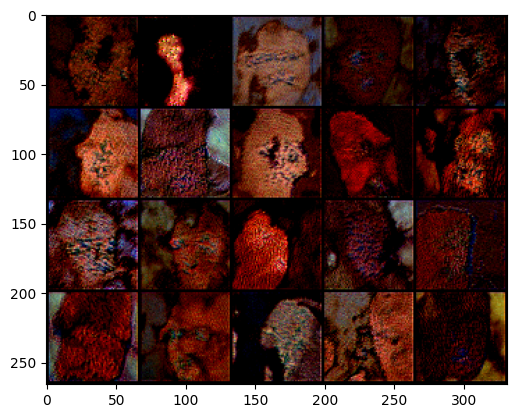

In [5]:
import torch
import train_utils as tu
import matplotlib.pyplot as plt

from PIL import Image
from curriculum import CelebAHQ_min, extract_metadata

metadata = extract_metadata(CelebAHQ_min, 12000)
device = torch.device('cpu')
alpha = 1.
output_dir = 'outputs'
# generator = Generator(SIREN, z_dim=256, use_aux=True).to(device)
V1_path = 'outputs/12000_generator.pth'
generator = torch.load(V1_path, map_location=device).to(device)


z = tu.z_sampler((20, 256), device='cpu')
tu.ablation(generator, z, device, alpha, 'ABLATION', output_dir, metadata, 'random', 0, psi=0.7, random=True)

 
# creating a object
im = Image.open("outputs/ABLATION_random.png")
plt.imshow(im)

Text(0.5, 1.0, 'Loss Evolution')

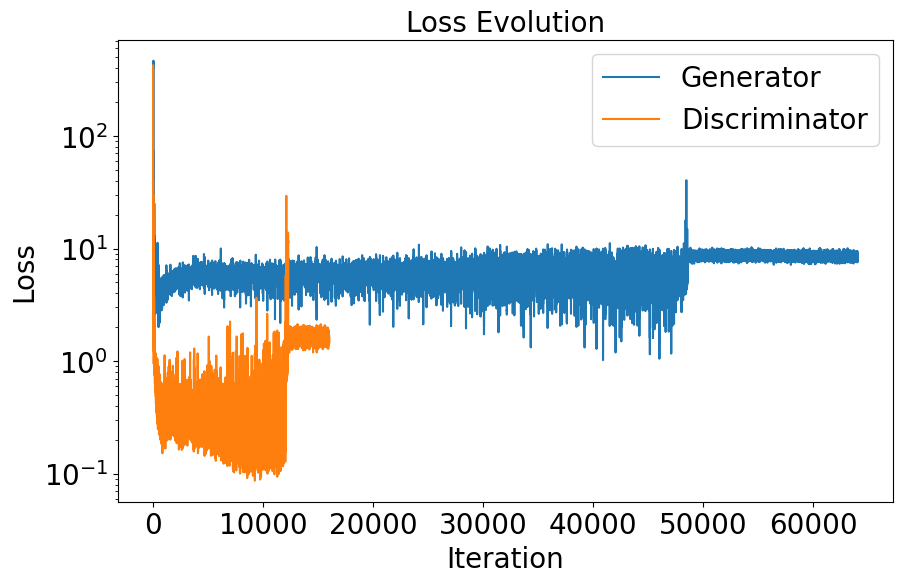

In [12]:
loss_g = torch.load('outputs/generator.losses')
loss_d = torch.load('outputs/discriminator.losses')


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(loss_g, label='Generator')
ax.plot(loss_d, label='Discriminator')
ax.set_yscale('log')
ax.set_xlabel('Iteration', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_title('Loss Evolution', fontsize=20)

Text(0.5, 1.0, 'FID Scores')

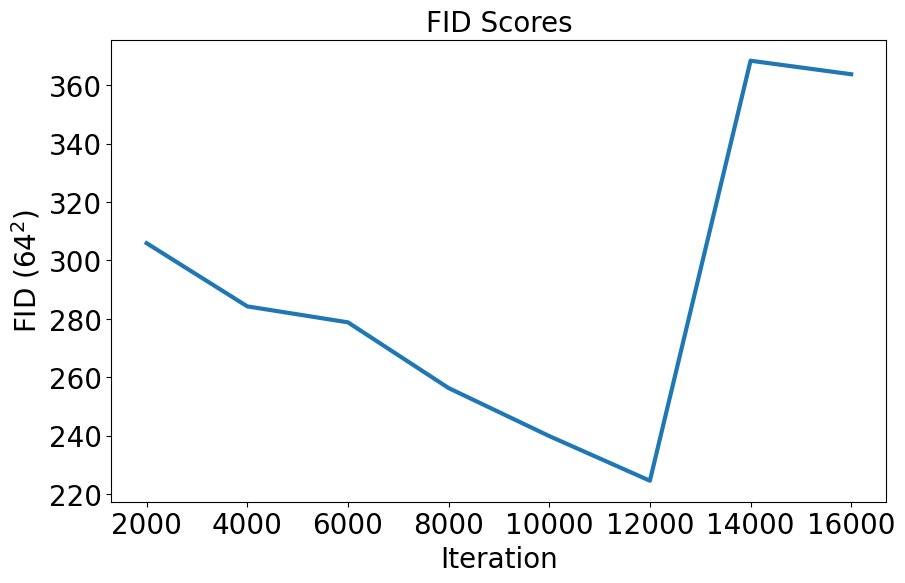

In [18]:
iterations = []
fids = []
with open('outputs/fid.txt') as f:
    for line in f:
        [i, fid] = line.split(':')
        iterations.append(int(i))
        fids.append(float(fid))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(iterations, fids, linewidth=3)
ax.set_xlabel('Iteration', fontsize=20)
ax.set_ylabel('FID ($64^2$)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('FID Scores', fontsize=20)